[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

## Environment setting

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하
plt.rc("axes", unicode_minus = False)

In [35]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [94]:
import pandas as pd
from datetime import datetime
import time
from tqdm import tqdm
import os


In [53]:
import warnings
warnings.simplefilter(action='ignore')


## data import

### investigate

In [36]:
data_dir = '/content/drive/MyDrive/대회/TDA/Population-raw/'

In [37]:
data = os.listdir(data_dir)
data

['충청남도',
 '강원도',
 '인천',
 '경기도',
 '제주',
 '광주',
 '전라북도',
 '전라남도',
 '세종',
 '충청북도',
 '대구',
 '경상북도',
 '경상남도',
 '울산',
 '대전',
 '서울',
 '부산']

In [38]:
data_dict = {}

for i in range(len(data)):
    f_name = data[i]
    data_dict[f_name] = os.listdir(data_dir + f_name)
    data_dict[f_name].sort()
    print(f_name, data_dict[f_name])


충청남도 ['202212_202212_연령별인구현황_연간 (0).xlsx', '202212_202212_연령별인구현황_연간 (1).xlsx', '202212_202212_연령별인구현황_연간 (10).xlsx', '202212_202212_연령별인구현황_연간 (11).xlsx', '202212_202212_연령별인구현황_연간 (12).xlsx', '202212_202212_연령별인구현황_연간 (13).xlsx', '202212_202212_연령별인구현황_연간 (14).xlsx', '202212_202212_연령별인구현황_연간 (2).xlsx', '202212_202212_연령별인구현황_연간 (3).xlsx', '202212_202212_연령별인구현황_연간 (4).xlsx', '202212_202212_연령별인구현황_연간 (5).xlsx', '202212_202212_연령별인구현황_연간 (6).xlsx', '202212_202212_연령별인구현황_연간 (7).xlsx', '202212_202212_연령별인구현황_연간 (8).xlsx', '202212_202212_연령별인구현황_연간 (9).xlsx']
강원도 ['202212_202212_연령별인구현황_연간 (0).xlsx', '202212_202212_연령별인구현황_연간 (1).xlsx', '202212_202212_연령별인구현황_연간 (10).xlsx',

In [39]:
data_dict.keys()

dict_keys(['충청남도', '강원도', '인천', '경기도', '제주', '광주', '전라북도', '전라남도', '세종', '충청북도', '대구', '경상북도', '경상남도', '울산', '대전', '서울', '부산'])

In [40]:
import unicodedata

normalized_data_dict = {unicodedata.normalize('NFC', key): value for key, value in data_dict.items()}

In [41]:
len(normalized_data_dict['서울'])

250

In [42]:
normalized_data_dict['서울']

['201312_201312_연령별인구현황_연간(0).xlsx',
 '201312_201312_연령별인구현황_연간(1).xlsx',
 '201312_201312_연령별인구현황_연간(10).xlsx',
 '201312_201312_연령별인구현황_연간(11).xlsx',
 '201312_201312_연령별인구현황_연간(12).xlsx',
 '201312_201312_연령별인구현황_연간(13).xlsx',
 '201312_201312_연령별인구현황_연간(14).xlsx',
 '201312_201312_연령별인구현황_연간(15).xlsx',
 '201312_201312_연령별인구현황_연간(16).xlsx',
 '201312_201312_연령별인구현황_연간(17).xlsx',
 '201312_201312_연령별인구현황_연간(18).xlsx',
 '201312_201312_연령별인구현황_연간(19).xlsx',
 '201312_201312_연령별인구현황_연간(2).xlsx',
 '201312_201312_연령별인구현황_연간(20).xlsx',
 '201312_201312_연령별인구현황_연간(21).xlsx',
 '201312_201312_연령별인구현황_연간(22).xlsx',
 '201312_201312_연령별인구현황_연간(23).xlsx',
 '201312_201312_연령별인구현황_연간(24).xlsx',
 '201312_2013

In [44]:
region_dir = data_dir+'서울/'
region_directory_files = normalized_data_dict['서울']


grouped_files = {}

# Iterating over each filename
for filename in region_directory_files:
    # Extracting the year from the filename
    year = filename.split("_")[1][:4]

    # Adding the filename to the corresponding year in the dictionary
    if year not in grouped_files:
        grouped_files[year] = []
    grouped_files[year].append(filename)

# Printing the grouped filenames
for year, files in grouped_files.items():
    print(f"Year {year}:")
    for file in files:
        print(f" - {file}")


Year 2013:
 - 201312_201312_연령별인구현황_연간(0).xlsx
 - 201312_201312_연령별인구현황_연간(1).xlsx
 - 201312_201312_연령별인구현황_연간(10).xlsx
 - 201312_201312_연령별인구현황_연간(11).xlsx
 - 201312_201312_연령별인구현황_연간(12).xlsx
 - 201312_201312_연령별인구현황_연간(13).xlsx
 - 201312_201312_연령별인구현황_연간(14).xlsx
 - 201312_201312_연령별인구현황_연간(15).xlsx
 - 201312_201312_연령별인구현황_연간(16).xlsx
 - 201312_201312_연령별인구현황_연간(17).xlsx
 - 201312_201312_연령별인구현황_연간(18).xlsx
 - 201312_201312_연령별인구현황_연간(19).xlsx
 - 201312_201312_연령별인구현황_연간(2).xlsx
 - 201312_201312_연령별인구현황_연간(20).xlsx
 - 201312_201312_연령별인구현황_연간(21).xlsx
 - 201312_201312_연령별인구현황_연간(22).xlsx
 - 201312_201312_연령별인구현황_연간(23).xlsx
 - 201312_201312_연령별인구현황_연간(24).xlsx
 - 201312_201312_연

In [54]:
dfs_2013 = [pd.read_excel(region_dir+f"{file}") for file in grouped_files['2013']]
dfs_2013_ref = []
for df in dfs_2013:
  df = df[2:]
  df = df.rename(columns=df.iloc[0])
  df = df[1:]
  dfs_2013_ref.append(df)
merged_2013 = pd.concat(dfs_2013_ref, ignore_index=True)
merged_2013

행정기관코드              행정기관    총 인구수  연령구간인구수   0세   1세   2세     3세  \
0    1111000000  서울특별시 서울특별시 종로구   160,070  160,070  783  984  890  1,006   
1    1111051500   서울특별시 종로구 청운효자동   14,570   14,570   86   83  103    116   
2    1111053000     서울특별시 종로구 사직동    9,875    9,875   67   76   72     82   
3    1111054000     서울특별시 종로구 삼청동    3,218    3,218   14   15   20     17   
4    1111055000     서울특별시 종로구 부암동   11,109   11,109   46   59   59     62   
..          ...               ...      ...      ...  ...  ...  ...    ...   
443  1132068000   서울특별시 도봉구 쌍문제3동   18,221   18,221   97  152  136    125   
444  1132068100   서울특별시 도봉구 쌍문제4동   21,342   21,342  108  155  151    156   
445  1132069000   서울특별시 도봉구 방학제1동   31,879   31,879  150  231  211    225   
446  1132070000   서울특별시 도봉구 방학제2동   23,435   23,435  148  162  141    146   
447  1132071000   서울특별시 도봉구 방학제3동   31,671   31,671  208  230  233    274   

      4세     5세  ...  91세  92세 93세 94세 95세 96세 97세 98세 99세 100세 이상  
0    893  1,014  ...  161  113  95  67  39  43  38  21  28     174  
1     93    111  ...   15    3  11   5   1   5   4   2   5      11  
2     70     87  ...   13    7  10   4   3   2   4   1   1      14  
3     26     16  ...    6    7   2   3   2   1   1   1   0       4  
4     60     63  ...    8    9   5   3   4   6   1   1   2       6  
..   ...    ...  ...  ...  ...  ..  ..  ..  ..  ..  ..  ..     ...  
443  145    129  ...    9   13   6   3   6   1   1   1   3       4  
444  154    153  ...    7   10   7   2   4   1   0   2   1       4  
445  205    240  ...   17   10   8   7   6   3   0   2   2       6  
446  128    154  ...   14    7   7   7   5   3   1   0   3       9  
447  252    278  ...   15   14  11   8   2   5   4   1   2       2  

[448 rows x 105 columns]

In [48]:
dfs_2013[0]

※ 매년 말일자 통계 현황             Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0             NaN                    NaN      2013년        NaN        NaN   
1             NaN                    NaN          계        NaN        NaN   
2          행정기관코드                   행정기관      총 인구수    연령구간인구수         0세   
3      1111000000       서울특별시 서울특별시 종로구     160,070    160,070        783   
4      1111051500        서울특별시 종로구 청운효자동     14,570     14,570         86   
5      1111053000          서울특별시 종로구 사직동      9,875      9,875         67   
6      1111054000          서울특별시 종로구 삼청동      3,218      3,218         14   
7      1111055000          서울특별시 종로구 부암동     11,109     11,109         46   
8      1111056000          서울특별시 종로구 평창동     19,544     19,544         89   
9      1111057000          서울특별시 종로구 무악동      8,581      8,581         70   
10     1111058000          서울특별시 종로구 교남동      5,347      5,347         23   
11     1111060000          서울특별시 종로구 가회동      5,219      5,219         18   
12     1111061500  서울특별시 종로구 종로1.2.3.4가동      7,856      7,856         23   
13     1111063000      서울특별시 종로구 종로5.6가동      5,926      5,926         21   
14     1111064000          서울특별시 종로구 이화동      8,995      8,995         44   
15     1111065000          서울특별시 종로구 혜화동     17,889     17,889         78   
16     1111067000        서울특별시 종로구 창신제1동      6,334      6,334         20   
17     1111068000        서울특별시 종로구 창신제2동     10,679     10,679         34   
18     1111069000        서울특별시 종로구 창신제3동      8,189      8,189         51   
19     1111070000        서울특별시 종로구 숭인제1동      7,202      7,202         43   
20     1111071000        서울특별시 종로구 숭인제2동      9,537      9,537         56   

   Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 95  \
0         NaN        NaN        NaN        NaN        NaN  ...         NaN   
1         NaN        NaN        NaN        NaN        NaN  ...         NaN   
2          1세         2세         3세         4세         5세  ...         91세   
3         984        890      1,006        893      1,014  ...         161   
4          83        103        116         93        111  ...          15   
5          76         72         82         70         87  ...          13   
6          15         20         17         26         16  ...           6   
7          59         59         62         60         63  ...           8   
8         137        118        135        105        136  ...          24   
9          71         62         90         78         72  ...           8   
10         34         22         37         35         44  ...           4   
11         22         28         30         21         41  ...           6   
12         37         30         34         37         27  ...          16   
13         20         19         22         16         20  ...           9   
14         57         44         41         39         49  ...           9   
15         87         89        103         82         95  ...          12   
16         29         27         22         28         27  ...           5   
17         52         46         52         56         49  ...          10   
18         74         54         59         55         70  ...           8   
19         59         45         47         39         58  ...           4   
20         72         52         57         53         49  ...           4   

   Unnamed: 96 Unnamed: 97 Unnamed: 98 Unnamed: 99 Unnamed: 100 Unnamed: 101  \
0          NaN         NaN         NaN         NaN          NaN          NaN   
1          NaN         NaN         NaN         NaN          NaN          NaN   
2          92세         93세         94세         95세          96세          97세   
3          113          95          67          39           43           38   
4            3          11           5           1            5            4   
5            7          10           4           3            2            4   
6            7           2     

In [43]:
sample_df = pd.read_excel(data_dir + '서울/'+normalized_data_dict['서울'][0])

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


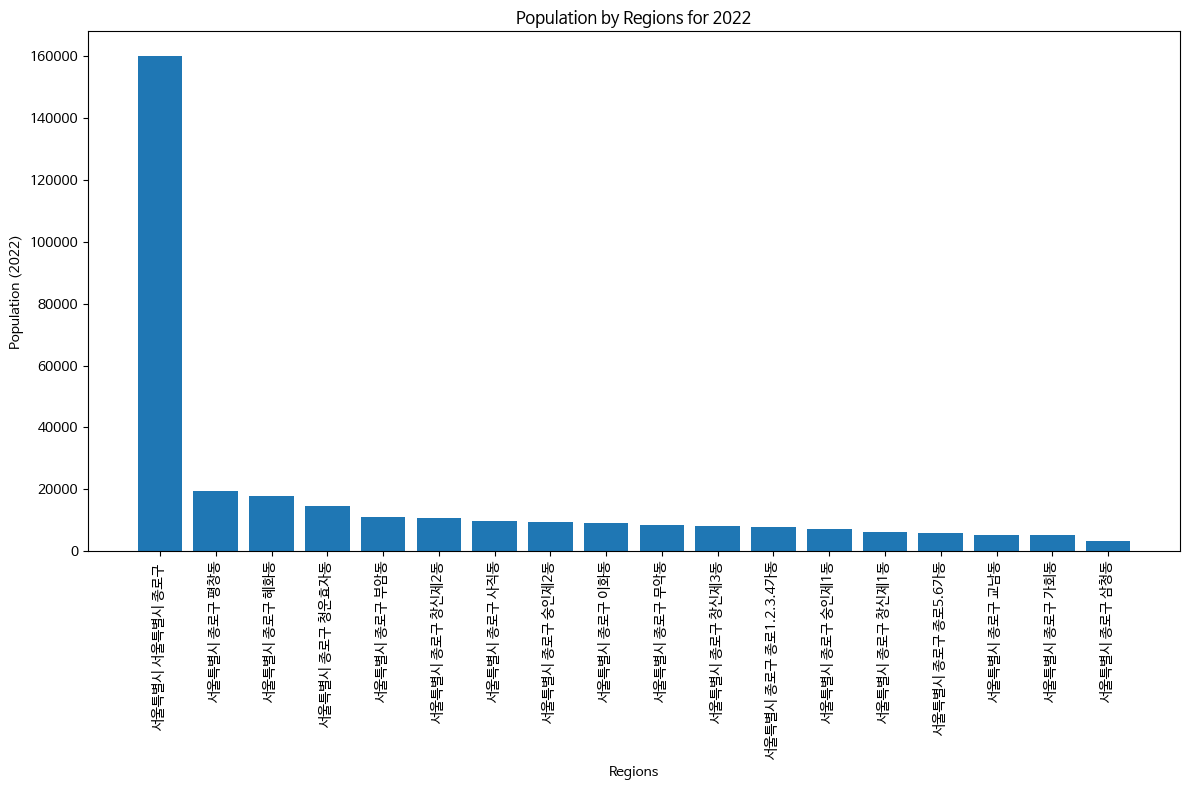

In [ ]:
# Cleaning up the dataframe
df_cleaned = sample_df.iloc[3:].copy()
df_cleaned.columns = sample_df.iloc[2]
df_cleaned = df_cleaned.reset_index(drop=True)

# Extracting columns
region_population_2022 = df_cleaned[["행정기관", "총 인구수"]].copy()
region_population_2022["총 인구수"] = region_population_2022["총 인구수"].str.replace(',', '').astype(int)

# Sorting the data
region_population_2022 = region_population_2022.sort_values("총 인구수", ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(region_population_2022["행정기관"], region_population_2022["총 인구수"])
plt.xticks(rotation=90)
plt.xlabel("Regions")
plt.ylabel("Population (2022)")
plt.title("Population by Regions for 2022")
plt.tight_layout()
plt.show()

### refining

In [55]:
data_dir = '/content/drive/MyDrive/대회/TDA/Population-raw/'
data_dict = {}

for i in range(len(data)):
    f_name = data[i]
    data_dict[f_name] = os.listdir(data_dir + f_name)
    data_dict[f_name].sort()
    print(f_name, data_dict[f_name])

충청남도 ['202212_202212_연령별인구현황_연간 (0).xlsx', '202212_202212_연령별인구현황_연간 (1).xlsx', '202212_202212_연령별인구현황_연간 (10).xlsx', '202212_202212_연령별인구현황_연간 (11).xlsx', '202212_202212_연령별인구현황_연간 (12).xlsx', '202212_202212_연령별인구현황_연간 (13).xlsx', '202212_202212_연령별인구현황_연간 (14).xlsx', '202212_202212_연령별인구현황_연간 (2).xlsx', '202212_202212_연령별인구현황_연간 (3).xlsx', '202212_202212_연령별인구현황_연간 (4).xlsx', '202212_202212_연령별인구현황_연간 (5).xlsx', '202212_202212_연령별인구현황_연간 (6).xlsx', '202212_202212_연령별인구현황_연간 (7).xlsx', '202212_202212_연령별인구현황_연간 (8).xlsx', '202212_202212_연령별인구현황_연간 (9).xlsx']
강원도 ['202212_202212_연령별인구현황_연간 (0).xlsx', '202212_202212_연령별인구현황_연간 (1).xlsx', '202212_202212_연령별인구현황_연간 (10).xlsx',

In [56]:
import unicodedata

normalized_data_dict = {unicodedata.normalize('NFC', key): value for key, value in data_dict.items()}

In [63]:
def get_region_merged_by_year(region):
  region_directory_files = normalized_data_dict[region]

  grouped_files = {}
  for filename in region_directory_files:
      year = filename.split("_")[1][:4]

      if year not in grouped_files:
          grouped_files[year] = []
      grouped_files[year].append(filename)

  return grouped_files

  # Printing the grouped filenames
  # for year, files in globals()[f"{region}_grouped_files"].items():
  #     print(f"Year {year}:")
  #     for file in files:
  #         print(f" - {file}")


In [88]:
def merge_files_by_years(year, region_dir, grouped_files):
  globals()[f"df_{year}"] = [pd.read_excel(region_dir+f"{file}") for file in grouped_files[year]]
  globals()[f"df_{year}_ref"] = []
  for df in globals()[f"df_{year}"]:
    df = df[2:]
    df = df.rename(columns=df.iloc[0])
    df = df[1:]
    globals()[f"df_{year}_ref"].append(df)
  globals()[f"{region}_{year}_ref"] = pd.concat(globals()[f"df_{year}_ref"], ignore_index=True)
  globals()[f"{region}_{year}_ref"].to_csv(f'/content/drive/MyDrive/대회/TDA/data_merged/{region}_{year}.csv', index = False)
  #return globals()[f"{region}_{year}_ref"]

In [89]:
for region in normalized_data_dict.keys():
  region_dir = f"{data_dir}{region}/"
  print(region, region_dir)
  globals()[f"{region}_grouped_files"] = get_region_merged_by_year(region)
  for year in globals()[f"{region}_grouped_files"].keys():
    print(year)
    merge_files_by_years(year, region_dir, globals()[f"{region}_grouped_files"])


  # print(region+"_grouped_files")
  # yrs = globals()[f"{region}_grouped_files"].keys()
  # print(f"{region}\n{yrs}\n-------------------")

충청남도 /content/drive/MyDrive/대회/TDA/Population-raw/충청남도/
2022
강원도 /content/drive/MyDrive/대회/TDA/Population-raw/강원도/
2022
인천 /content/drive/MyDrive/대회/TDA/Population-raw/인천/
2022
경기도 /content/drive/MyDrive/대회/TDA/Population-raw/경기도/
2022
제주 /content/drive/MyDrive/대회/TDA/Population-raw/제주/
2022
광주 /content/drive/MyDrive/대회/TDA/Population-raw/광주/
2022
전라북도 /content/drive/MyDrive/대회/TDA/Population-raw/전라북도/
2022
전라남도 /content/drive/MyDrive/대회/TDA/Population-raw/전라남도/
2022
세종 /content/drive/MyDrive/대회/TDA/Population-raw/세종/
2022
충청북도 /content/drive/MyDrive/대회/TDA/Population-raw/충청북도/
2022
대구 /content/drive/MyDrive/대회/TDA/Population-raw/대구/
2022
경상북도 /content/drive/MyDrive/대회/TDA/Population-raw/경상북도/
2022
경상남도 /content/drive/MyDrive/대회/TDA/Population-raw/경상남도/
2022
울산 /content/drive/MyDrive/대회/TDA/Population-raw/울산/
2022
대전 /content/drive/MyDrive/대회/TDA/Population-raw/대전/
2022
서울 /content/drive/MyDrive/대회/TDA/Population-raw/서울/
2013
2014
2015
2016
2017
2018
201

## EDA

In [173]:
import unicodedata

In [164]:
dfs_path = '/content/drive/MyDrive/대회/TDA/data_merged/'
dfs = os.listdir(dfs_path)
dfs = [unicodedata.normalize('NFC', item) for item in dfs]
dfs

['충청남도_2022.csv',
 '강원도_2022.csv',
 '인천_2022.csv',
 '경기도_2022.csv',
 '제주_2022.csv',
 '광주_2022.csv',
 '전라북도_2022.csv',
 '전라남도_2022.csv',
 '세종_2022.csv',
 '충청북도_2022.csv',
 '대구_2022.csv',
 '경상북도_2022.csv',
 '경상남도_2022.csv',
 '울산_2022.csv',
 '대전_2022.csv',
 '서울_2013.csv',
 '서울_2014.csv',
 '서울_2015.csv',
 '서울_2016.csv',
 '서울_2017.csv',
 '서울_2018.csv',
 '서울_2019.csv',
 '서울_2020.csv',
 '서울_2021.csv',
 '서울_2022.csv',
 '부산_2022.csv']

### 강원도

In [90]:
population_data = []
gangwon_directory_files = normalized_data_dict['강원도']
for i, file in enumerate(gangwon_directory_files):
    path = os.path.join(gangwon_dir, file)
    df = pd.read_excel(path, header=None)
    year = df.iloc[1, 2]
    population_data[i]["Year"] = year

# Convert the updated list of dictionaries to a DataFrame for easier analysis
population_df = pd.DataFrame(population_data)
population_df["Total Population"] = population_df["Total Population"].str.replace(',', '').astype(int)
population_df = population_df.sort_values("Year")
population_df.head()


IndexError: ignored

In [ ]:
population_df

Year  Total Population                                   Age Distribution
0   2022년            286664  [1,581, 1,727, 1,811, 1,857, 1,909, 2,300, 2,3...
15  2022년             67977  [251, 299, 316, 331, 334, 384, 437, 367, 403, ...
14  2022년             63455  [285, 323, 330, 313, 328, 350, 377, 385, 413, ...
13  2022년             82806  [403, 444, 494, 511, 508, 634, 731, 661, 637, ...
12  2022년             39428  [126, 156, 157, 195, 207, 217, 263, 280, 287, ...
11  2022년             89426  [439, 450, 493, 489, 595, 711, 730, 757, 785, ...
10  2022년            211381  [930, 1,016, 1,044, 1,163, 1,196, 1,404, 1,514...
9   2022년             27866  [83, 92, 106, 108, 107, 138, 142, 152, 158, 17...
8   2022년             27274  [93, 114, 129, 110, 121, 137, 157, 171, 157, 1...
7   2022년             32206  [232, 238, 250, 233, 258, 228, 270, 227, 241, ...
6   2022년             21383  [153, 142, 130, 152, 185, 184, 154, 151, 163, ...
5   2022년             23388  [133, 129, 158, 154, 140, 176, 195, 179, 166, ...
4   2022년             42256  [261, 311, 309, 286, 299, 285, 308, 340, 294, ...
3   2022년             34931  [119, 128, 135, 137, 138, 155, 163, 203, 171, ...
2   2022년             40990  [105, 117, 132, 138, 190, 171, 197, 206, 227, ...
1   2022년            360807  [2,164, 2,237, 2,463, 2,385, 2,729, 2,980, 3,1...
16  2022년             46532  [159, 169, 193, 188, 223, 221, 234, 238, 241, ...
17  2022년             37728  [93, 130, 139, 149, 144, 168, 178, 179, 195, 2...

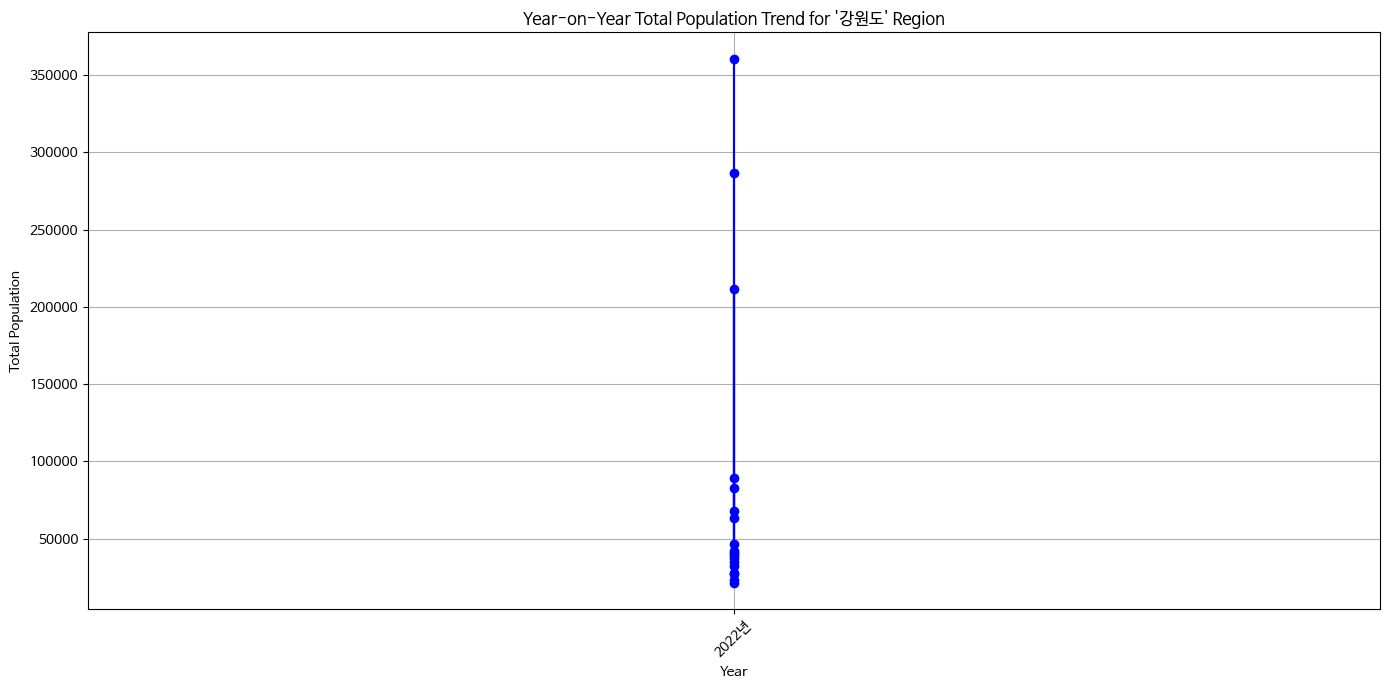

In [ ]:
import matplotlib.pyplot as plt

# Visualization: Year-on-year total population trend for '강원도' region
plt.figure(figsize=(14, 7))
plt.plot(population_df["Year"], population_df["Total Population"], marker='o', color='b')
plt.title("Year-on-Year Total Population Trend for '강원도' Region")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


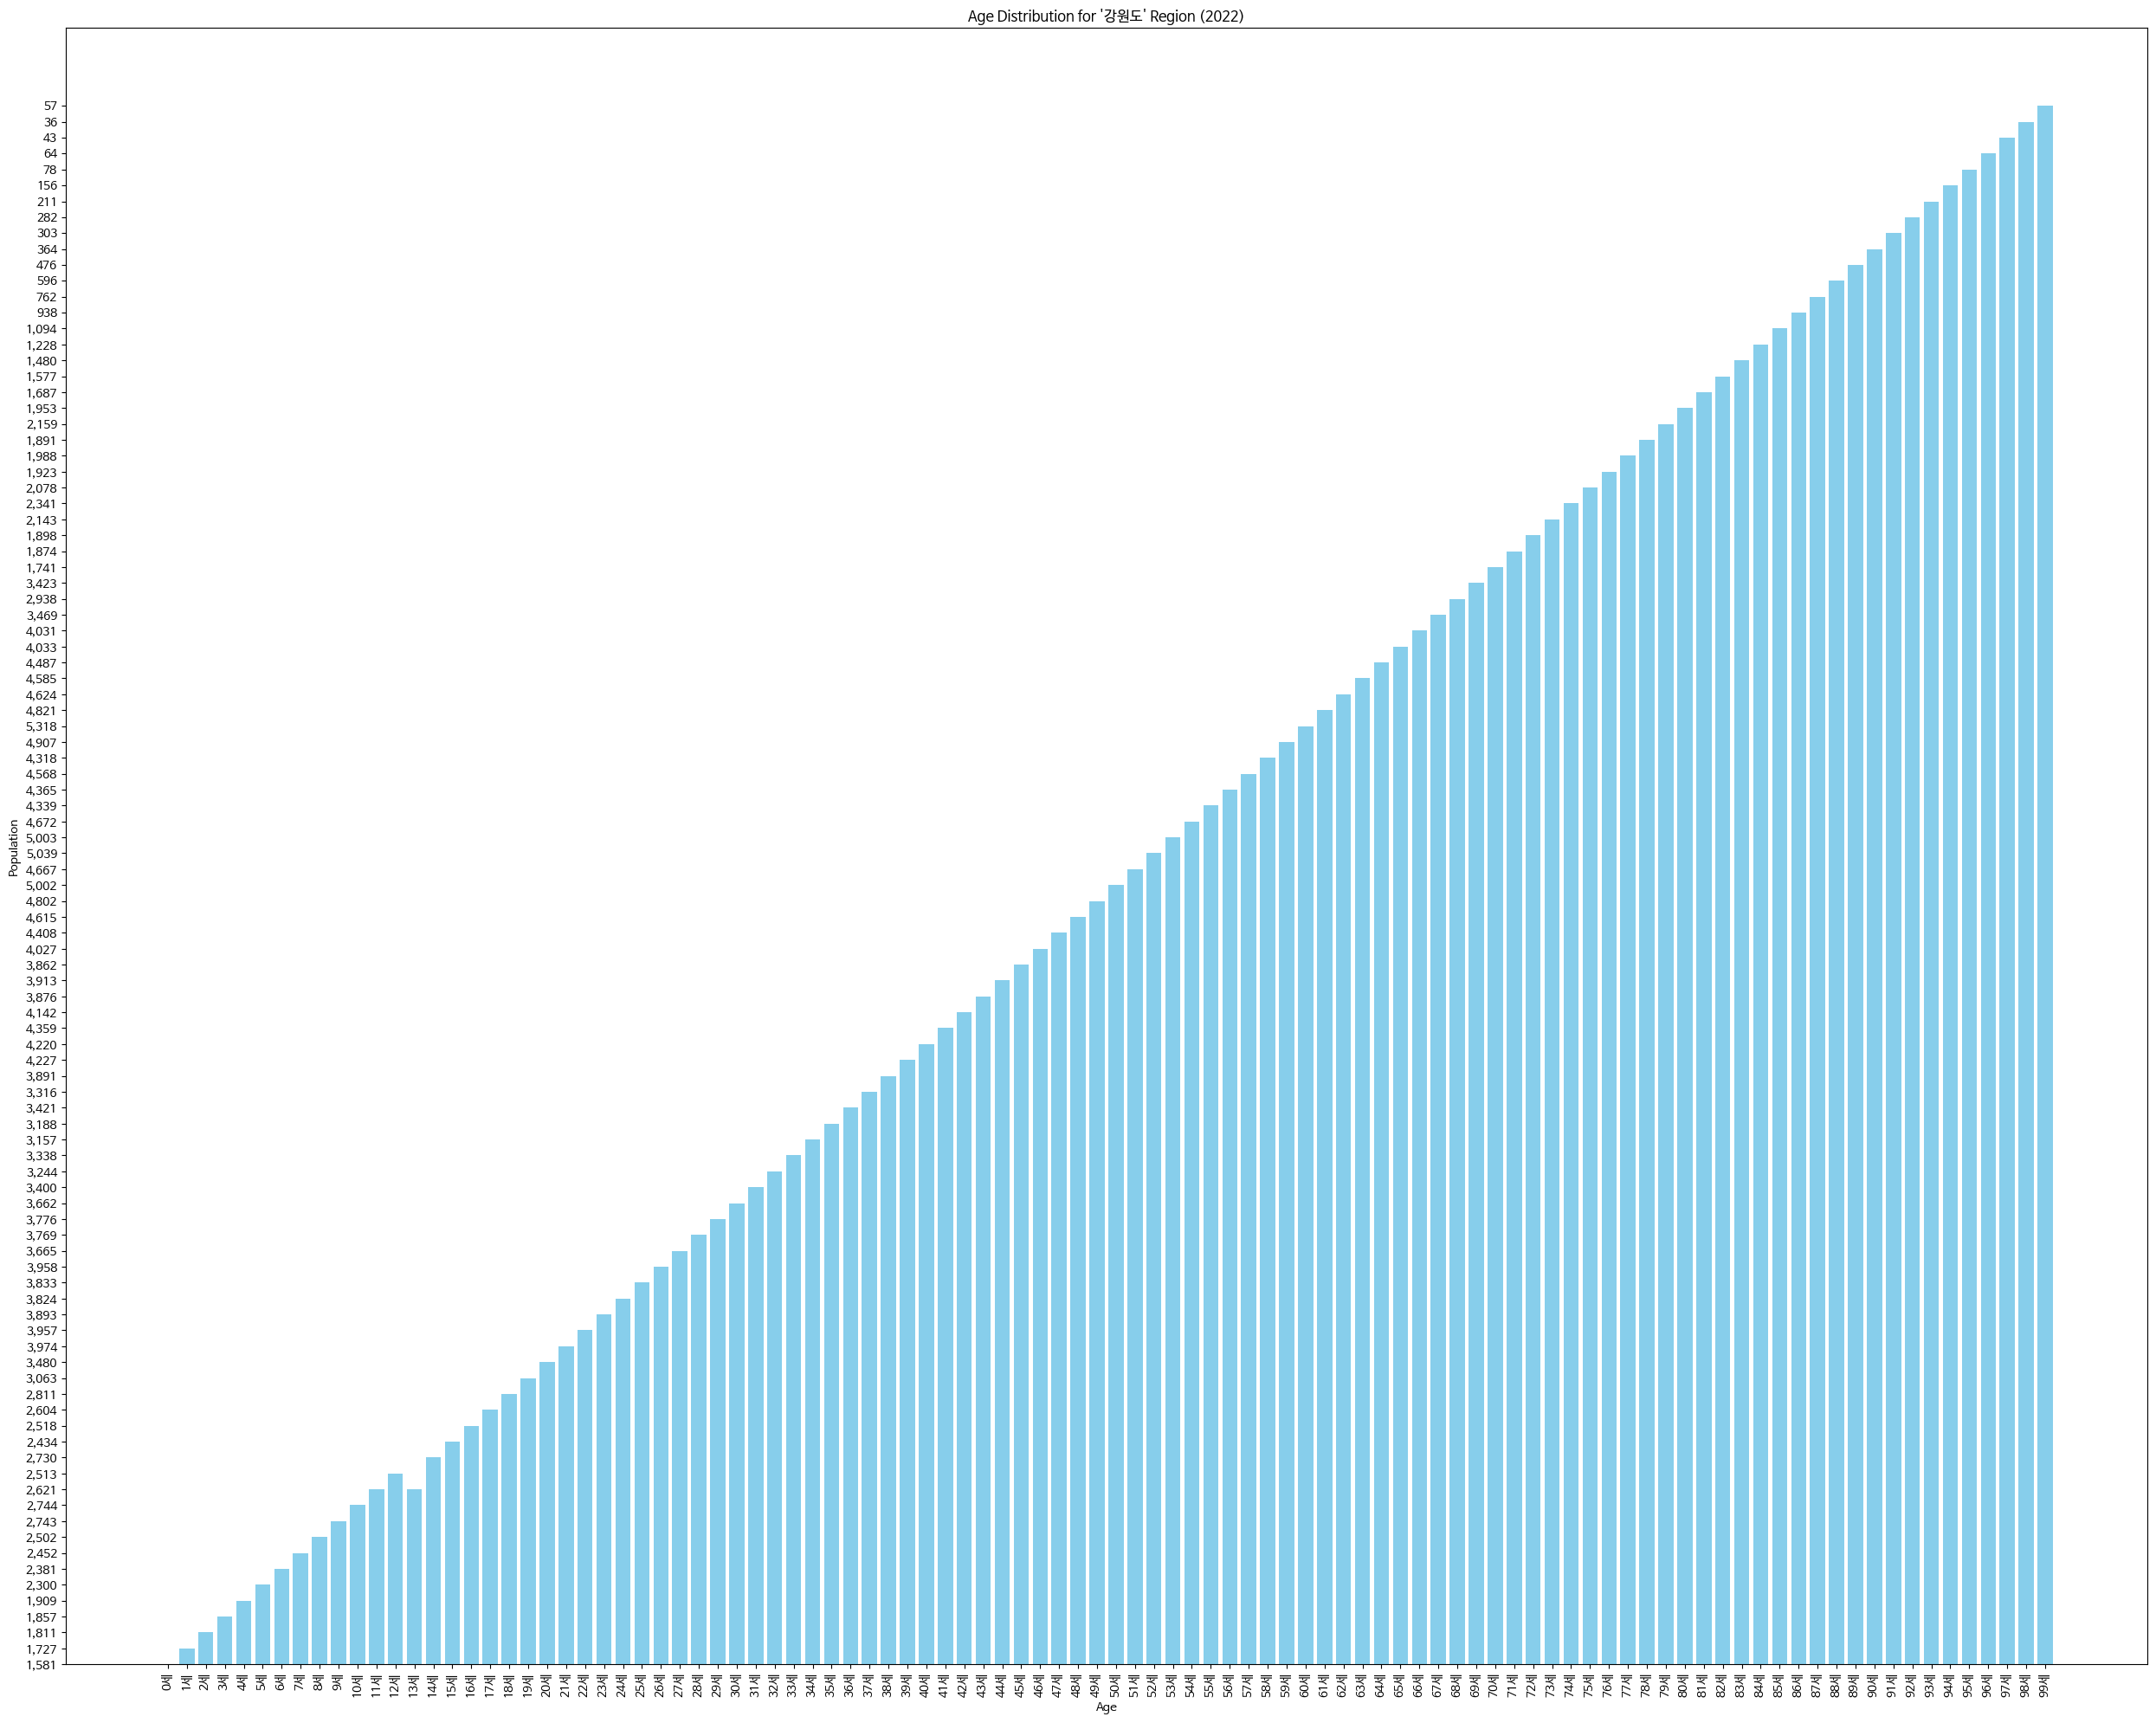

In [ ]:
# Adjusting the age_groups list
age_distribution_2022 = population_df[population_df["Year"] == "2022년"]["Age Distribution"].iloc[0]

# Age groups
age_groups = [f"{i}세" for i in range(100)] + ["100세 이상"]

age_groups = age_groups[:-1]

# Re-plotting the age distribution
plt.figure(figsize=(25, 20))
plt.bar(age_groups, age_distribution_2022, color='skyblue')
plt.title("Age Distribution for '강원도' Region (2022)")
plt.xlabel("Age")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
sample_df = df

In [ ]:
sub_region_df = sample_df.iloc[3:].copy()
sub_region_df.columns = sample_df.iloc[2]
sub_region_df = sub_region_df.reset_index(drop=True)

sub_region_df

2          NaN                NaN       계      NaN NaN NaN  NaN  NaN  NaN  \
0       행정기관코드               행정기관   총 인구수  연령구간인구수  0세  1세   2세   3세   4세   
1   4275000000       강원도 강원도 영월군   37,728   37,728  92  93  130  139  149   
2   4275025000        강원도 영월군 영월읍  20,706   20,706  79  70  105  107  127   
3   4275025300        강원도 영월군 상동읍   1,002    1,002   0   0    1    2    2   
4   4275031200        강원도 영월군 산솔면   1,399    1,399   0   3    3    1    4   
5   4275032500       강원도 영월군 김삿갓면   1,721    1,721   0   1    2    2    1   
6   4275033000         강원도 영월군 북면   2,077    2,077   4   2    2    3    4   
7   4275034000         강원도 영월군 남면   2,188    2,188   1   2    0    1    2   
8   4275035500       강원도 영월군 한반도면   1,214    1,214   1   4    3    4    2   
9   4275035900  강원도 영월군 한반도면쌍용출장소   1,623    1,623   2   2    5    6    0   
10  4275036000        강원도 영월군 주천면   3,719    3,719   4   5    7   10    5   
11  4275038000      강원도 영월군 무릉도원면   2,079    2,079   1   4    2    3    2   

2   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      NaN  
0    5세  ...  91세  92세  93세  94세  95세  96세  97세  98세  99세  100세 이상  
1   144  ...   72   65   61   26   26   14   15    6    6       11  
2   115  ...   27   24   27    9   12    6    7    2    2        3  
3     1  ...    3    3    4    0    2    1    0    0    0        0  
4     2  ...    3    2    2    1    0    1    0    0    0        0  
5     0  ...    3    6    4    4    2    0    1    0    1        0  
6     3  ...    3    4    4    3    3    0    2    0    0        1  
7     5  ...    8    6    3    3    1    1    1    1    1        2  
8     5  ...    1    1    1    0    1    2    0    0    0        0  
9     4  ...    5    6    6    2    0    0    1    2    0        1  
10    5  ...   13    9    6    3    4    2    2    1    2        3  
11    4  ...    6    4    4    1    1    1    1    0    0        1  

[12 rows x 105 columns]

In [ ]:
# Revised code to handle non-numeric values in the "Population" column
import re
# Dictionary to hold aggregated data
aggregated_data = {}

# Iterating over each file to aggregate data
for file in gangwon_directory_files:
    path = os.path.join(gangwon_dir, file)
    df = pd.read_excel(path, header=None)

    # Extract year from filename
    year_match = re.search(r"(\d{4})", file)
    if year_match:
        year = year_match.group(1)

        # Data extraction
        region_data = df.iloc[3:].copy()
        region_data.columns = ["행정기관", "Population"]

        # Filtering out rows with non-numeric values in the "Population" column
        region_data = region_data[region_data["Population"].astype(str).str.isnumeric()]

        # Convert population data to integers
        region_data["Population"] = region_data["Population"].str.replace(',', '').astype(int)

        # Summing up the population data for regions
        if year in aggregated_data:
            aggregated_data[year] += region_data.groupby("행정기관").sum()
        else:
            aggregated_data[year] = region_data.groupby("행정기관").sum()

# Combining the data for all years
all_years_df = pd.concat(aggregated_data).reset_index()
all_years_df.columns = ["Year", "행정기관", "Population"]

# For the current visualization, we'll focus on the most recent year in the data
latest_year = all_years_df["Year"].max()
latest_year_data = all_years_df[all_years_df["Year"] == latest_year]

# Sorting the data
latest_year_data = latest_year_data.sort_values("Population", ascending=False)

# Visualization: Population distribution by sub-regions within '강원도' for the latest year
plt.figure(figsize=(14, 7))
plt.bar(latest_year_data["행정기관"], latest_year_data["Population"], color='orange')
plt.title(f"Population Distribution by Sub-Regions within '강원도' ({latest_year})")
plt.xlabel("Sub-Regions")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


KeyError: ignored

In [ ]:

sub_region_population_2022 = sub_region_df.iloc[:, [1, 2]].copy()
sub_region_population_2022.columns = ["행정기관", "2022년"]
sub_region_population_2022["2022년"] = sub_region_population_2022["2022년"].str.replace(',', '').astype(int)

# Sorting the data
sub_region_population_2022 = sub_region_population_2022.sort_values("2022년", ascending=False)


non_numeric_values = sub_region_population_2022[~sub_region_population_2022["2022년"].astype(str).str.isnumeric()]["2022년"].unique()

# Removing rows with the value "총 인구수"
sub_region_population_2022 = sub_region_population_2022[sub_region_population_2022["2022년"] != "총 인구수"]

# Replacing commas and converting to integers
sub_region_population_2022["2022년"] = sub_region_population_2022["2022년"].str.replace(',', '').astype(int)

# Sorting the data
sub_region_population_2022 = sub_region_population_2022.sort_values("2022년", ascending=False)

# Visualization: Population distribution by sub-regions within '강원도' for 2022
plt.figure(figsize=(14, 7))
plt.bar(sub_region_population_2022["행정기관"], sub_region_population_2022["2022년"], color='purple')
plt.title("Population Distribution by Sub-Regions within '강원도' (2022)")
plt.xlabel("Sub-Regions")
plt.ylabel("Population")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 전체 지역

In [118]:
normalized_dfs = [unicodedata.normalize('NFC', item) for item in dfs]

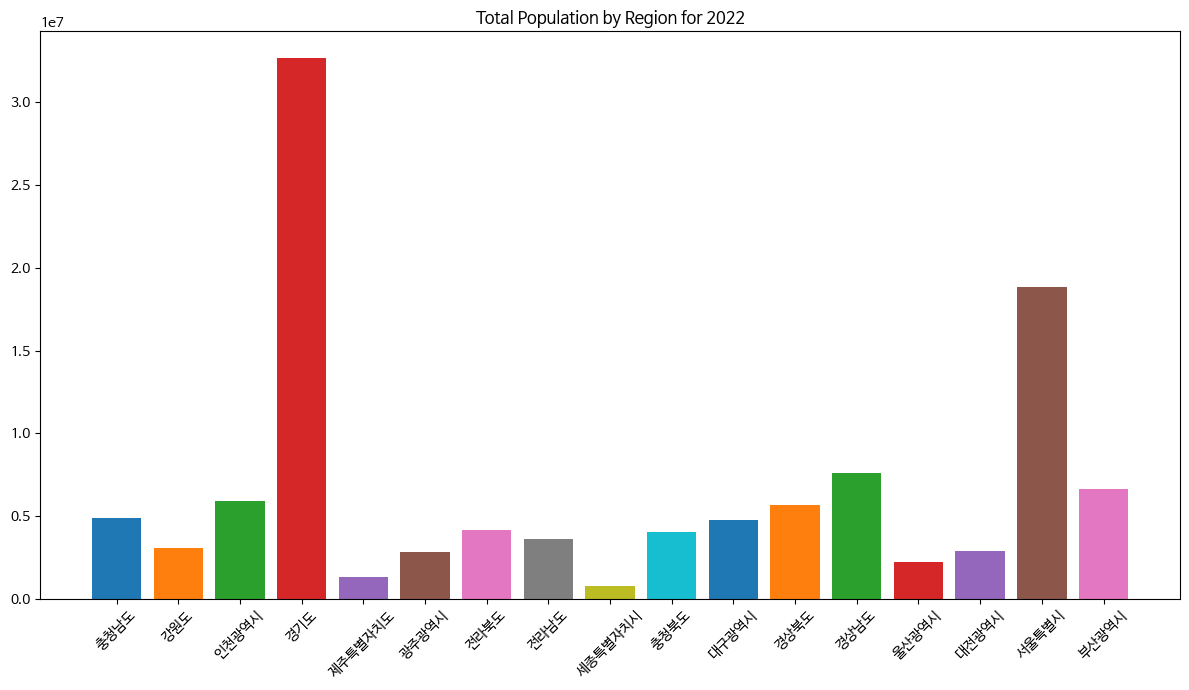

In [122]:
def plot_population_by_region(year, data_dir=dfs_path):
    fig, ax = plt.subplots(figsize=(12, 7))
    file_list = [unicodedata.normalize('NFC', item) for item in os.listdir(data_dir)]
    for file in file_list:
        if file.endswith(f"_{year}.csv"):
            df = pd.read_csv(os.path.join(data_dir, file))
            df["총 인구수"] = df["총 인구수"].str.replace(',', '').astype(int)
            region_population = df["총 인구수"].sum()
            region_name = df["행정기관"].iloc[0].split()[0]
            ax.bar(region_name, region_population)
    ax.set_title(f"Total Population by Region for {year}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Example usage:
plot_population_by_region(2022)


In [127]:
def plot_population_by_year(region, data_dir=dfs_path):
    years = []
    populations = []
    # print(region)
    file_list = [unicodedata.normalize('NFC', item) for item in os.listdir(data_dir)]
    for file in file_list:
      # print(file)
      if file.startswith(region):
          year = int(file.split('_')[1].split('.')[0])
          # print(year)
          df = pd.read_csv(os.path.join(data_dir, file))
          df["총 인구수"] = df["총 인구수"].str.replace(',', '').astype(int)
          # print(df.head())

          region_population = df["총 인구수"].sum()
          years.append(year)
          populations.append(region_population)

    plt.figure(figsize=(12, 7))
    plt.plot(years, populations, marker='o')
    plt.title(f"Total Population in {region} by Year")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



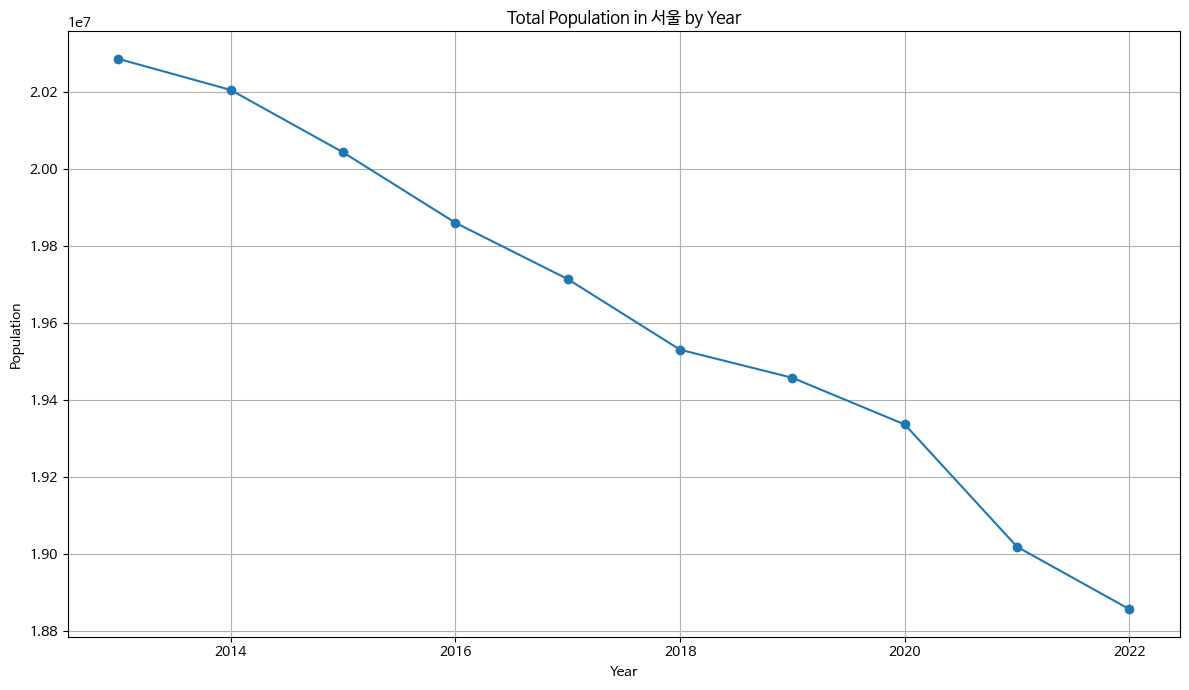

In [128]:
plot_population_by_year('서울')


In [143]:
region = '서울'
year = 2022
file = os.path.join(dfs_path, f"{region}_{year}.csv")
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 105 entries, 행정기관코드 to 100세 이상
dtypes: int64(13), object(92)
memory usage: 370.1+ KB


In [146]:
def plot_age_distribution(region, year, data_dir=dfs_path):
    region = unicodedata.normalize('NFC', region)
    file = os.path.join(data_dir, f"{region}_{year}.csv")
    df = pd.read_csv(file)
    age_columns = df.columns[4:]  # Assuming age columns start from the 5th column

    for column in age_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')

    age_distribution = df[age_columns].sum()

    plt.figure(figsize=(18, 12))
    age_distribution.plot(kind='bar')
    plt.title(f"Age Distribution in {region} for {year}")
    plt.xlabel("Age Group")
    plt.ylabel("Population")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


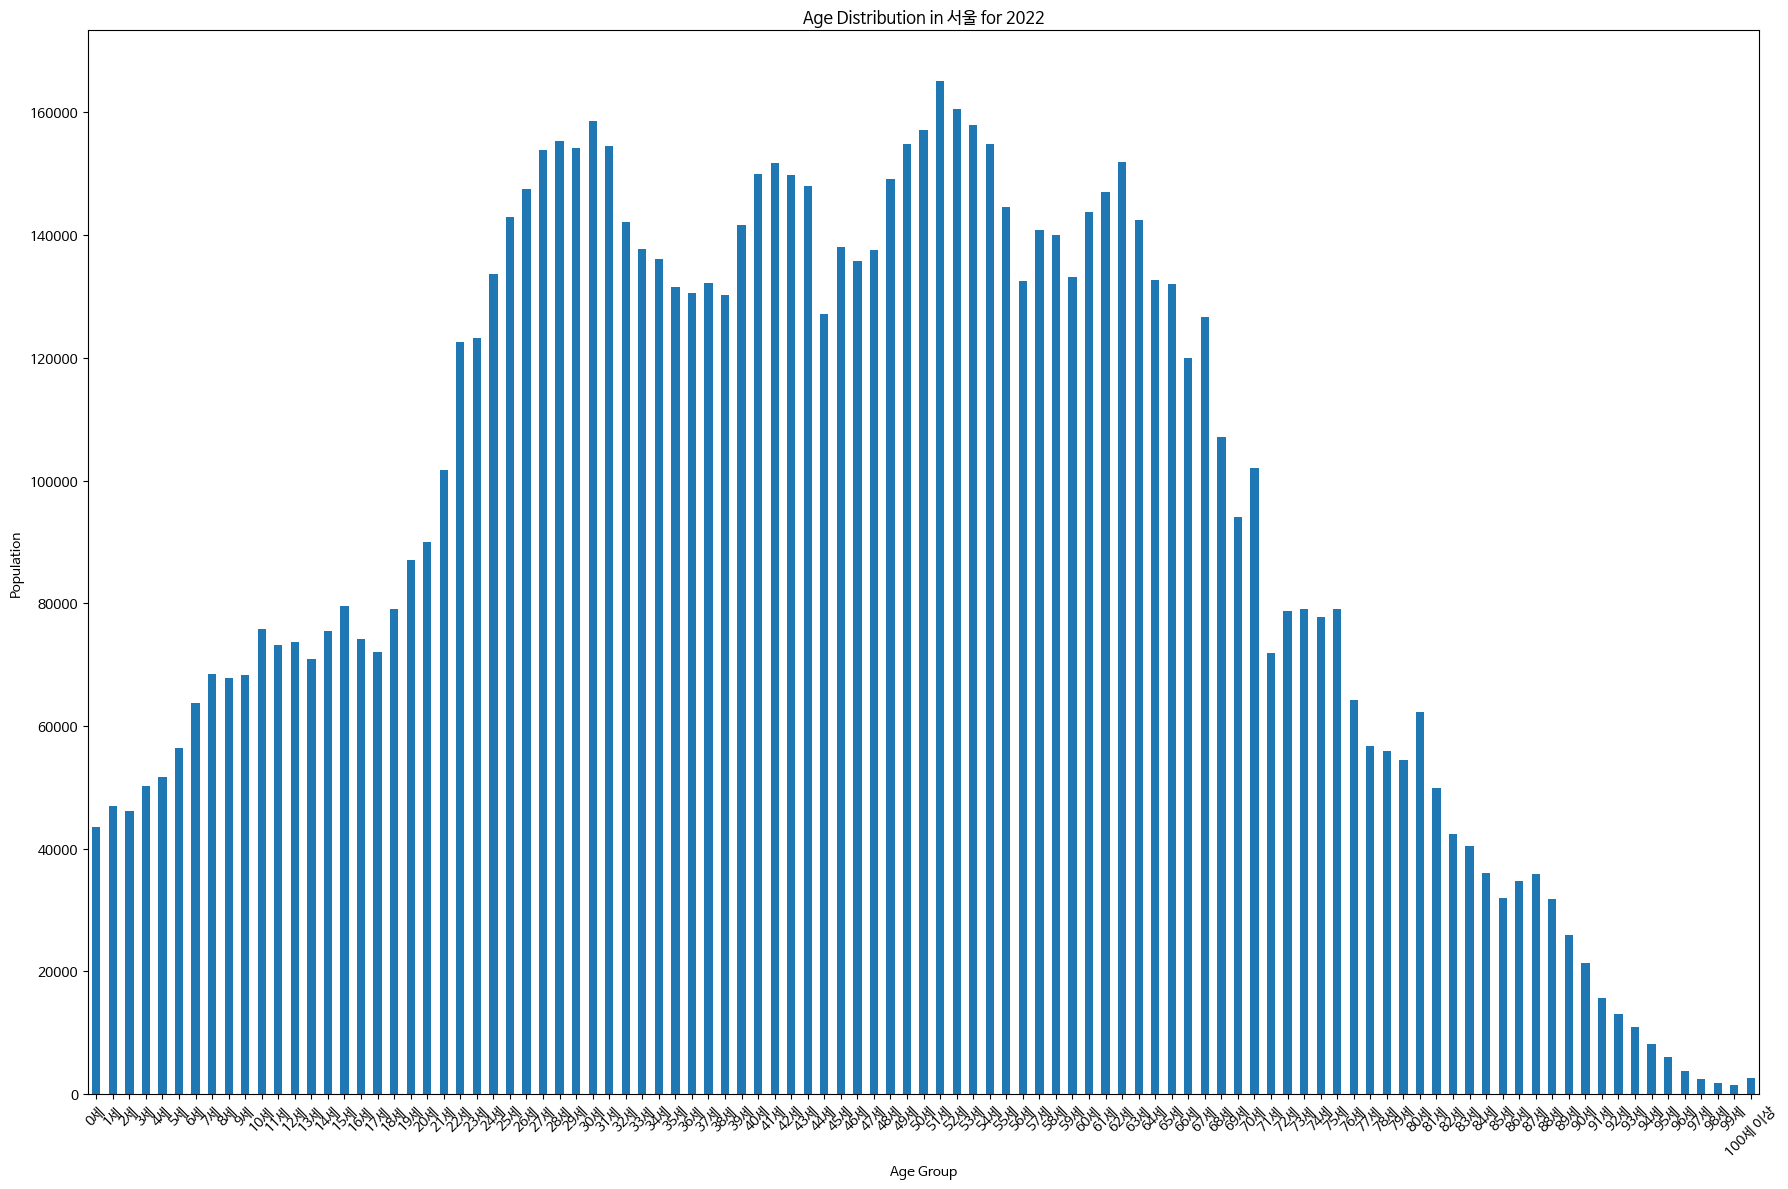

In [147]:
plot_age_distribution('서울', 2022)


In [171]:
regions_years = {}
for filename in dfs:
    region, year_with_extension = filename.split('_')
    year = year_with_extension.split('.')[0]

    # Adding to the dictionary
    if region not in regions_years:
        regions_years[region] = []
    regions_years[region].append(year)
regions_years

{'충청남도': ['2022'],
 '강원도': ['2022'],
 '인천': ['2022'],
 '경기도': ['2022'],
 '제주': ['2022'],
 '광주': ['2022'],
 '전라북도': ['2022'],
 '전라남도': ['2022'],
 '세종': ['2022'],
 '충청북도': ['2022'],
 '대구': ['2022'],
 '경상북도': ['2022'],
 '경상남도': ['2022'],
 '울산': ['2022'],
 '대전': ['2022'],
 '서울': ['2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022'],
 '부산': ['2022']}

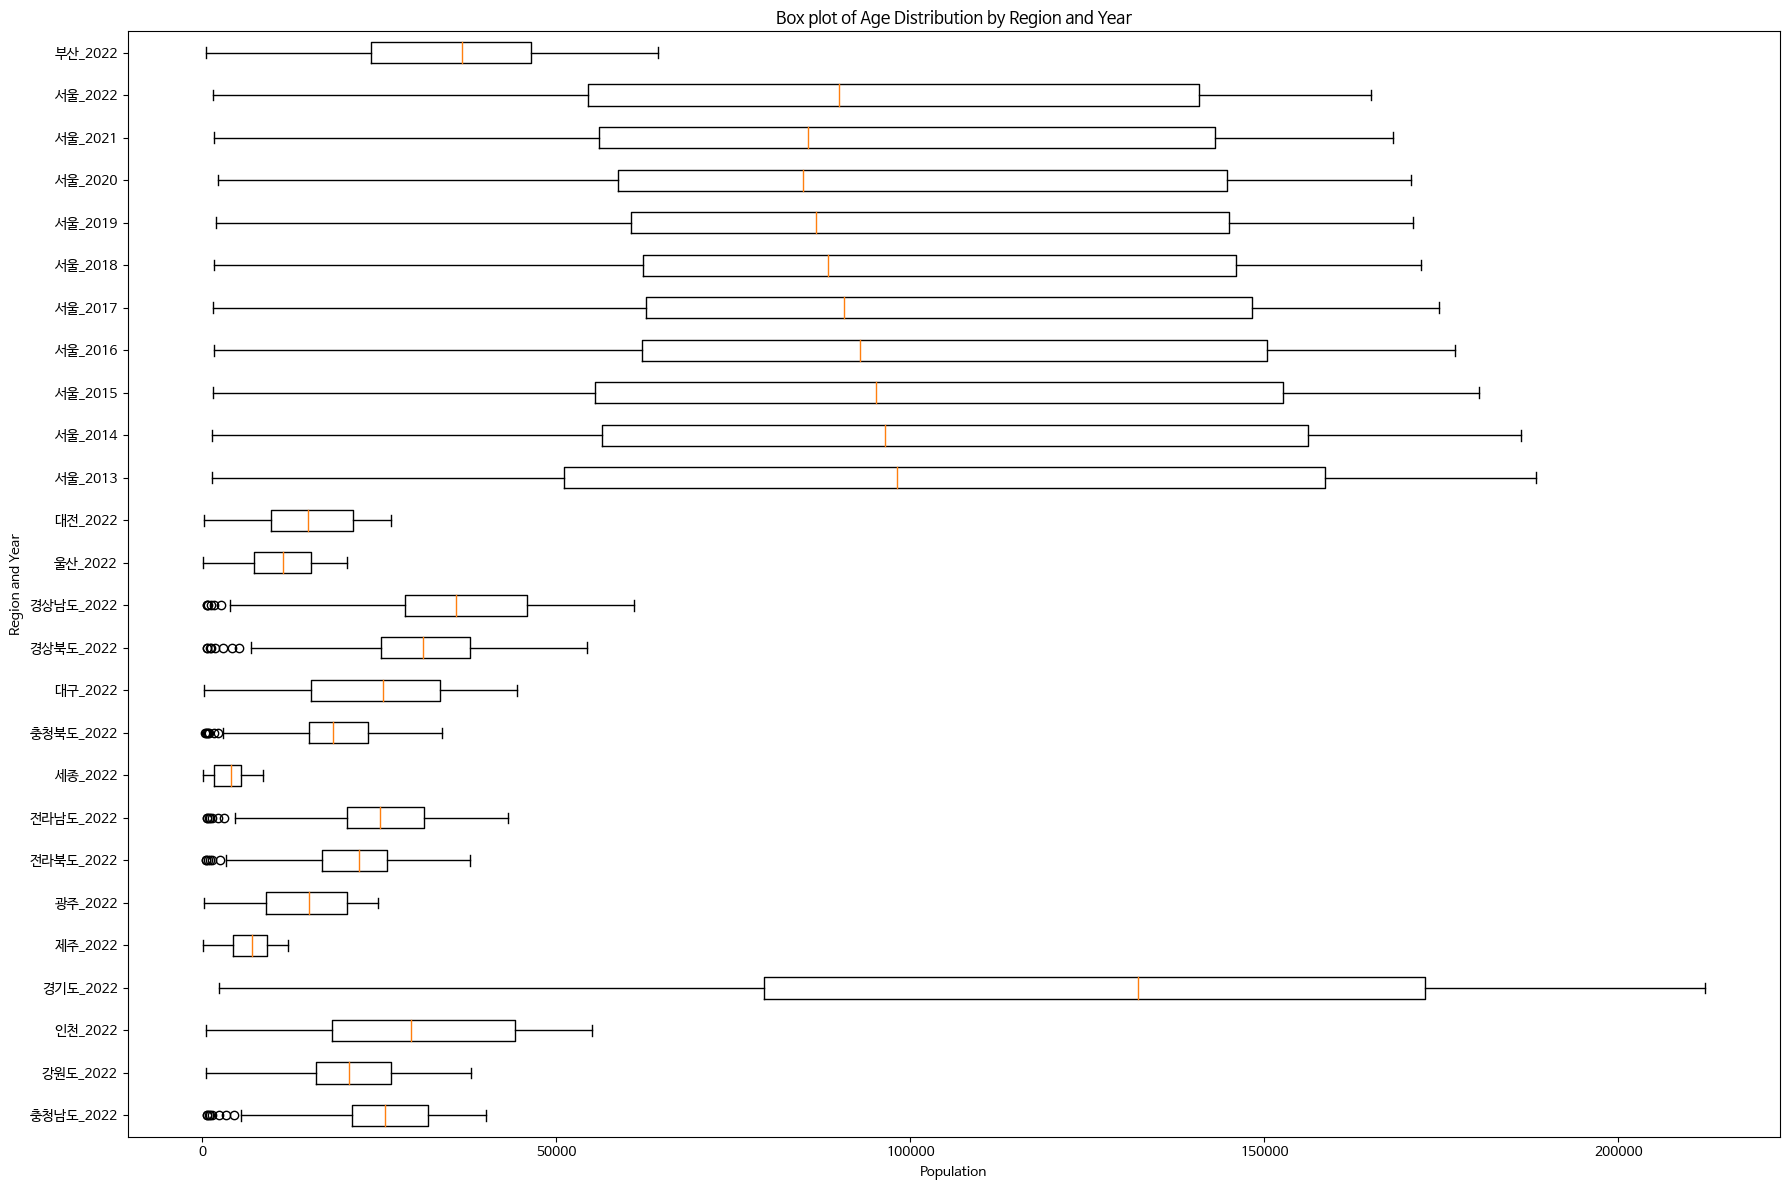

In [175]:
def boxplot_age_distribution_by_region_year(regions_years, data_dir=dfs_path):
    all_distributions = []

    for region, years in regions_years.items():
        for year in years:
            region_nfc = unicodedata.normalize('NFC', region)
            file = os.path.join(data_dir, f"{region_nfc}_{year}.csv")
            df = pd.read_csv(file)
            age_columns = df.columns[4:]

            for column in age_columns:
                df[column] = pd.to_numeric(df[column], errors='coerce')

            age_distribution = df[age_columns].sum()
            all_distributions.append(age_distribution)

    plt.figure(figsize=(18, 12))
    plt.boxplot(all_distributions, vert=False)  # Horizontal boxplots
    y_ticks_labels = [f"{region}_{year}" for region, years in regions_years.items() for year in years]
    plt.yticks(range(1, len(y_ticks_labels) + 1), y_ticks_labels)
    plt.title("Box plot of Age Distribution by Region and Year")
    plt.xlabel("Population")
    plt.ylabel("Region and Year")
    plt.tight_layout()
    plt.show()

boxplot_age_distribution_by_region_year(regions_years)

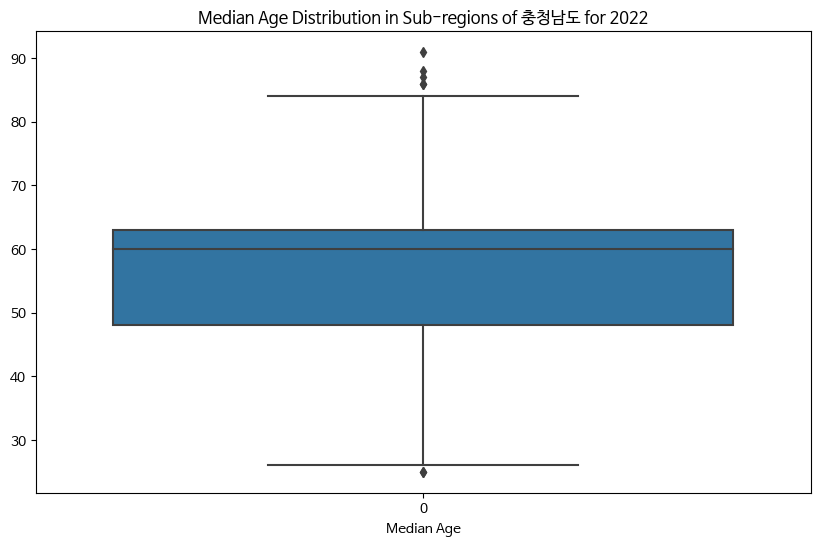

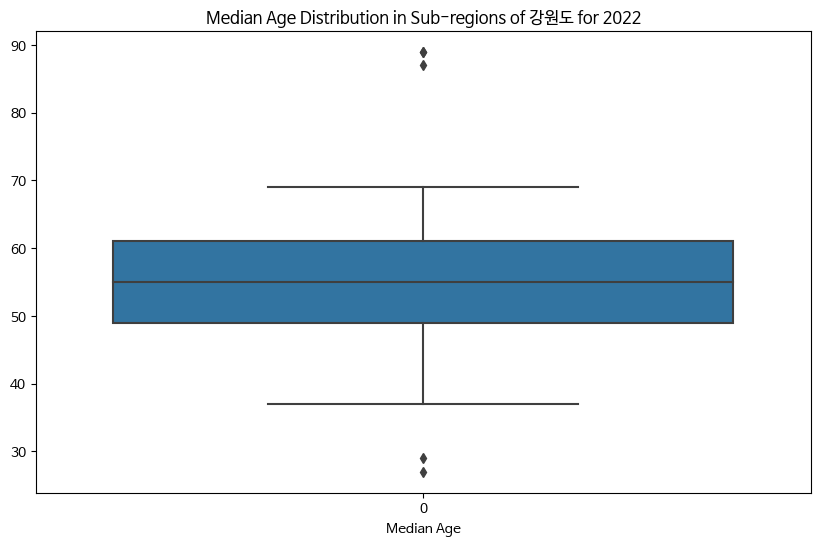

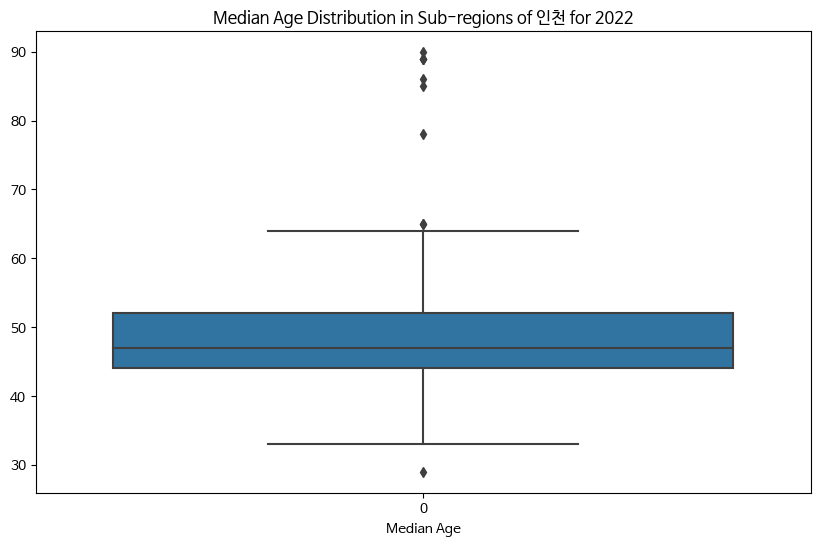

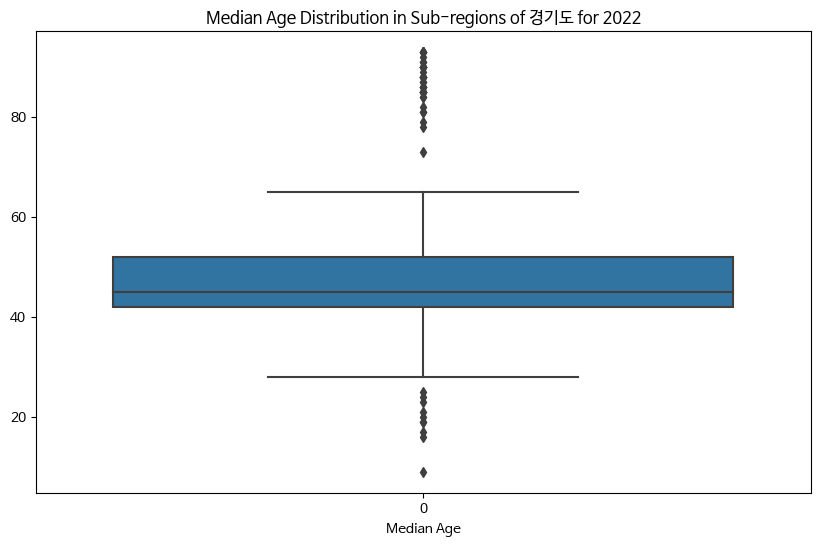

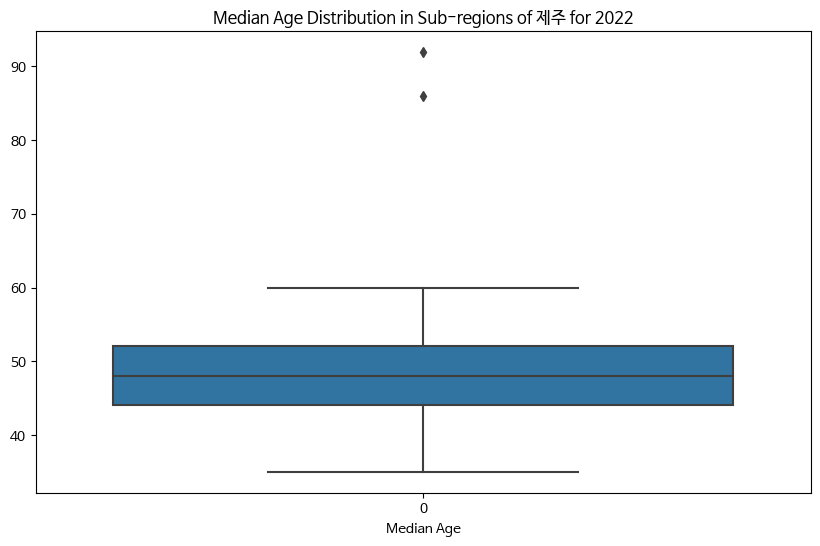

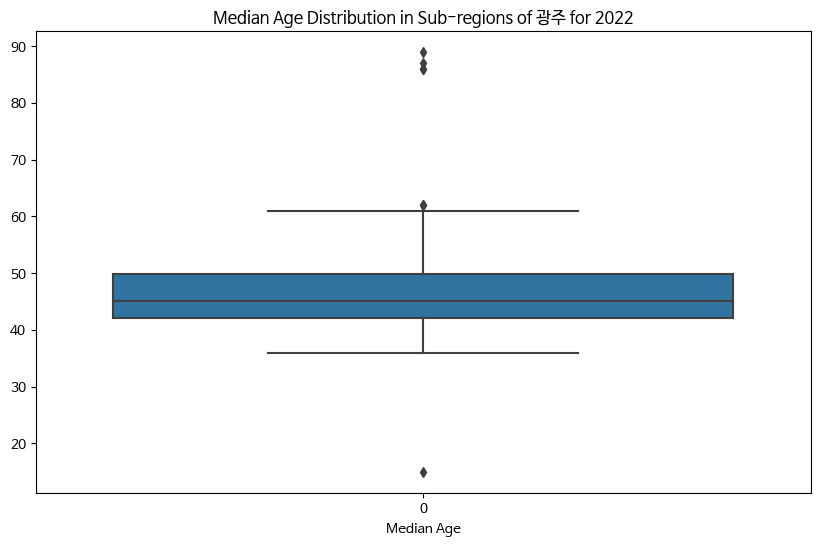

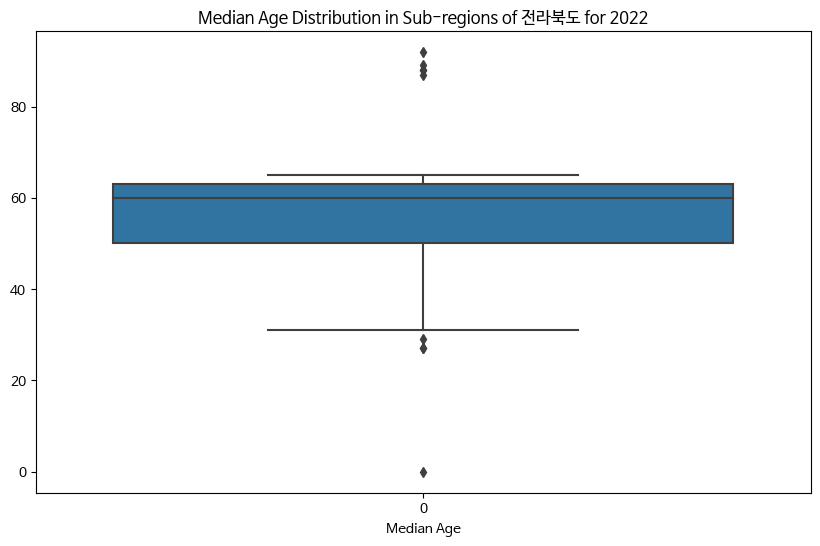

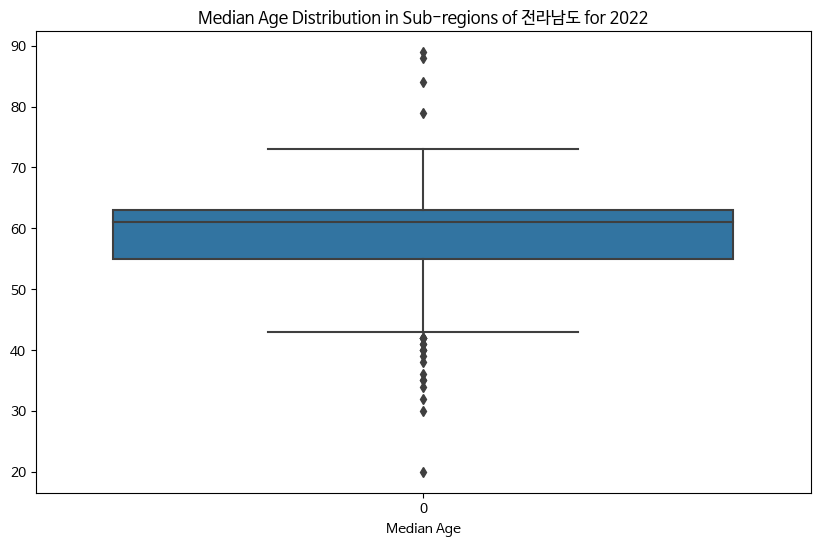

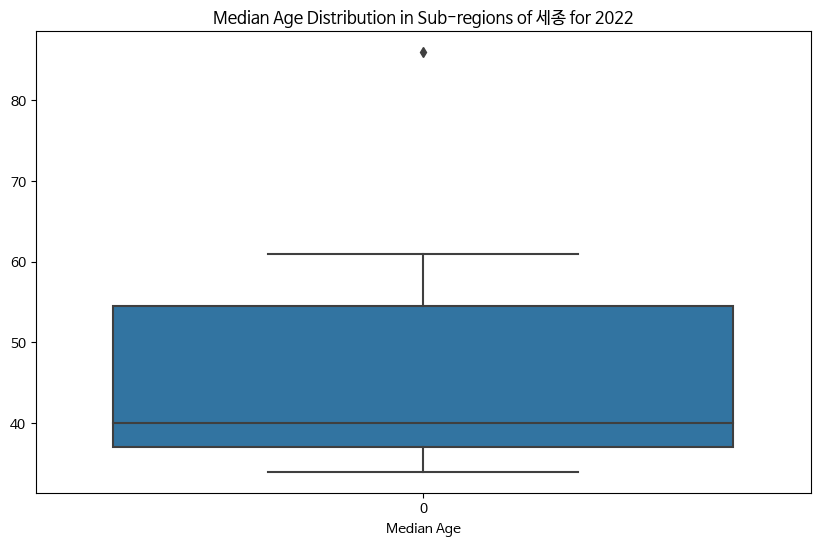

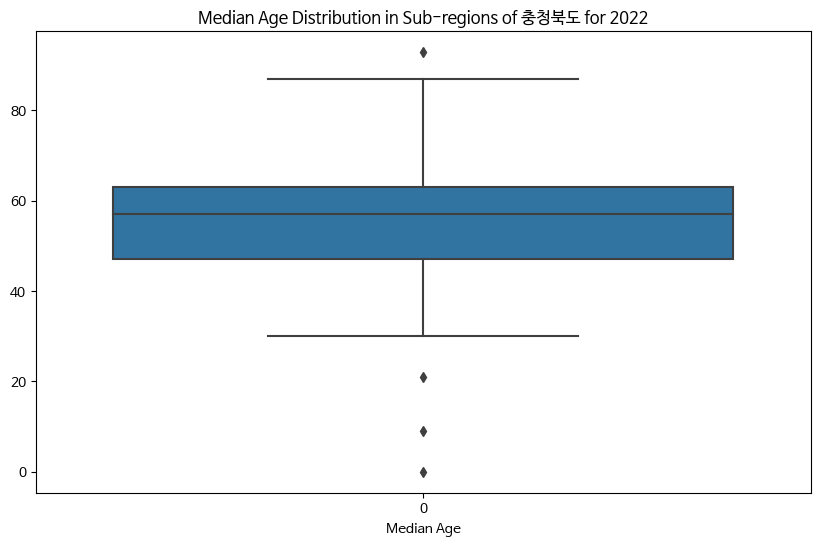

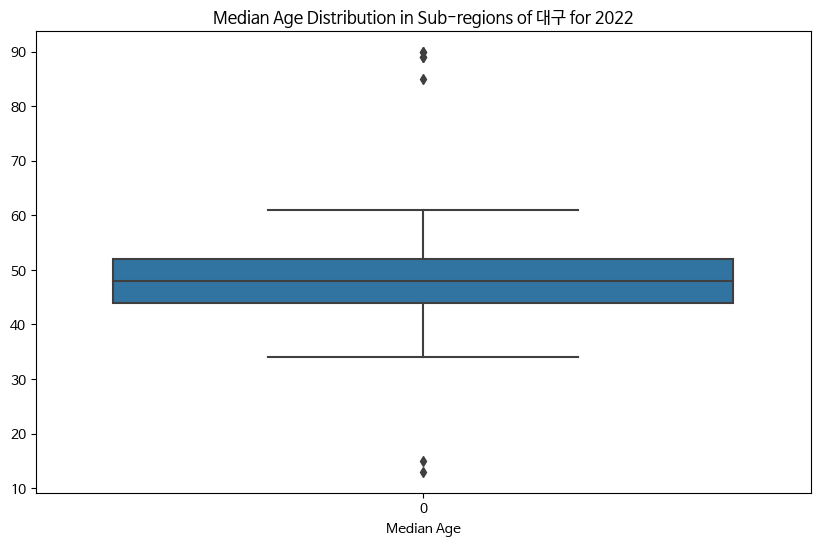

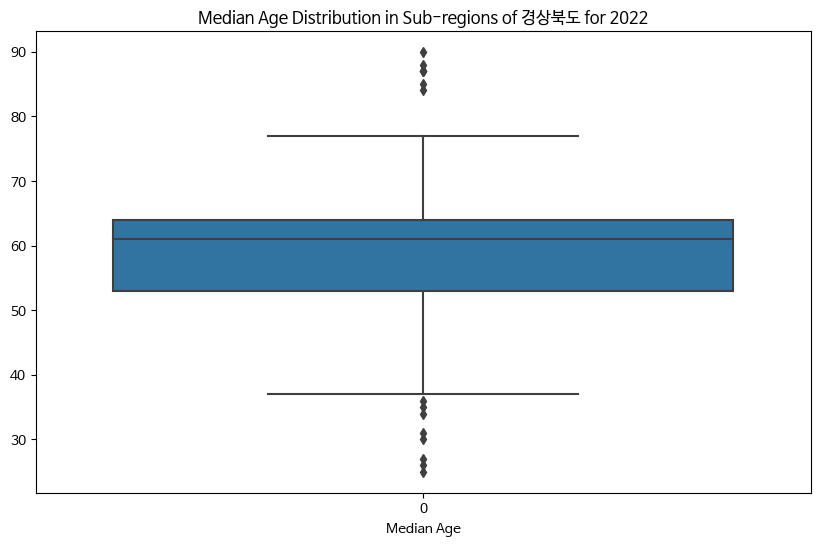

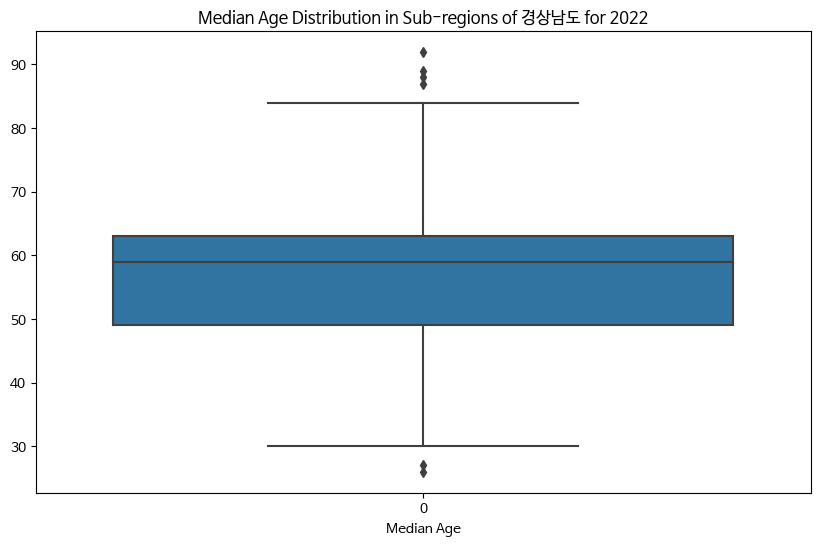

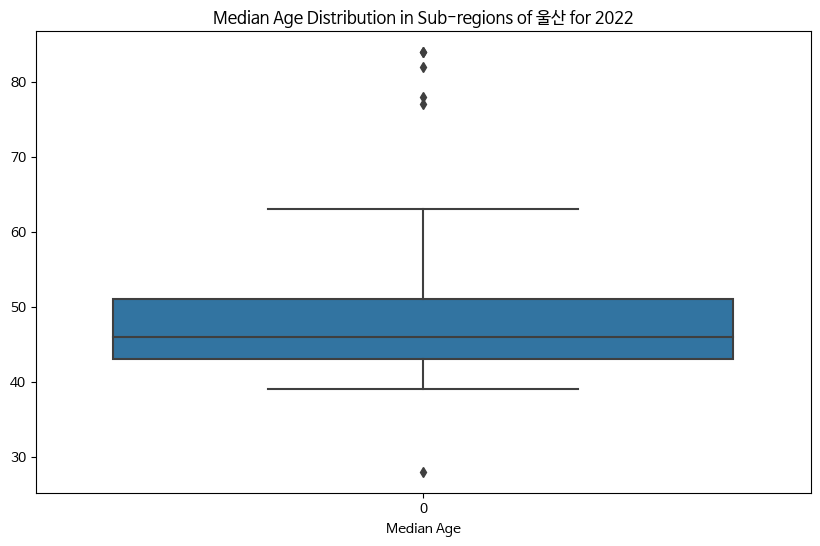

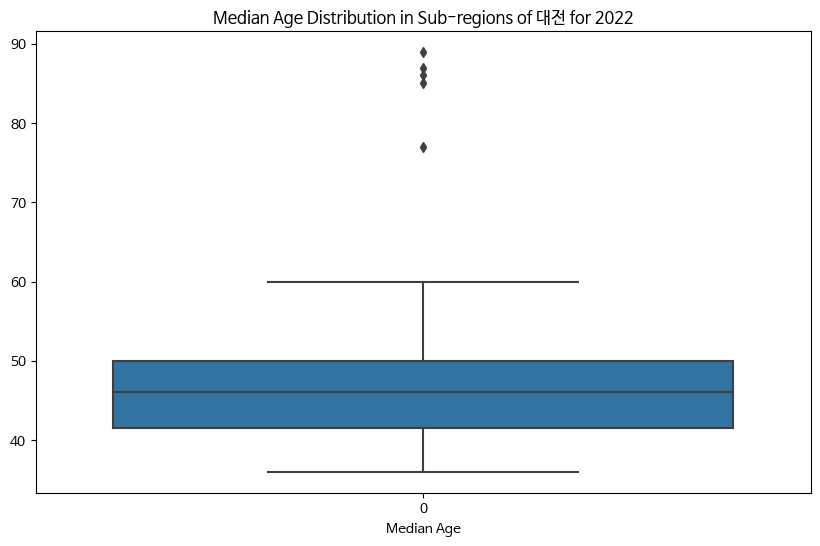

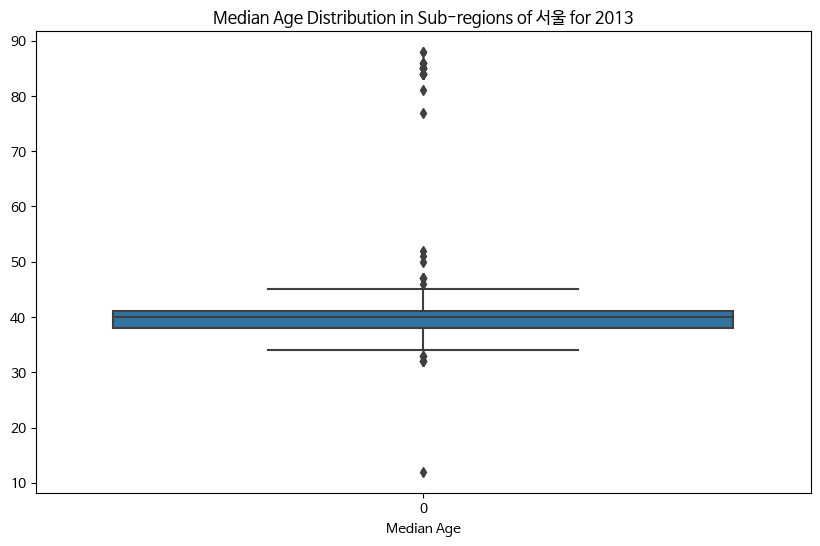

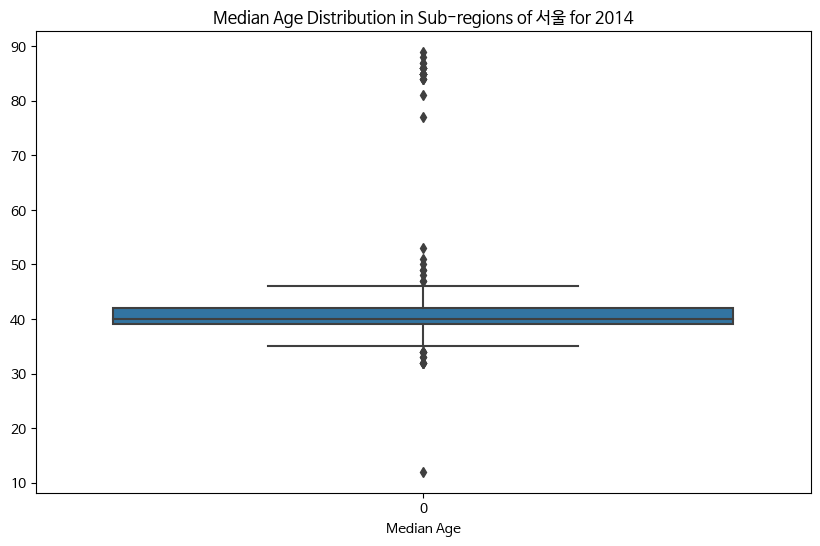

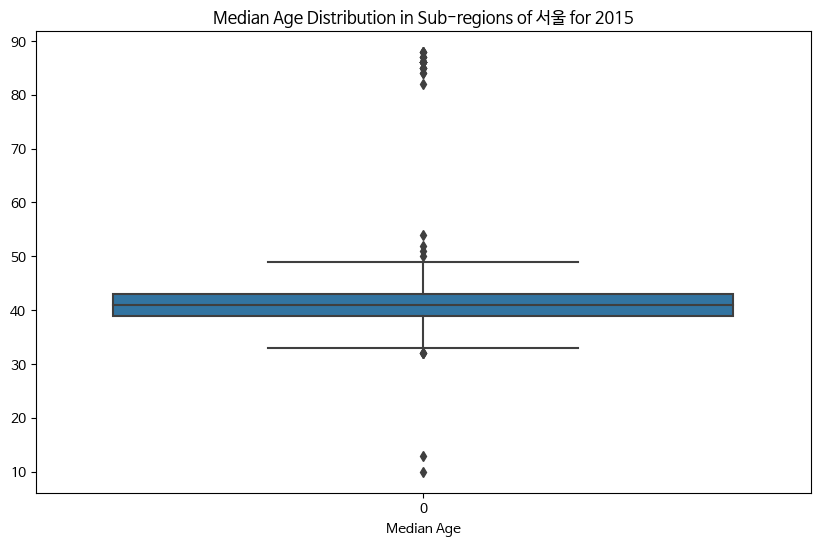

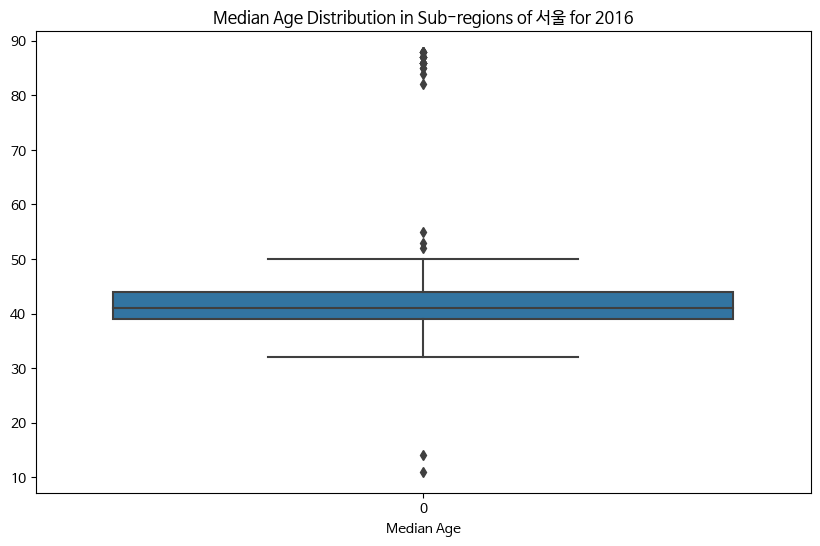

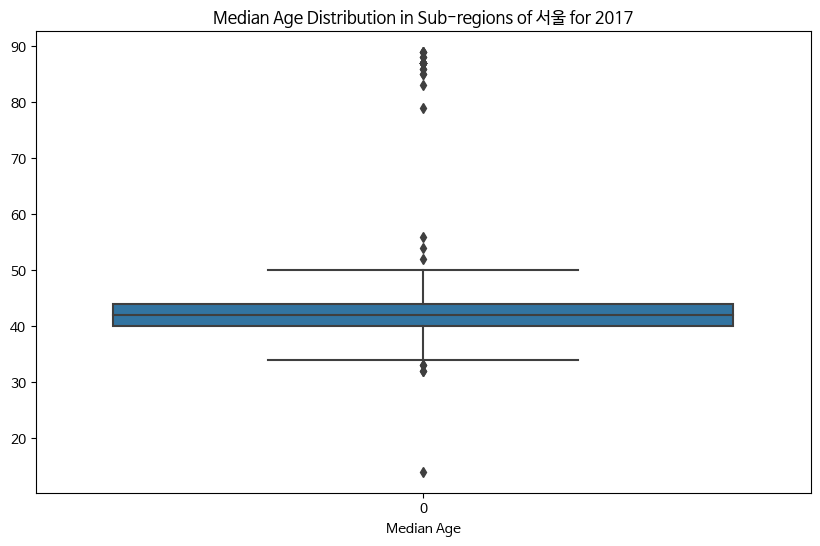

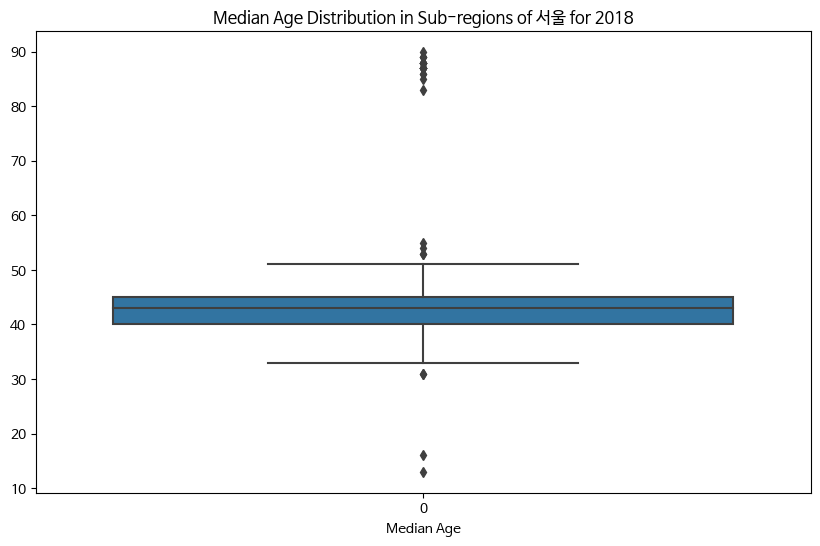

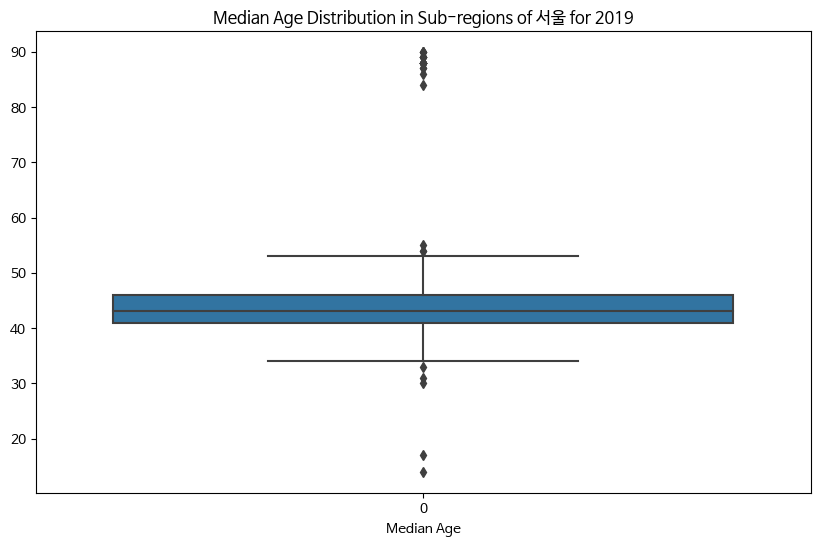

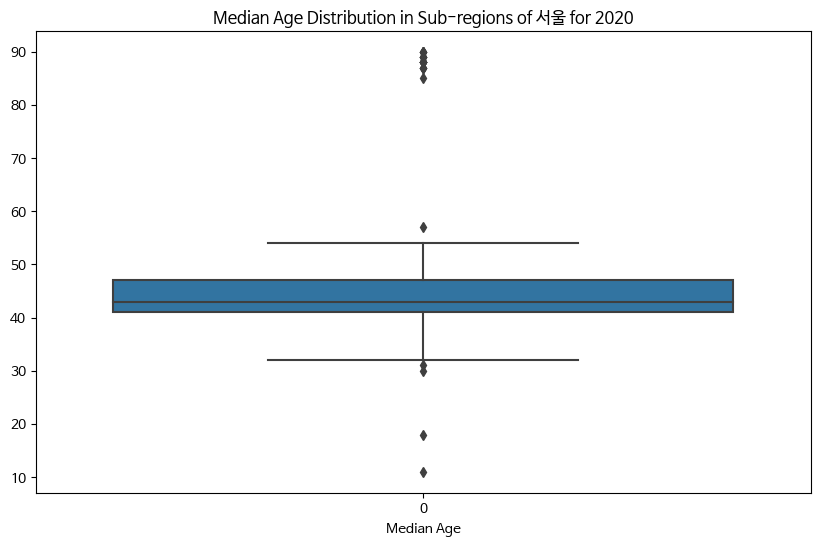

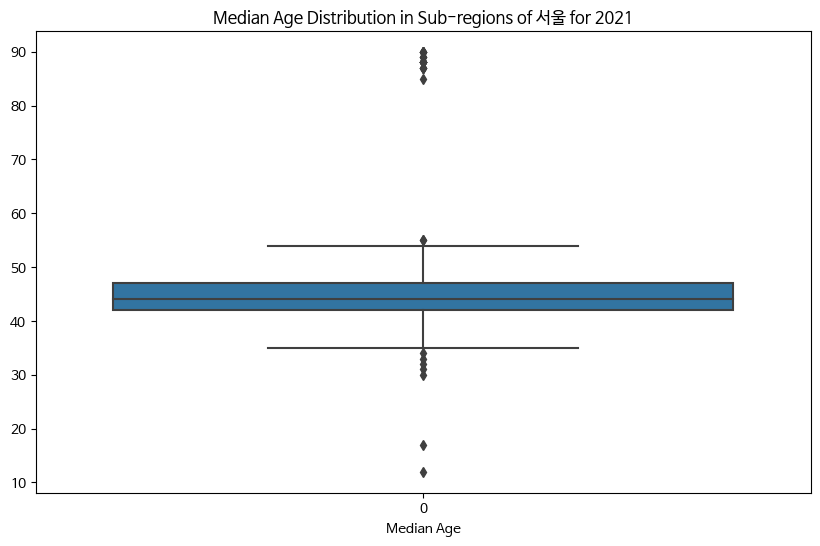

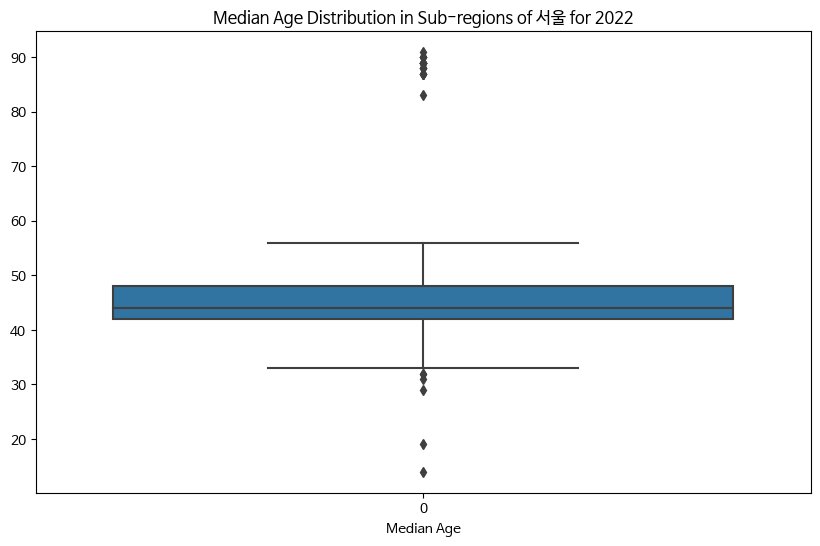

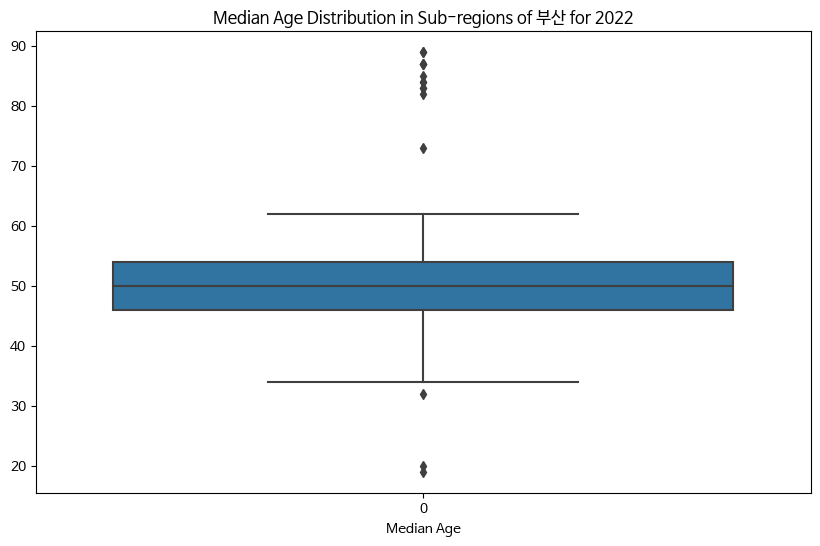

In [187]:
def plot_age_boxplot(regions_years, data_dir=dfs_path):
    for region, years in regions_years.items():
        for year in years:
            region_nfc = unicodedata.normalize('NFC', region)
            file = os.path.join(data_dir, f"{region_nfc}_{year}.csv")
            df = pd.read_csv(file)

            age_columns = df.columns[4:-1]
            df[age_columns] = df[age_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

            subregion_df = df[df['행정기관'].str.startswith(region)]
            medians = []
            for index, row in subregion_df.iterrows():
                total_pop = row[age_columns].sum()
                median_age = None
                cumulative_pop = 0
                for age, pop in row[age_columns].items():
                    cumulative_pop += pop
                    if cumulative_pop >= total_pop / 2:
                        median_age = age
                        break

                if median_age is None:
                    print(f"Problem with row: {row}")
                else:
                    medians.append(int(median_age[:-1]))

            plt.figure(figsize=(10, 6))
            sns.boxplot(medians)
            plt.title(f"Median Age Distribution in Sub-regions of {region} for {year}")
            plt.xlabel("Median Age")
            plt.show()


plot_age_boxplot(regions_years)

In [170]:
regions = [r.split('_')[0] for r in dfs]
regions = list(set(regions))

years_csv = [r.split('_')[1] for r in dfs]
years = [year.split('.')[0] for year in years_csv]
years = sorted(list(set(years)))

print(regions)
print(years)

['세종', '울산', '충청남도', '경상북도', '인천', '대구', '광주', '경기도', '경상남도', '부산', '제주', '전라북도', '강원도', '충청북도', '서울', '전라남도', '대전']
['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


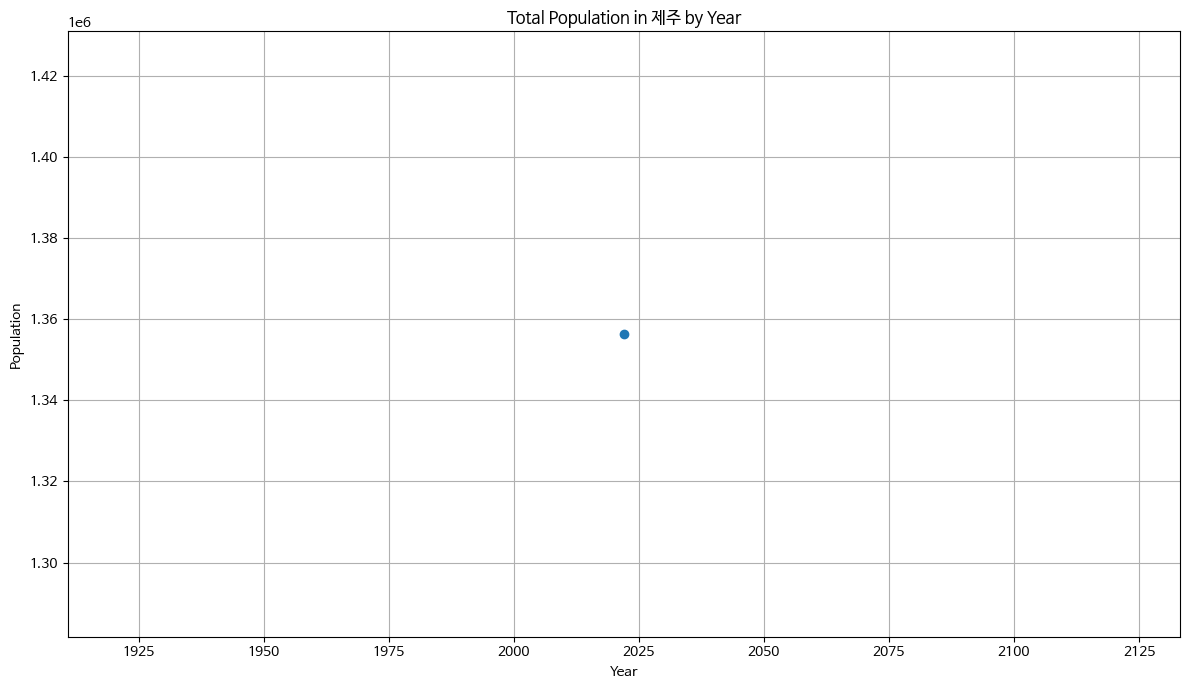

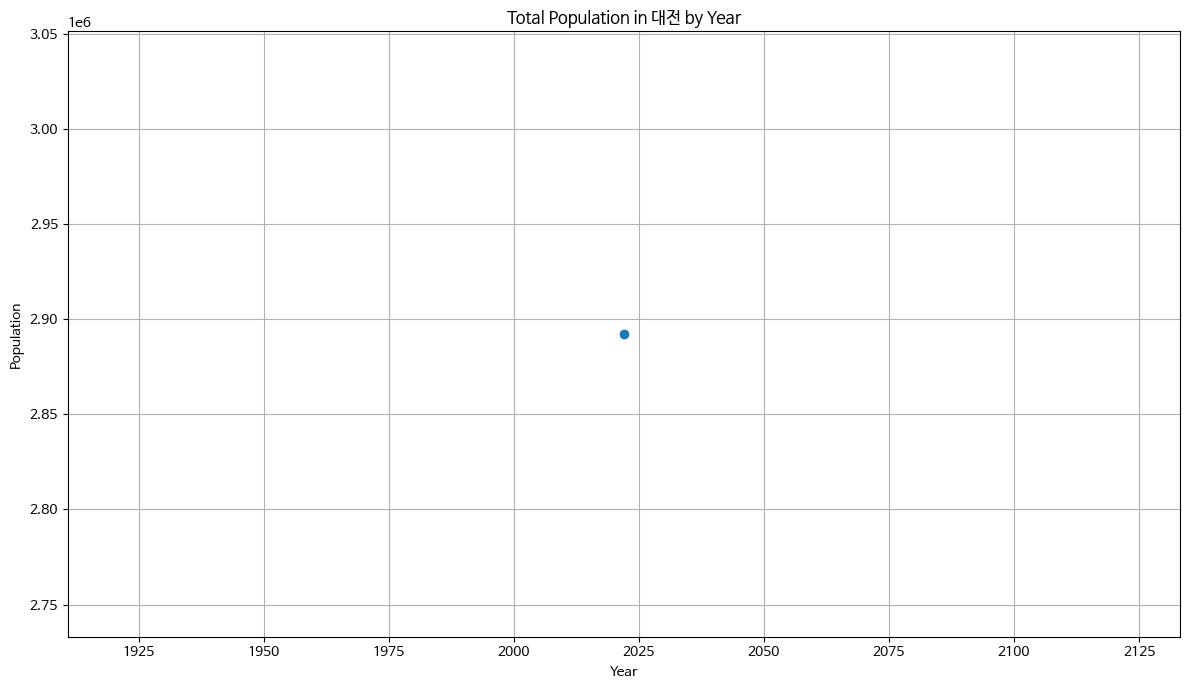

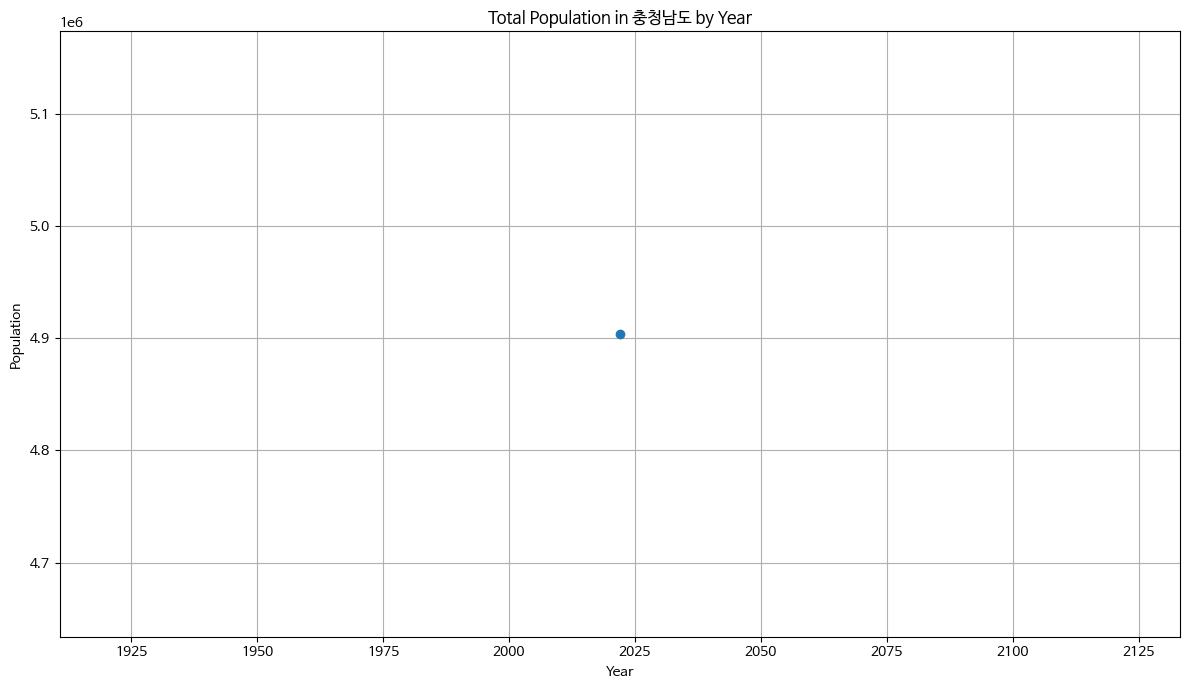

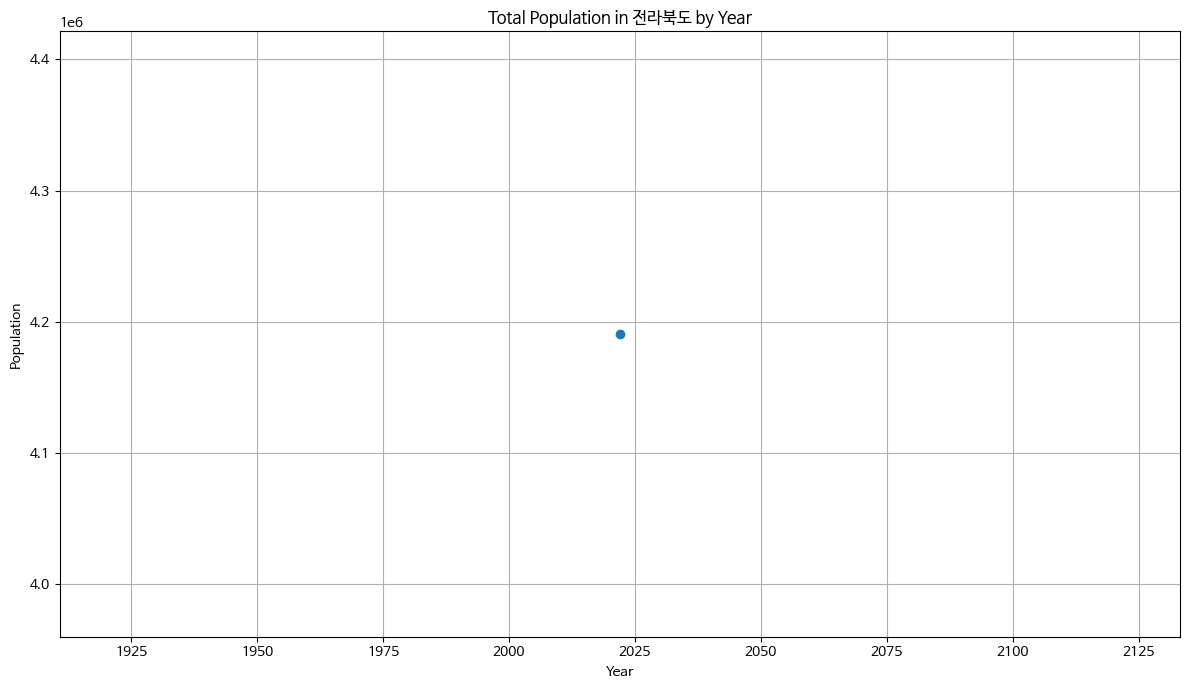

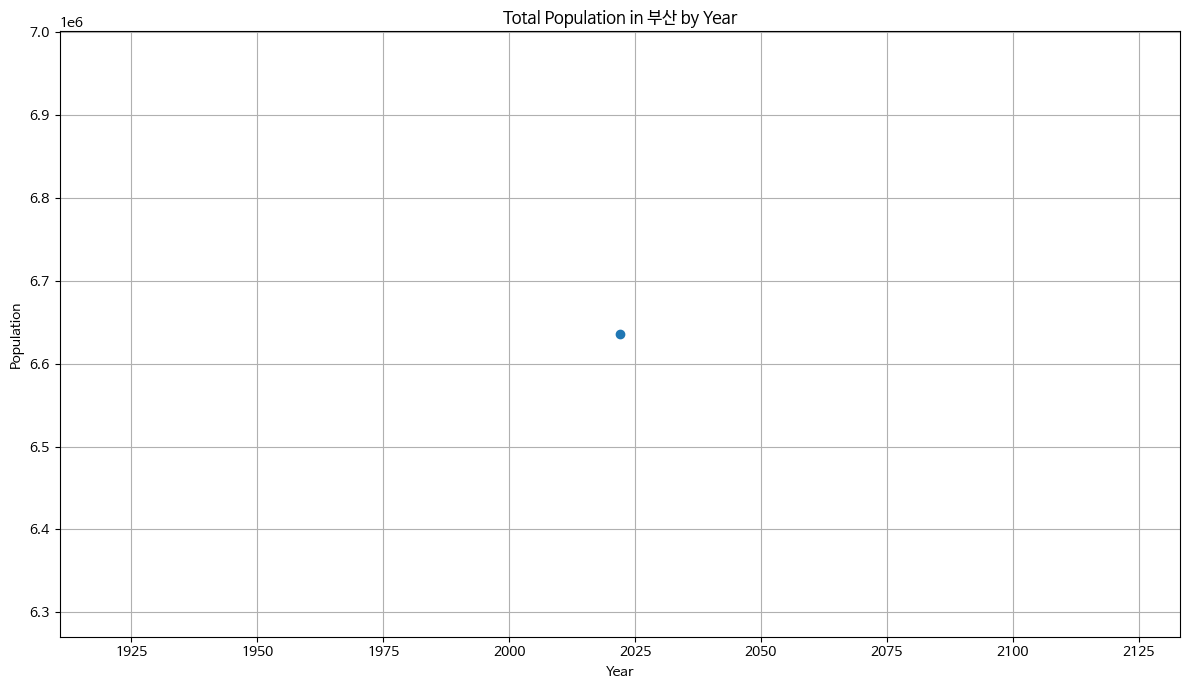

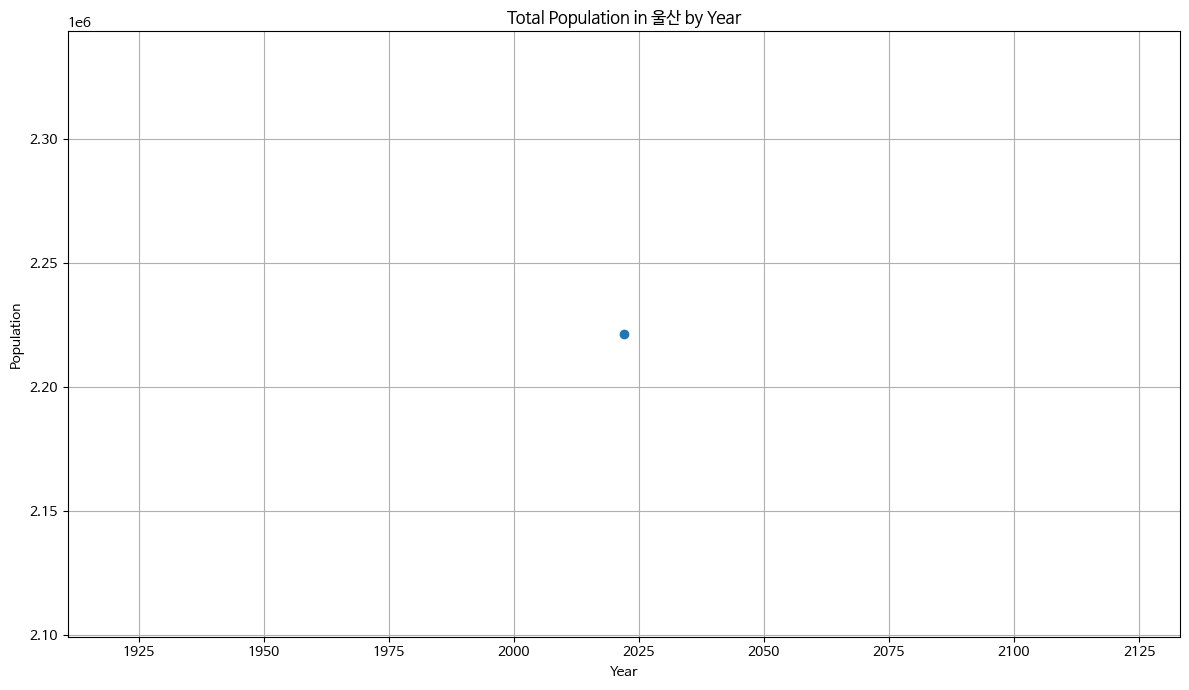

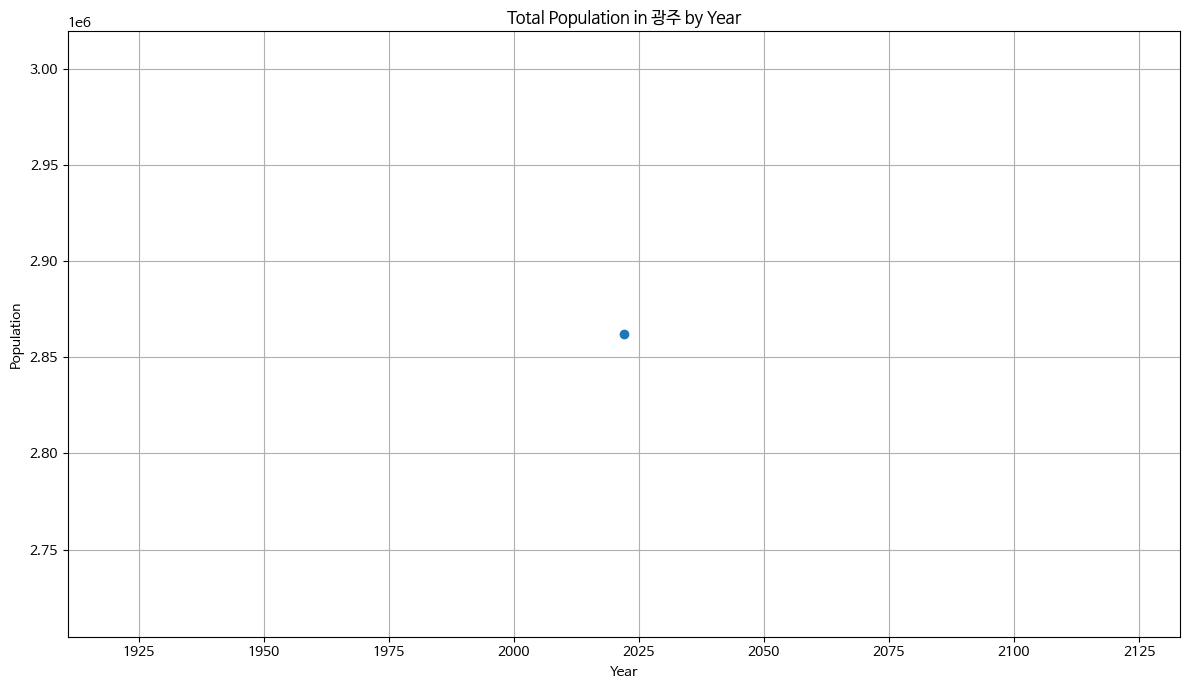

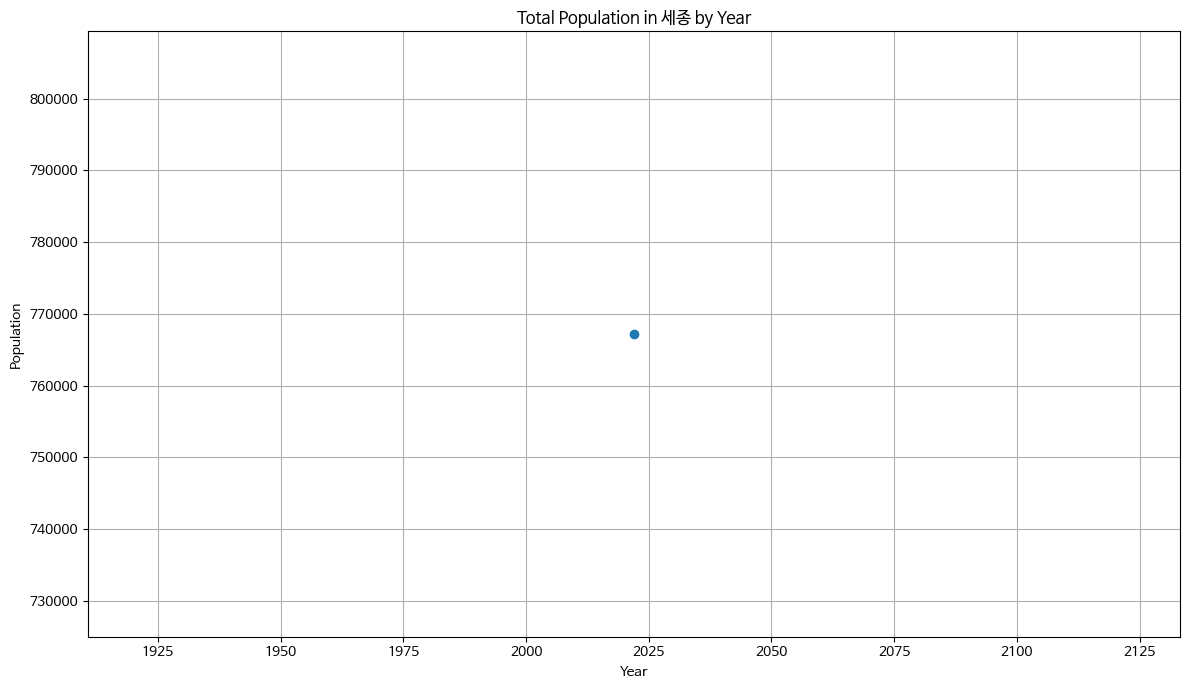

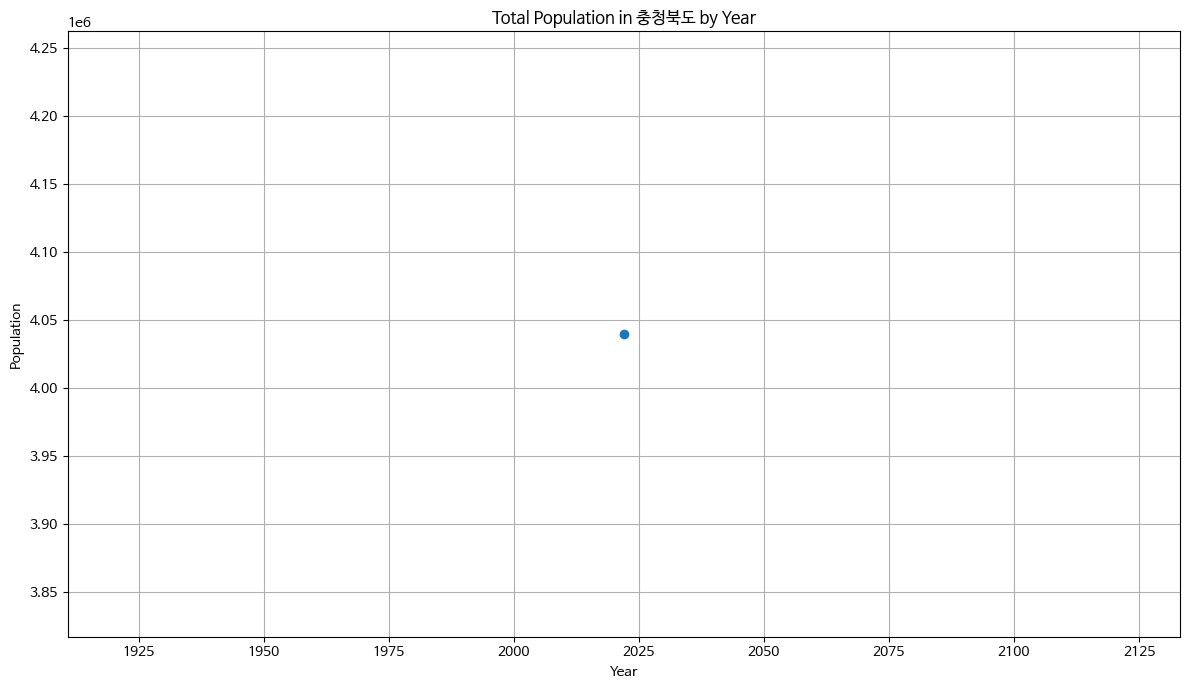

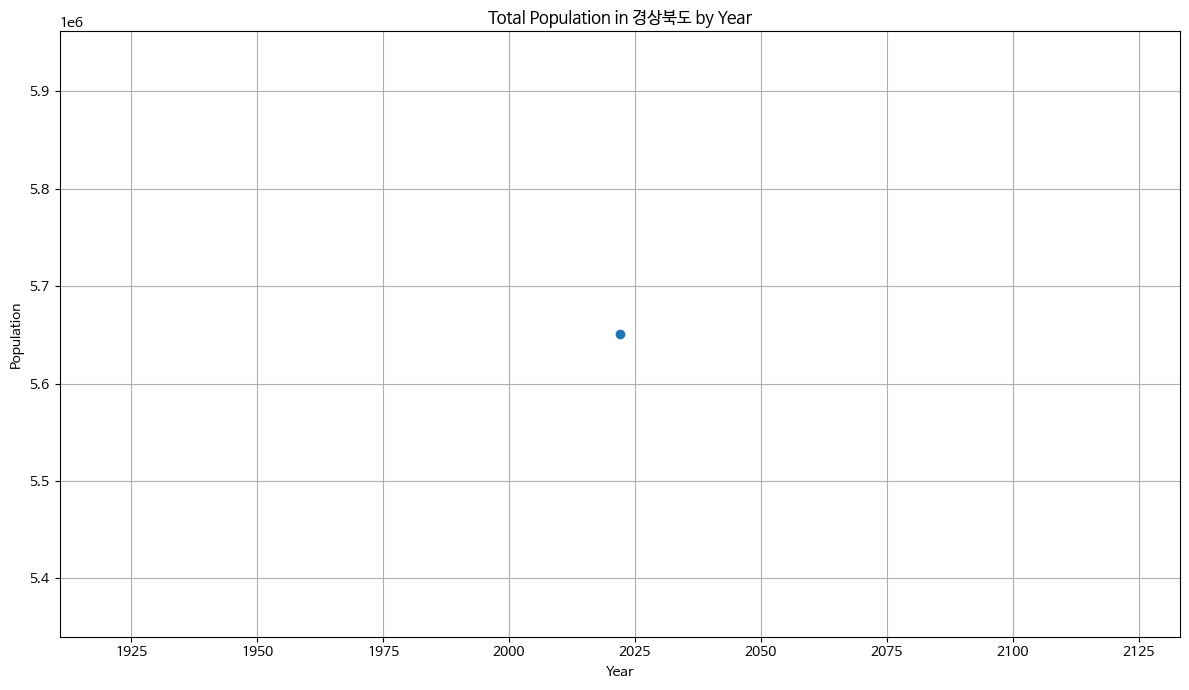

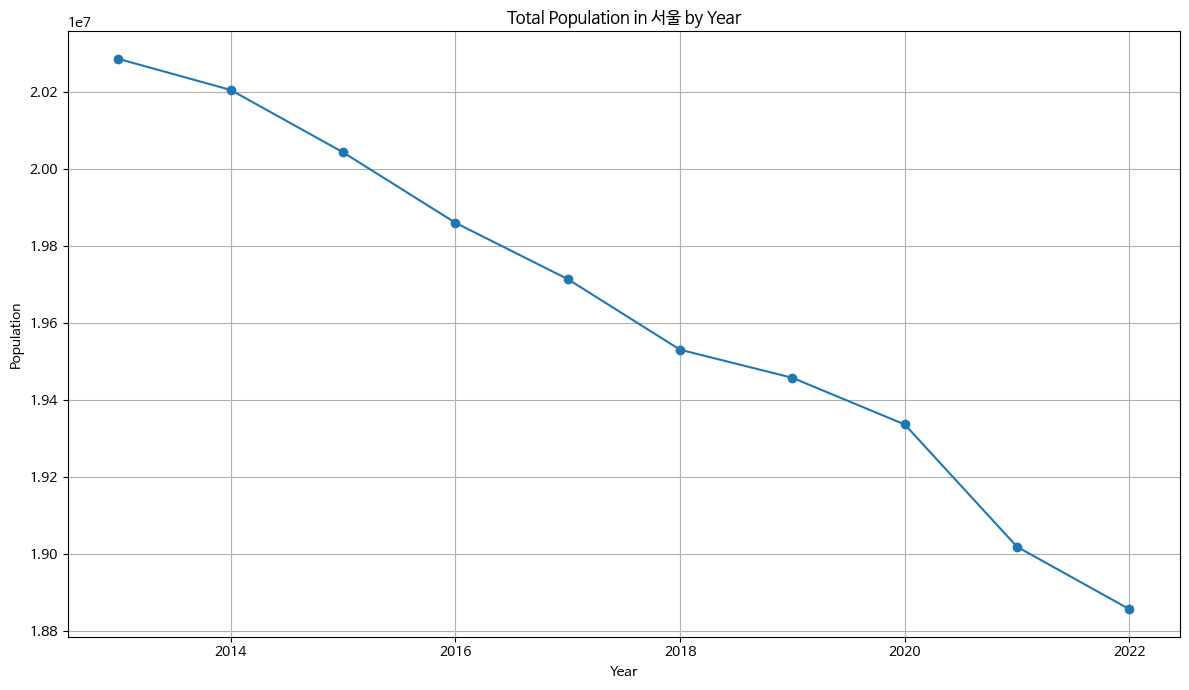

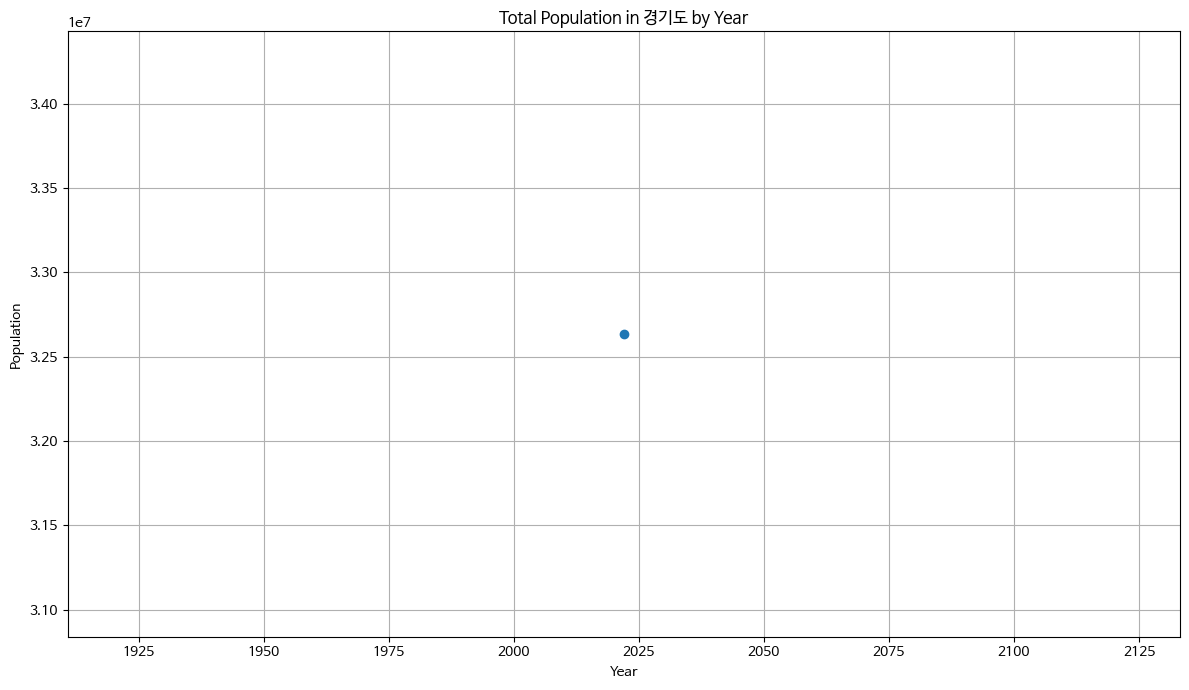

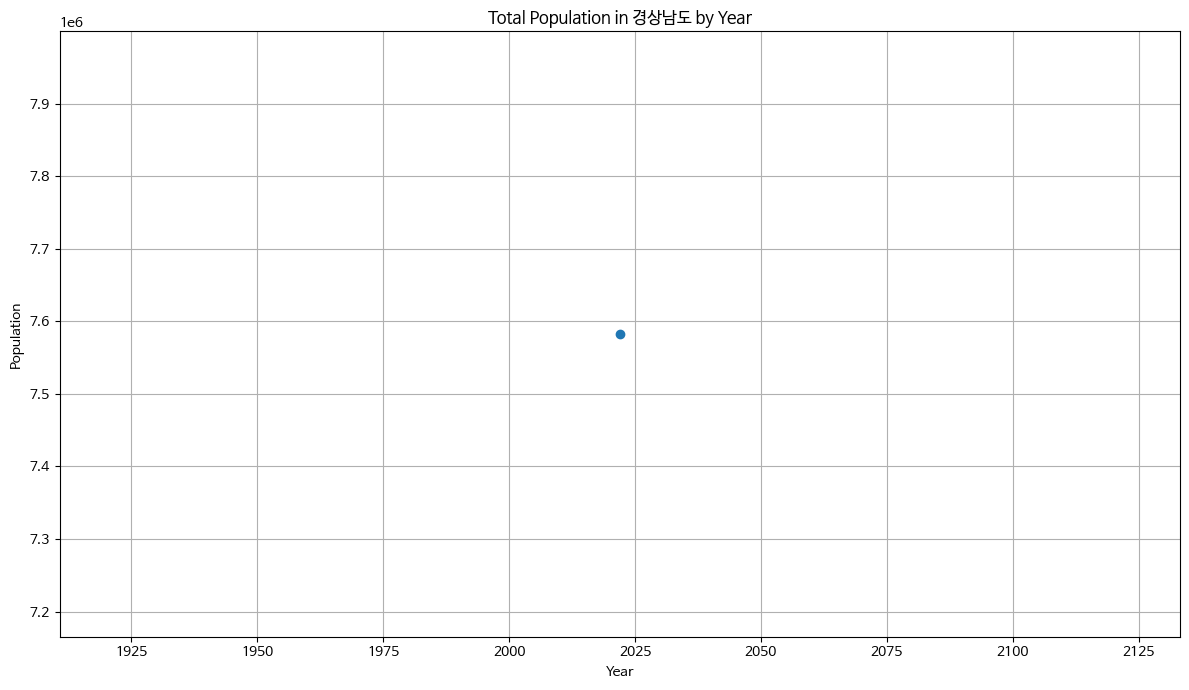

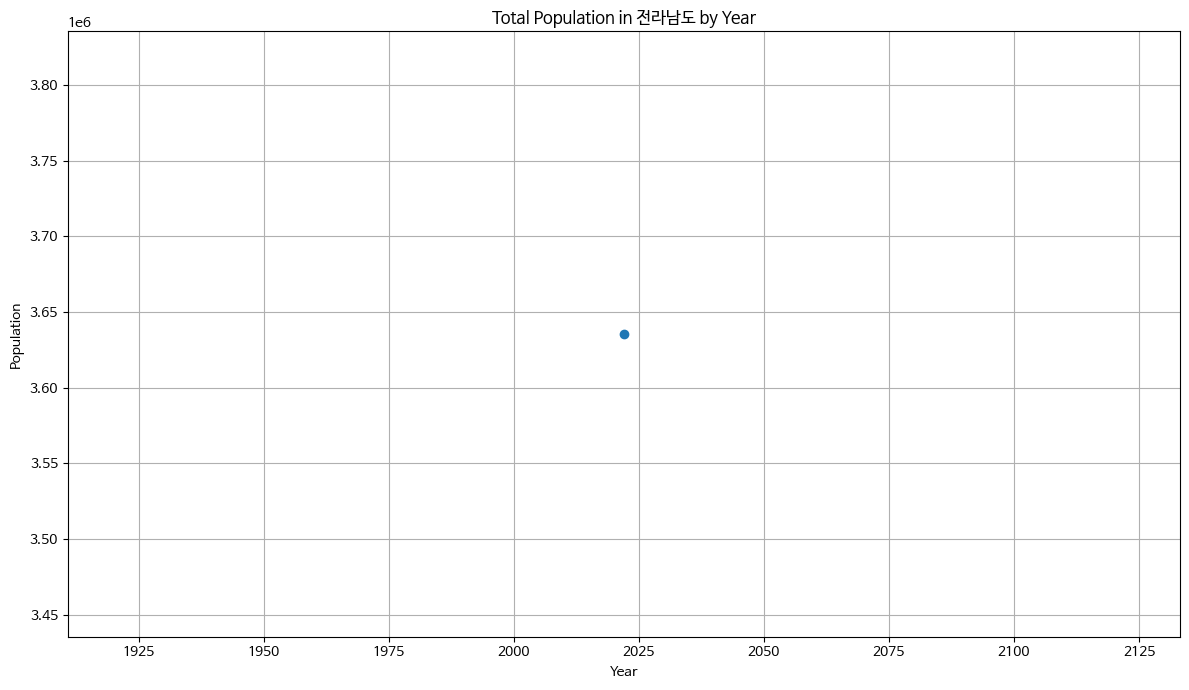

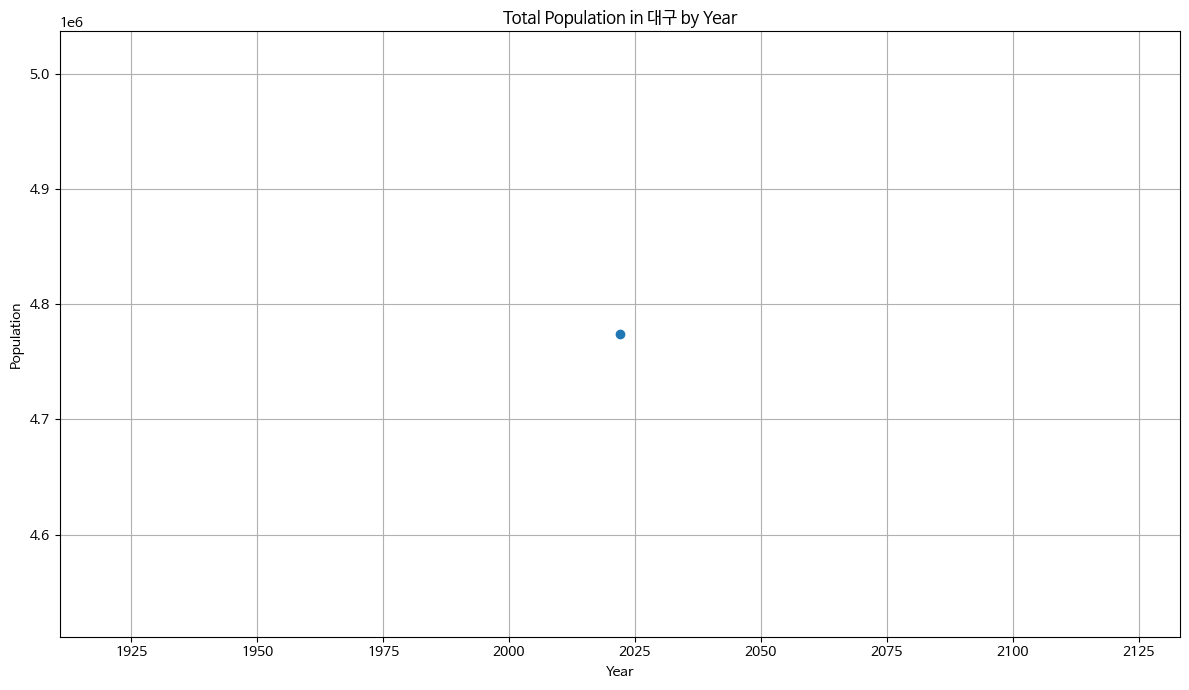

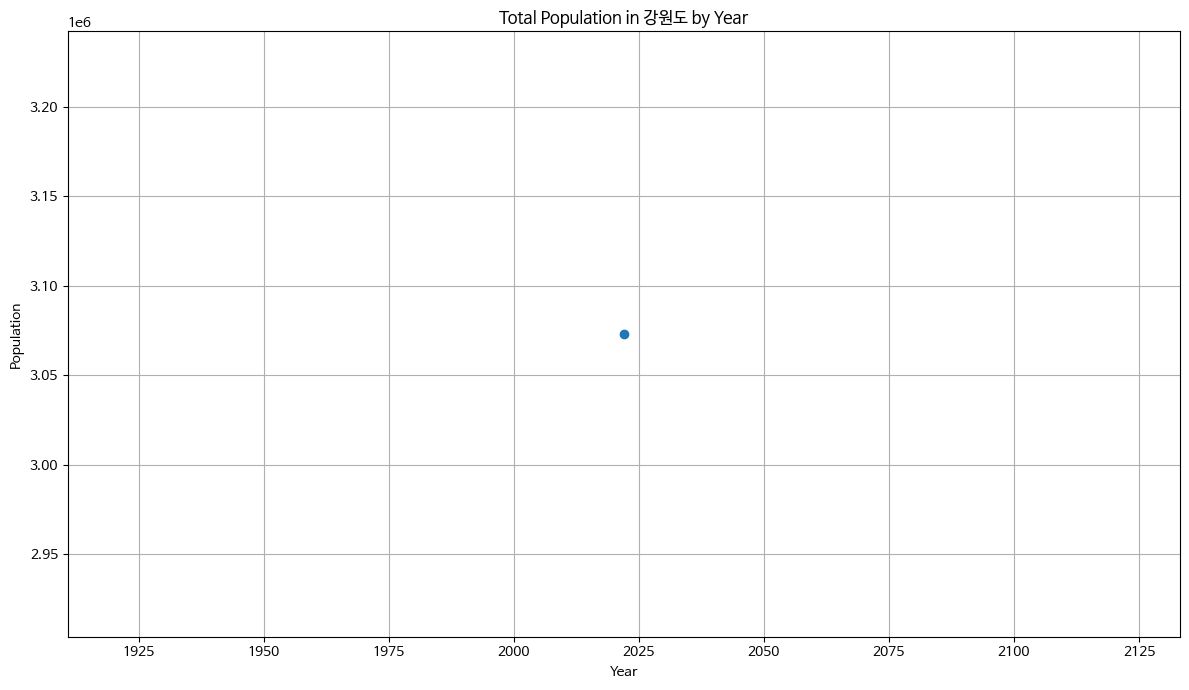

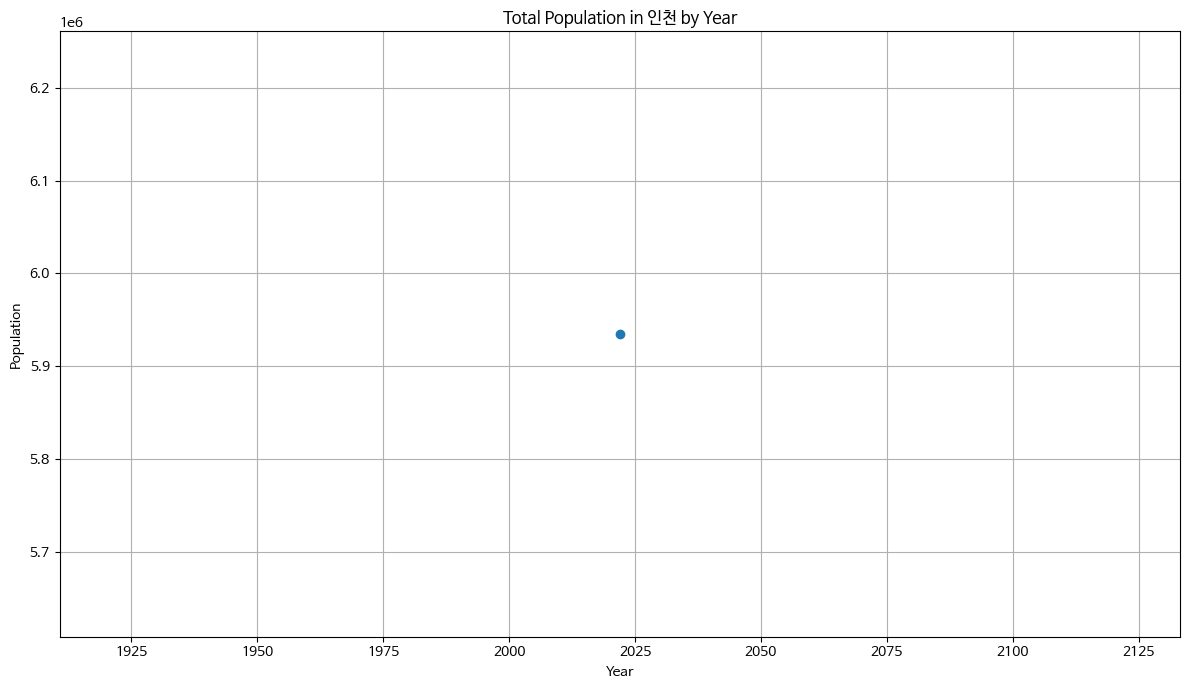

In [157]:
for region in regions:
  region = unicodedata.normalize('NFC', region)
  plot_population_by_year(region)

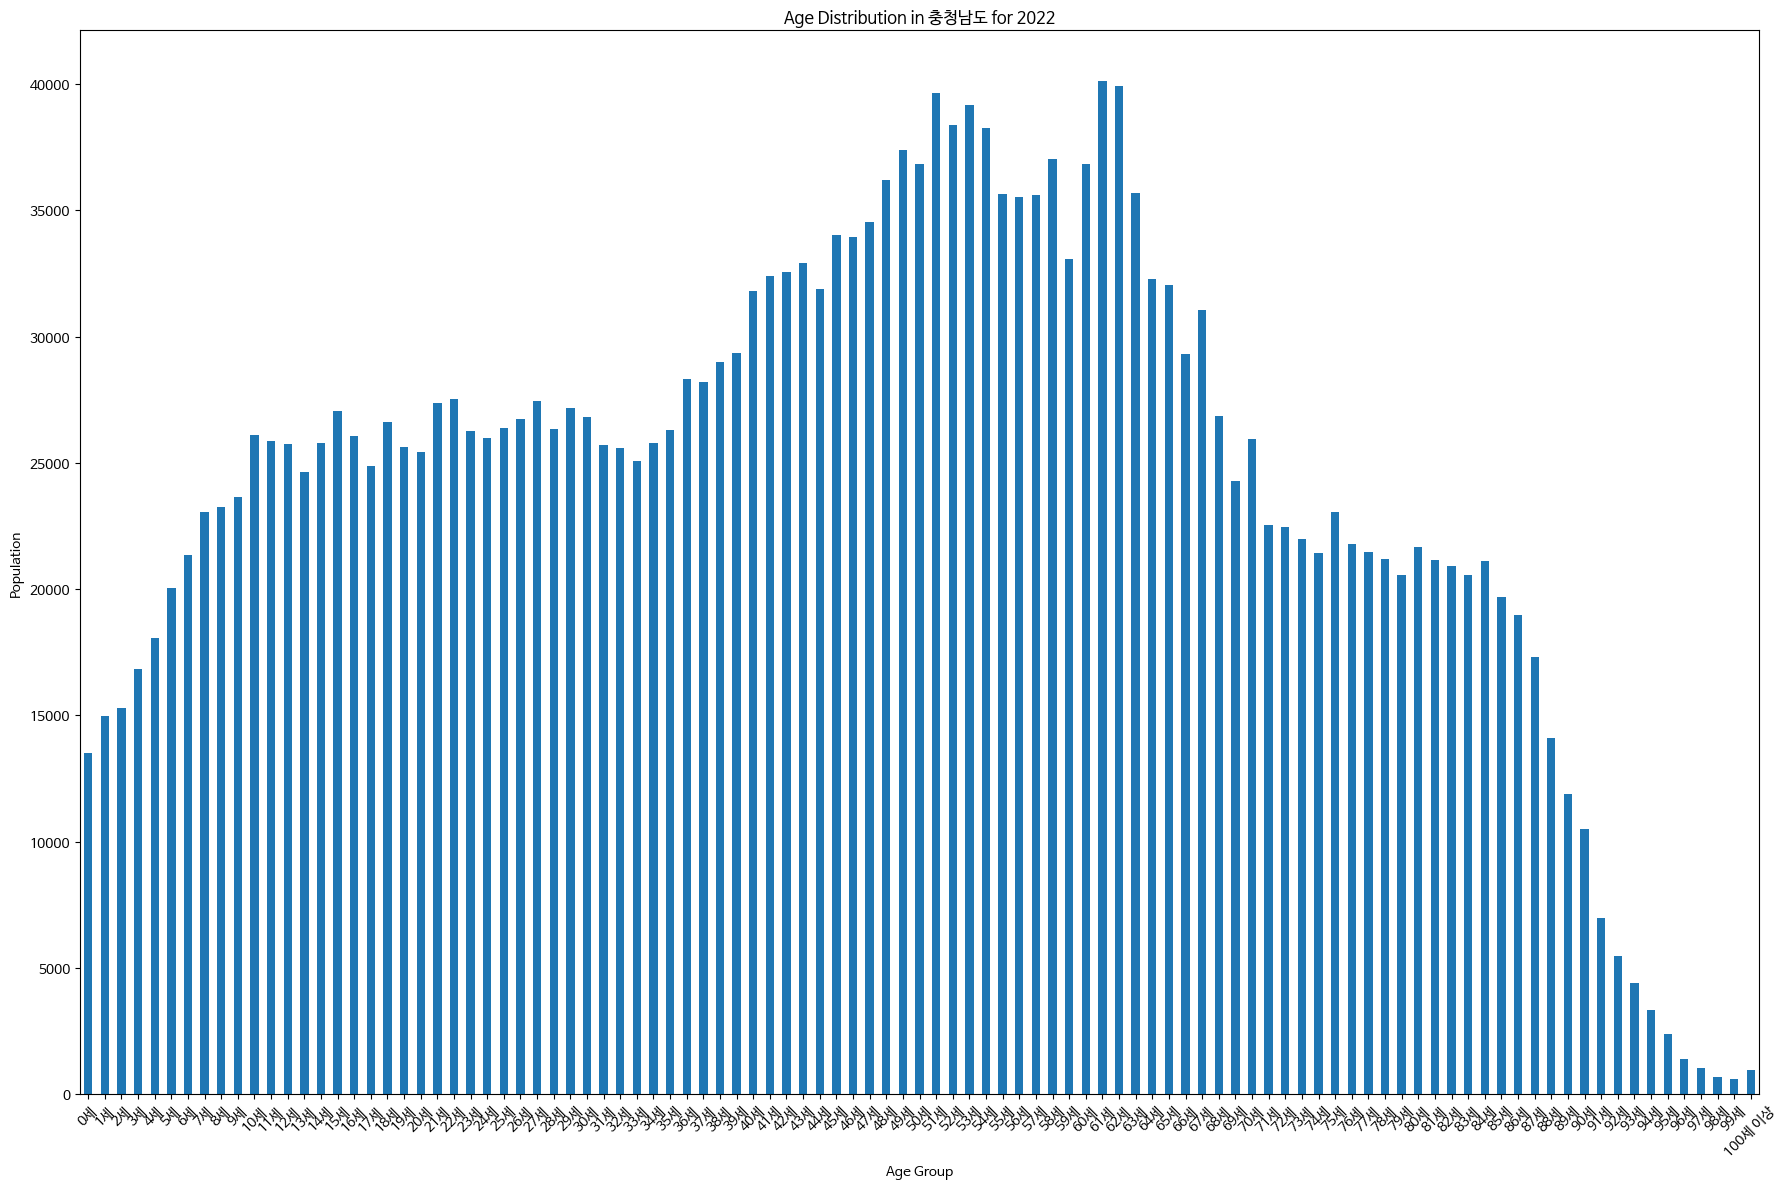

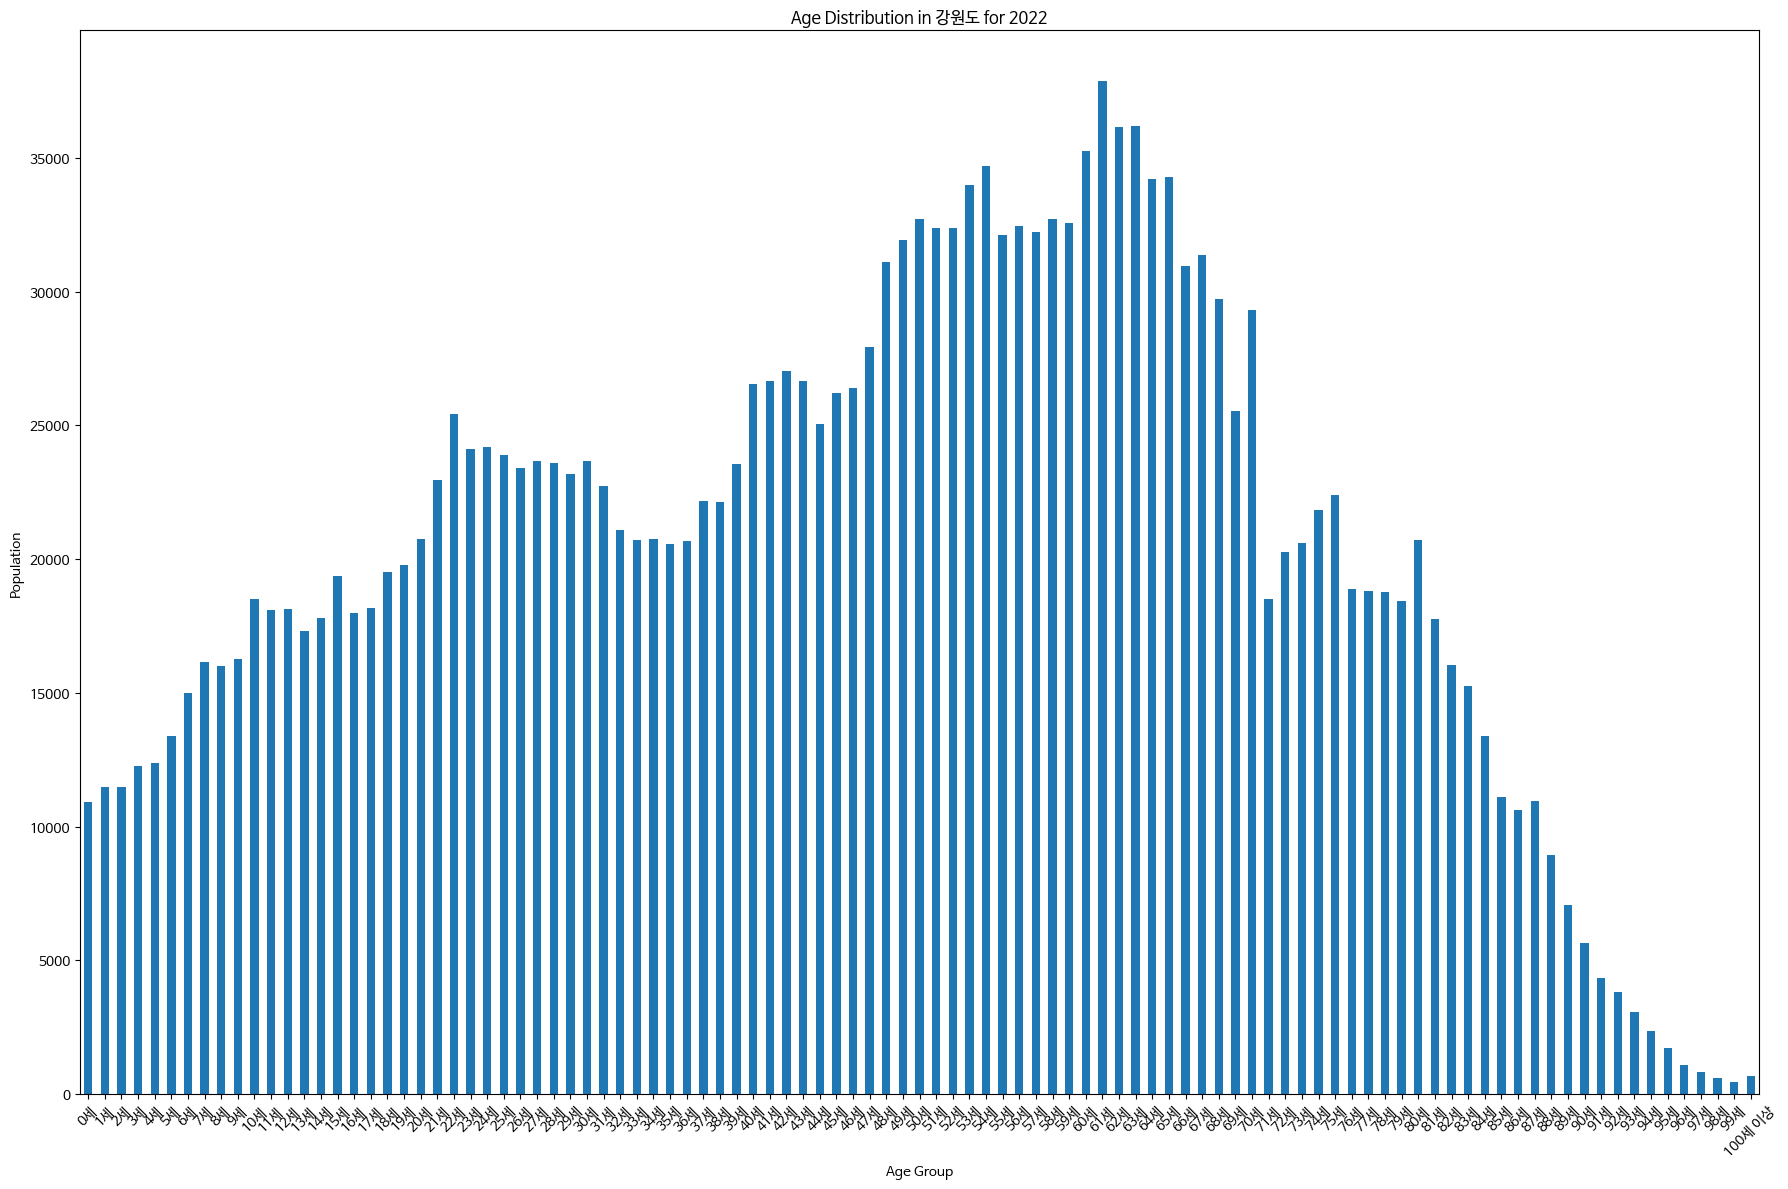

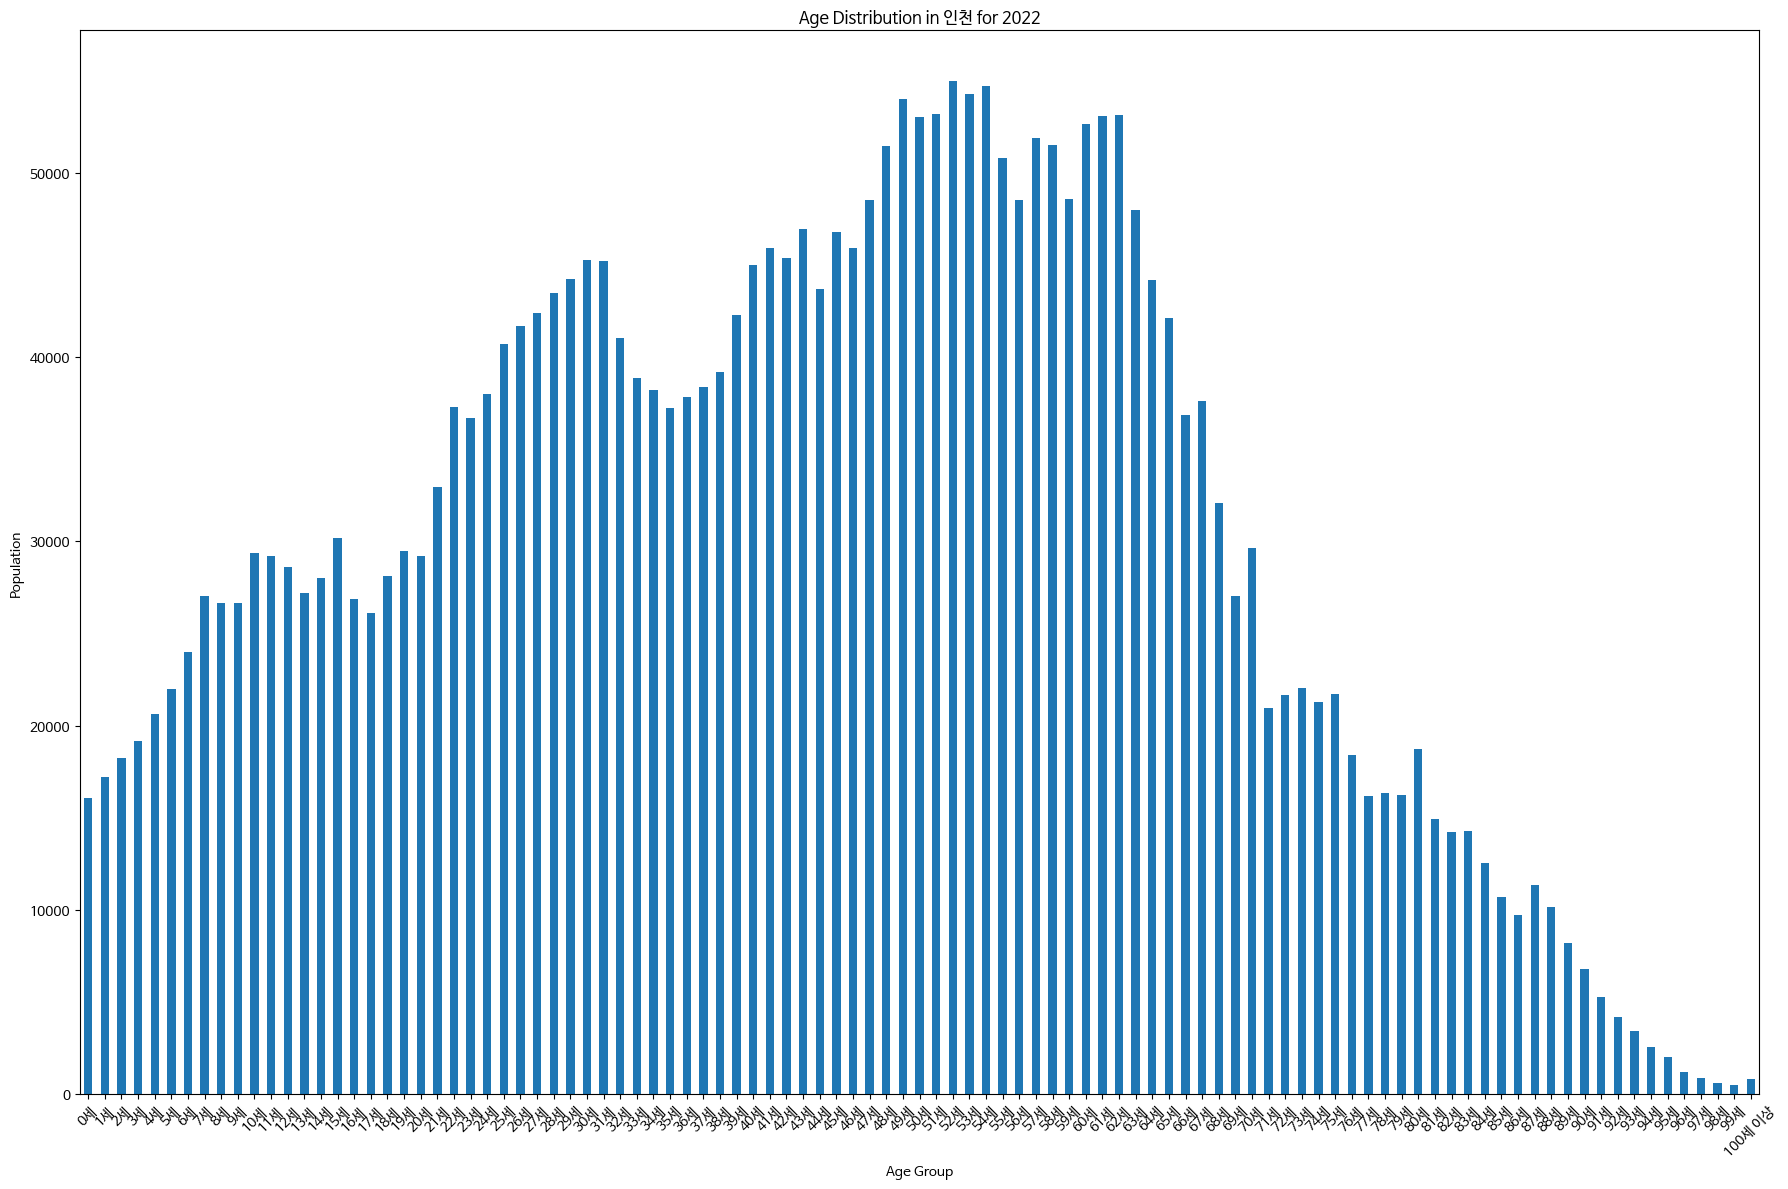

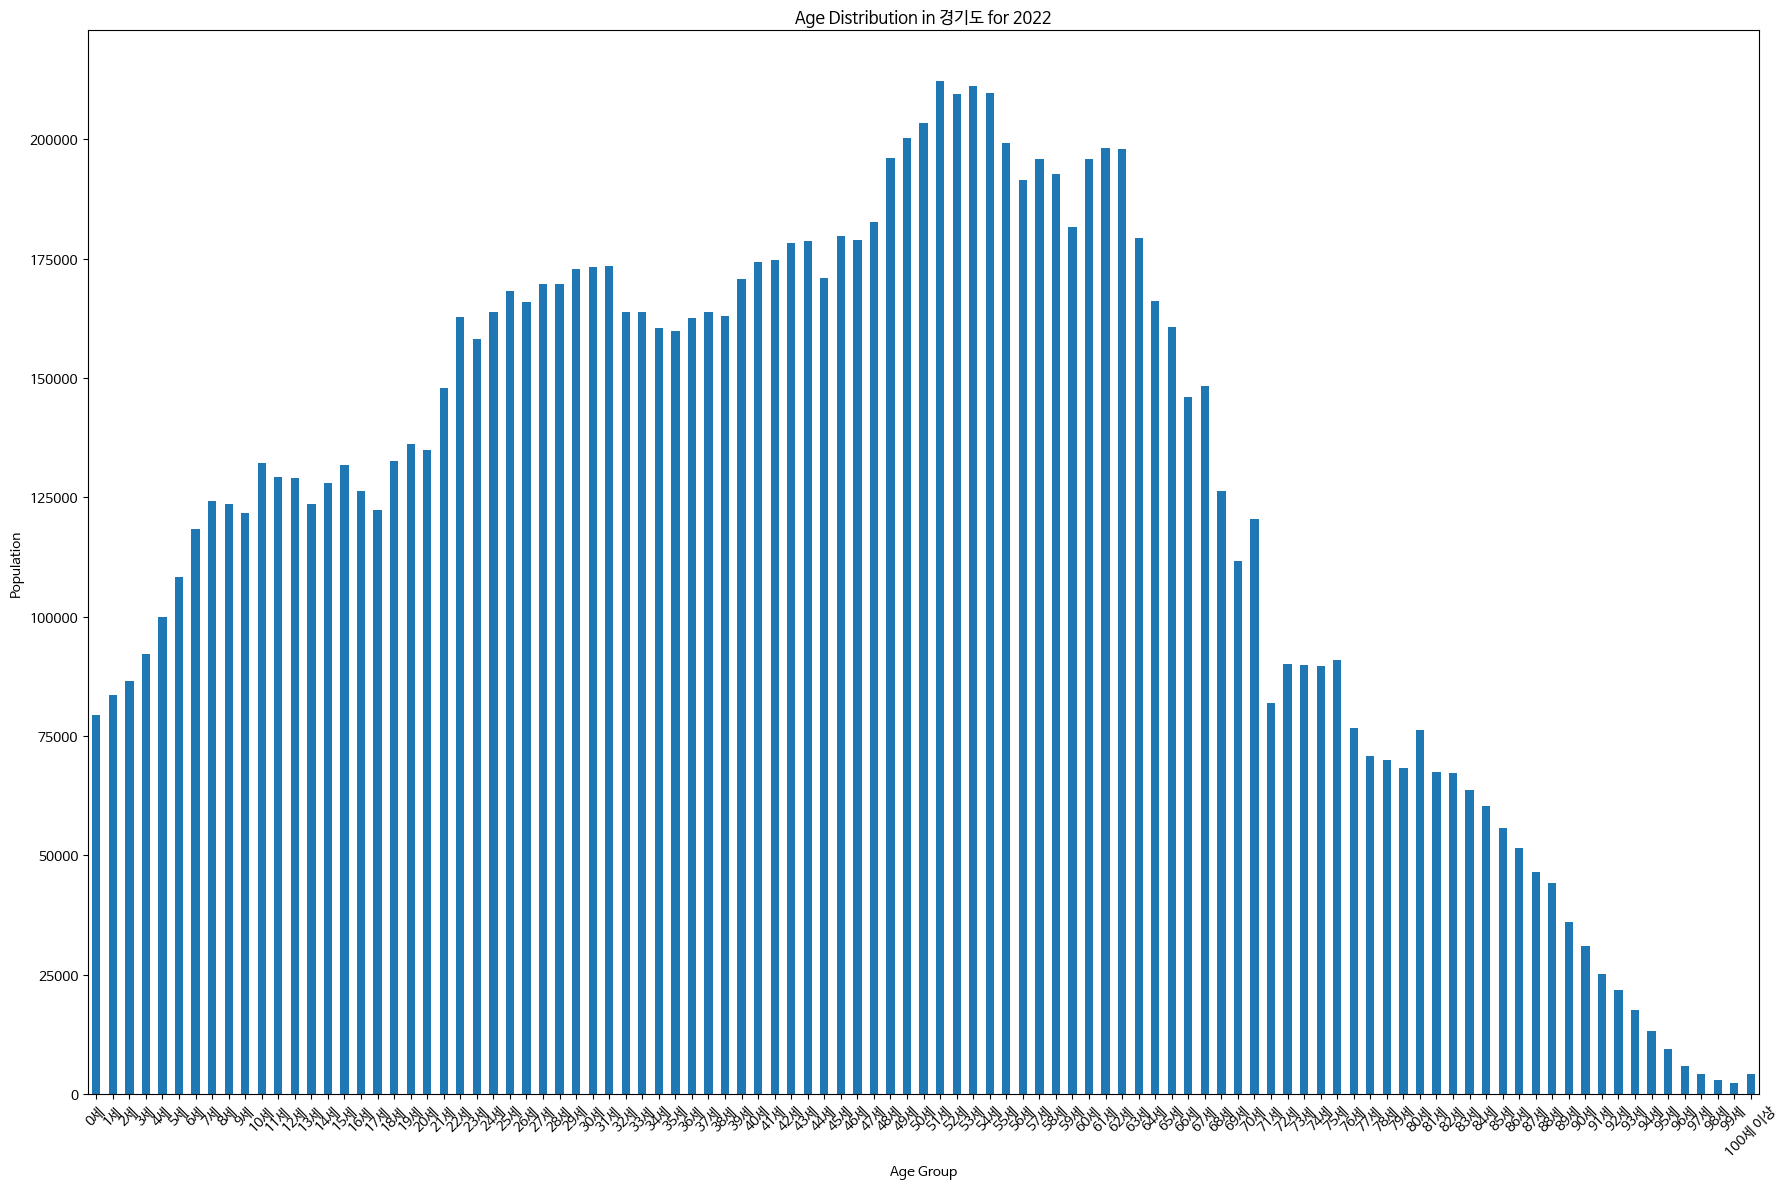

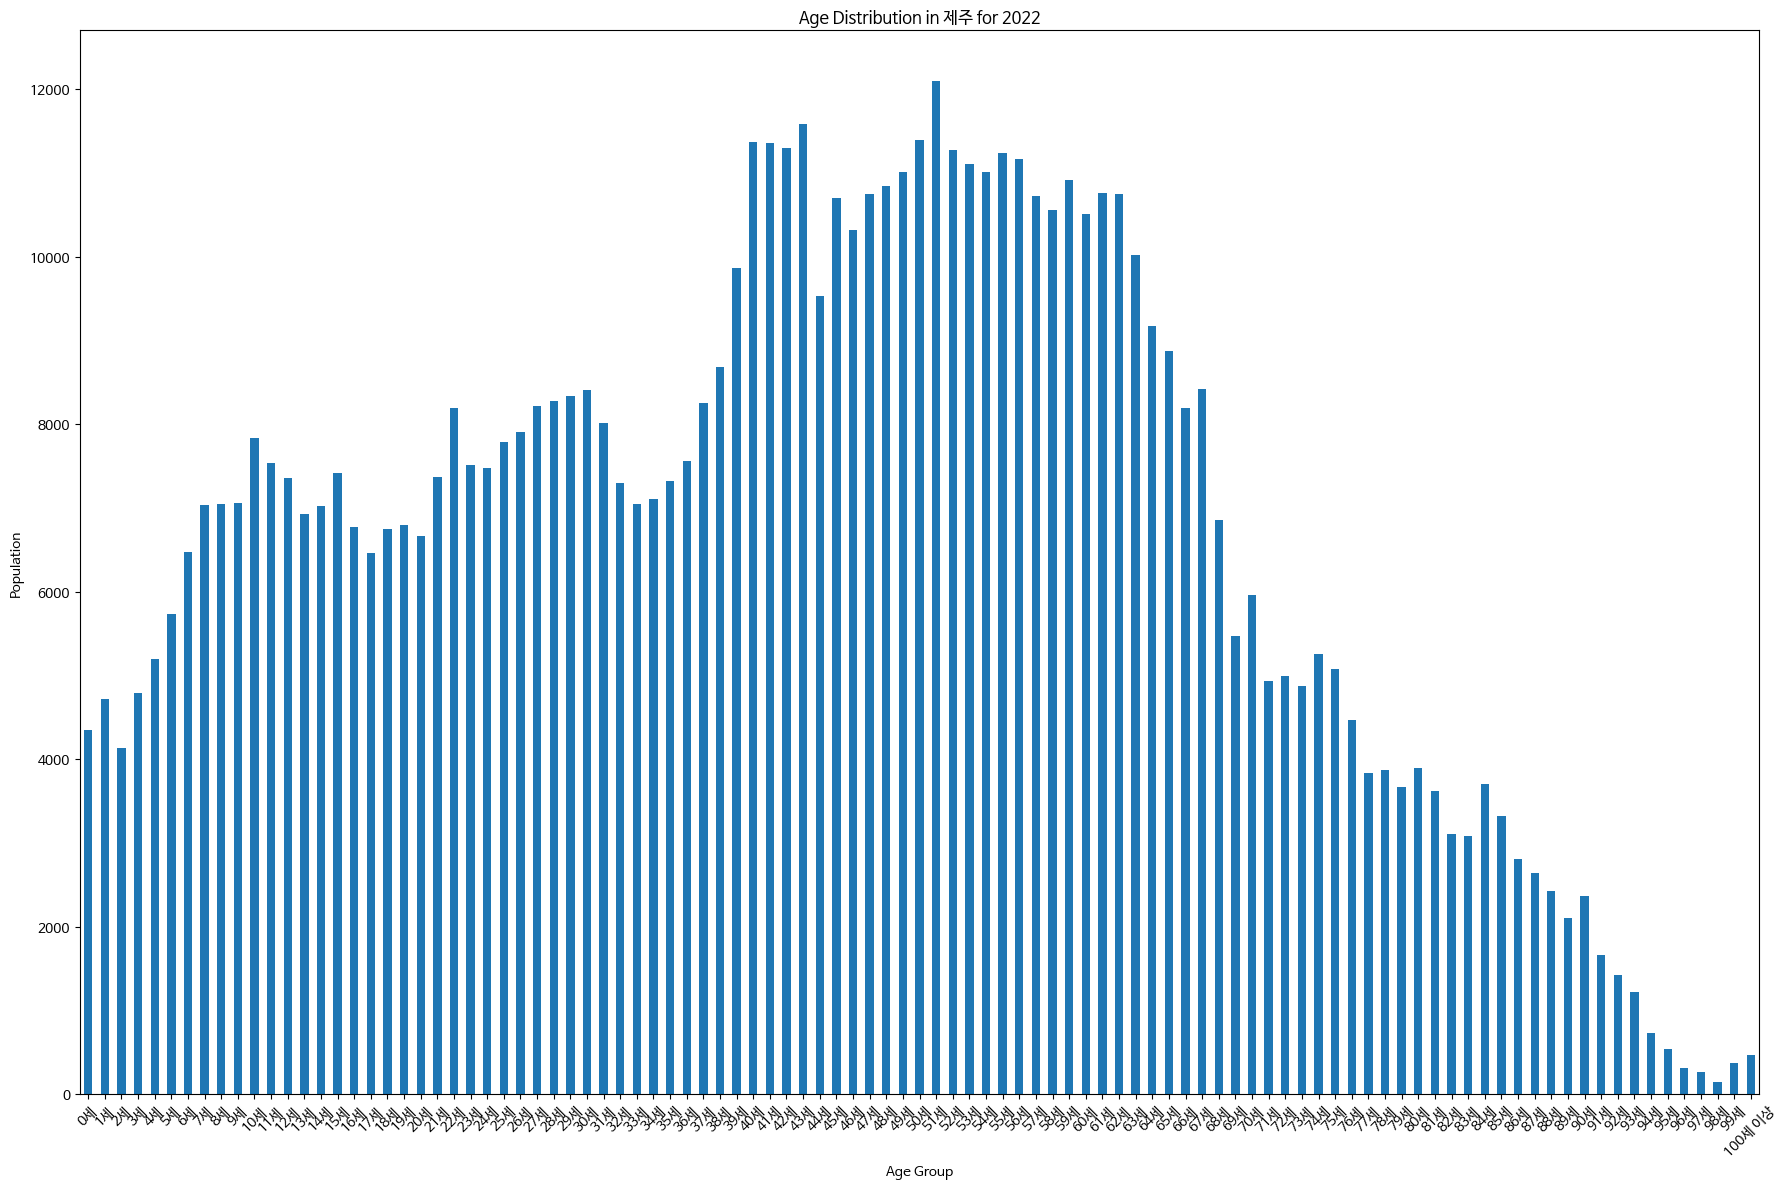

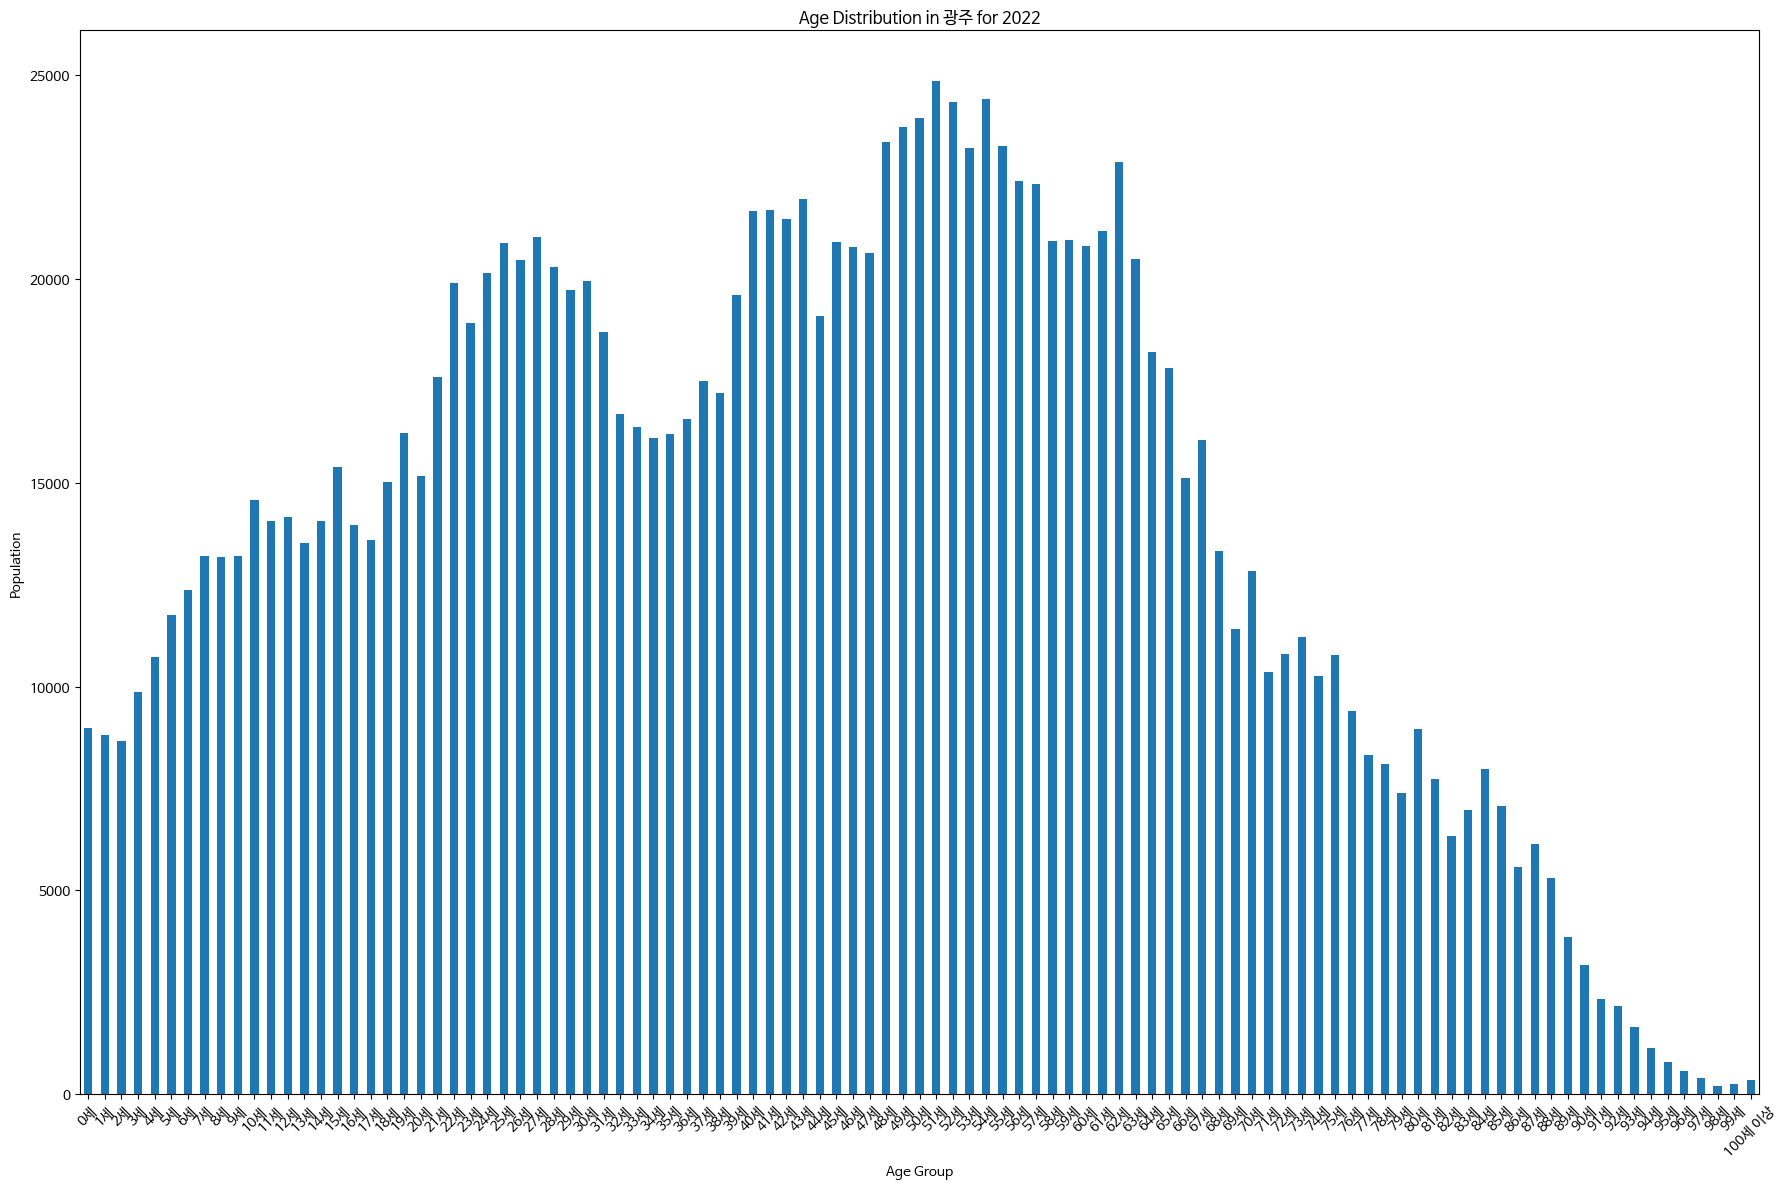

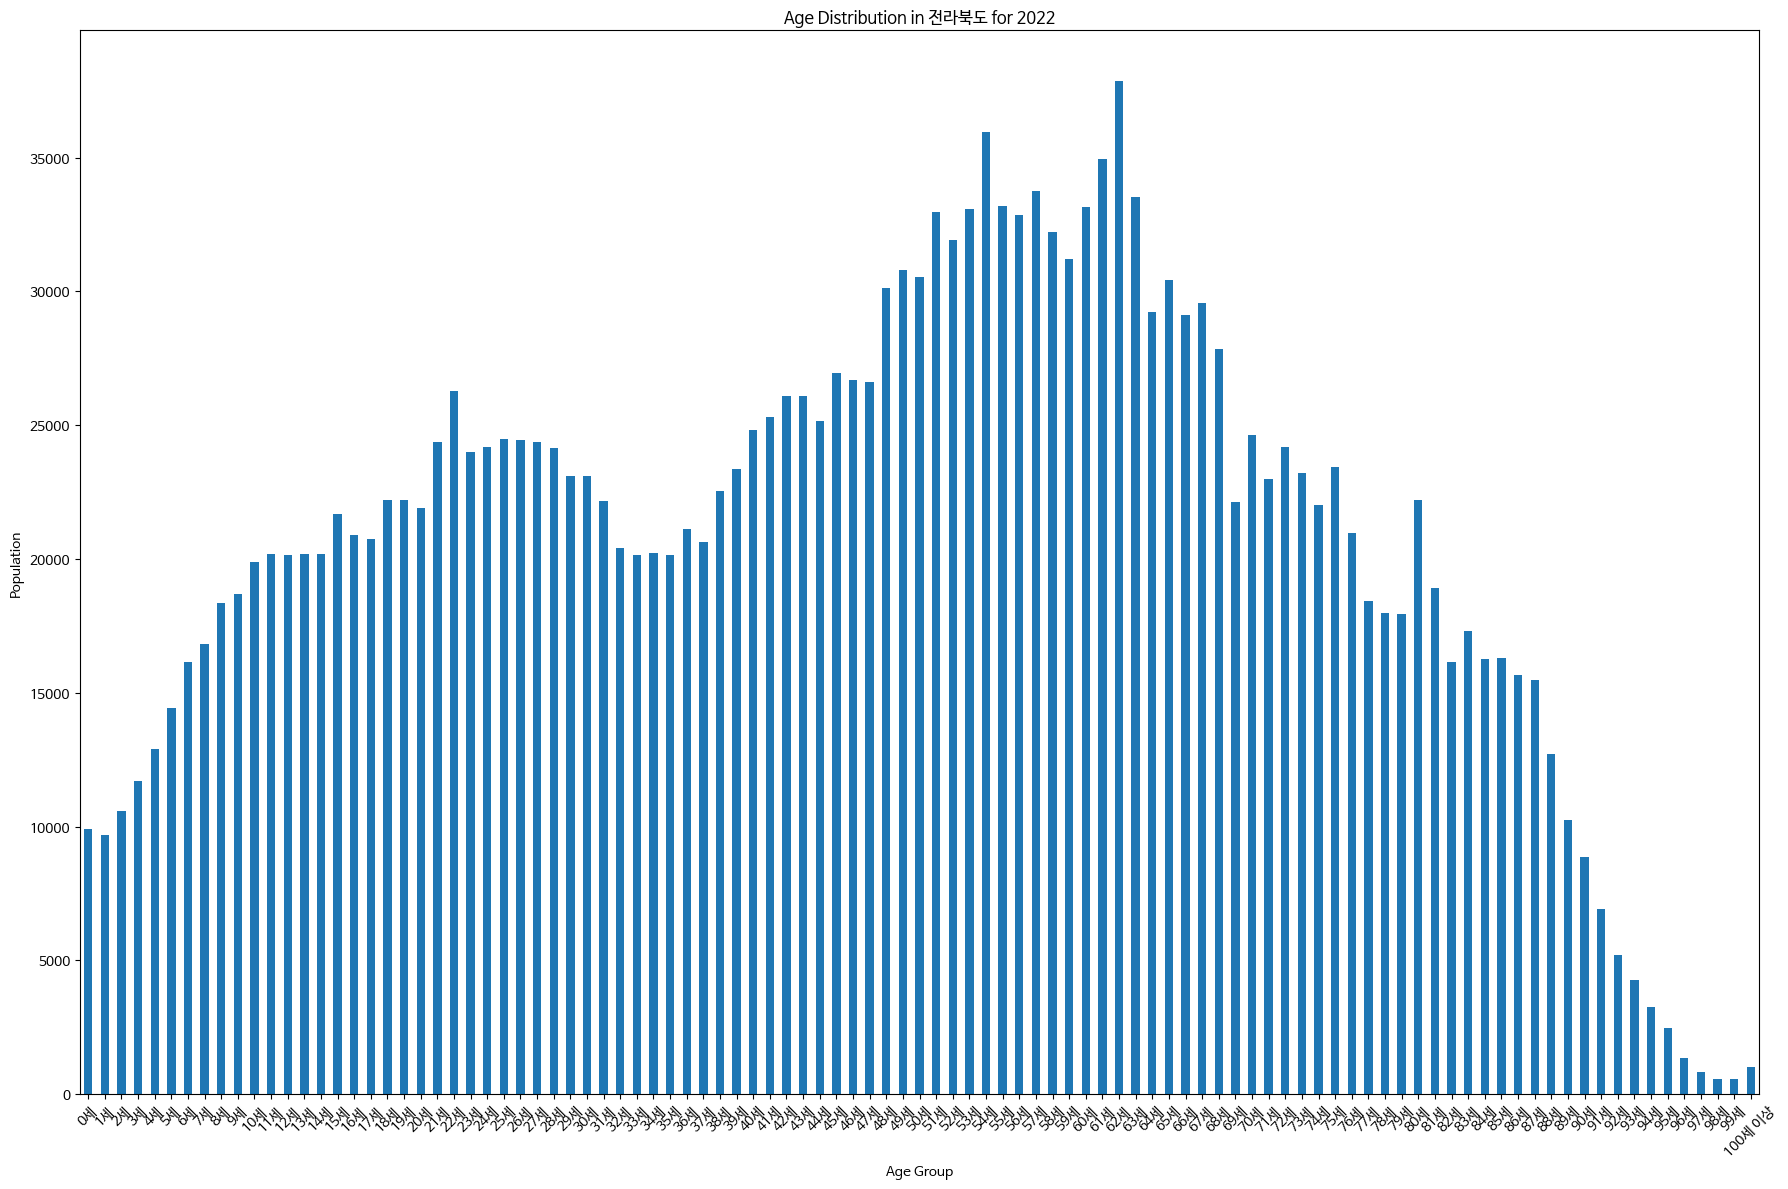

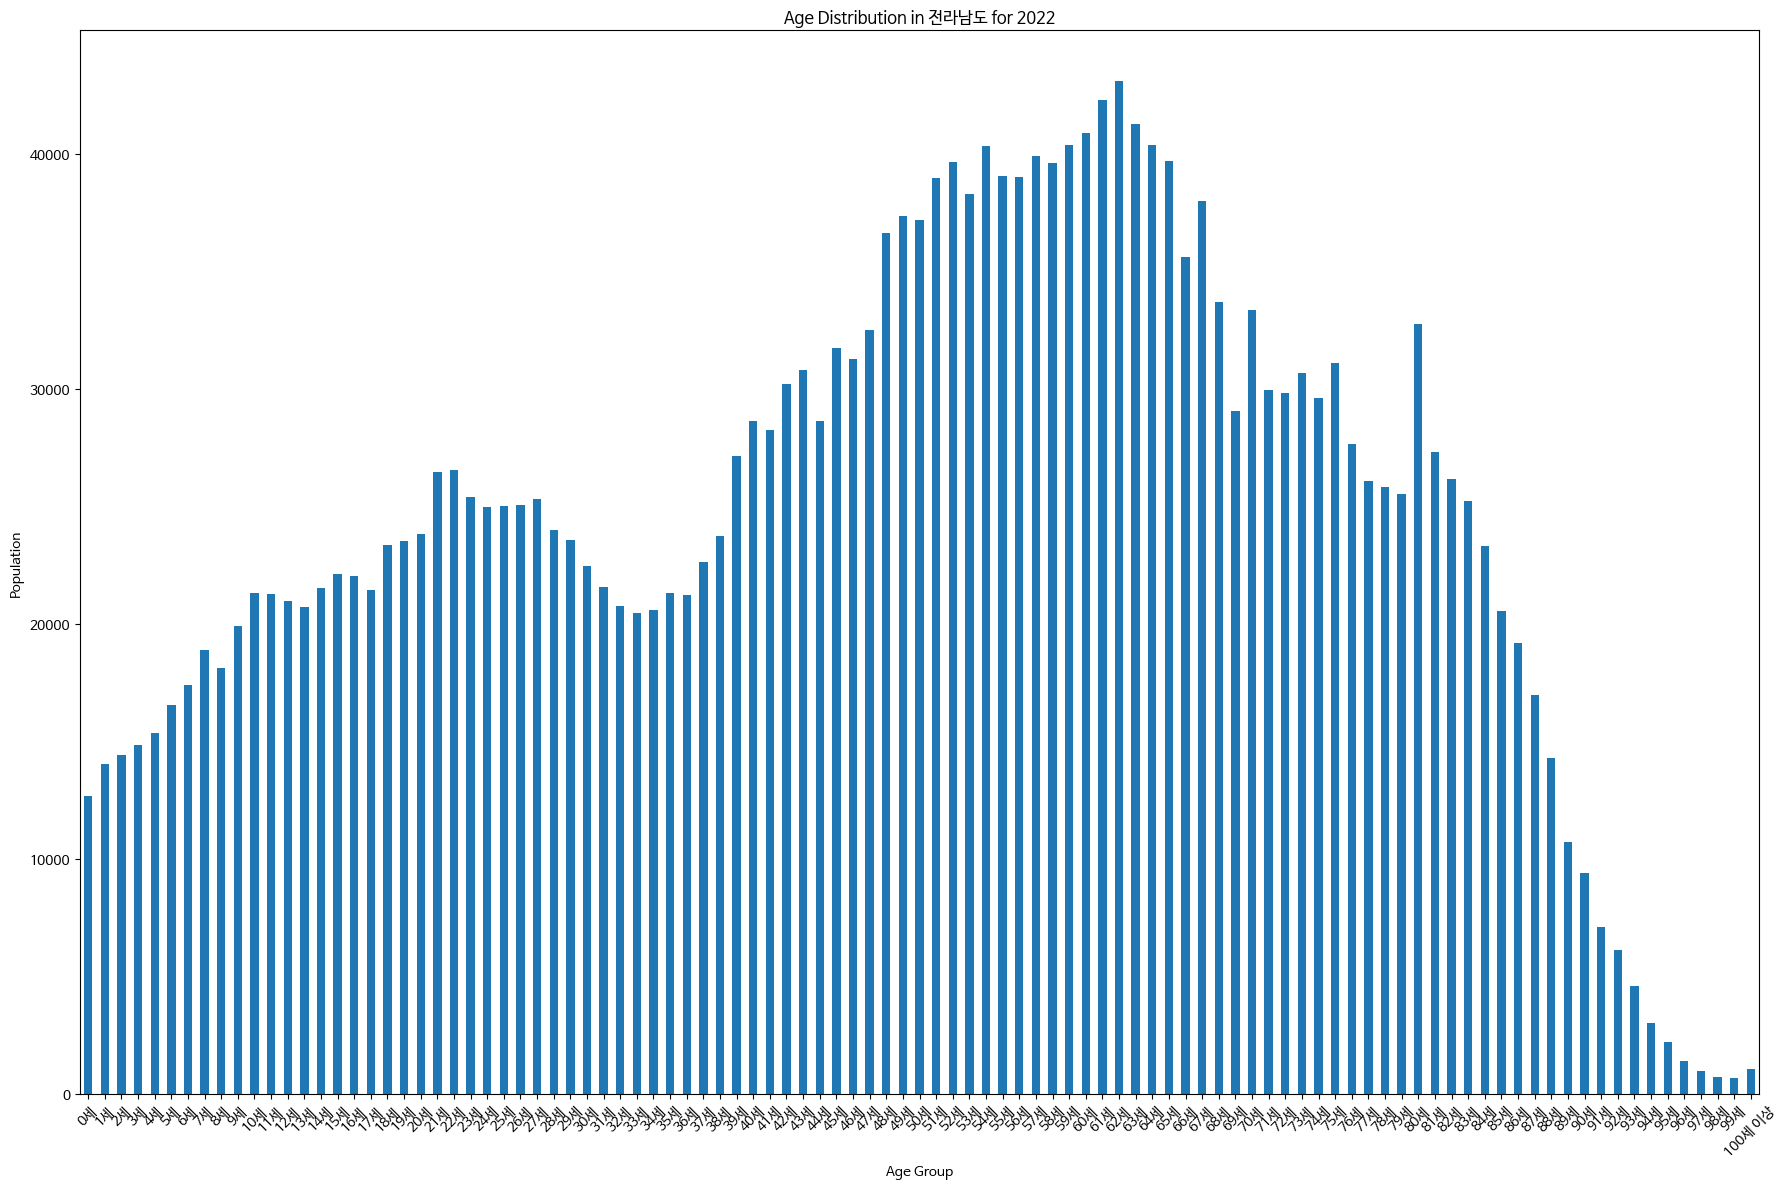

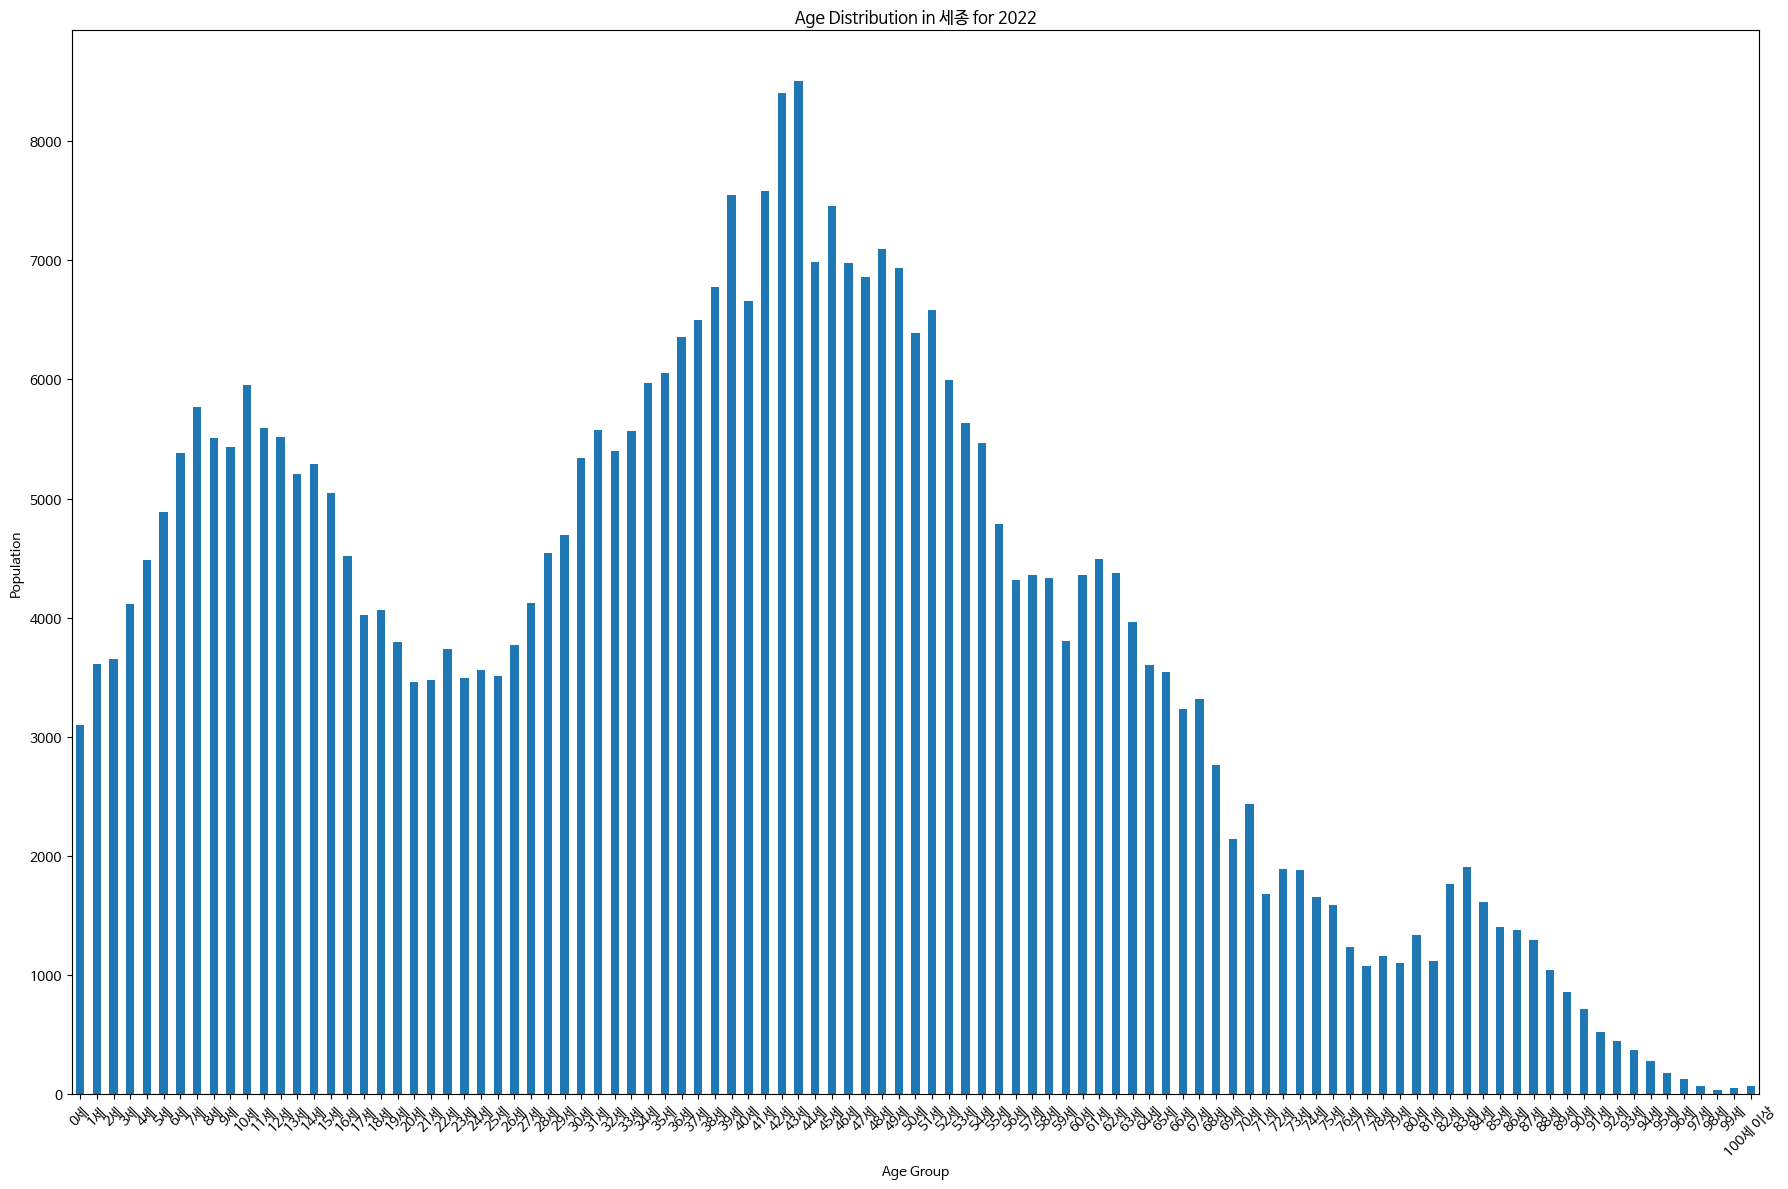

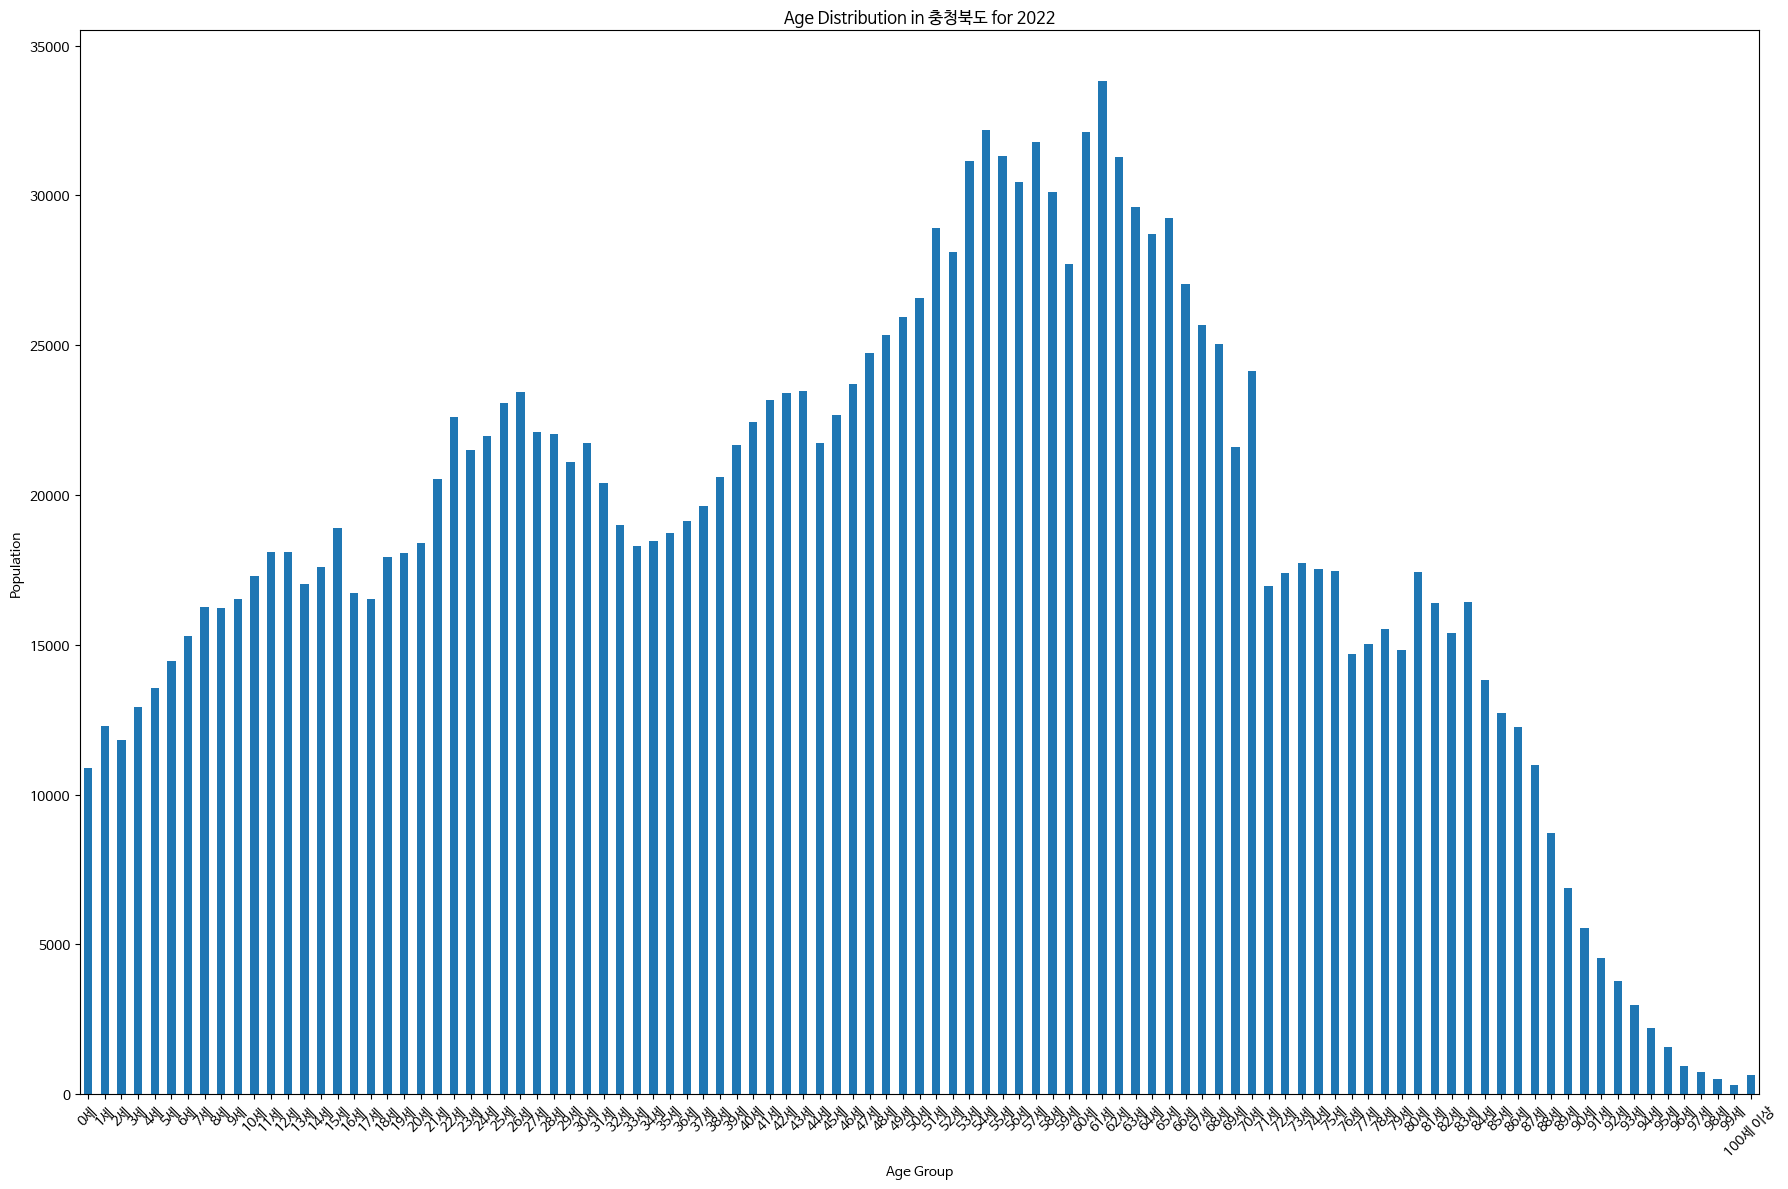

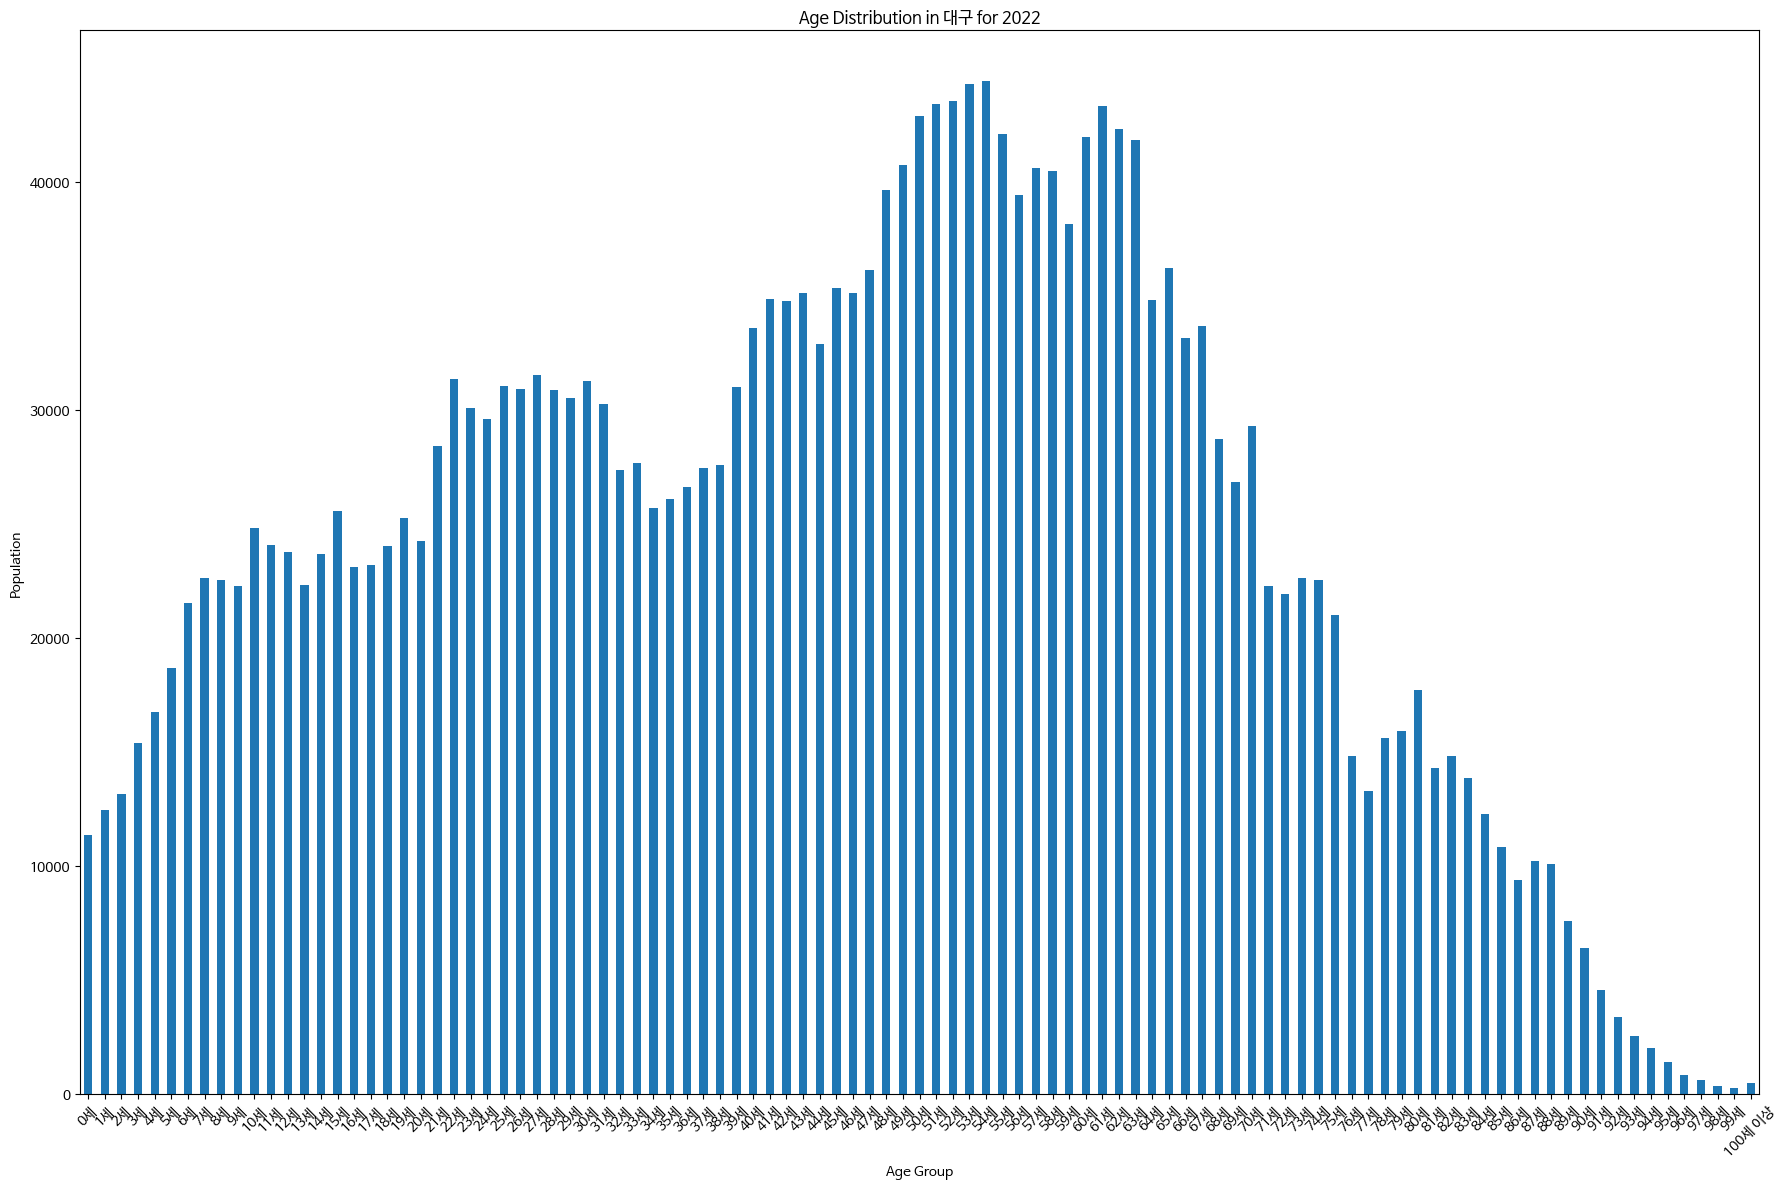

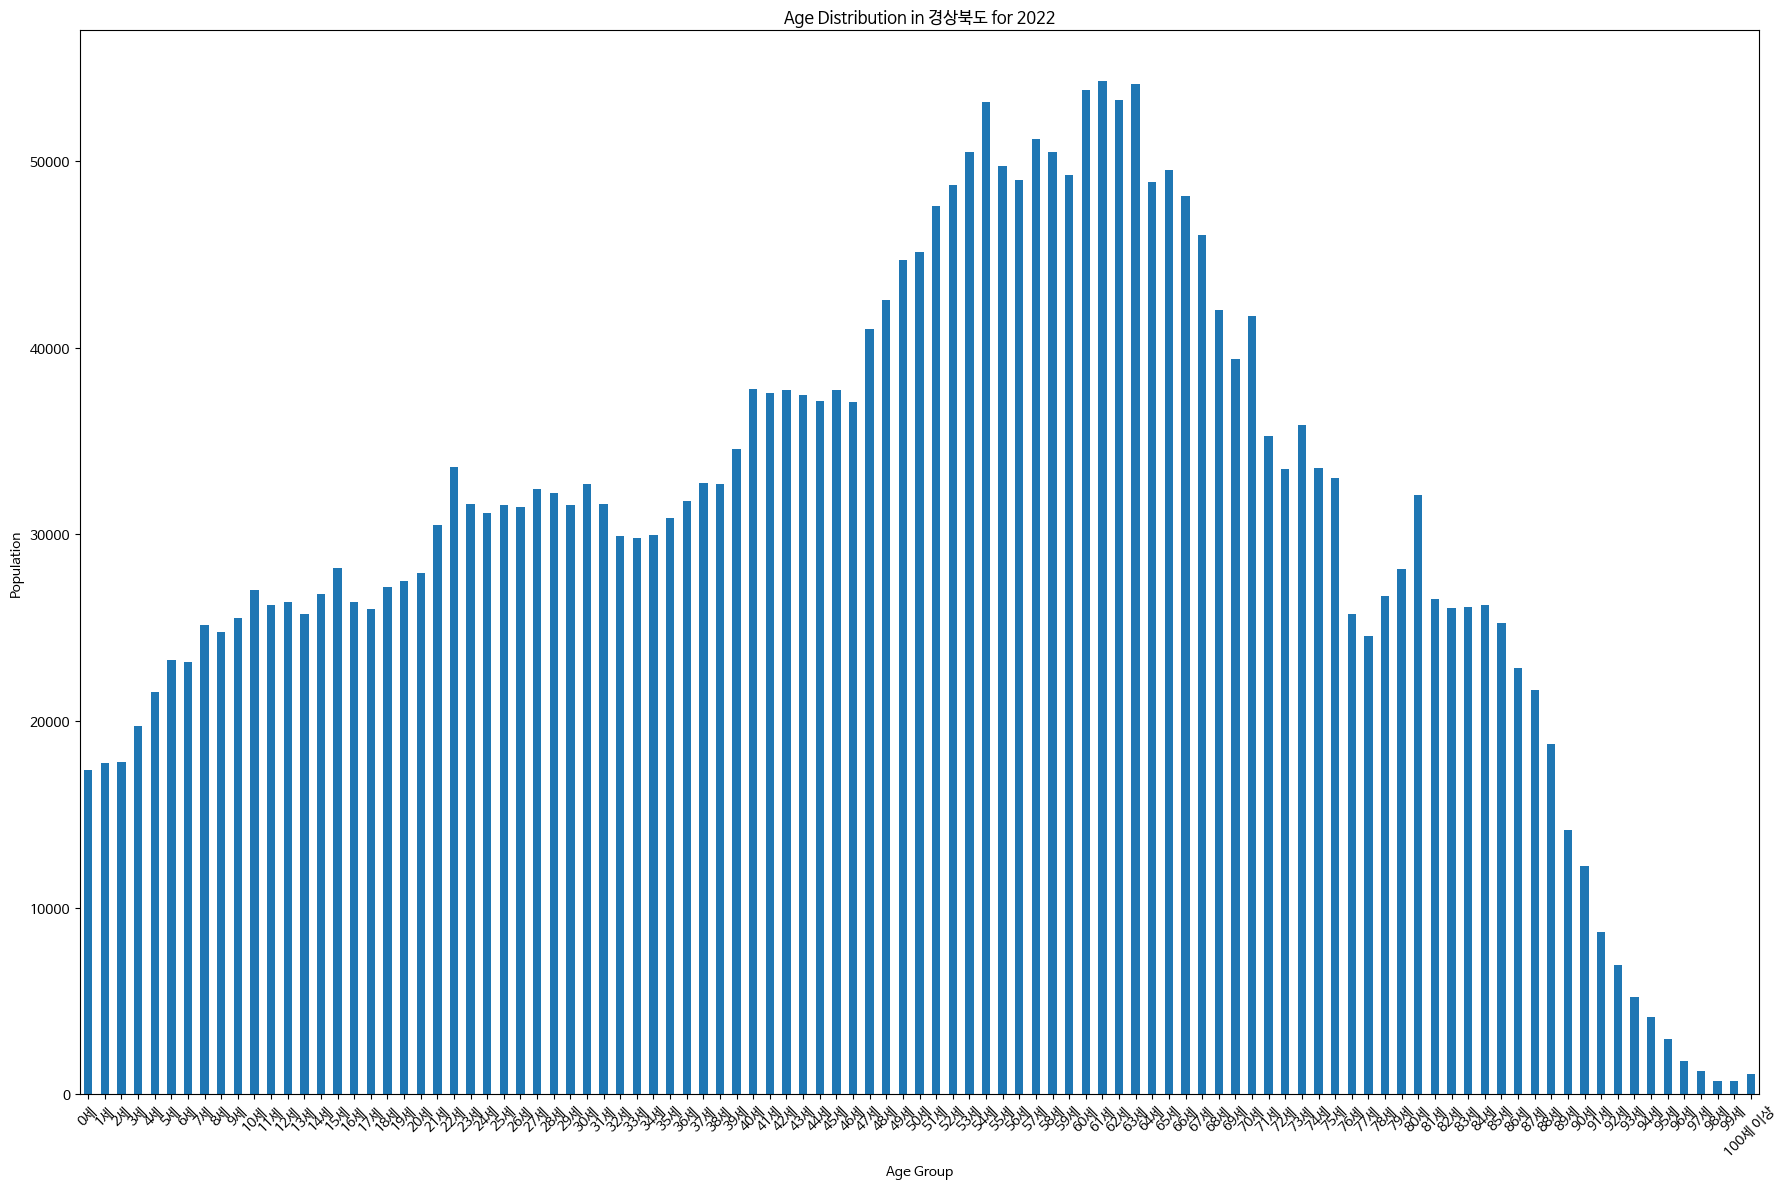

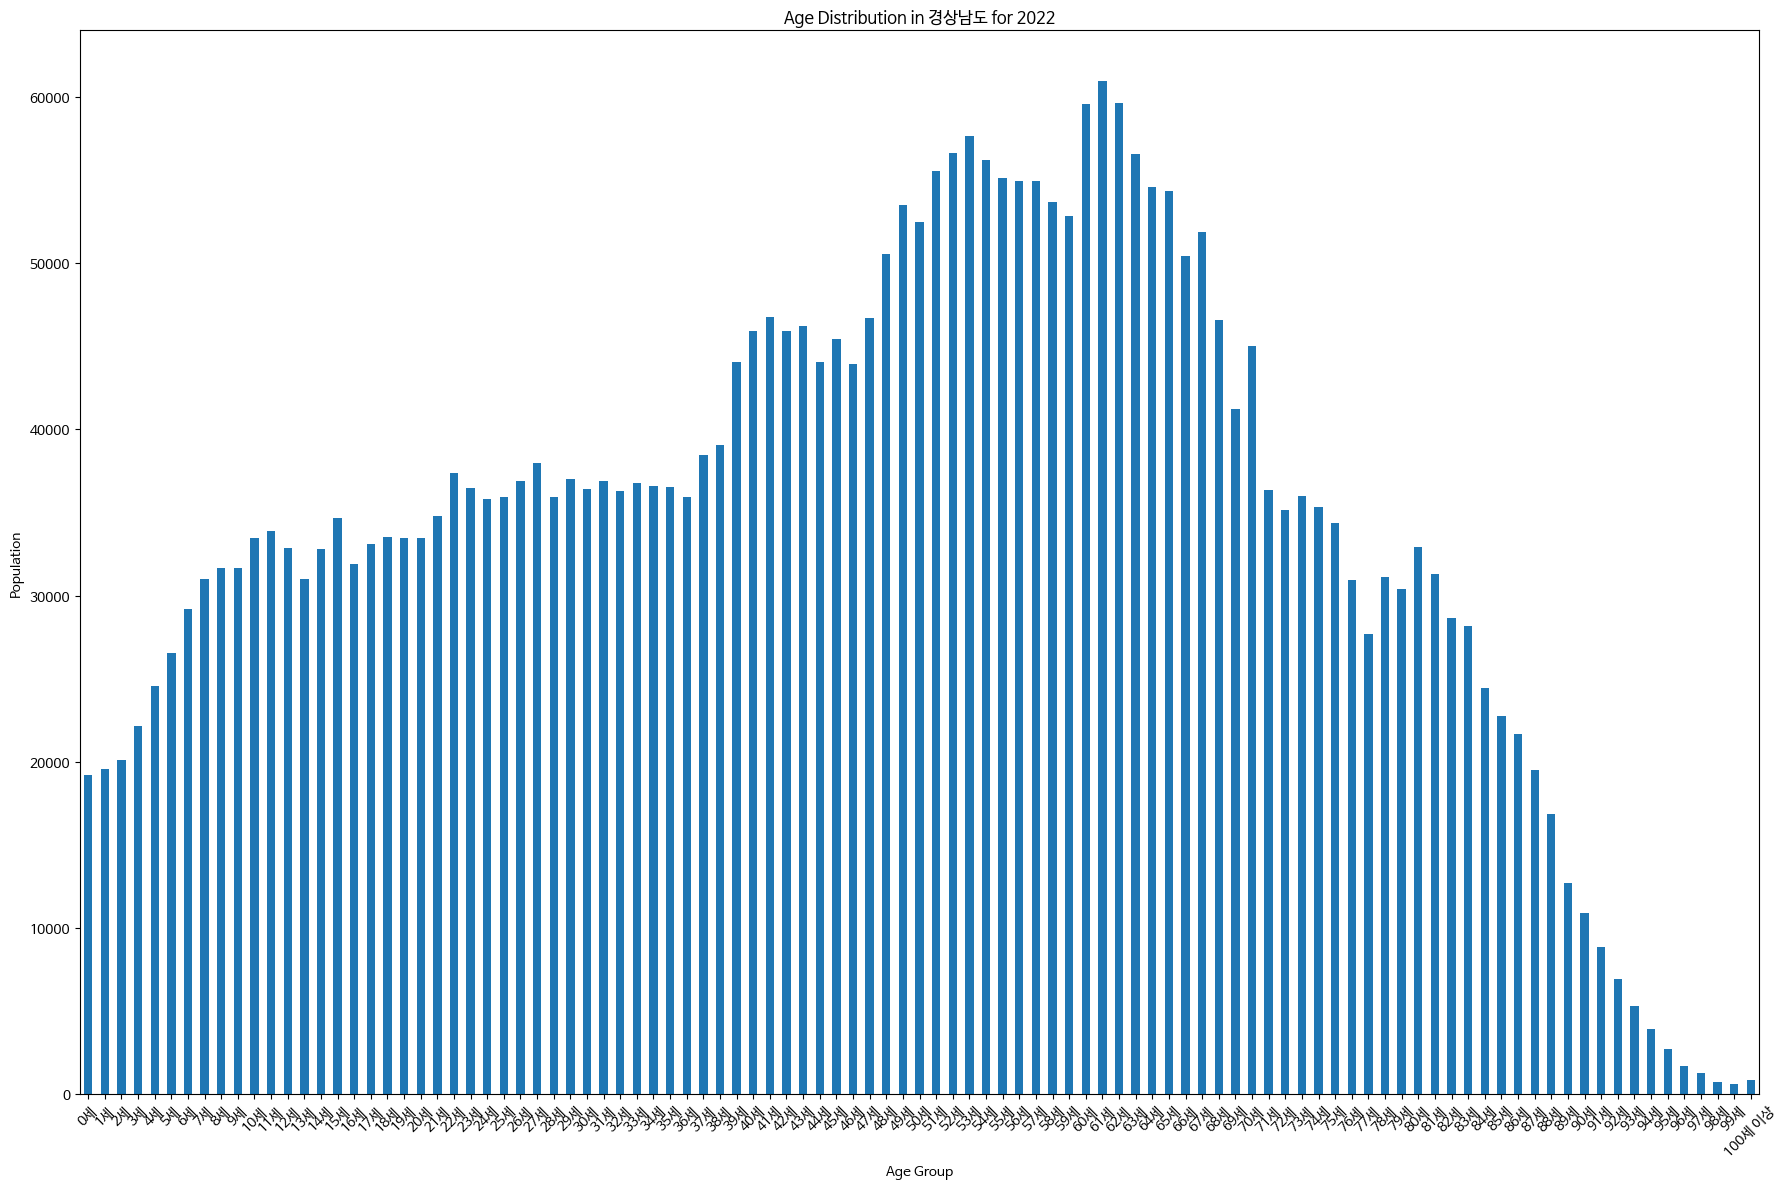

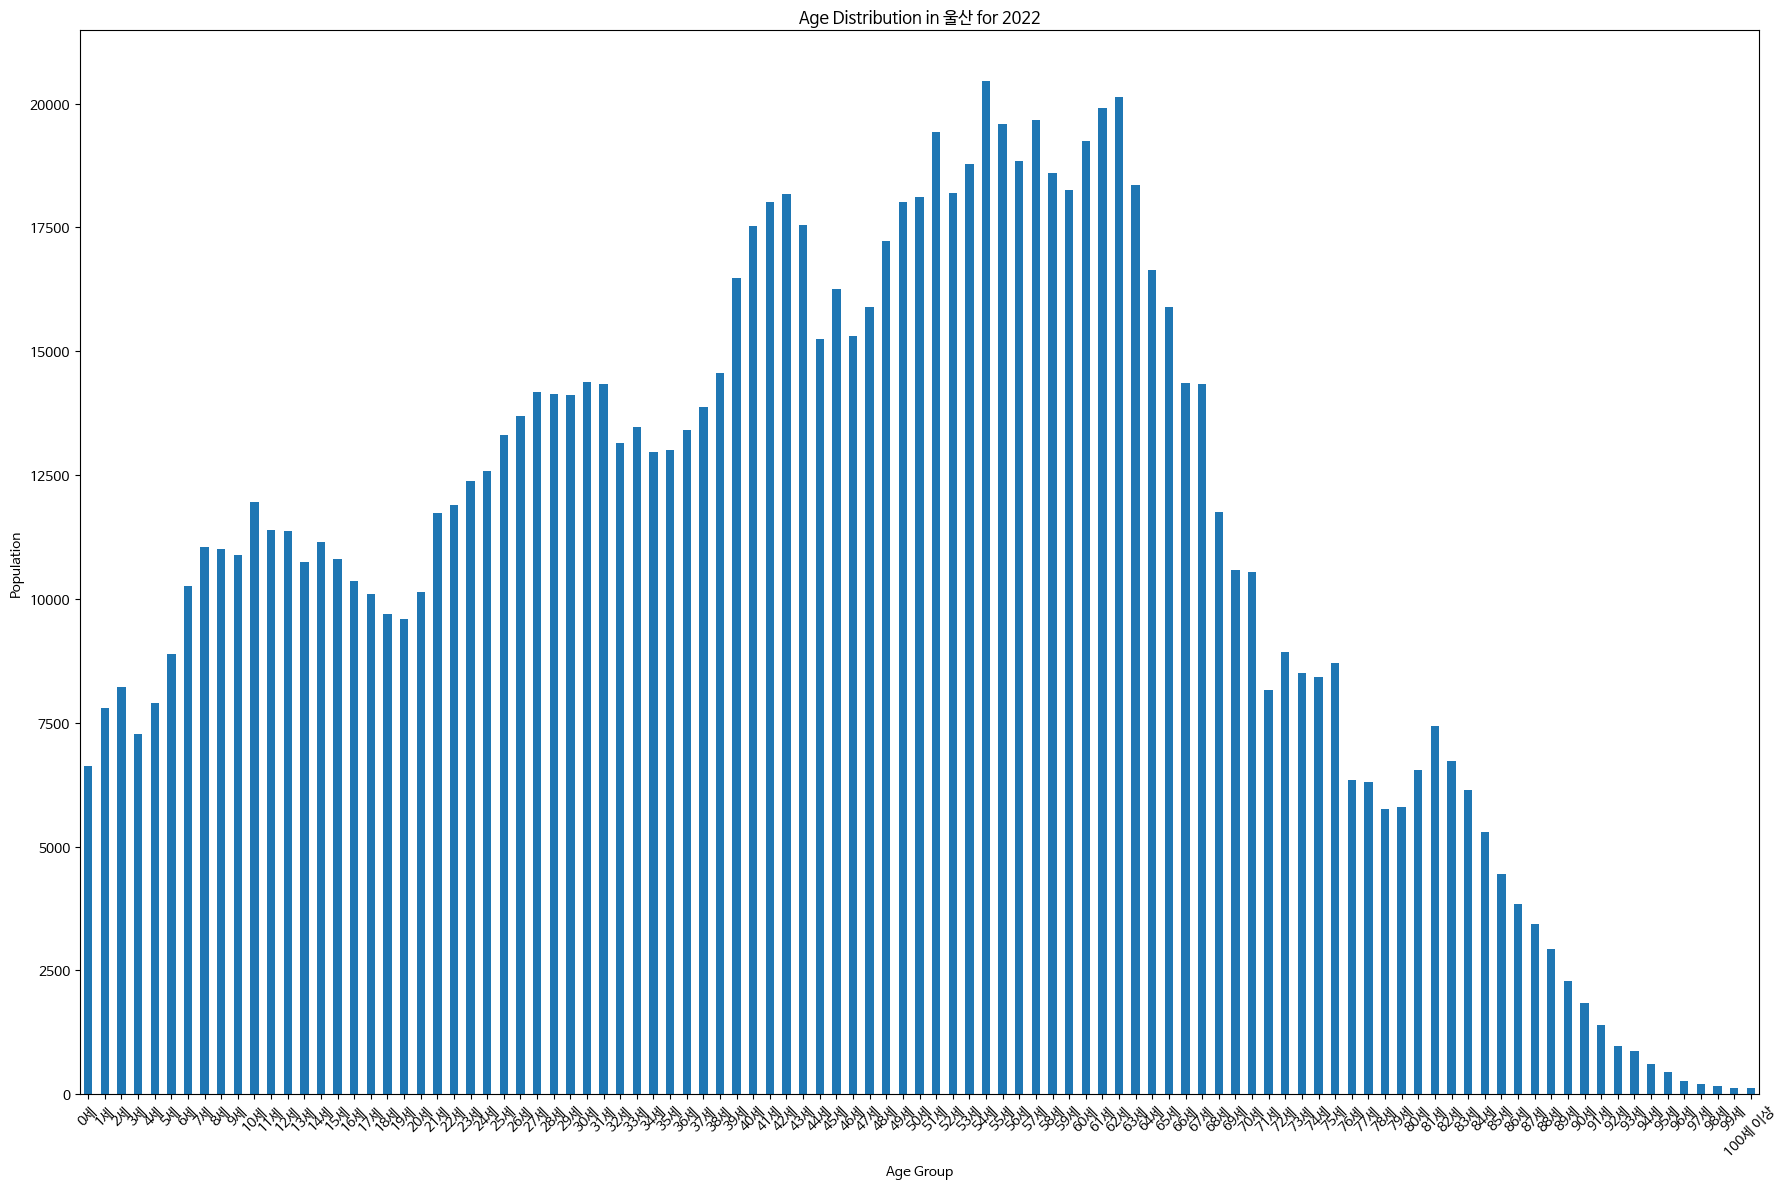

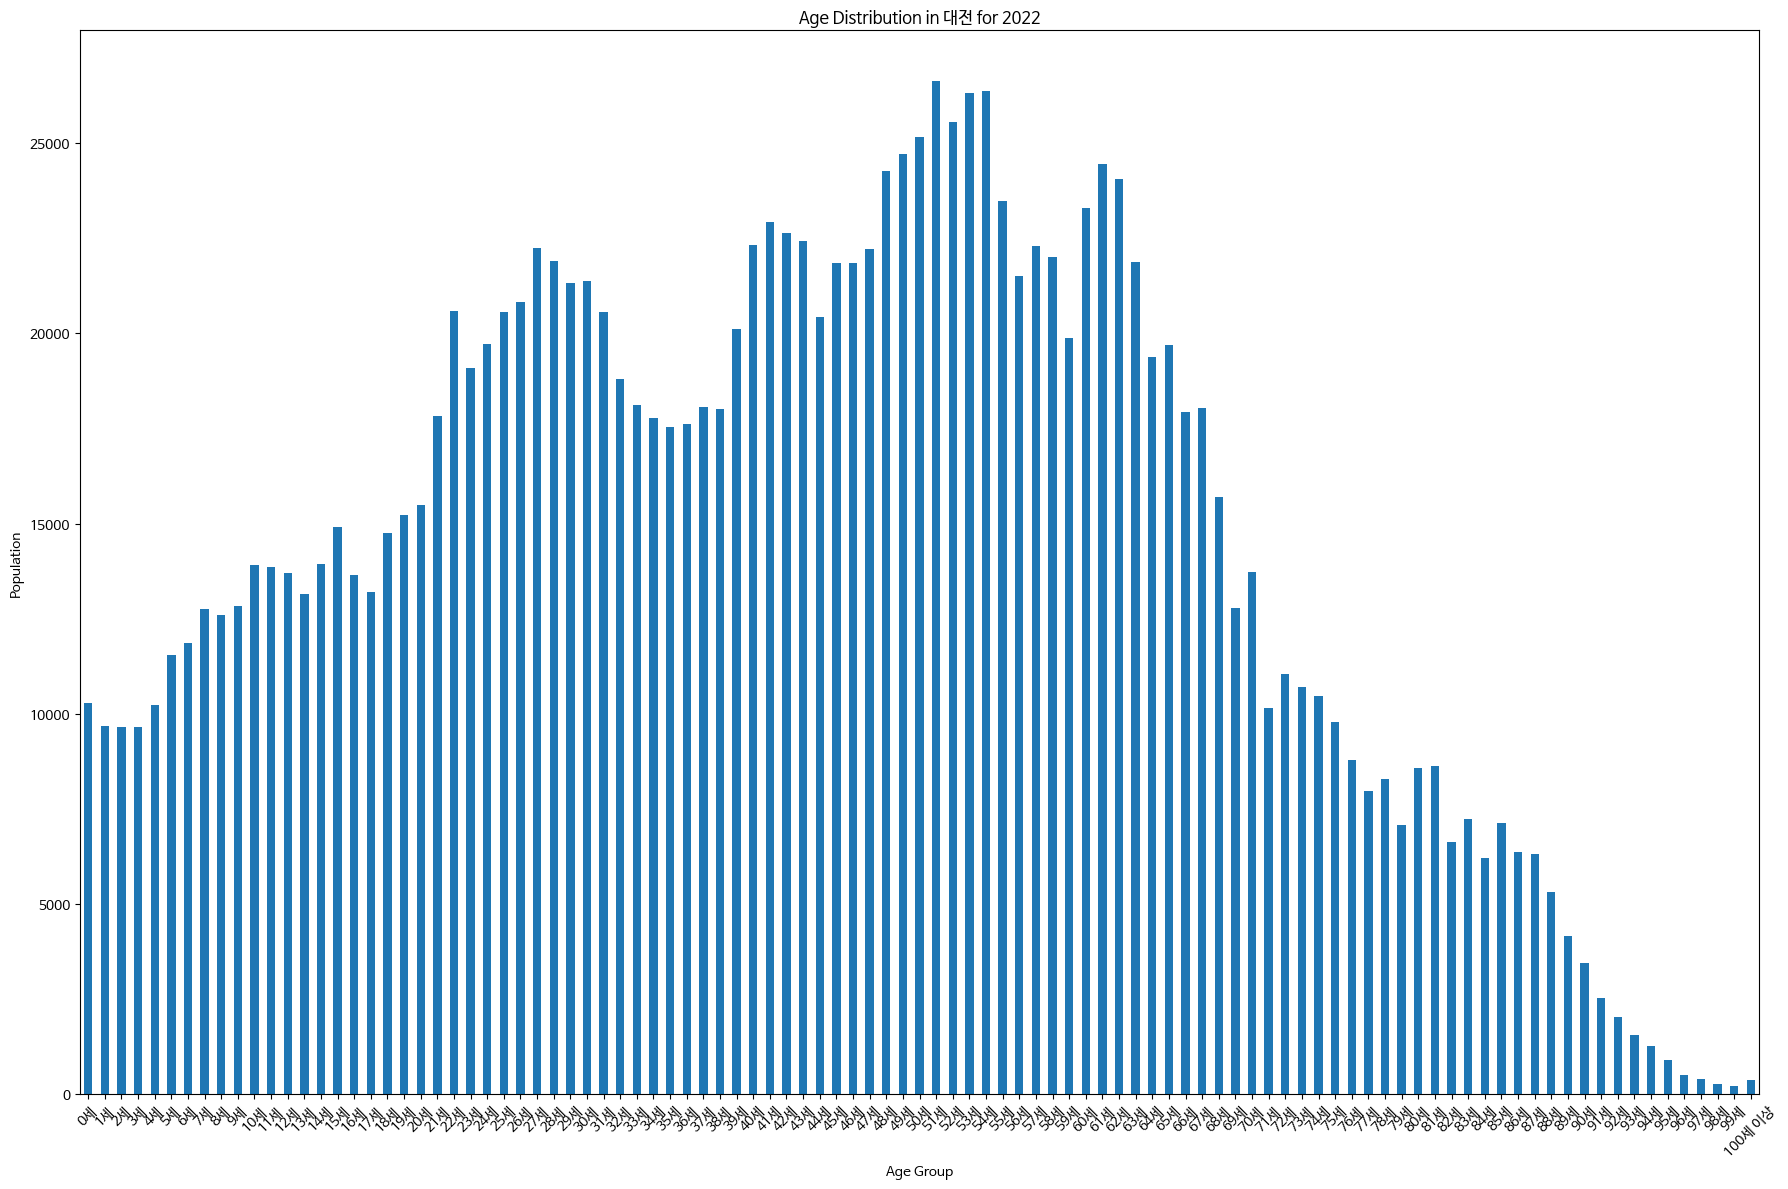

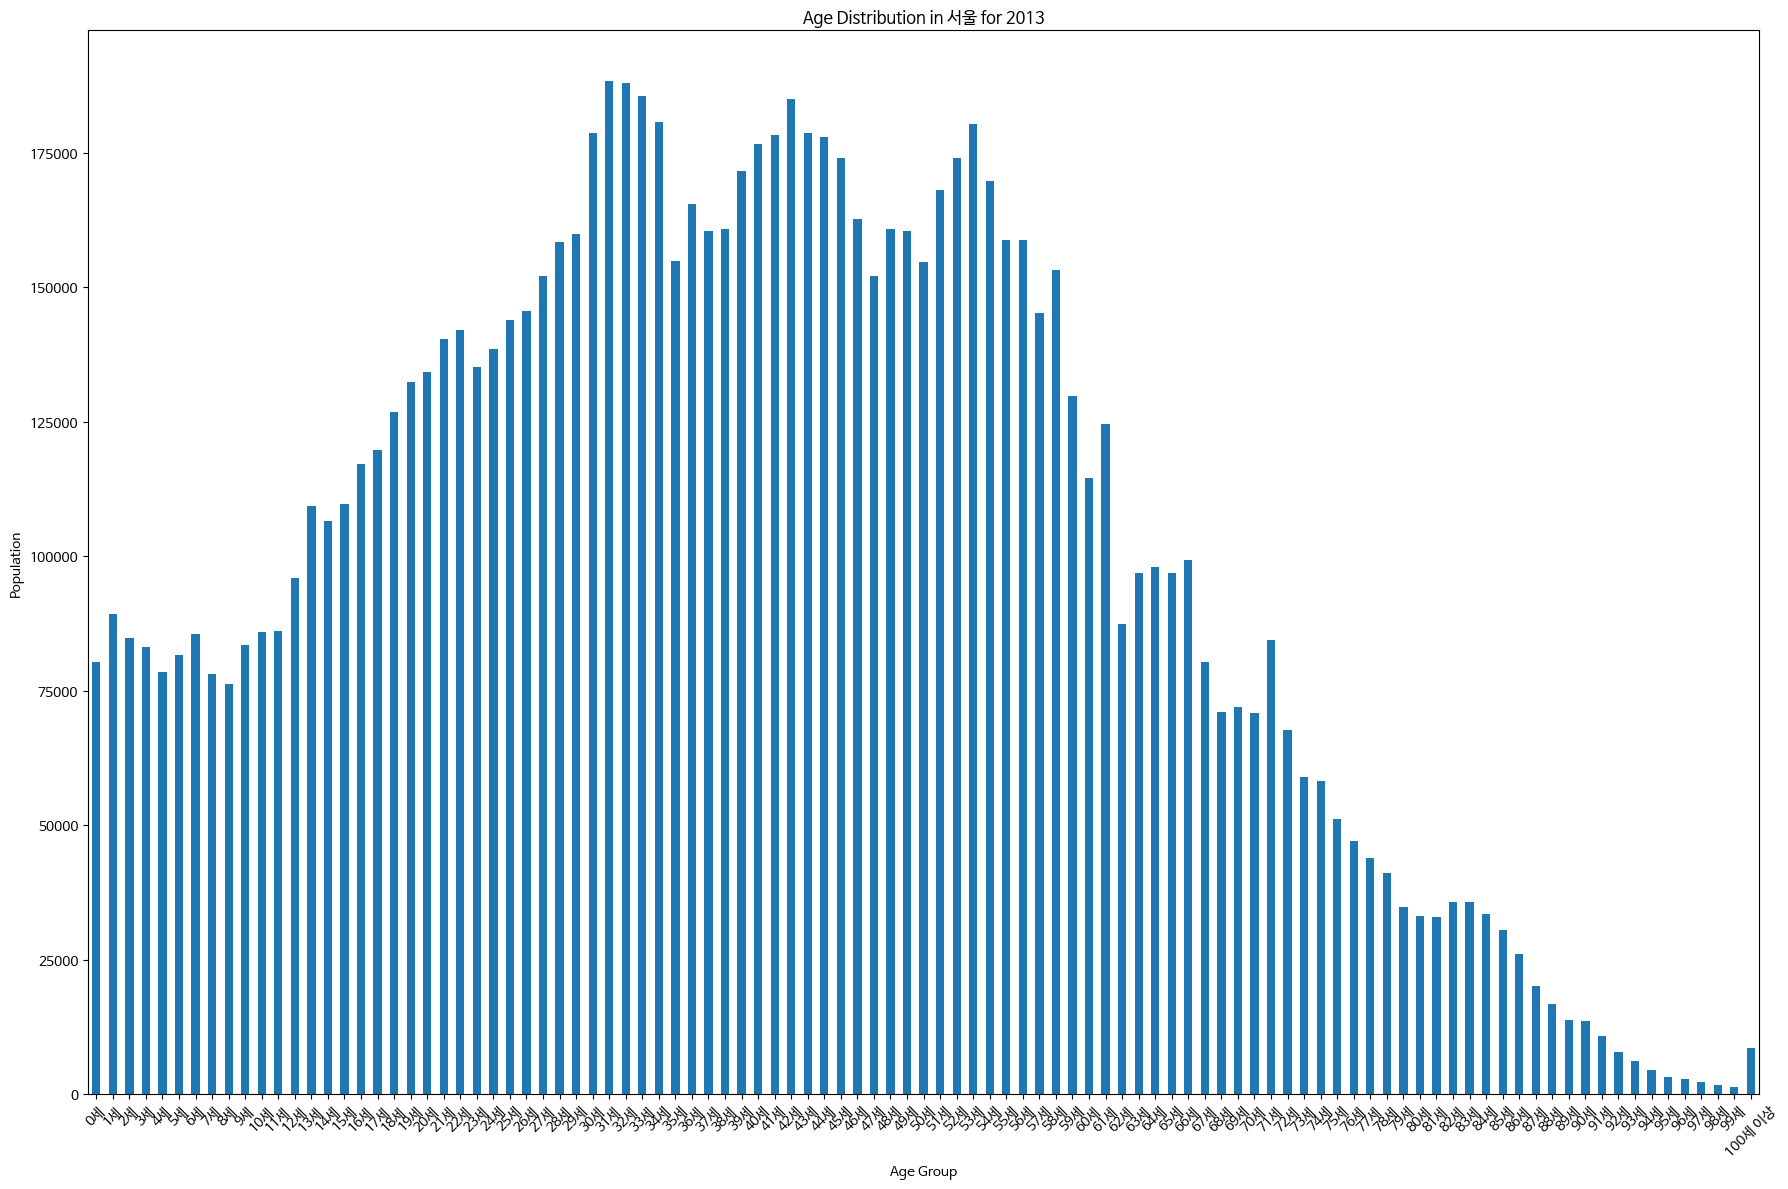

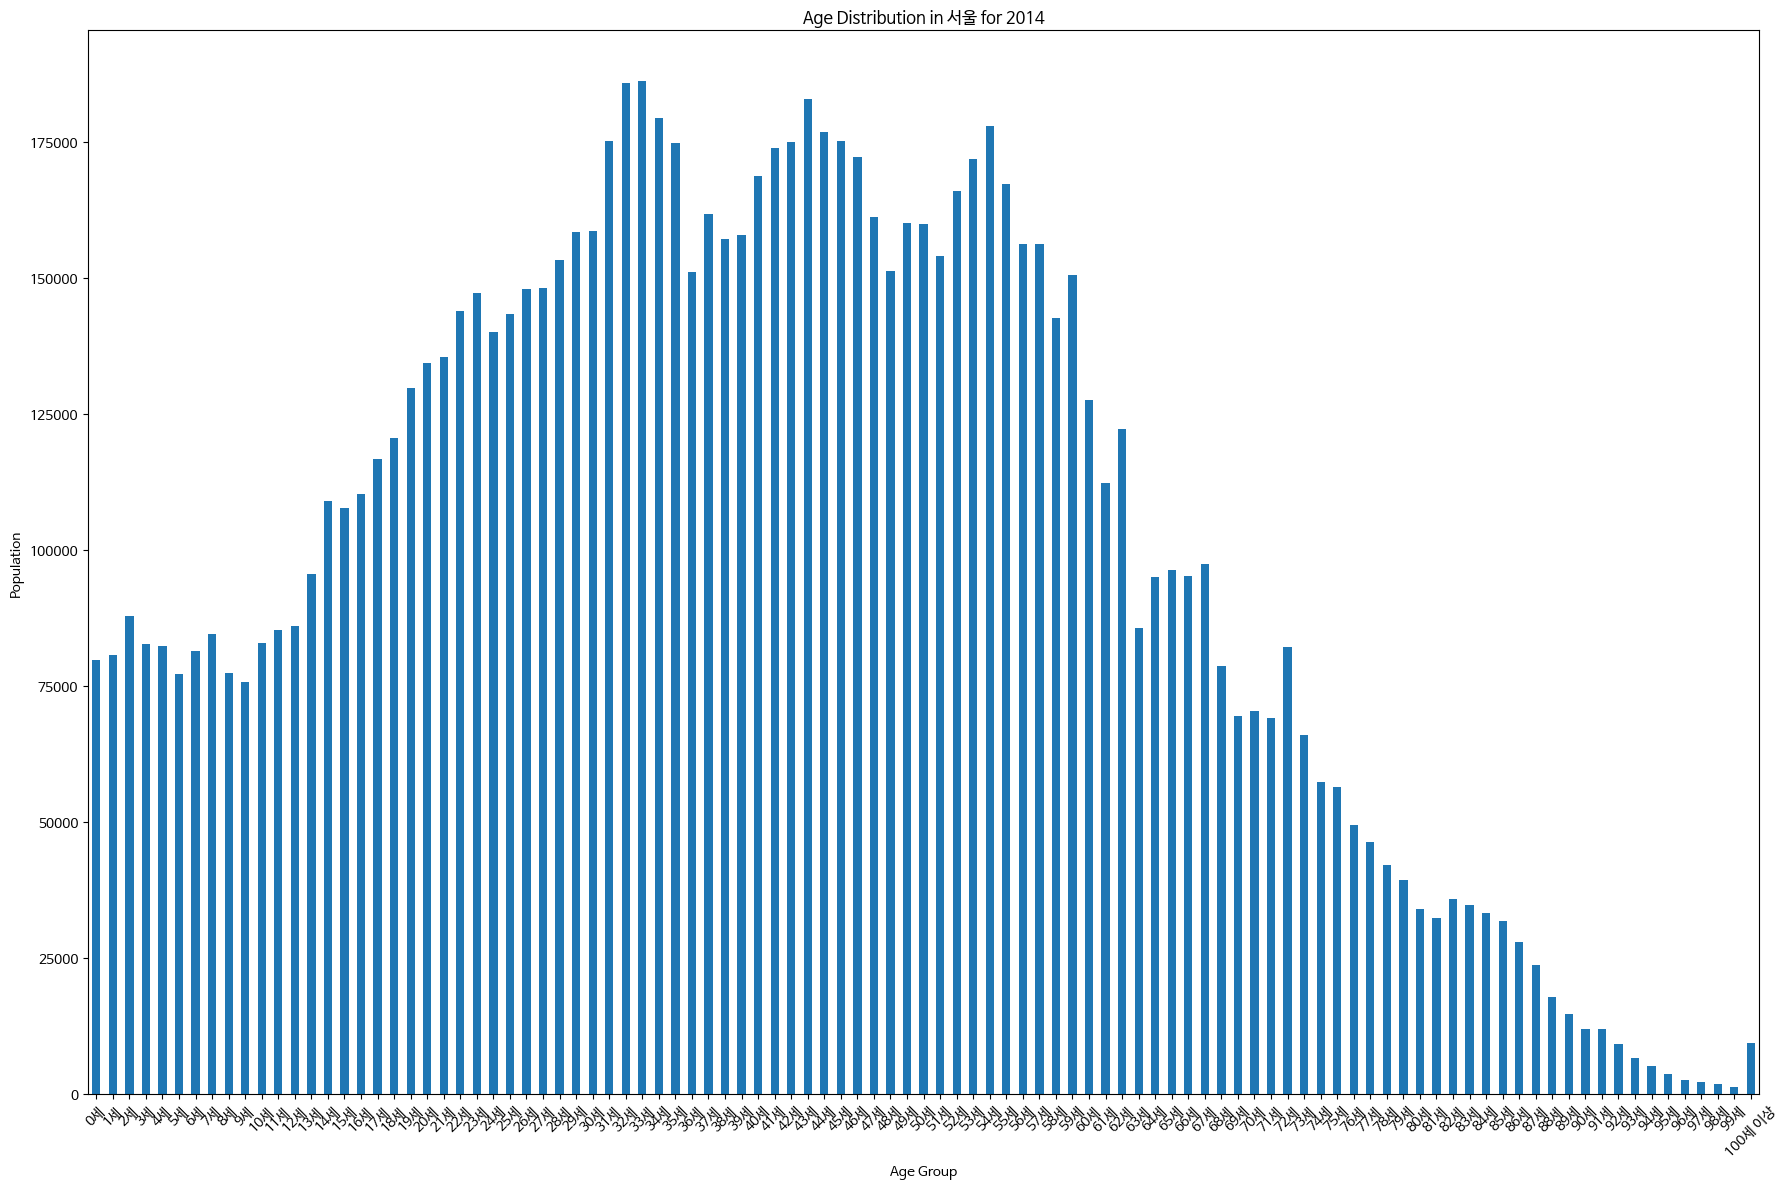

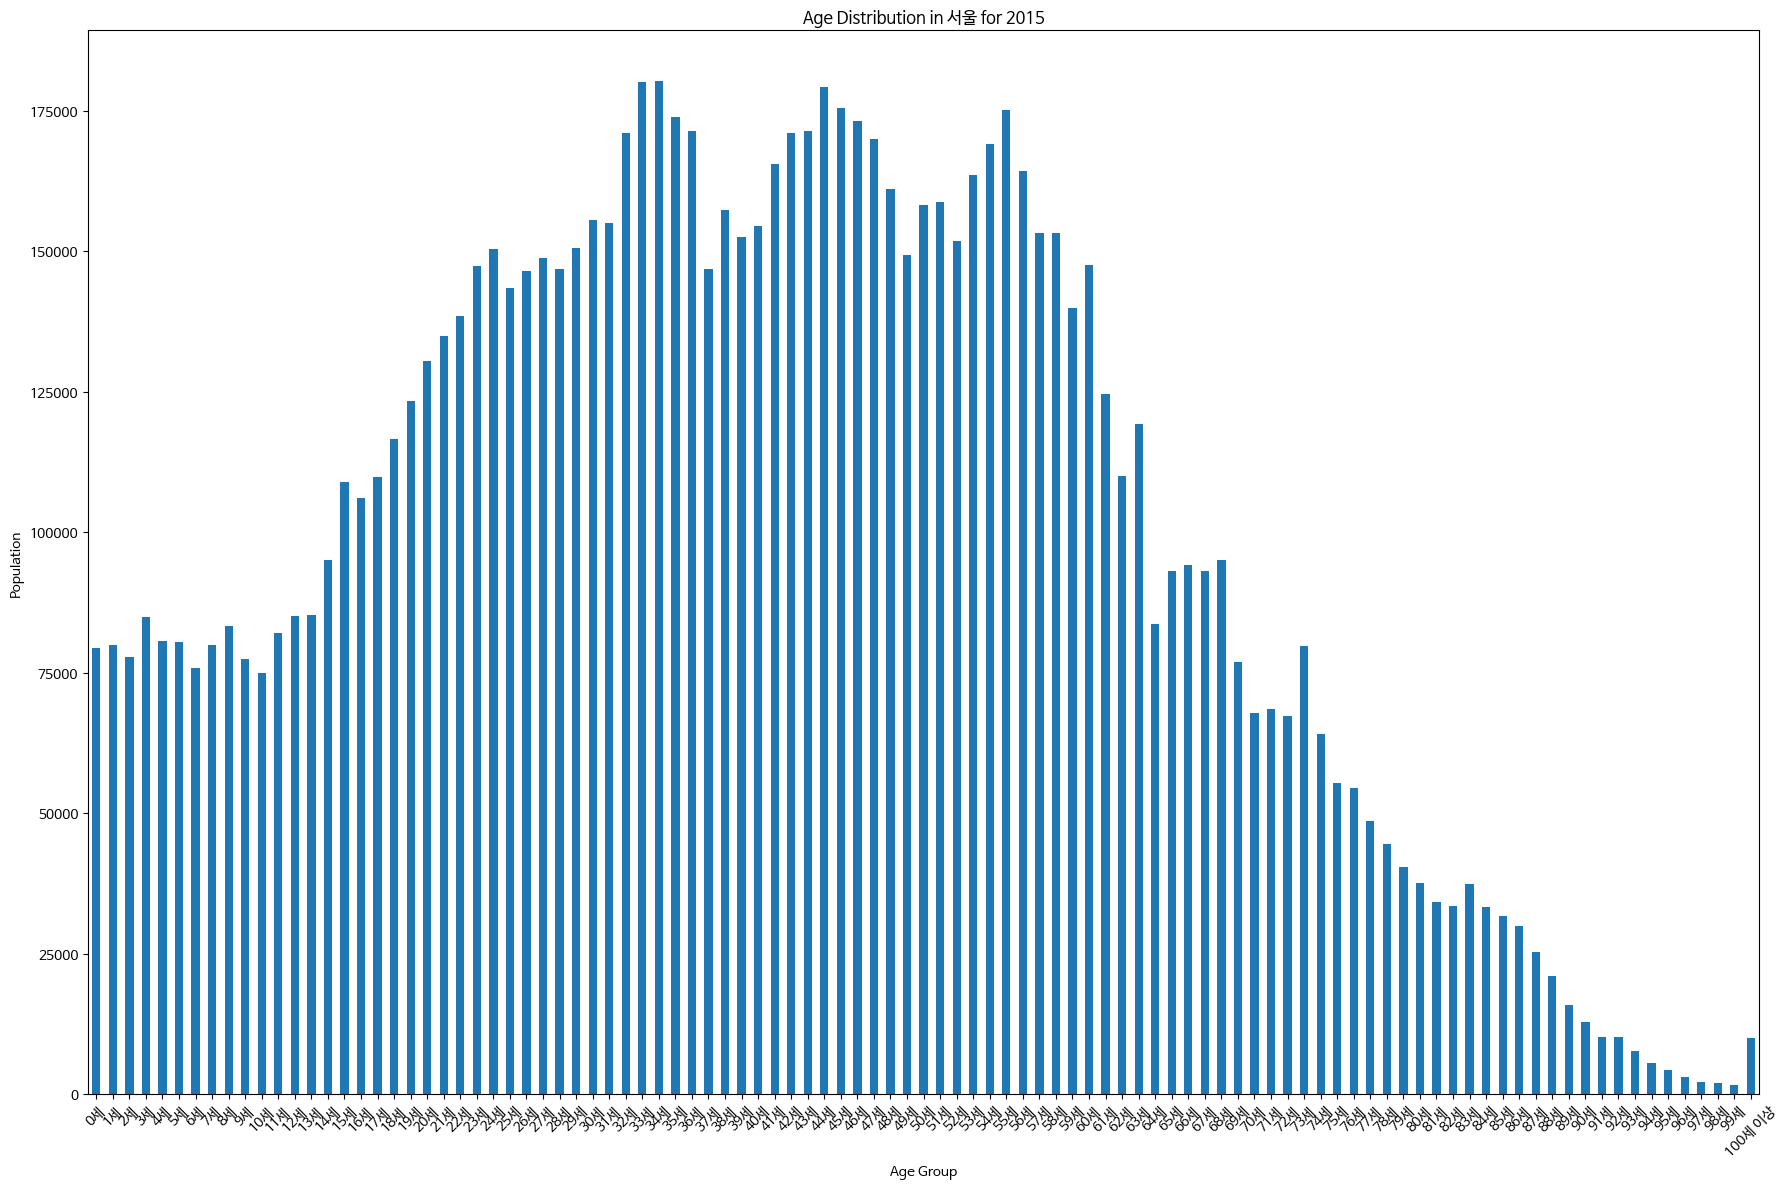

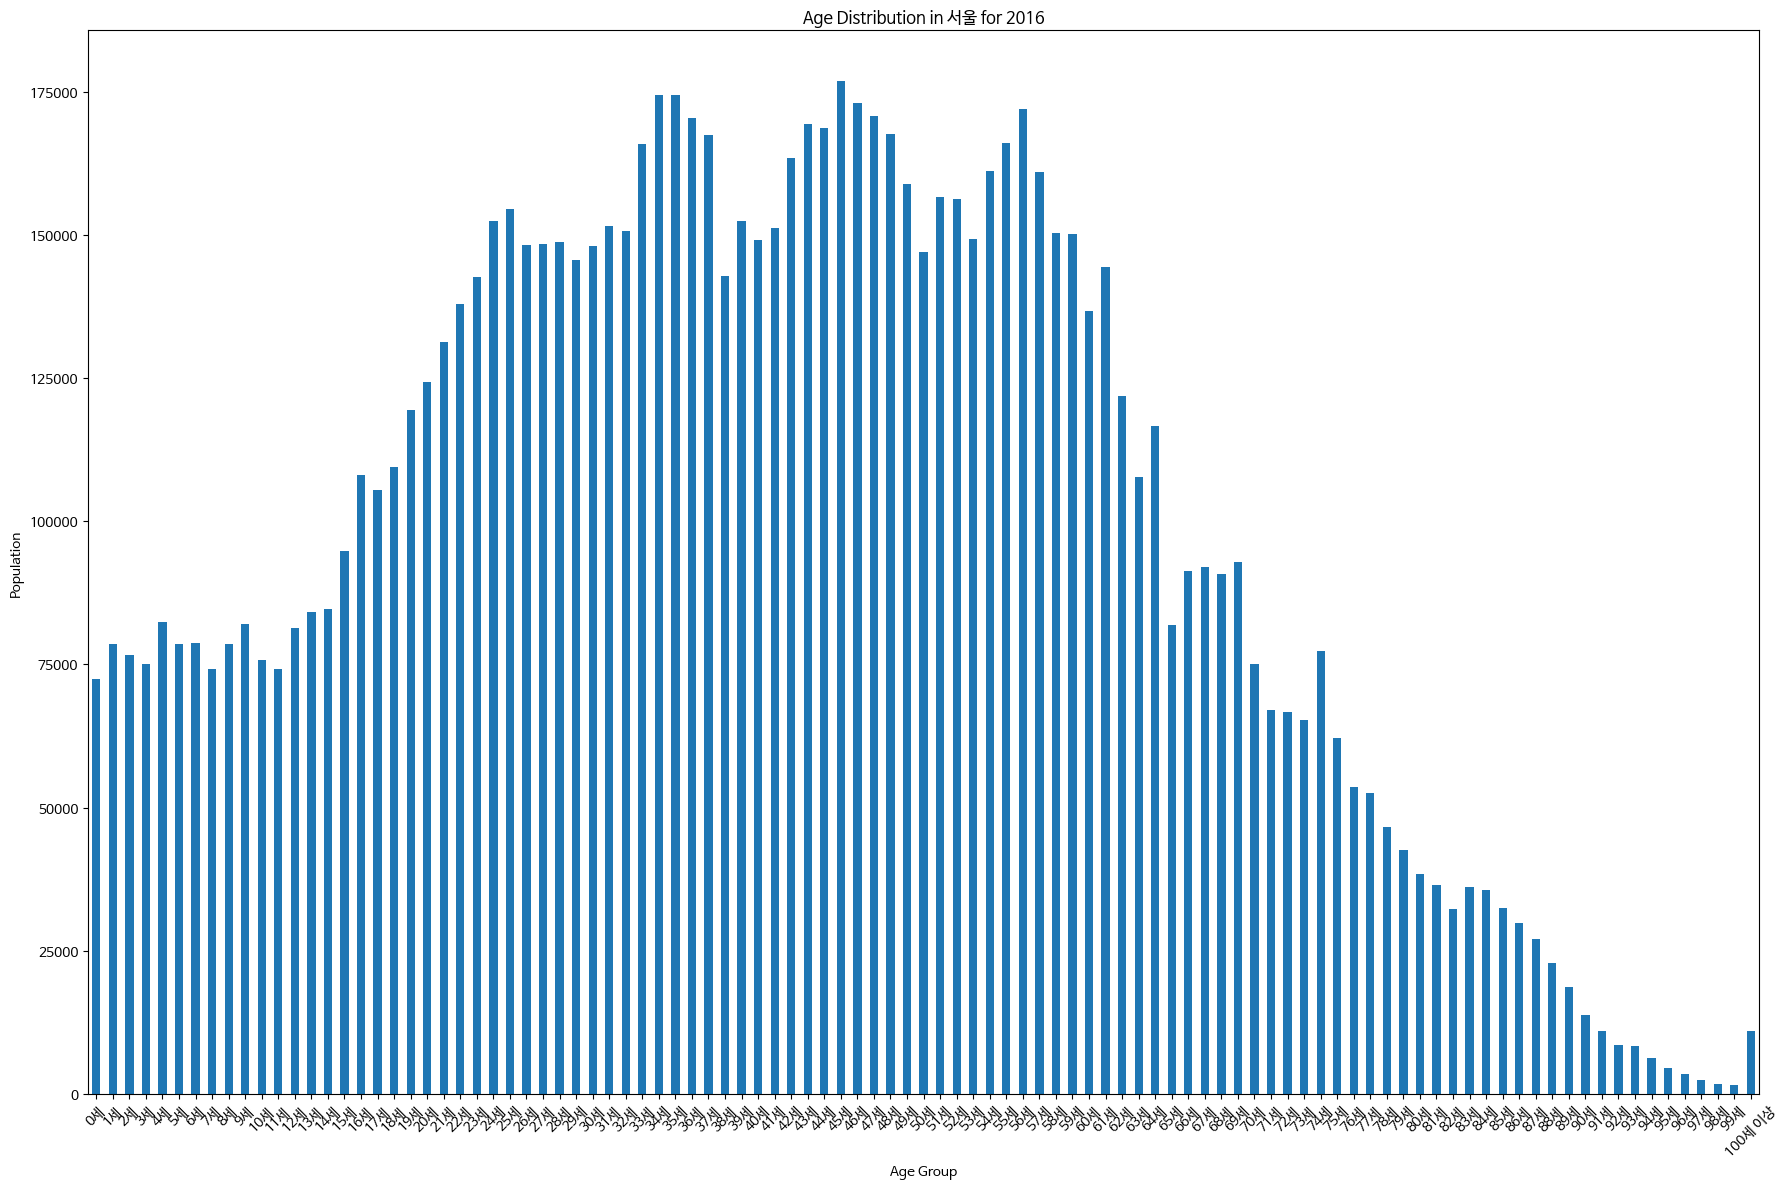

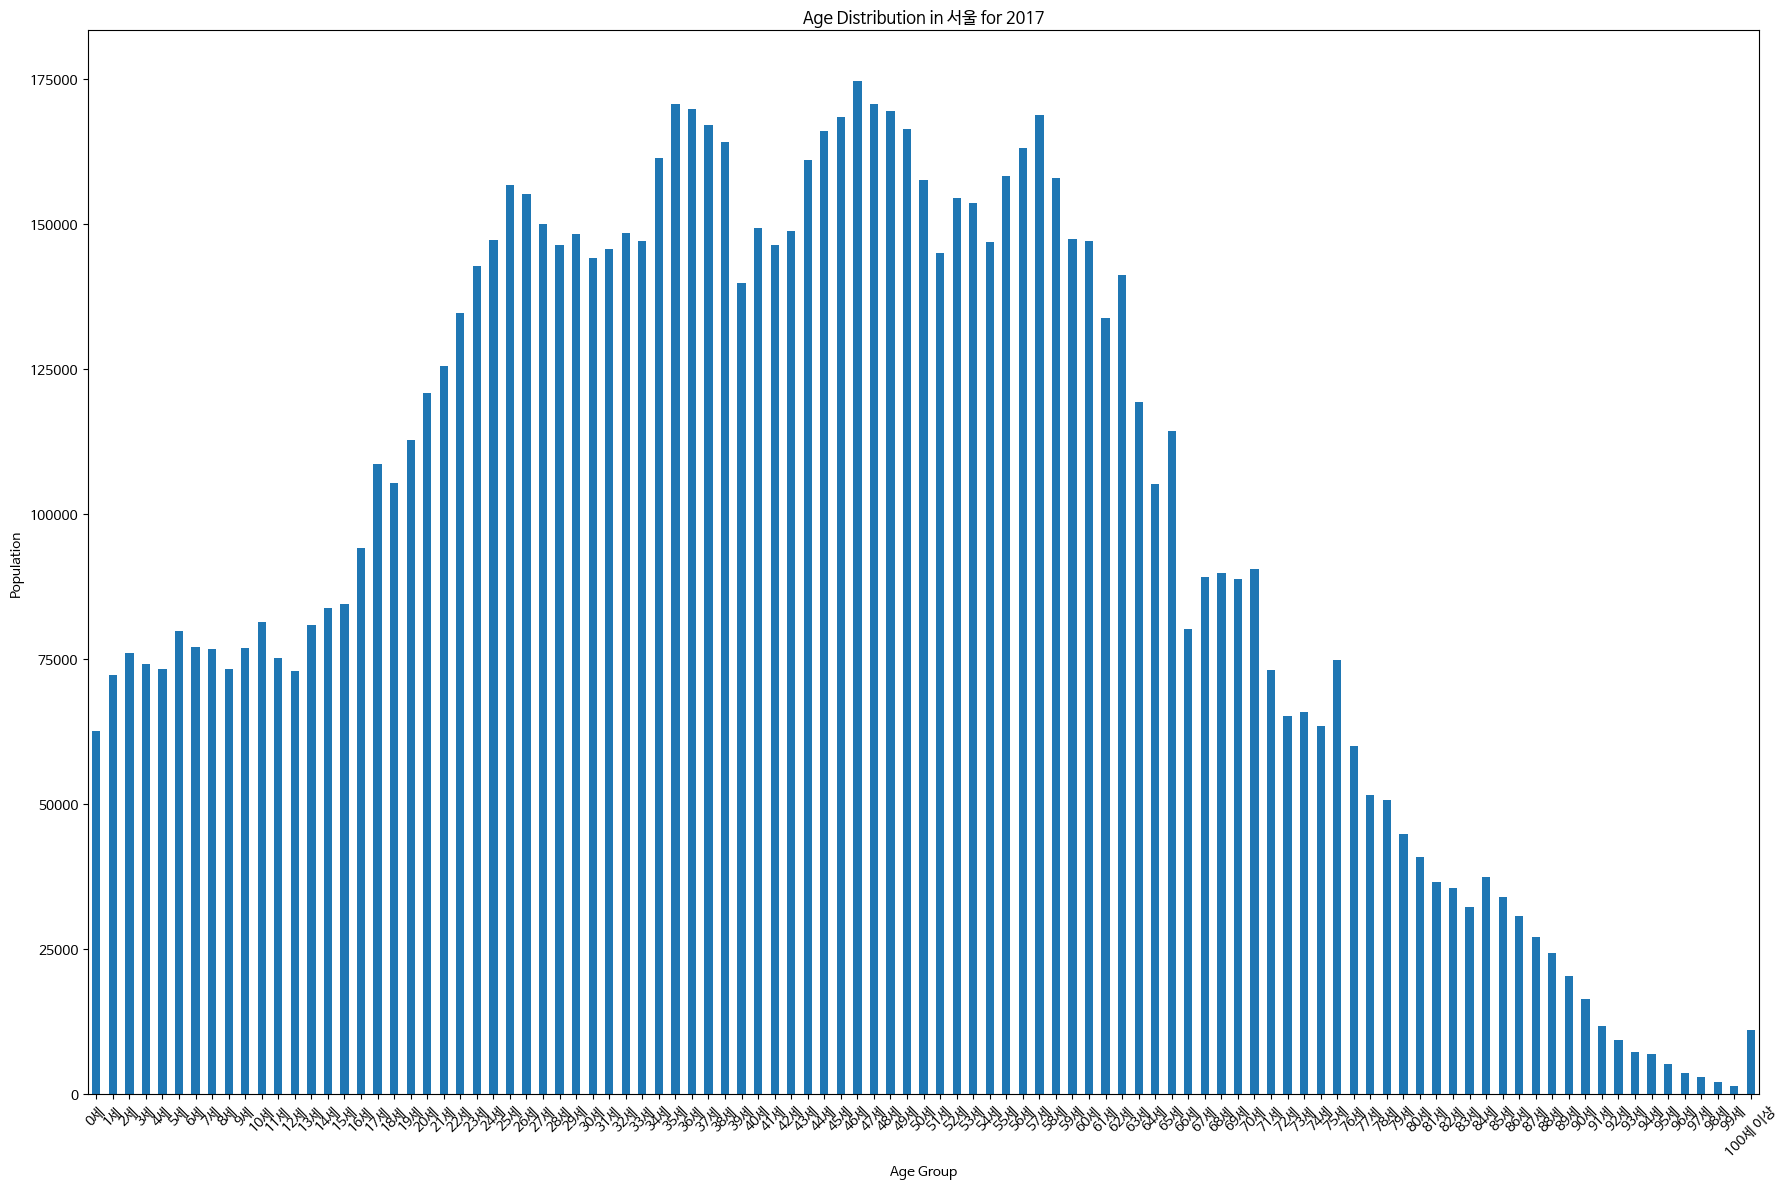

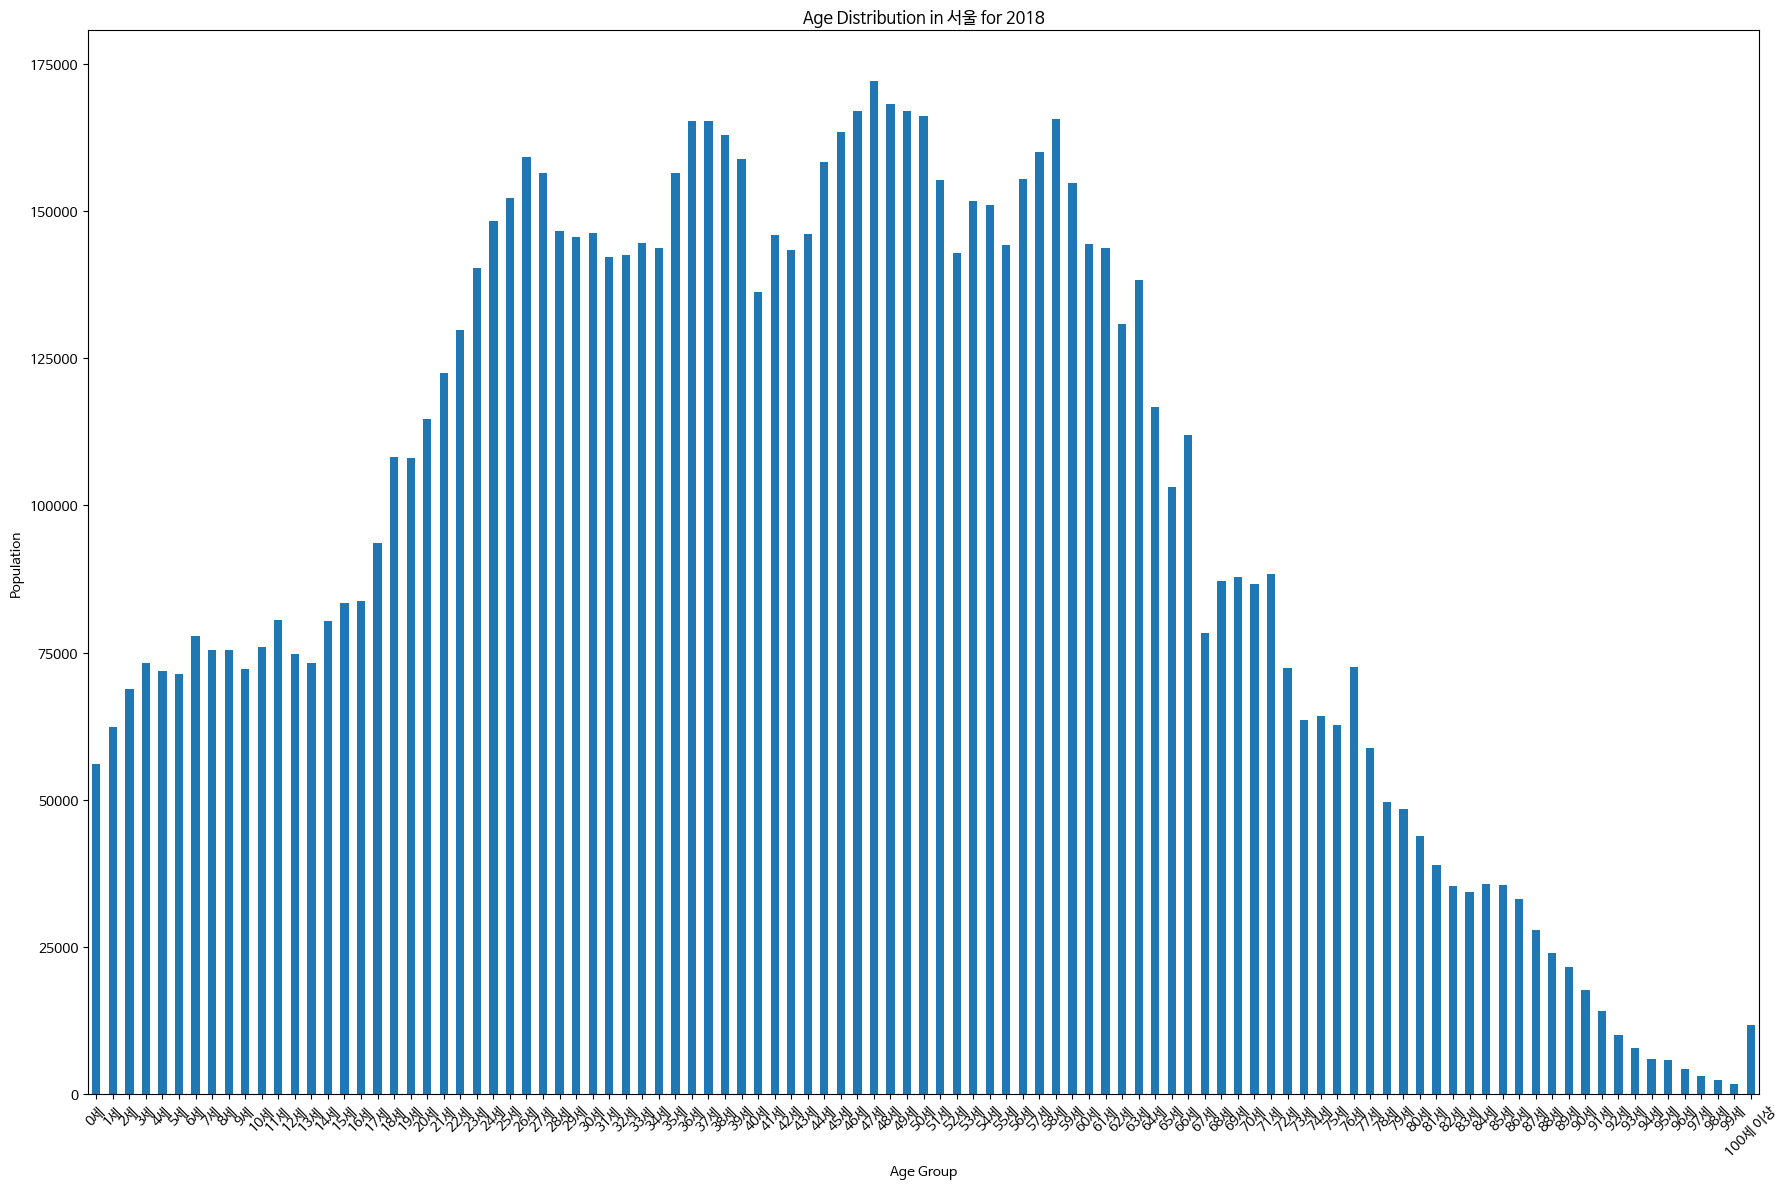

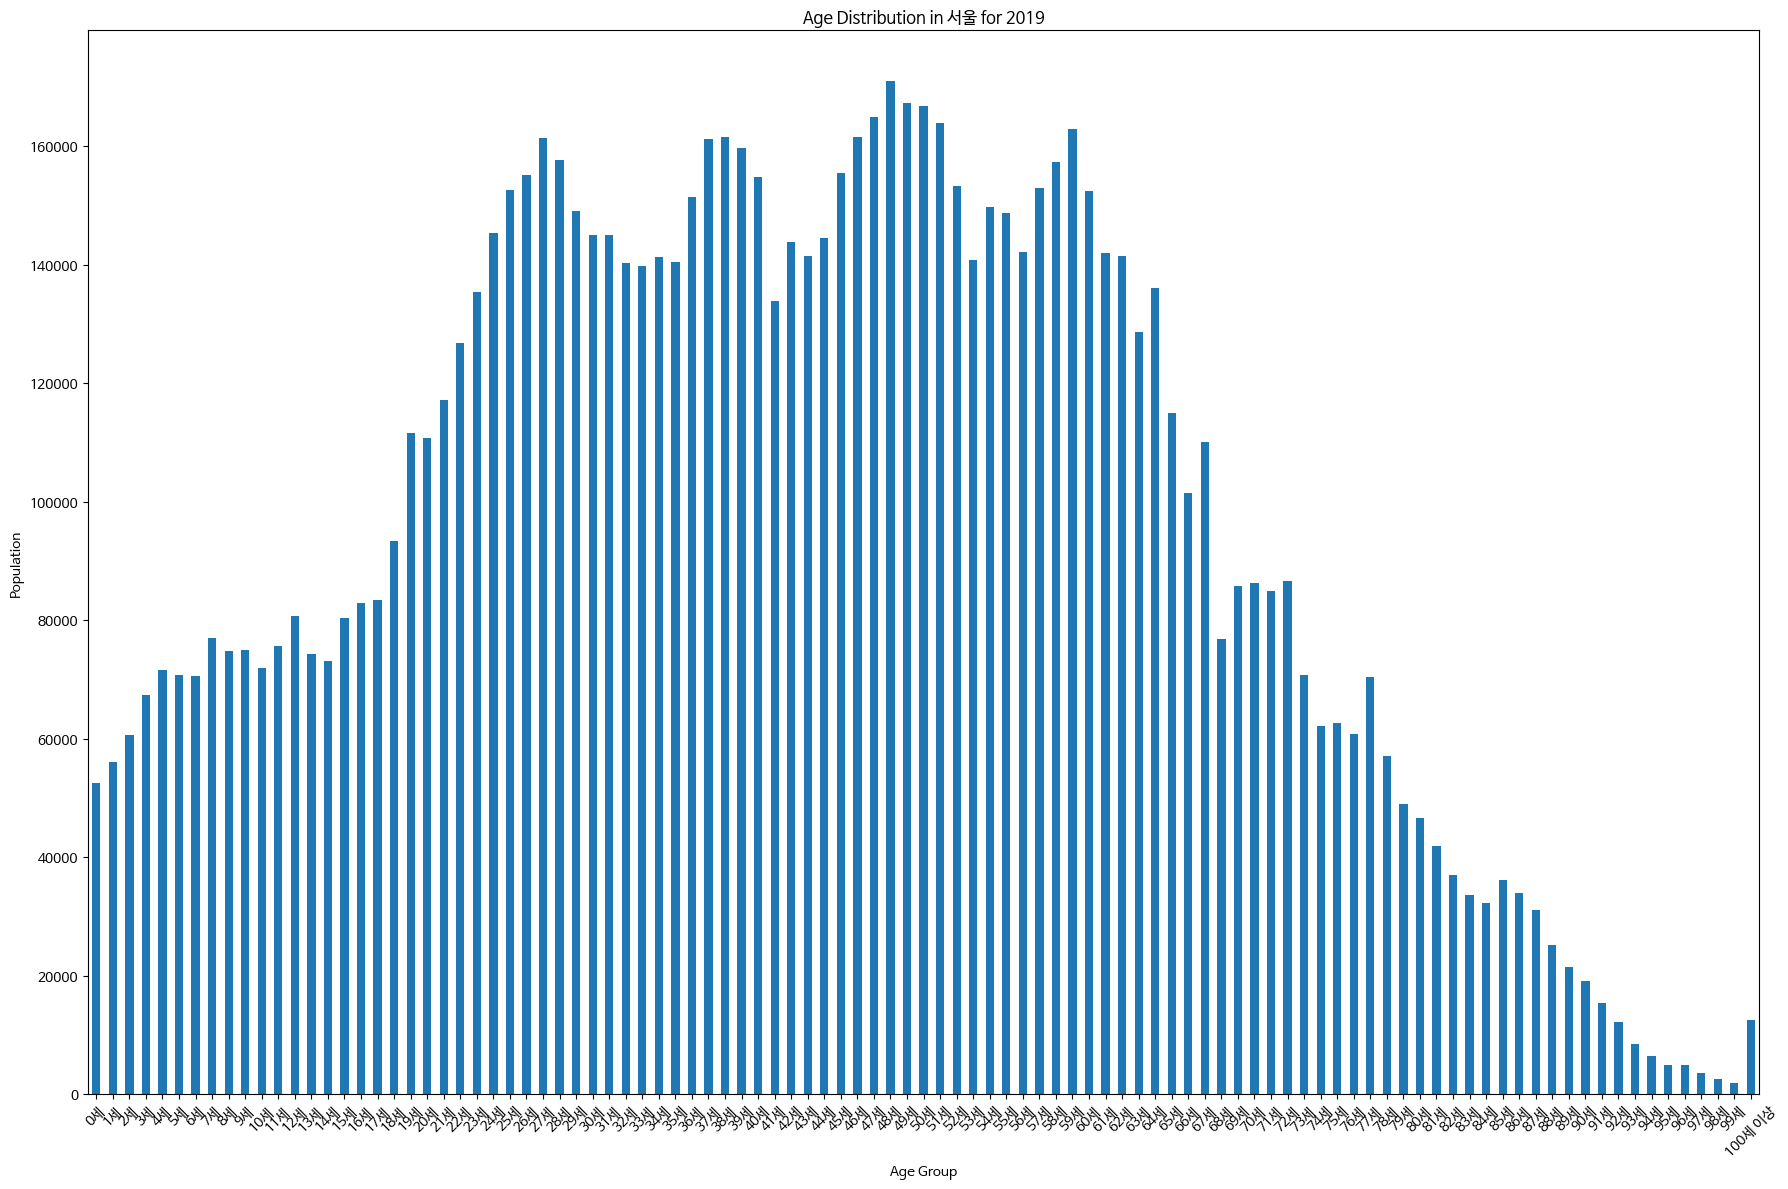

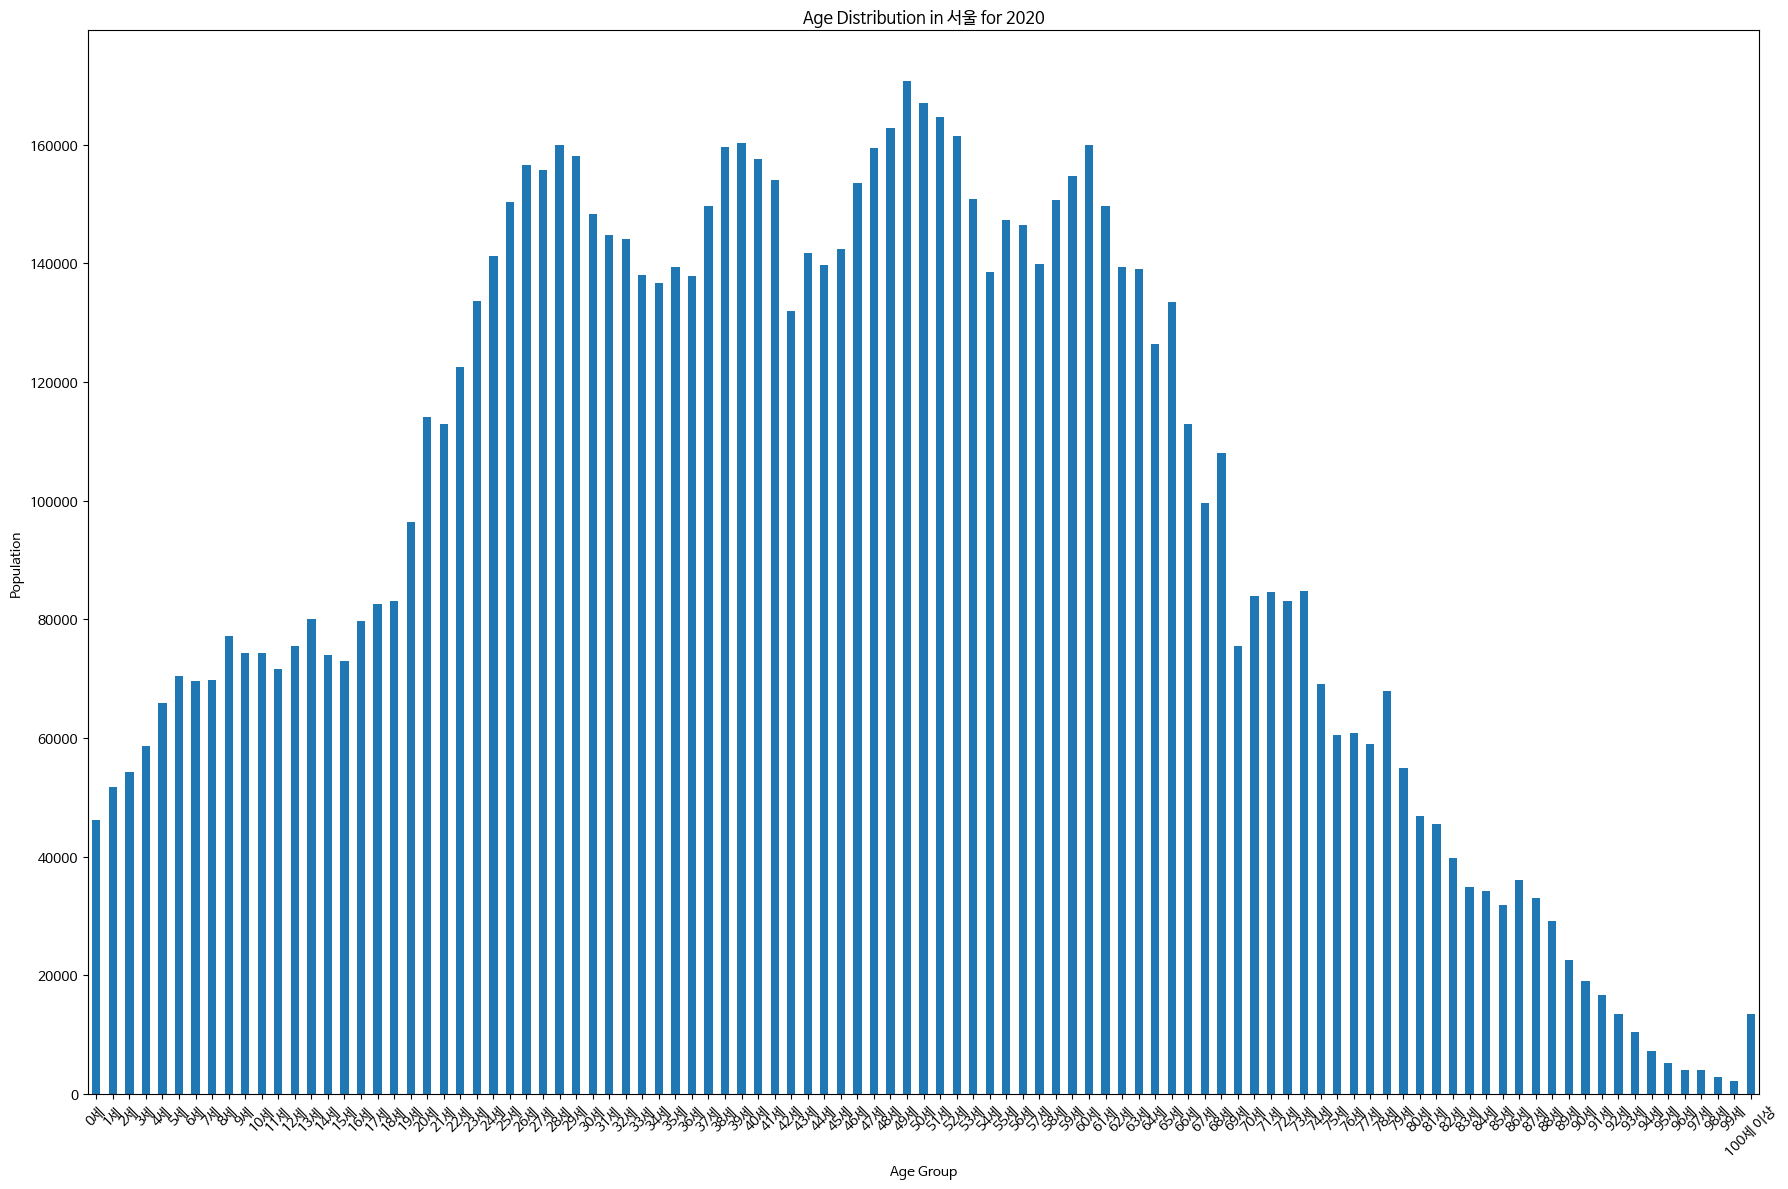

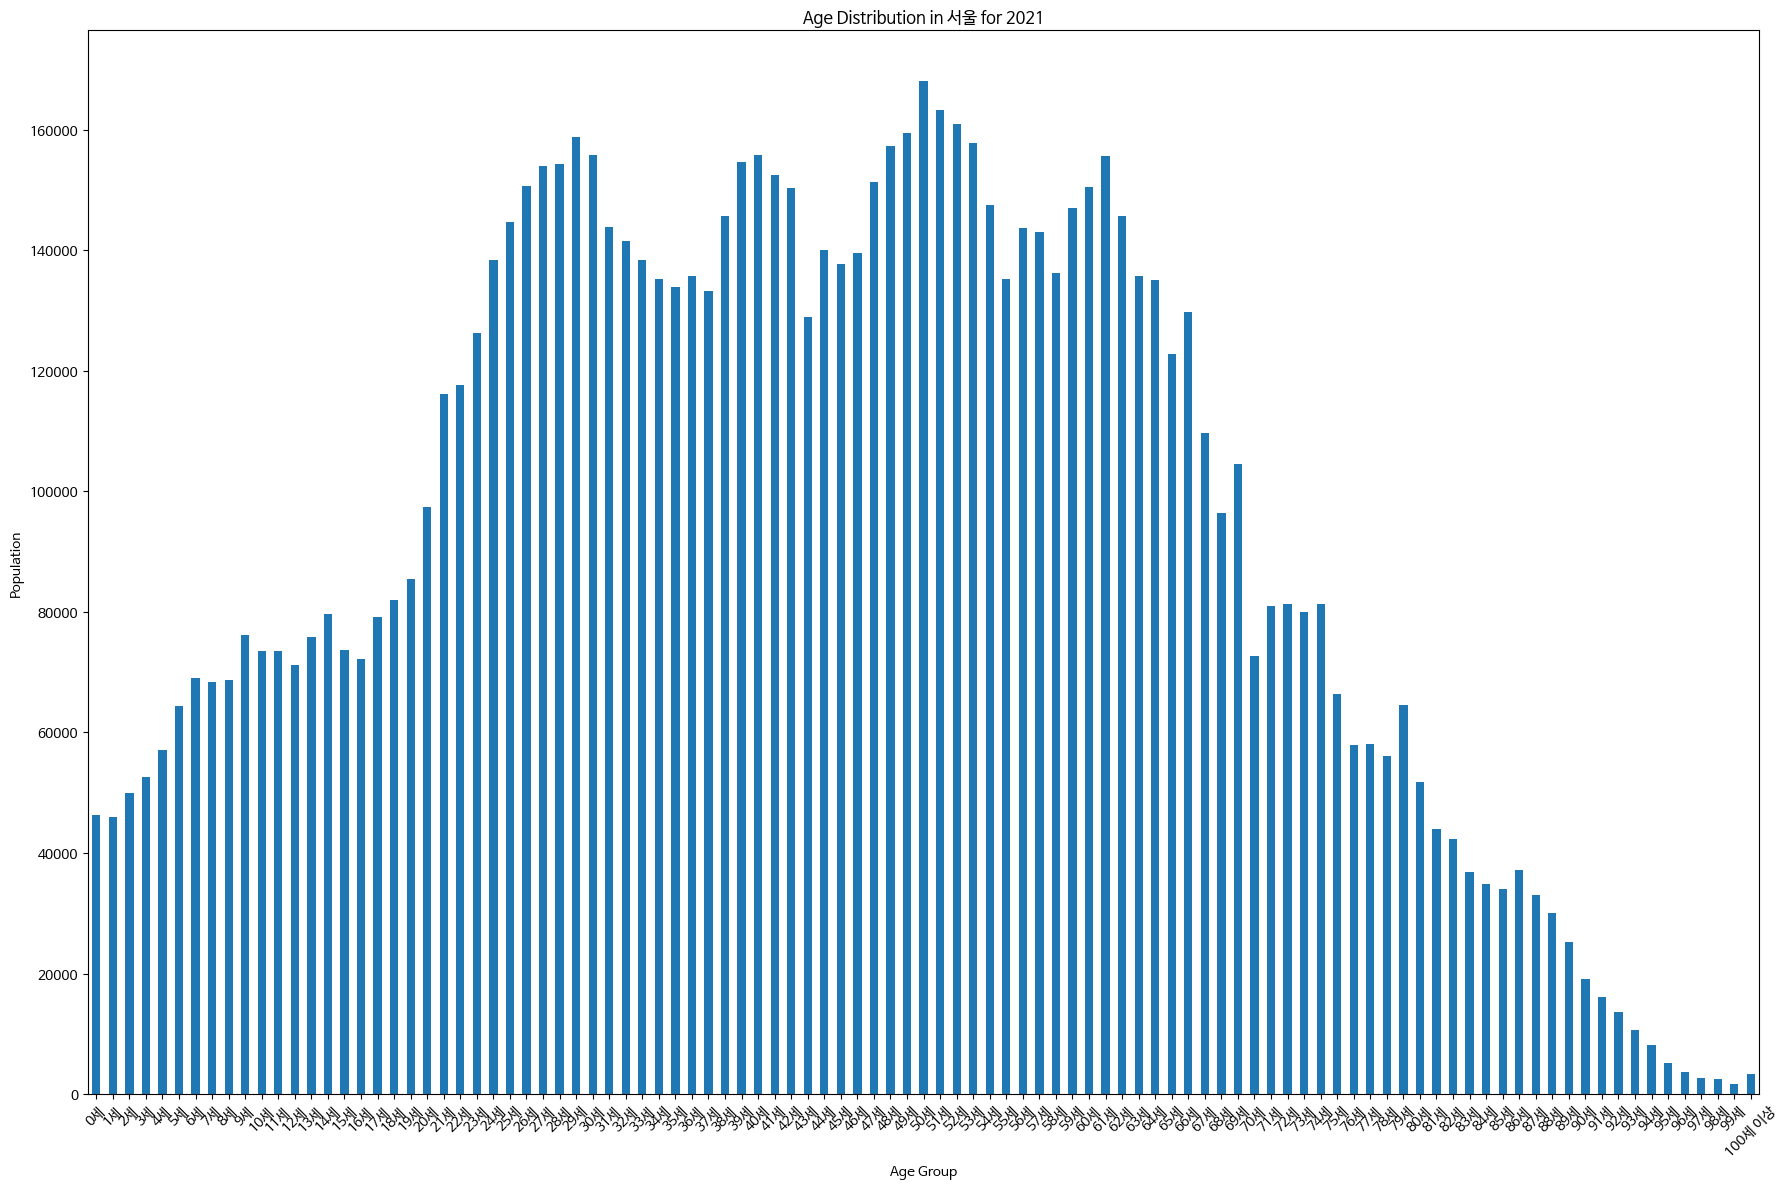

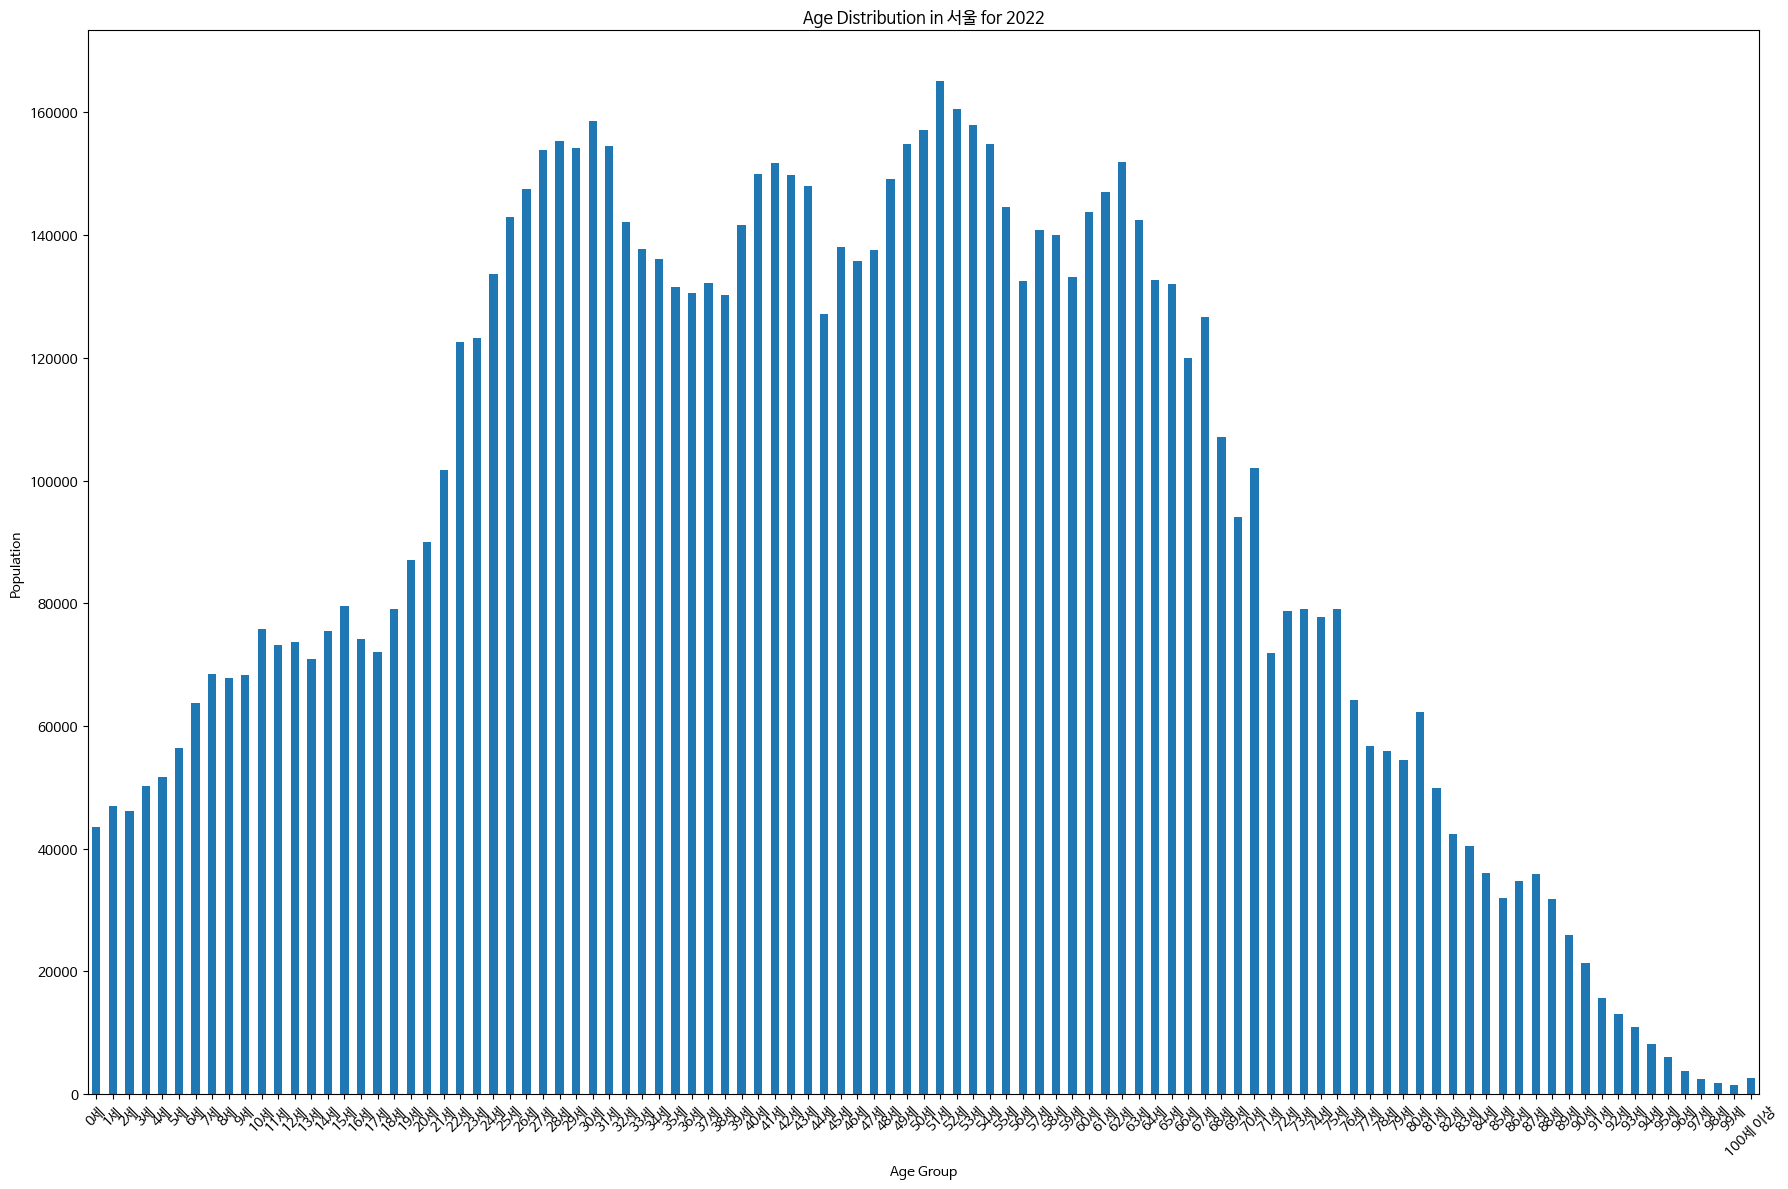

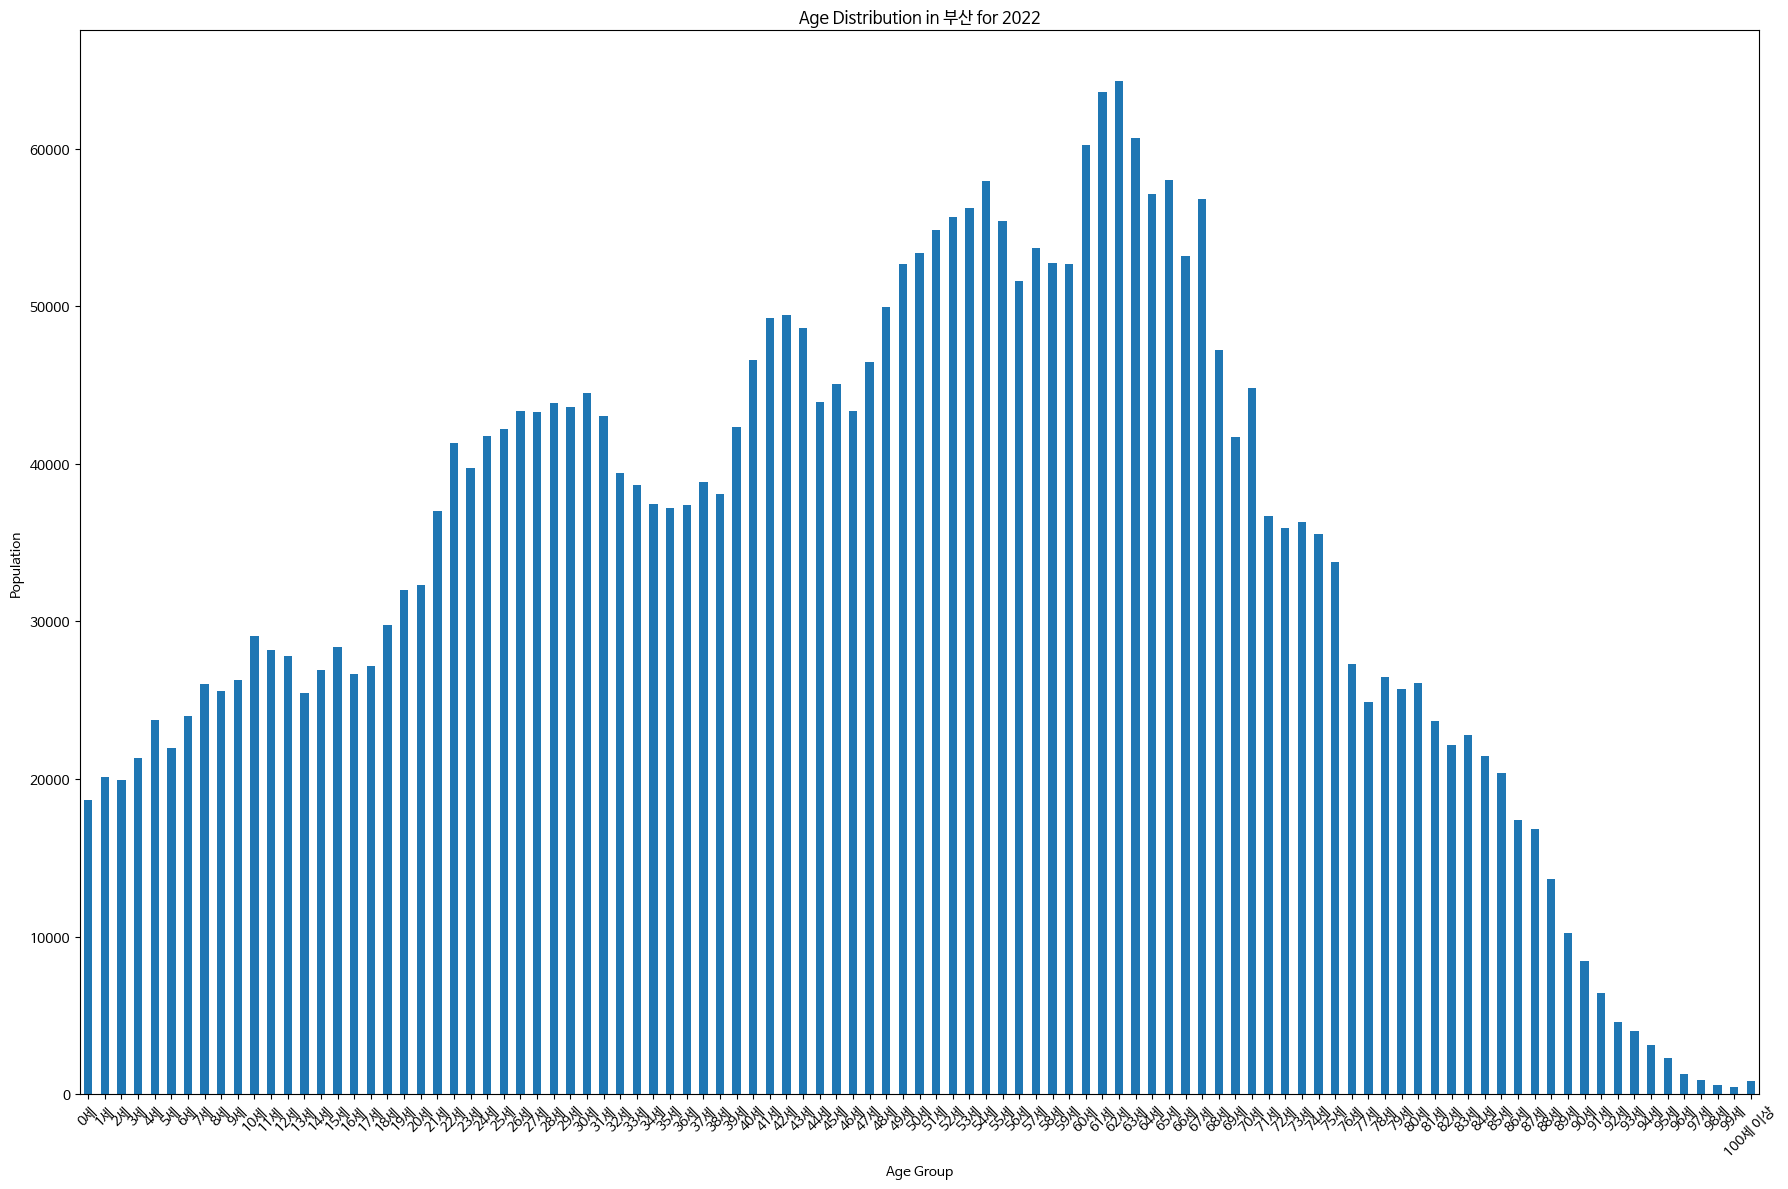

In [172]:
for region, years in regions_years.items():
    for year in years:
        plot_age_distribution(region, int(year))

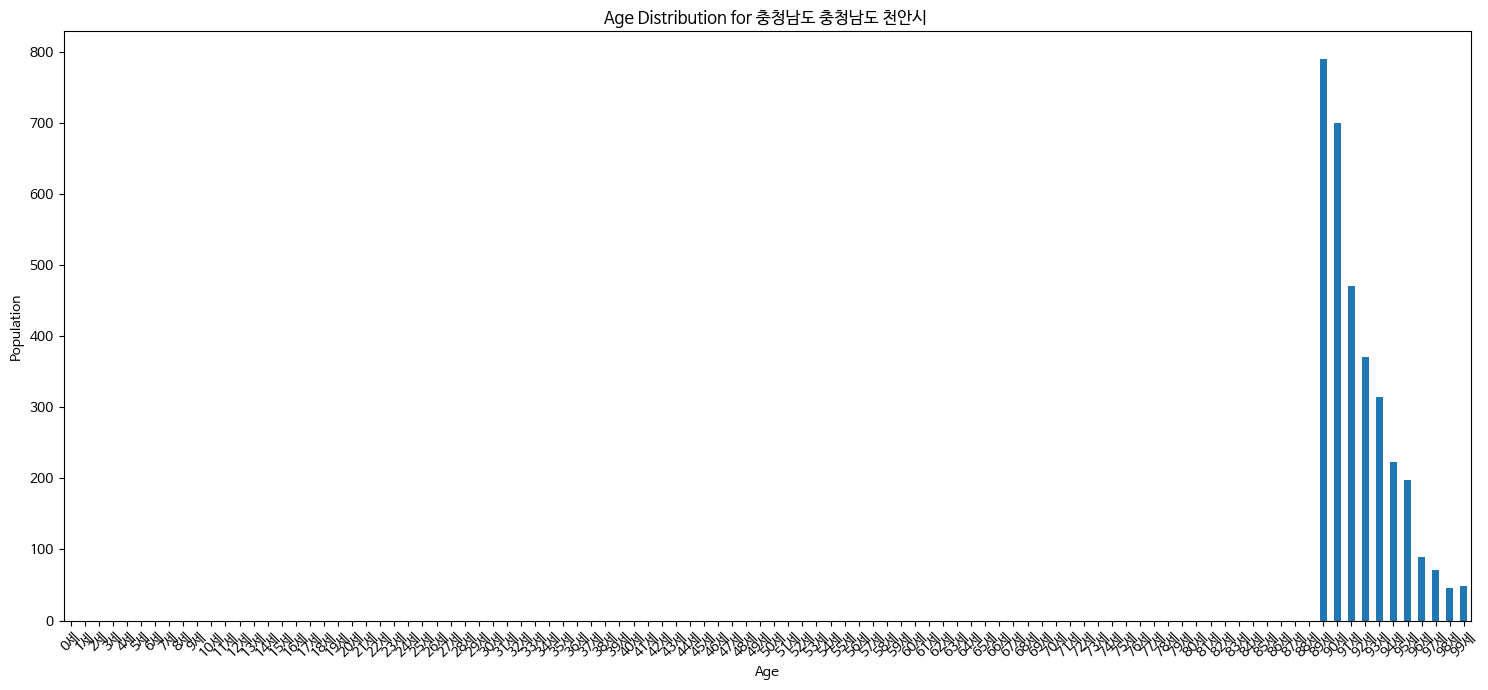

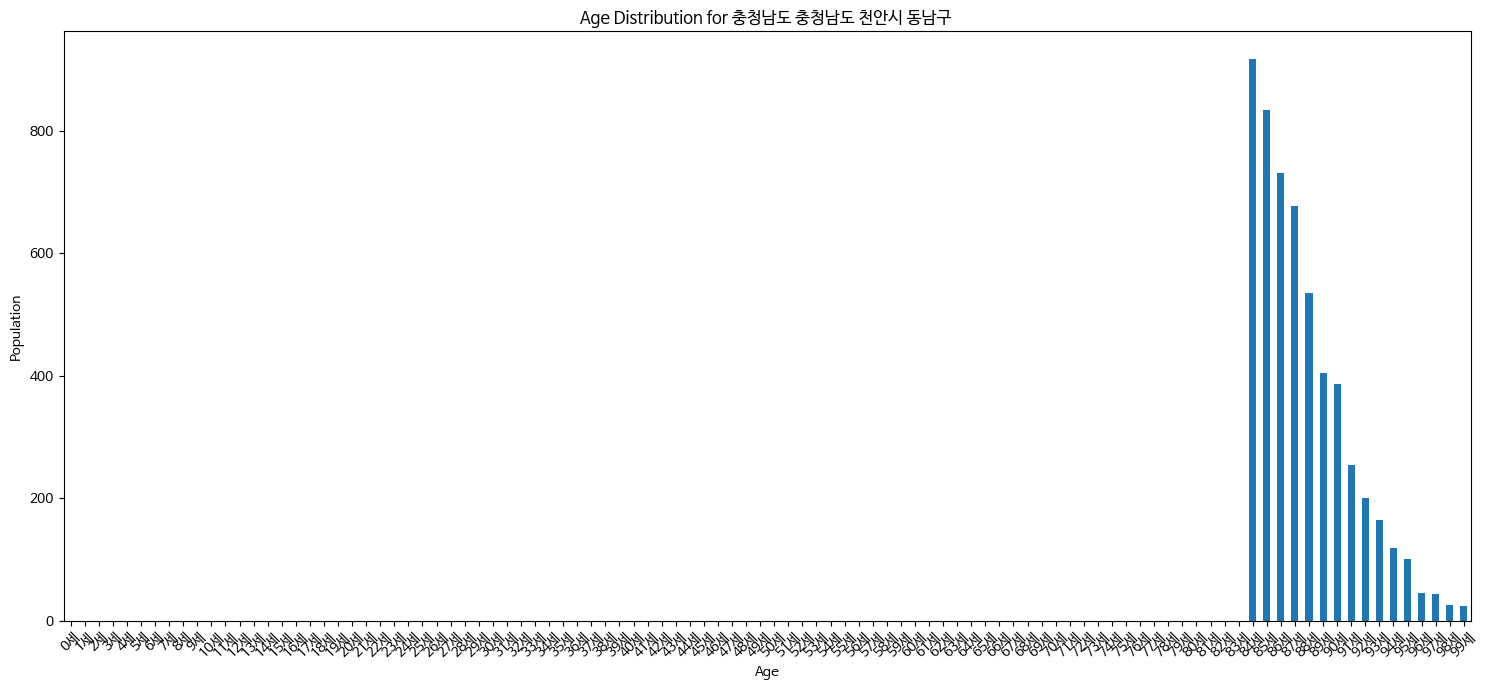

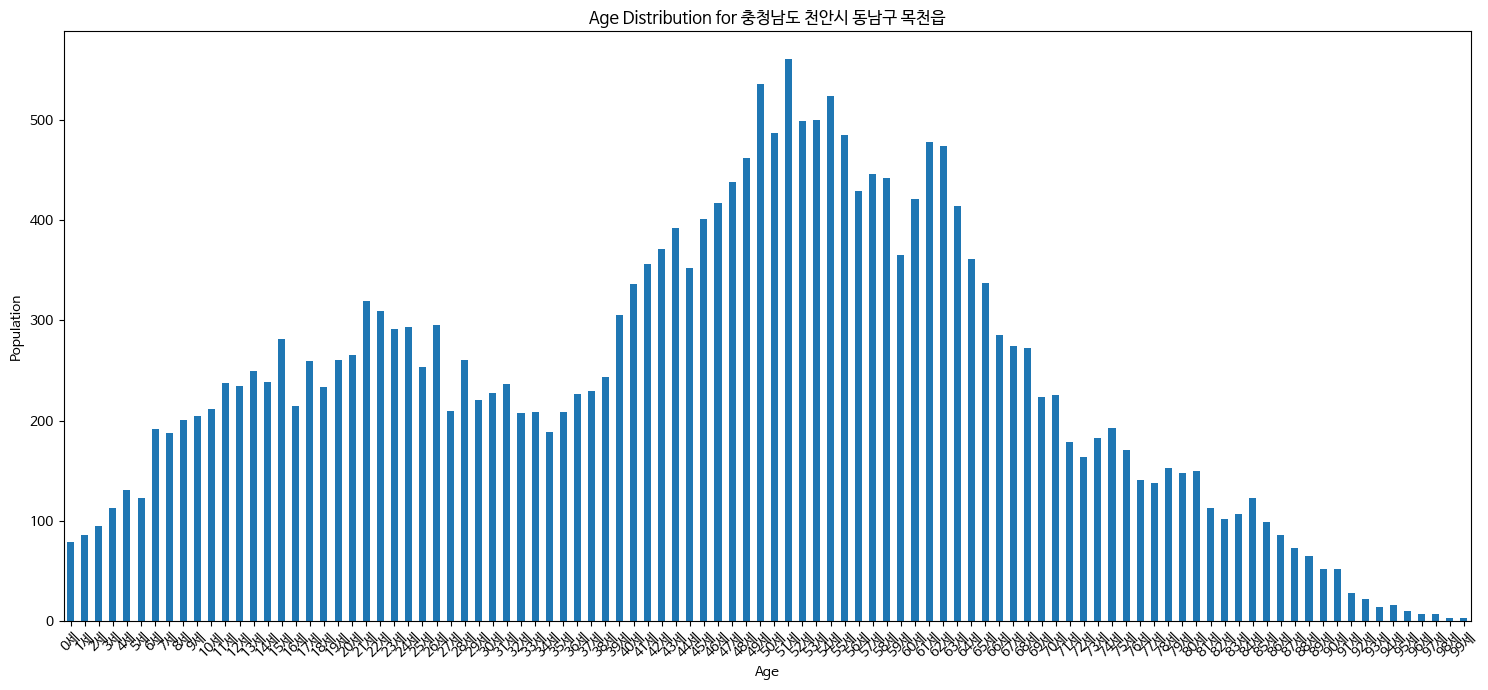

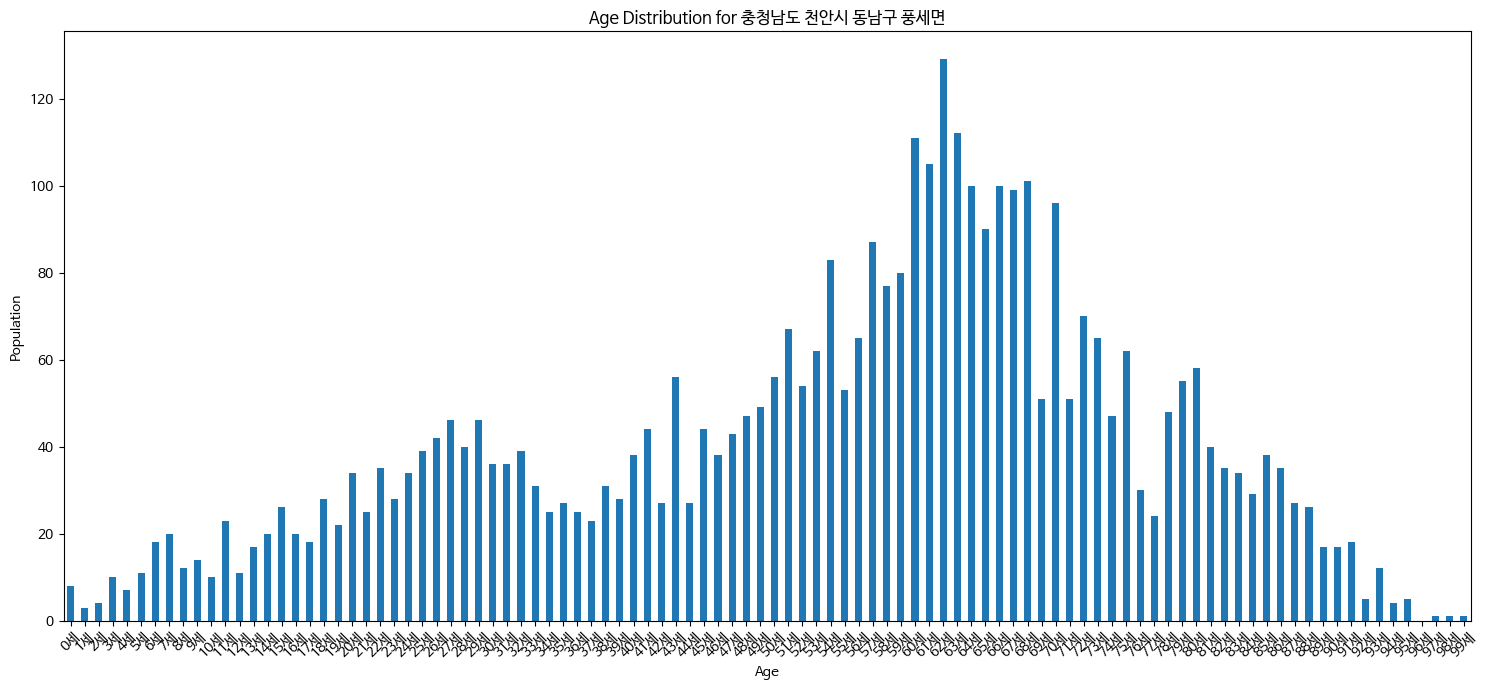

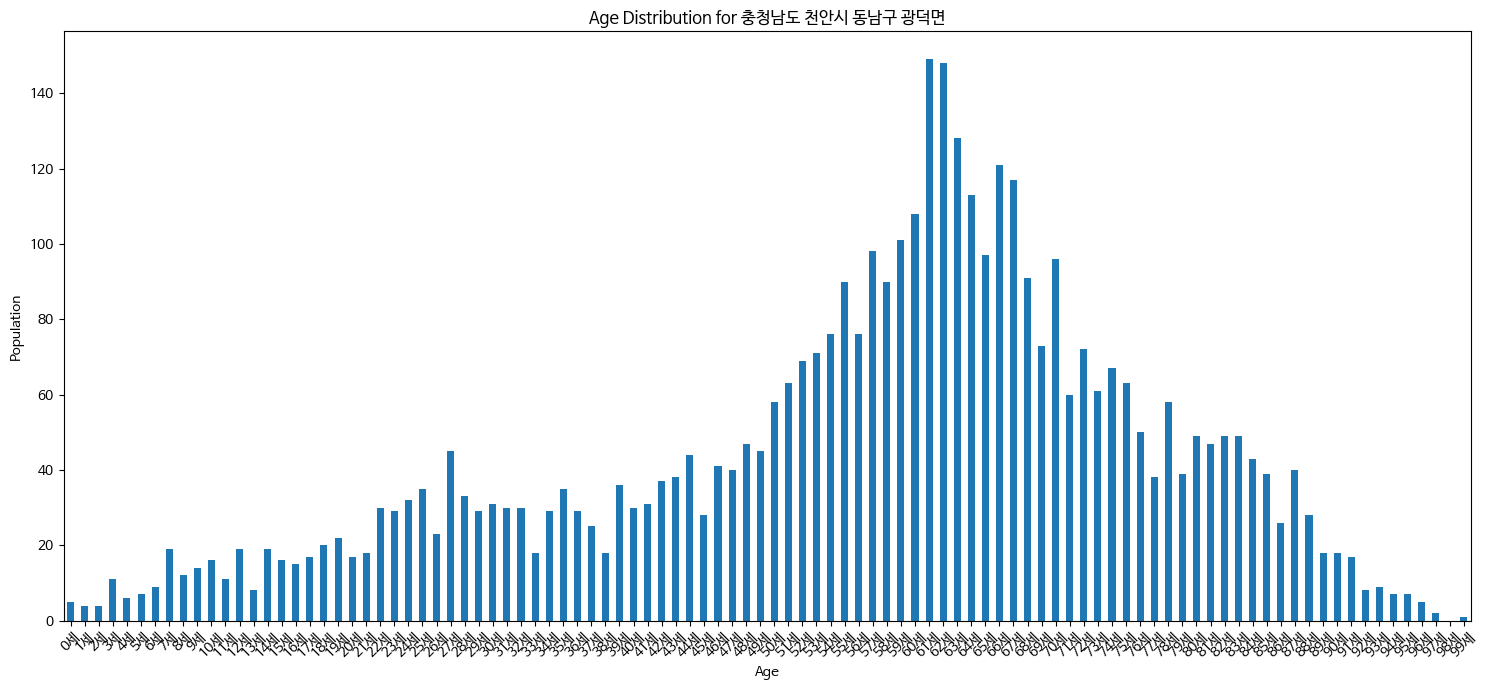

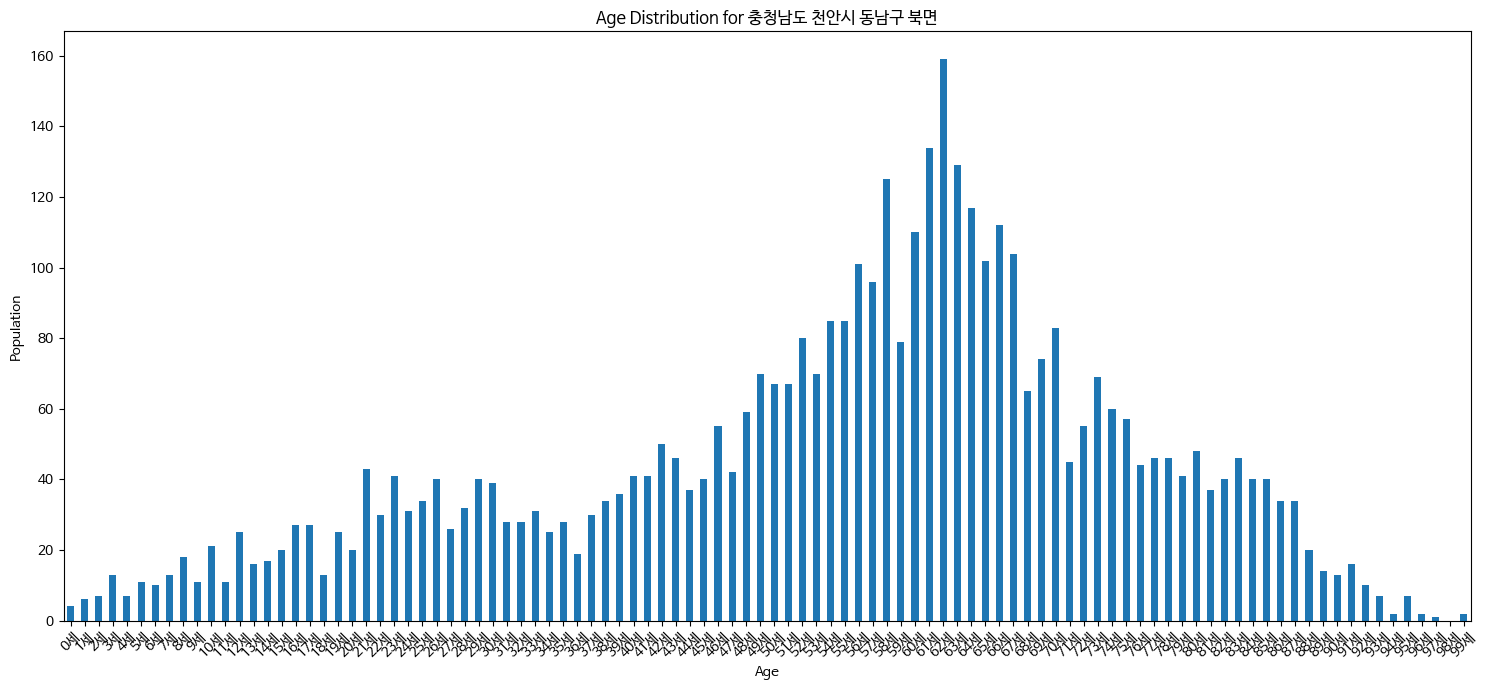

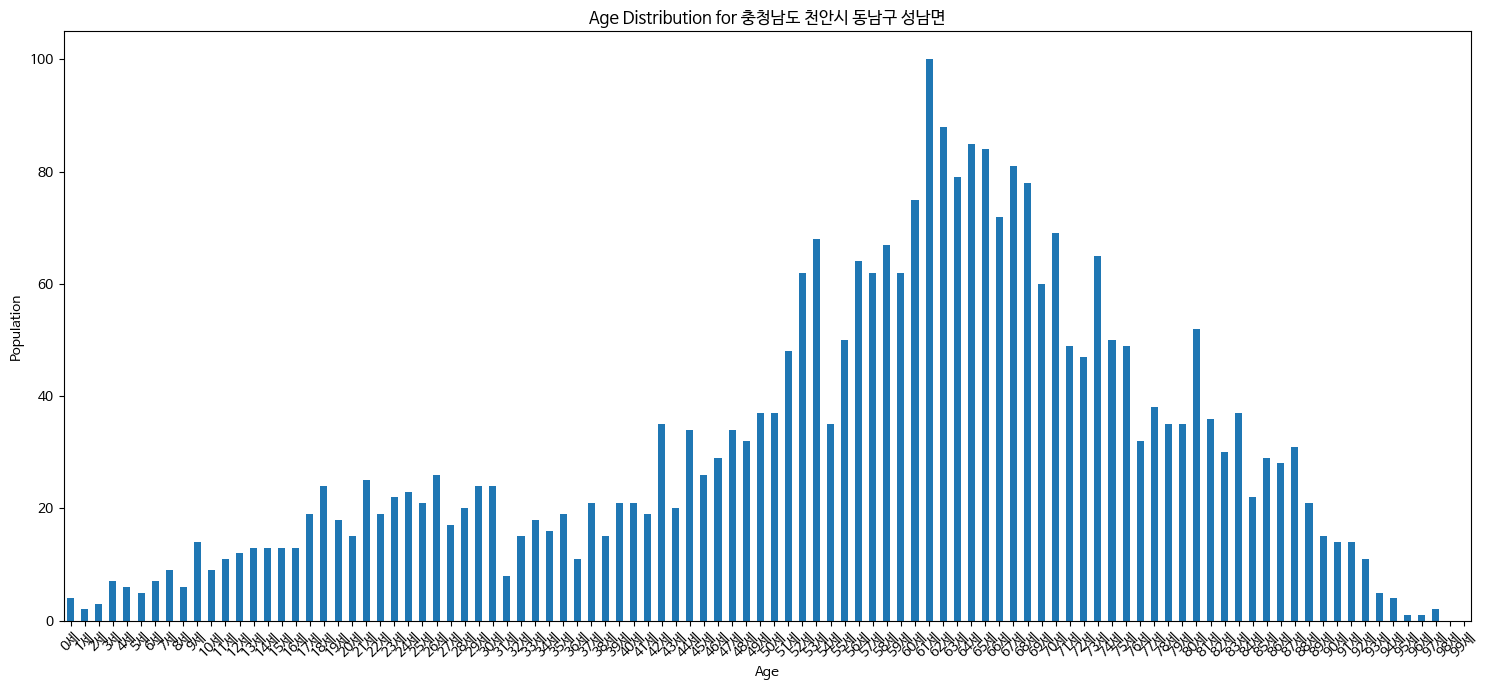

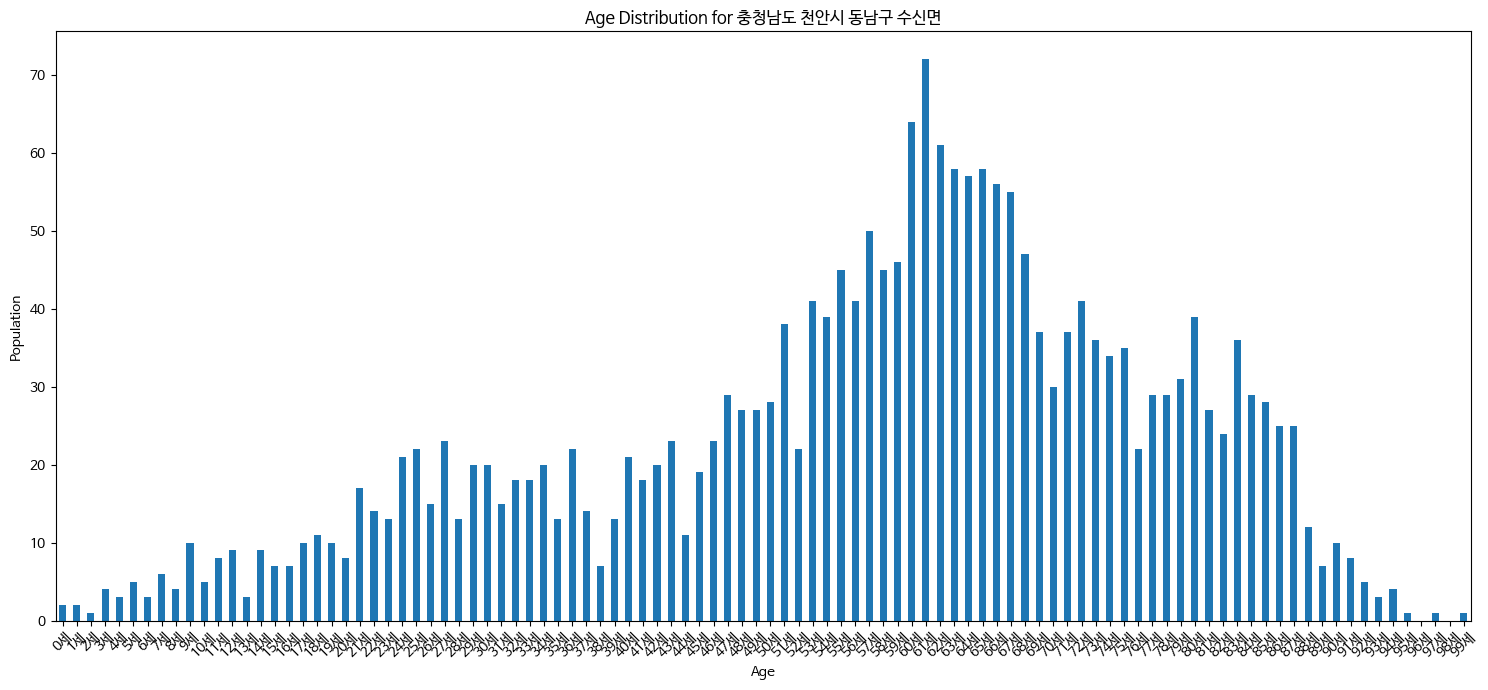

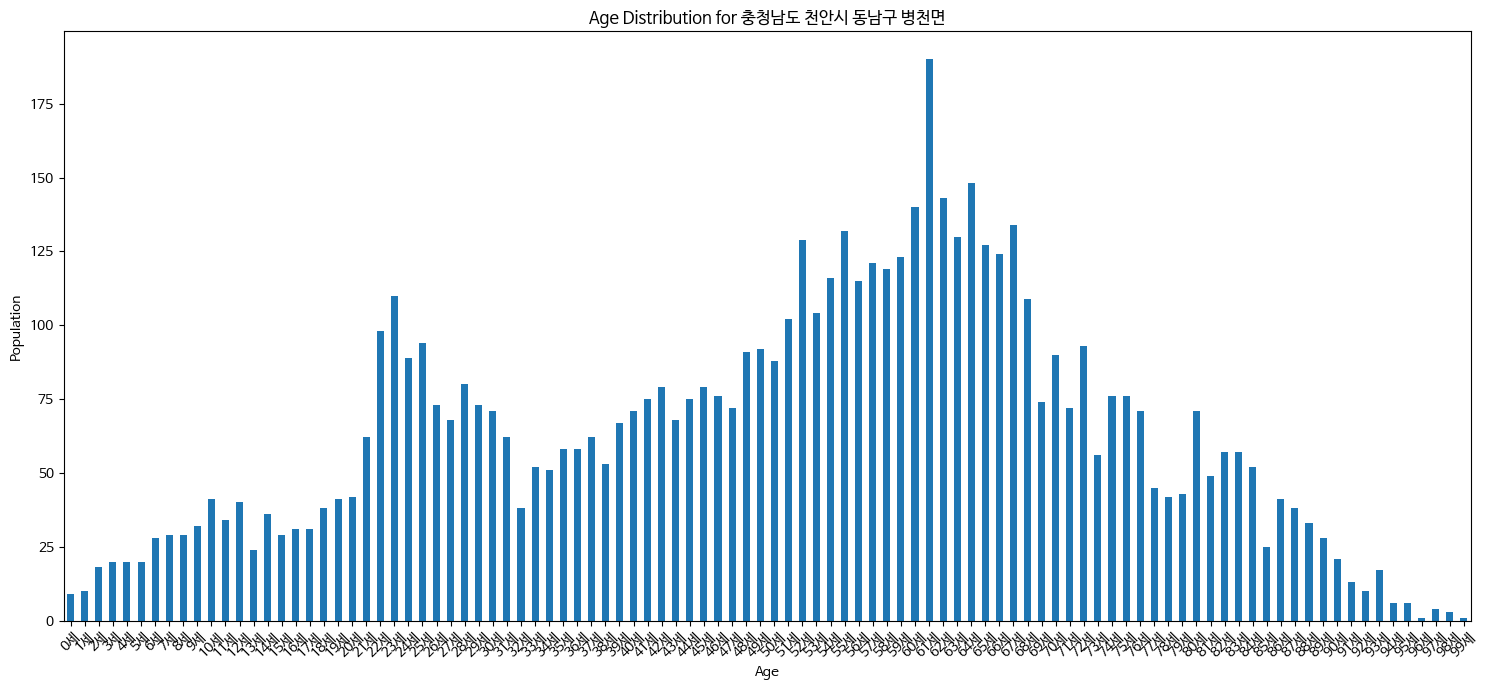

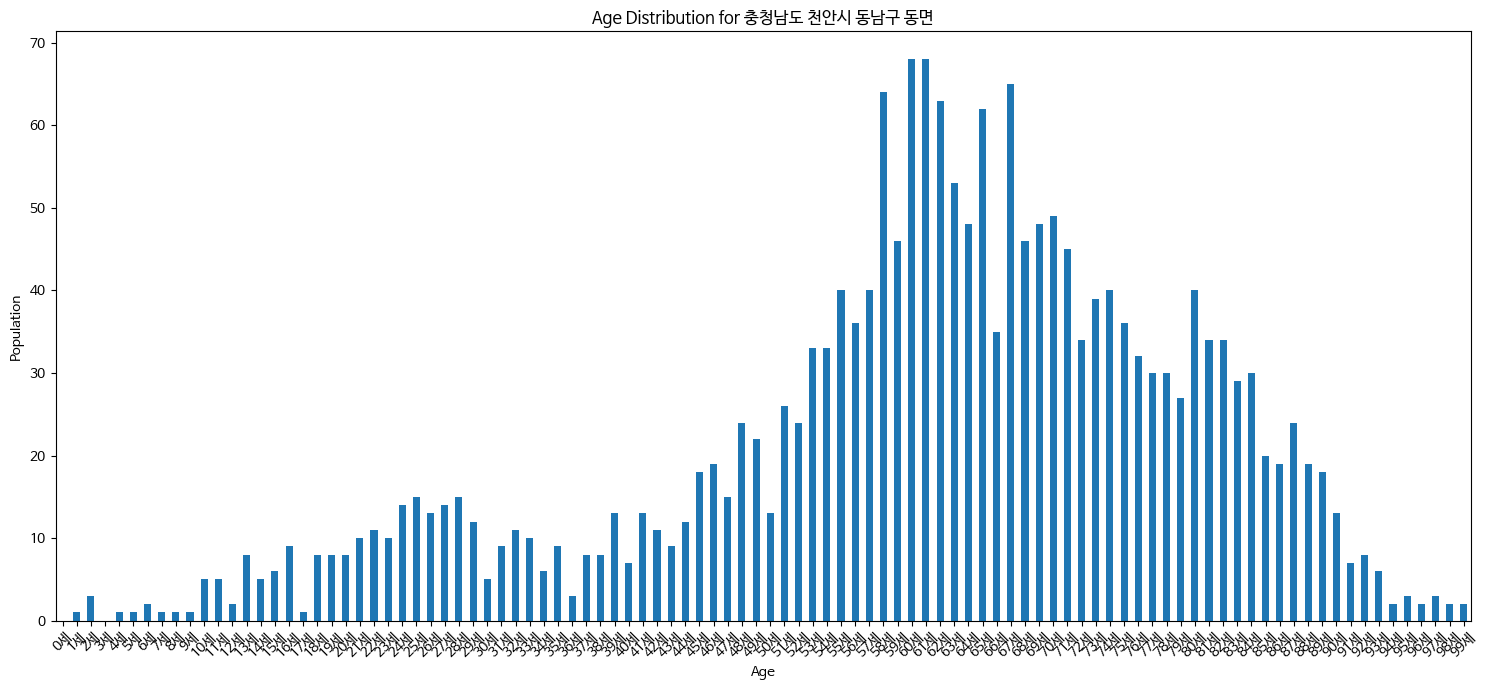

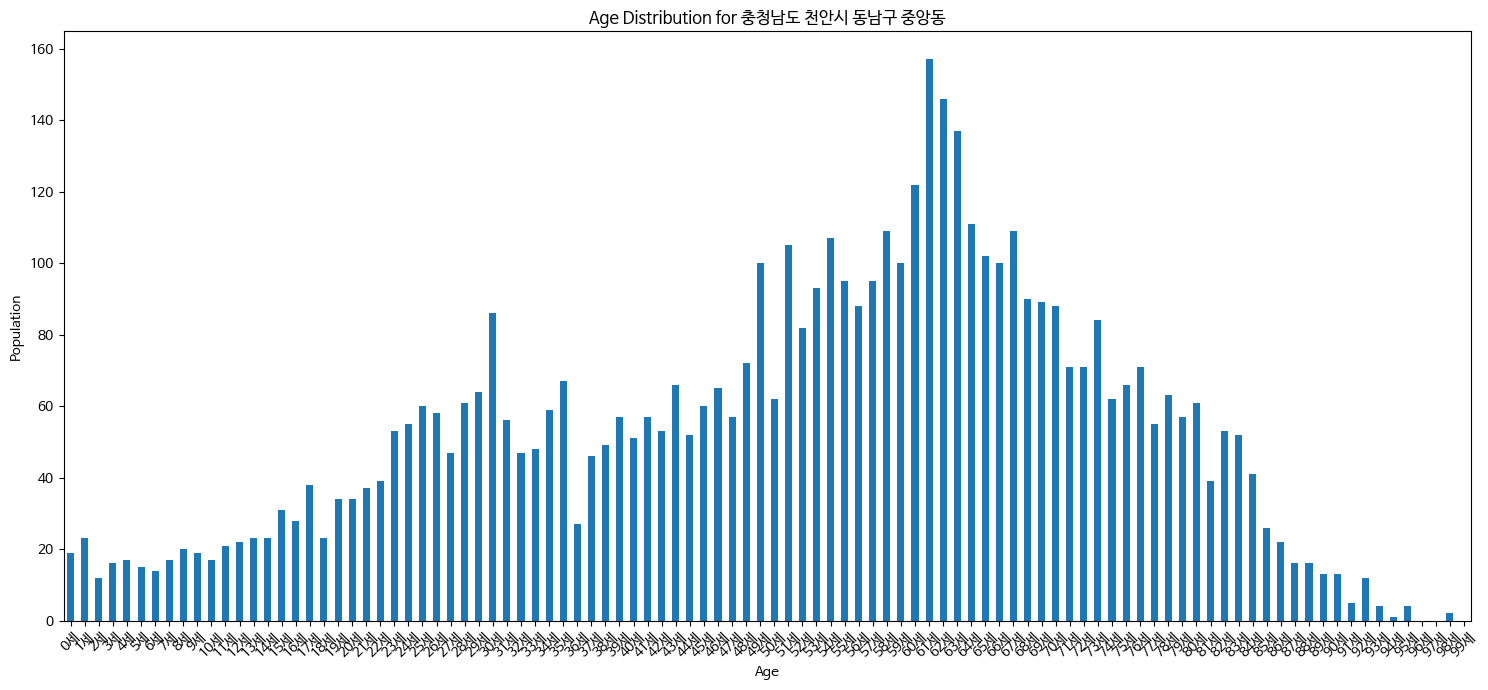

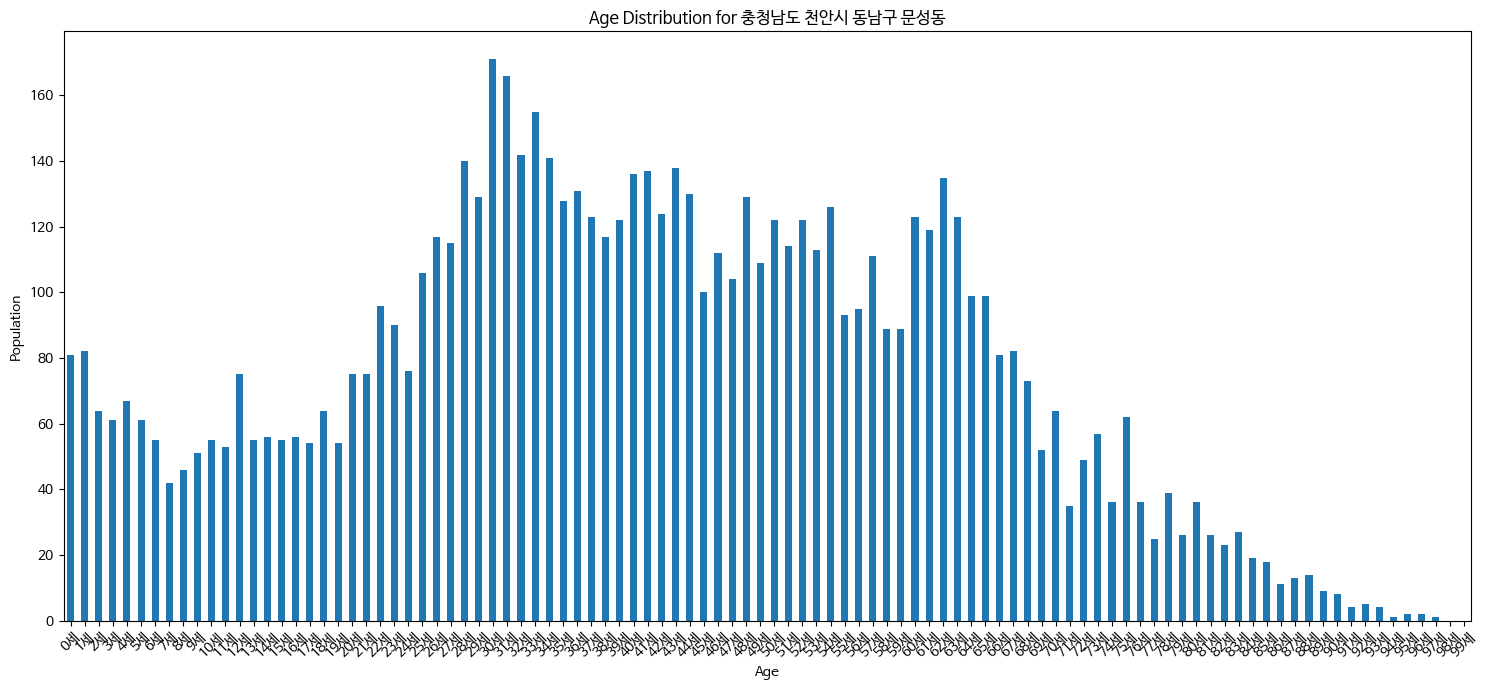

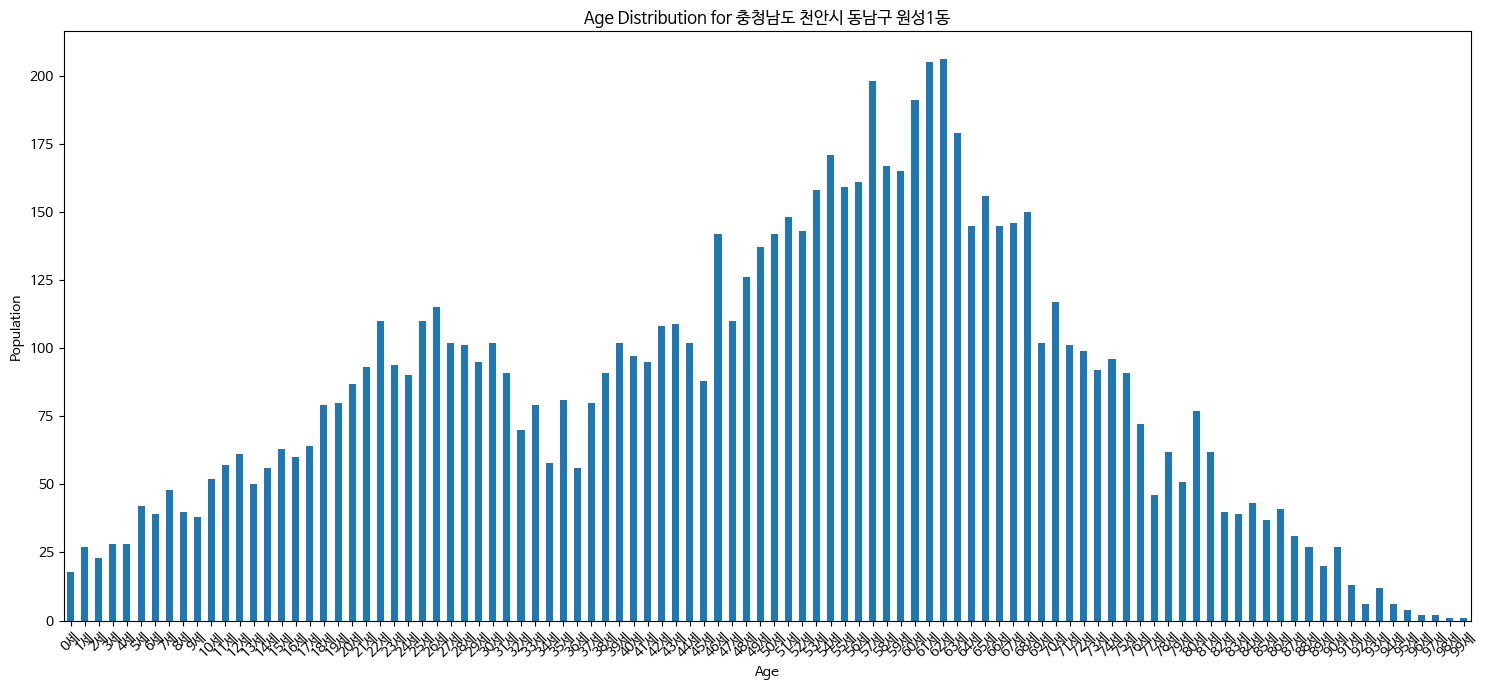

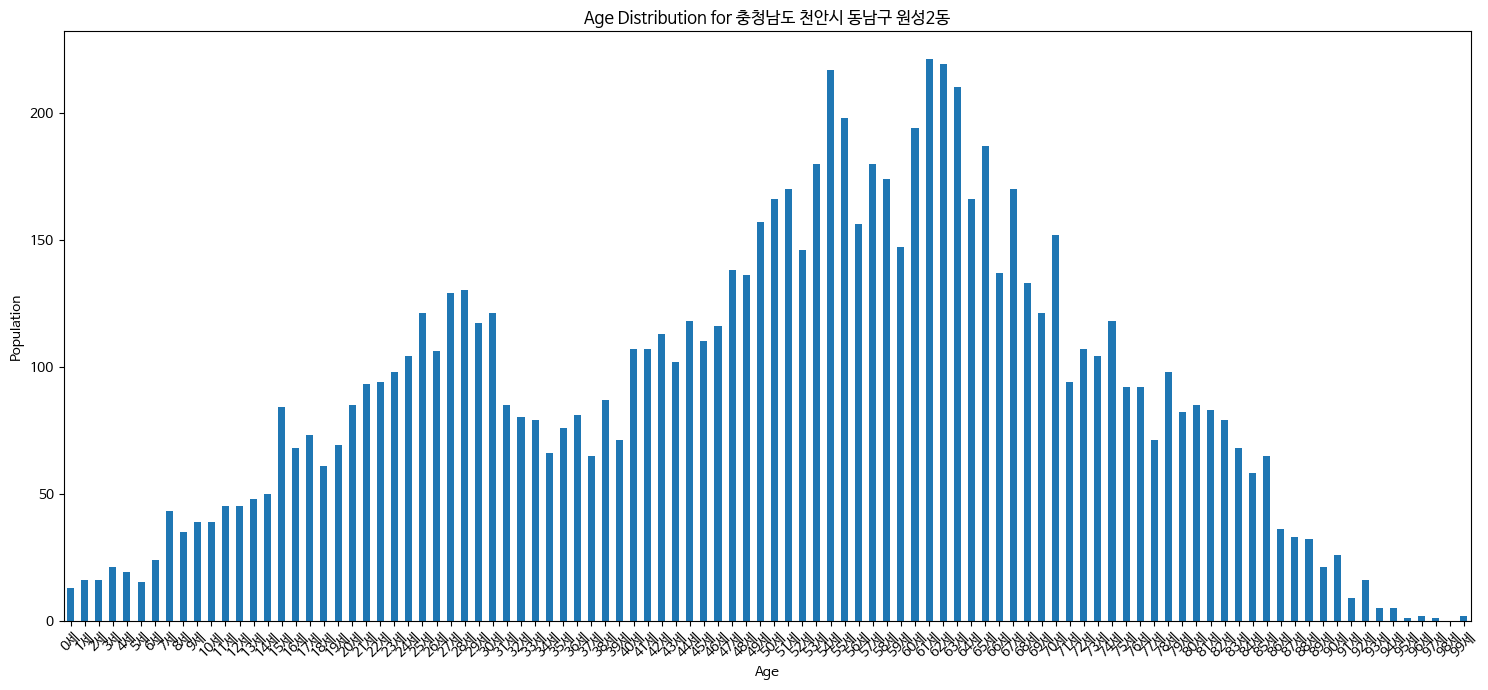

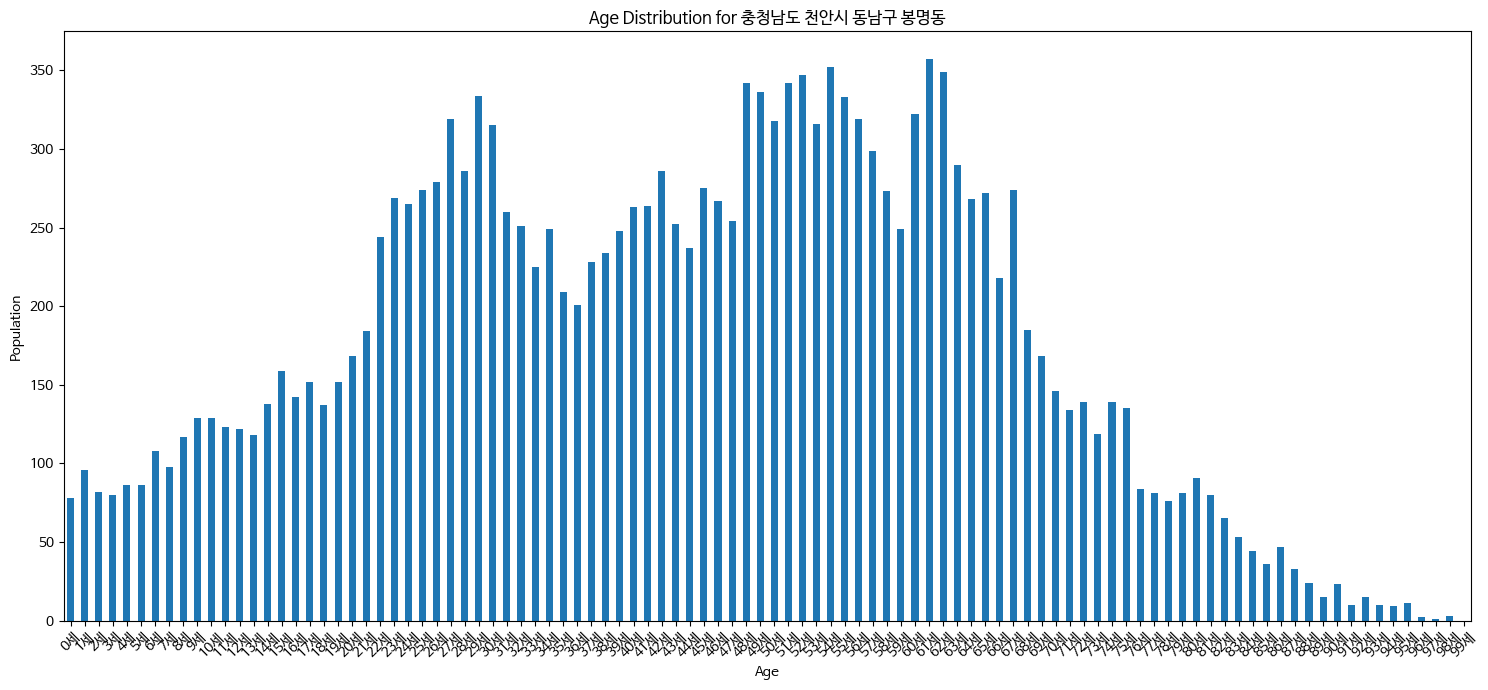

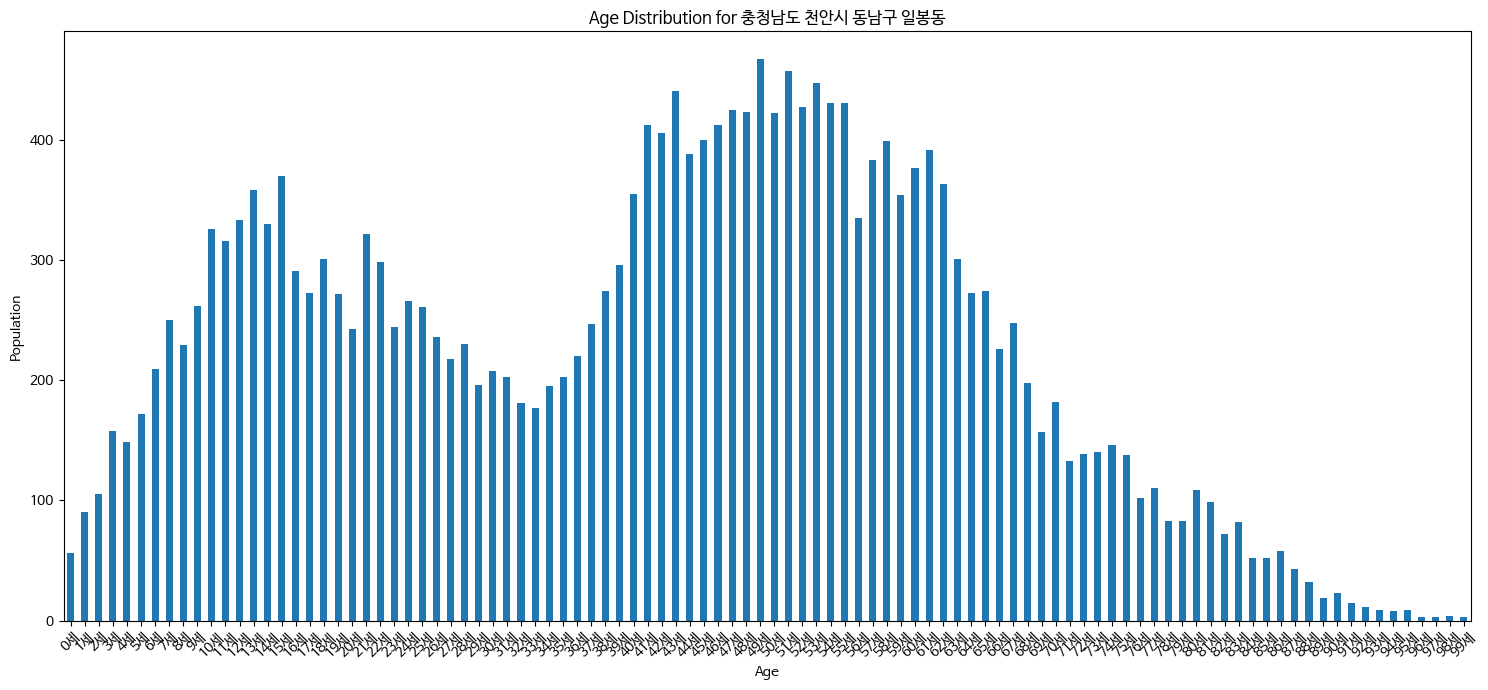

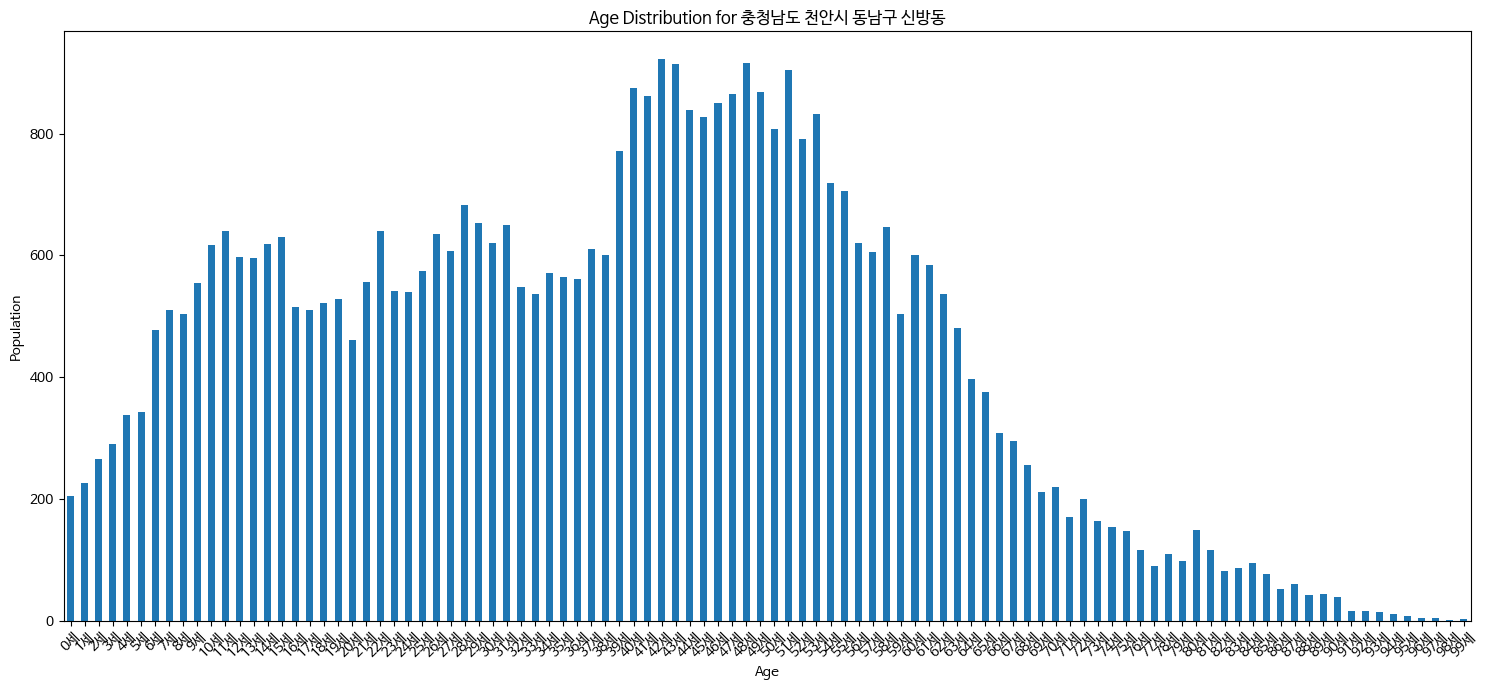

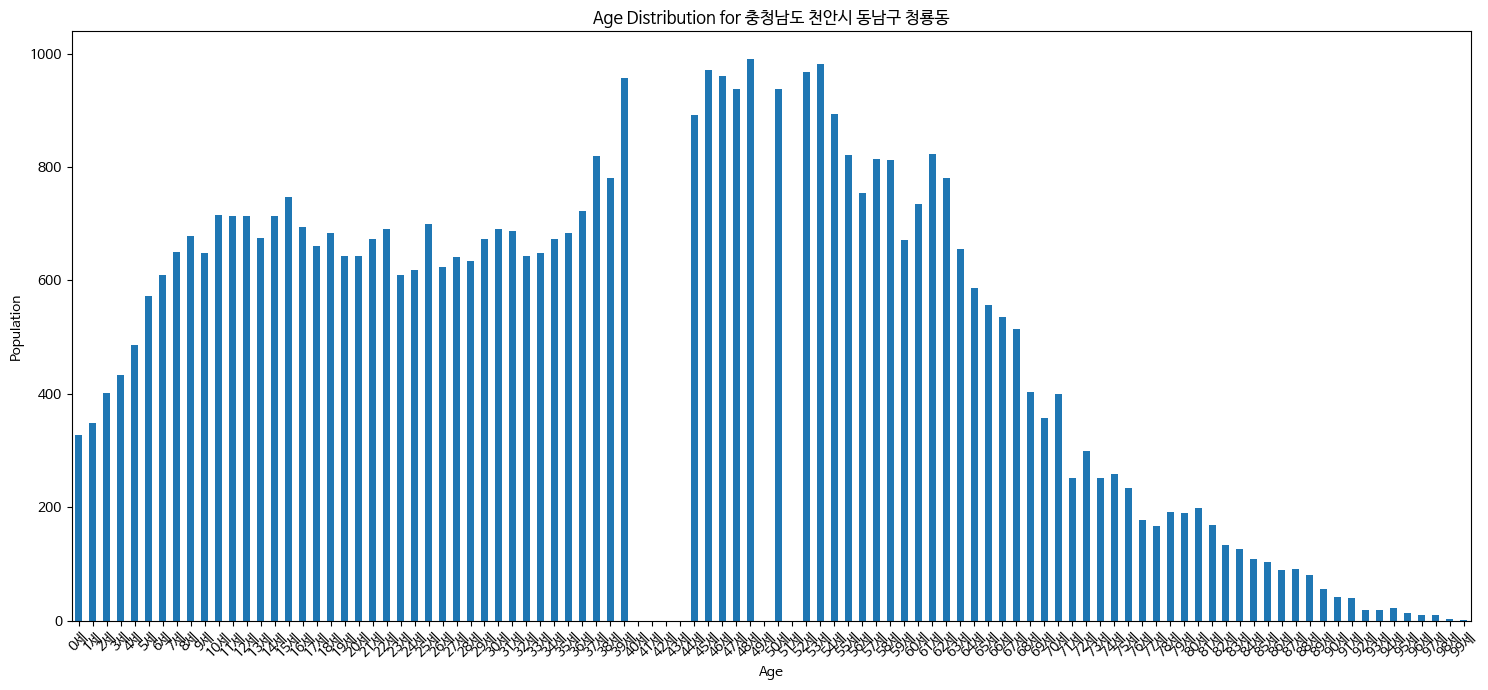

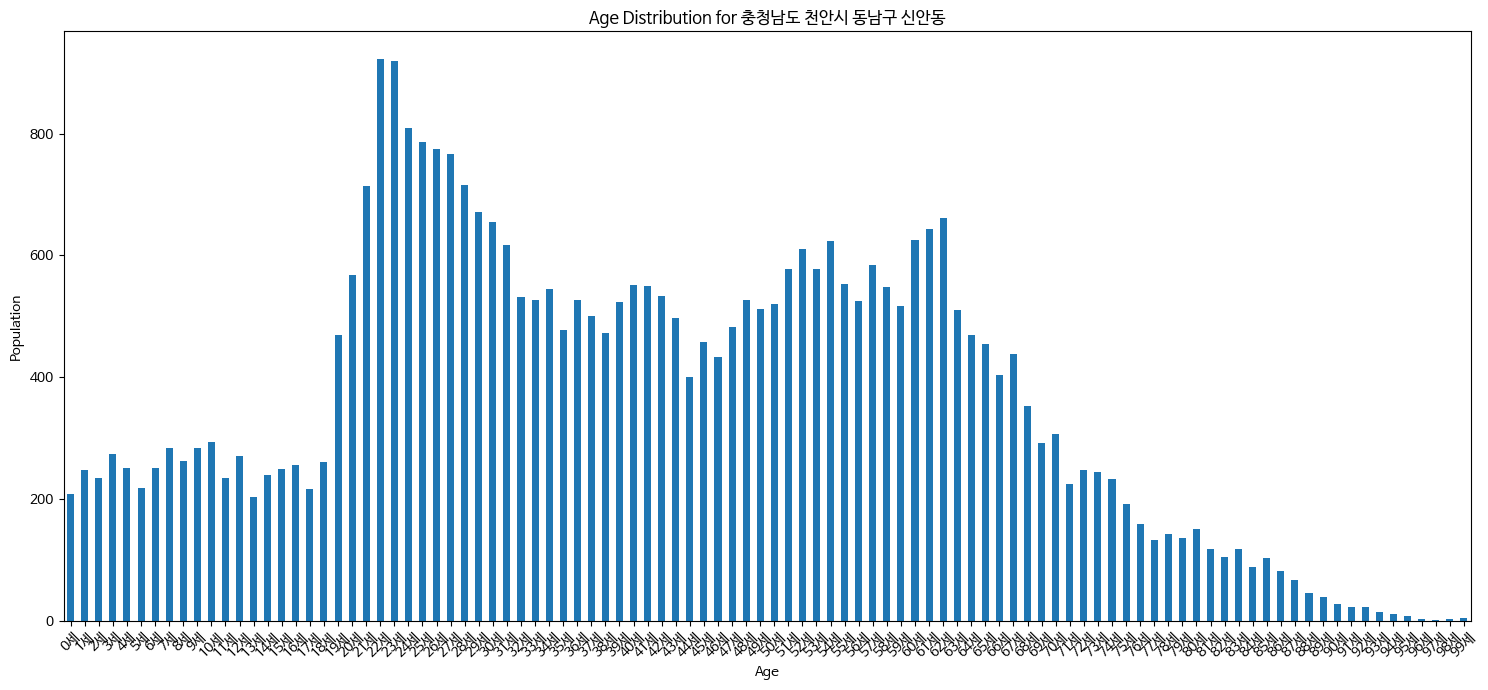

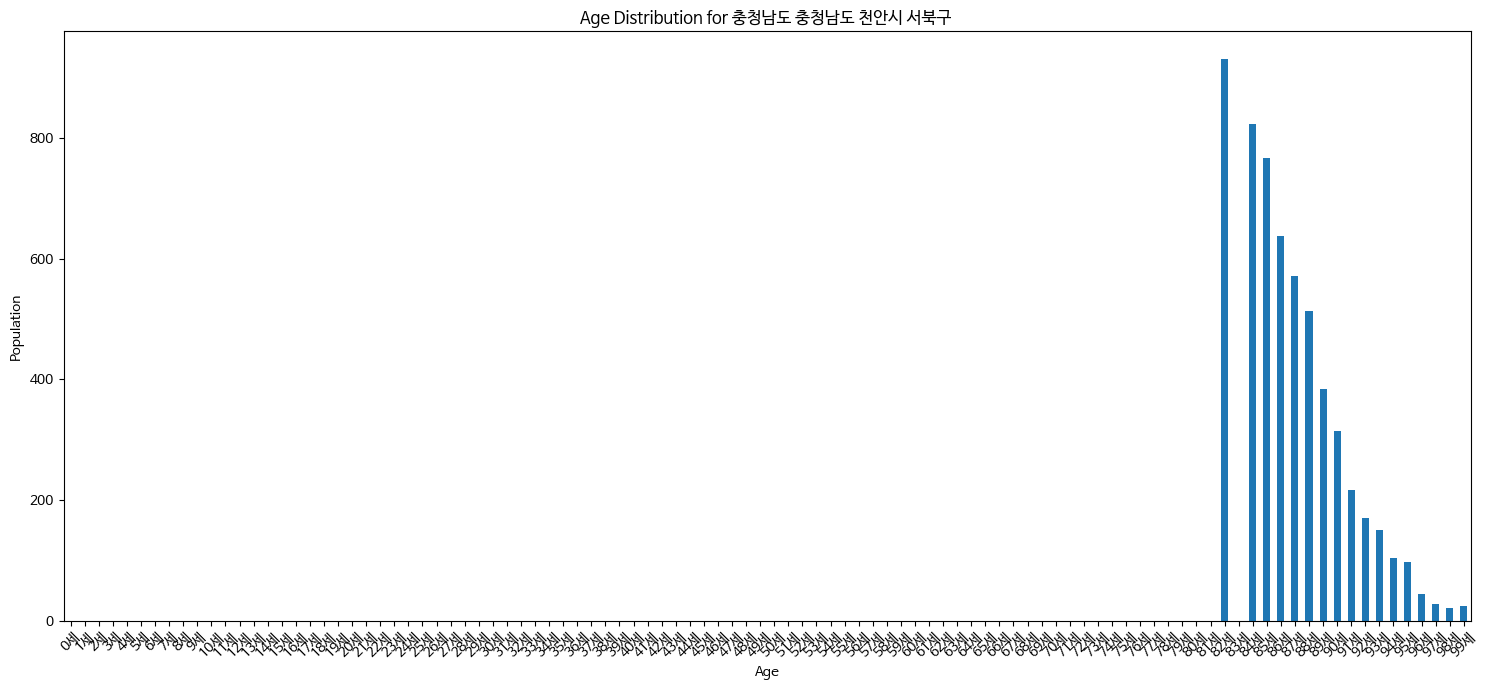

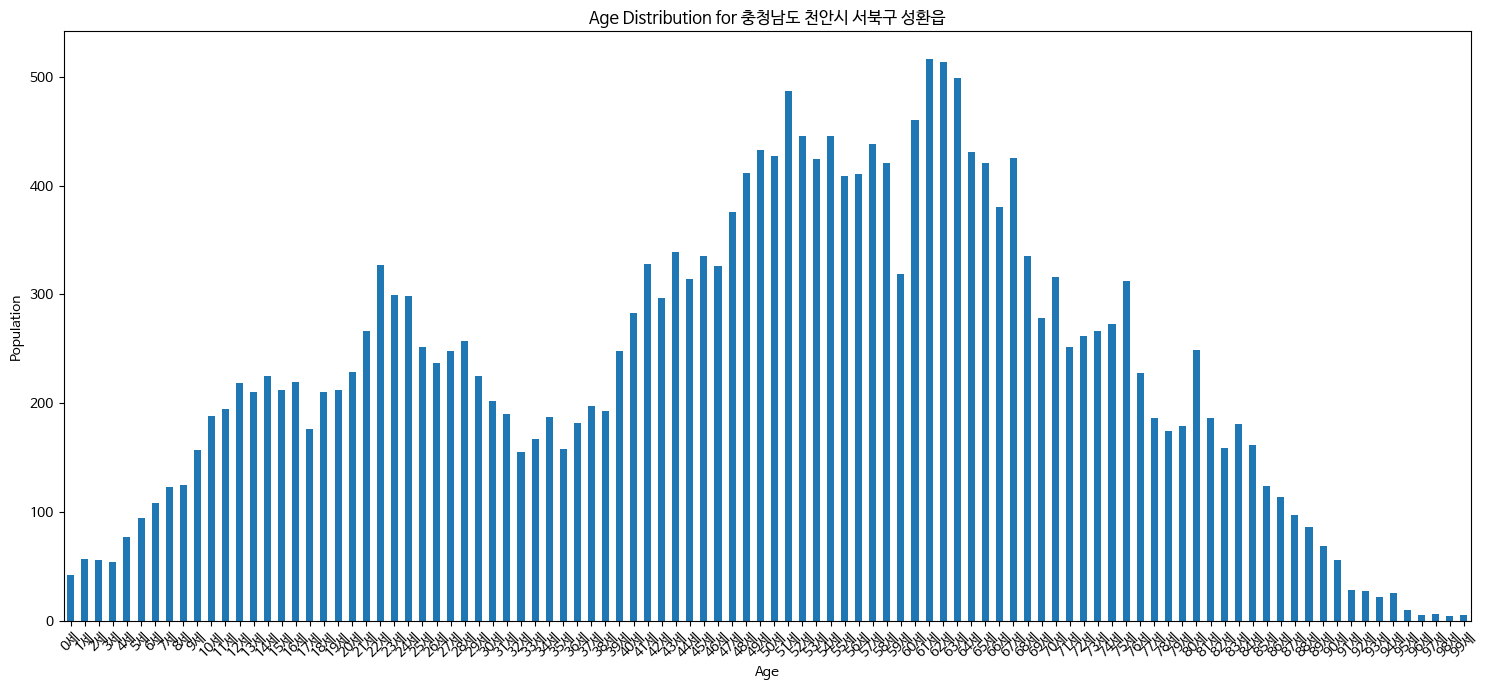

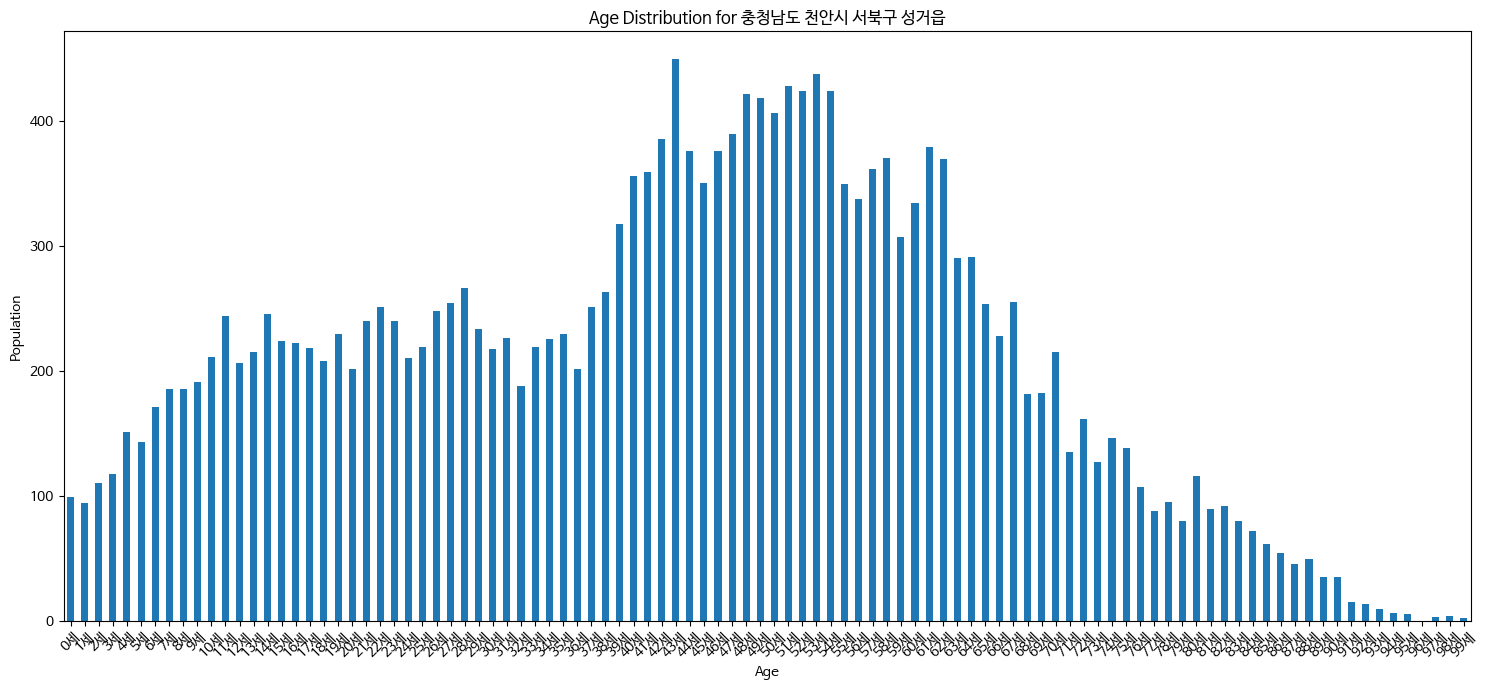

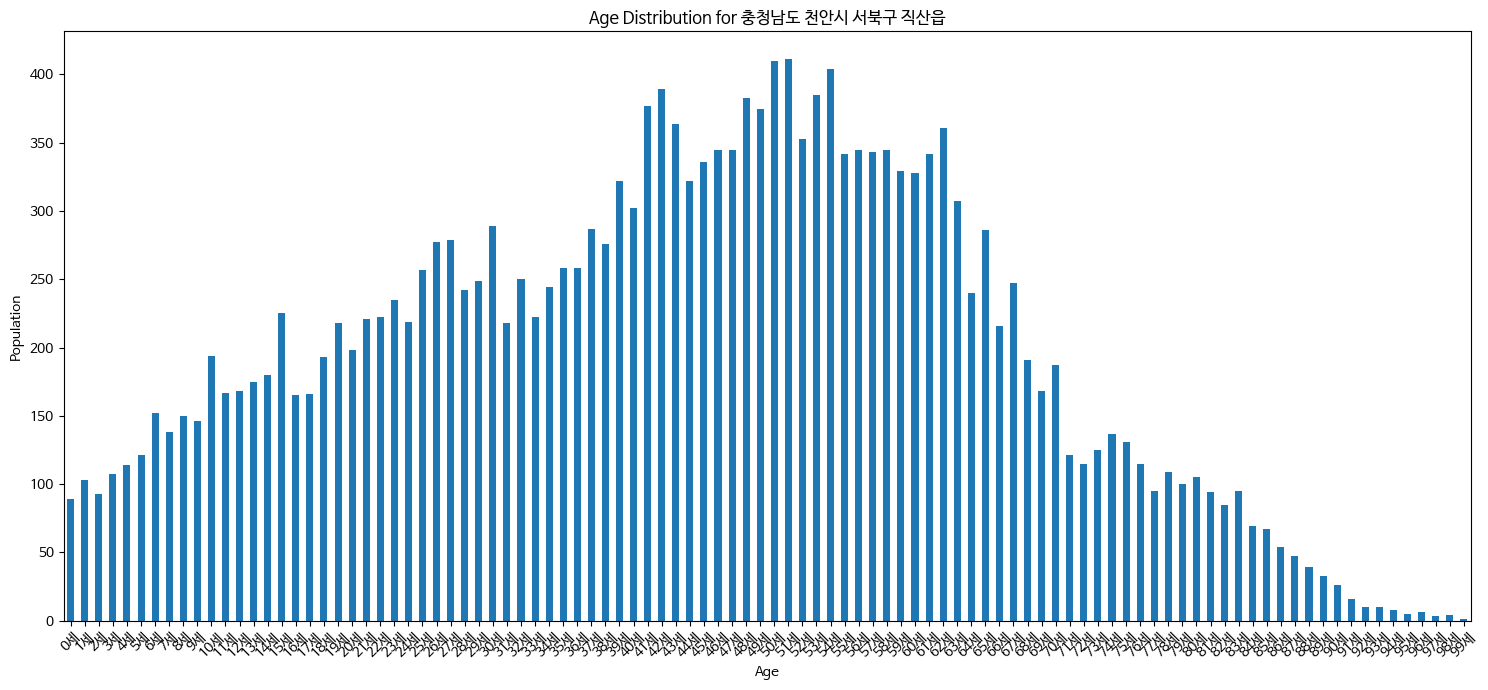

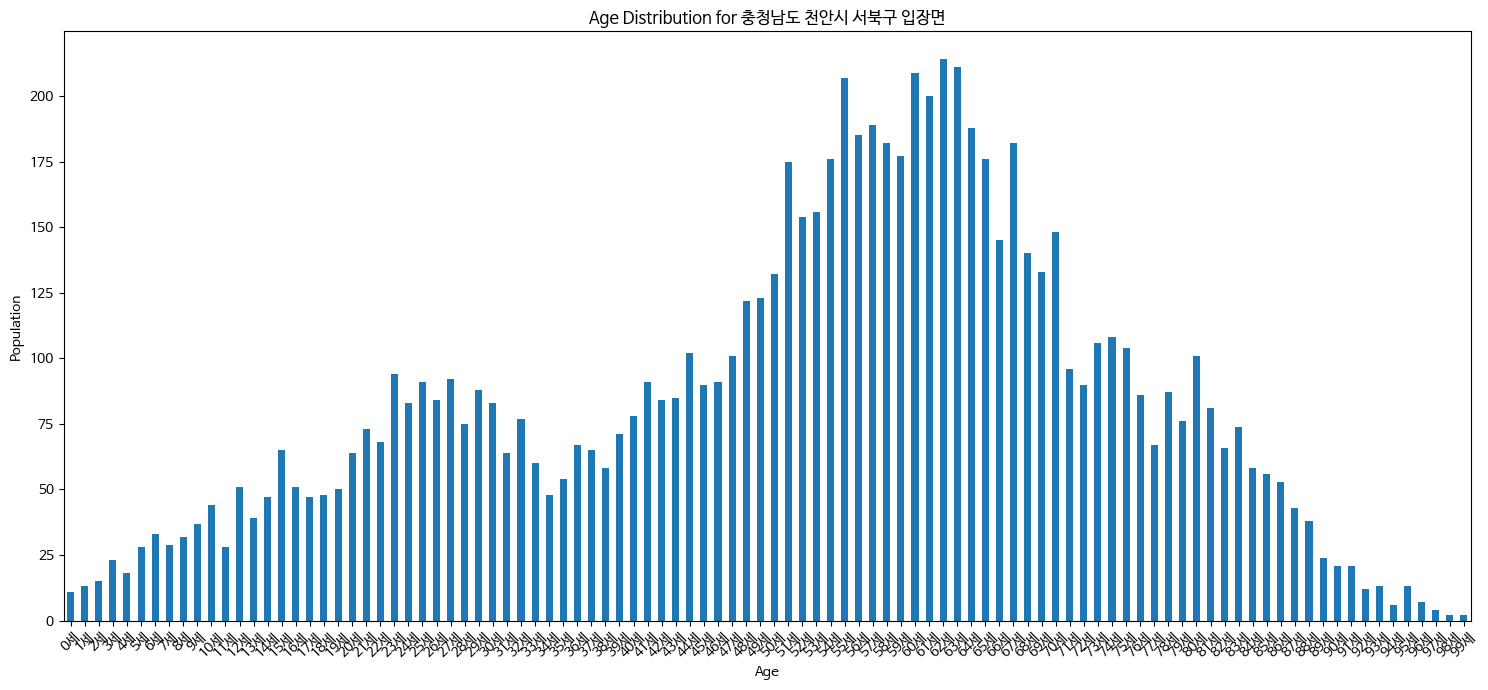

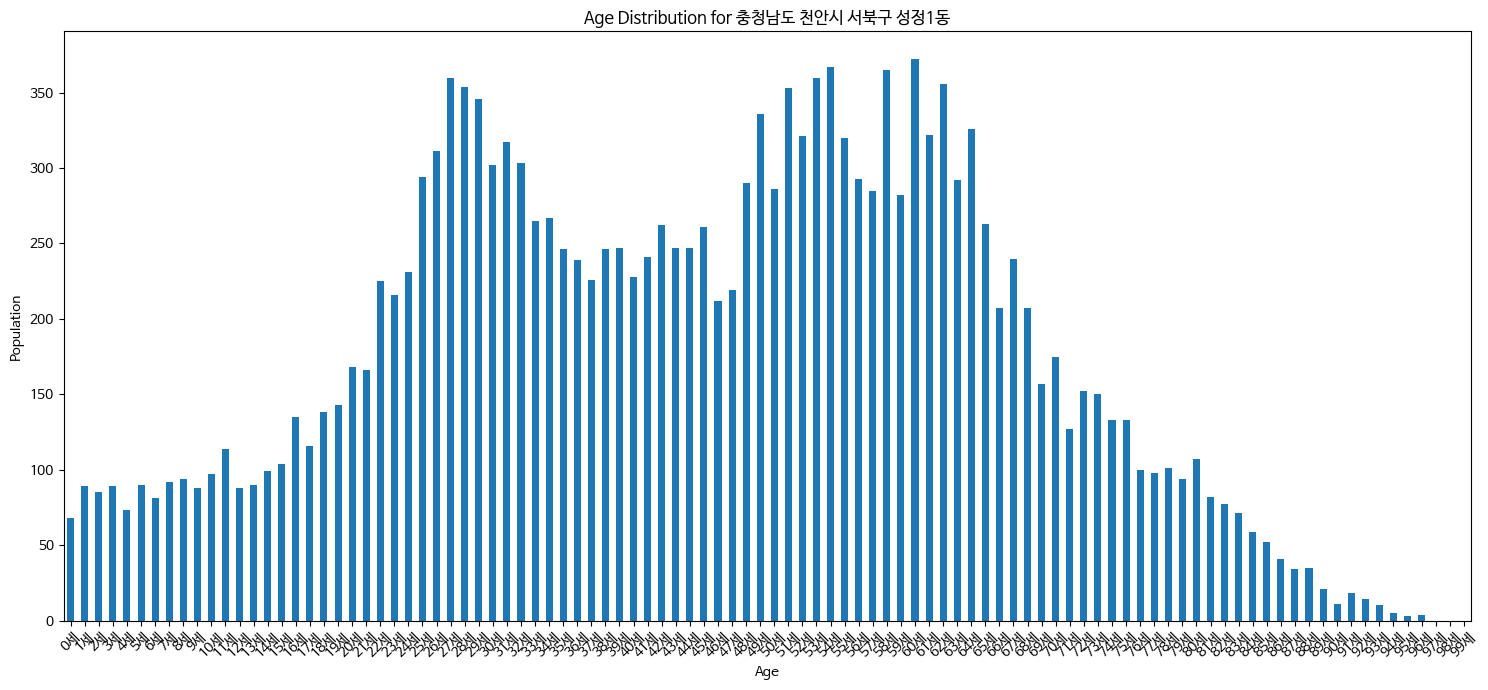

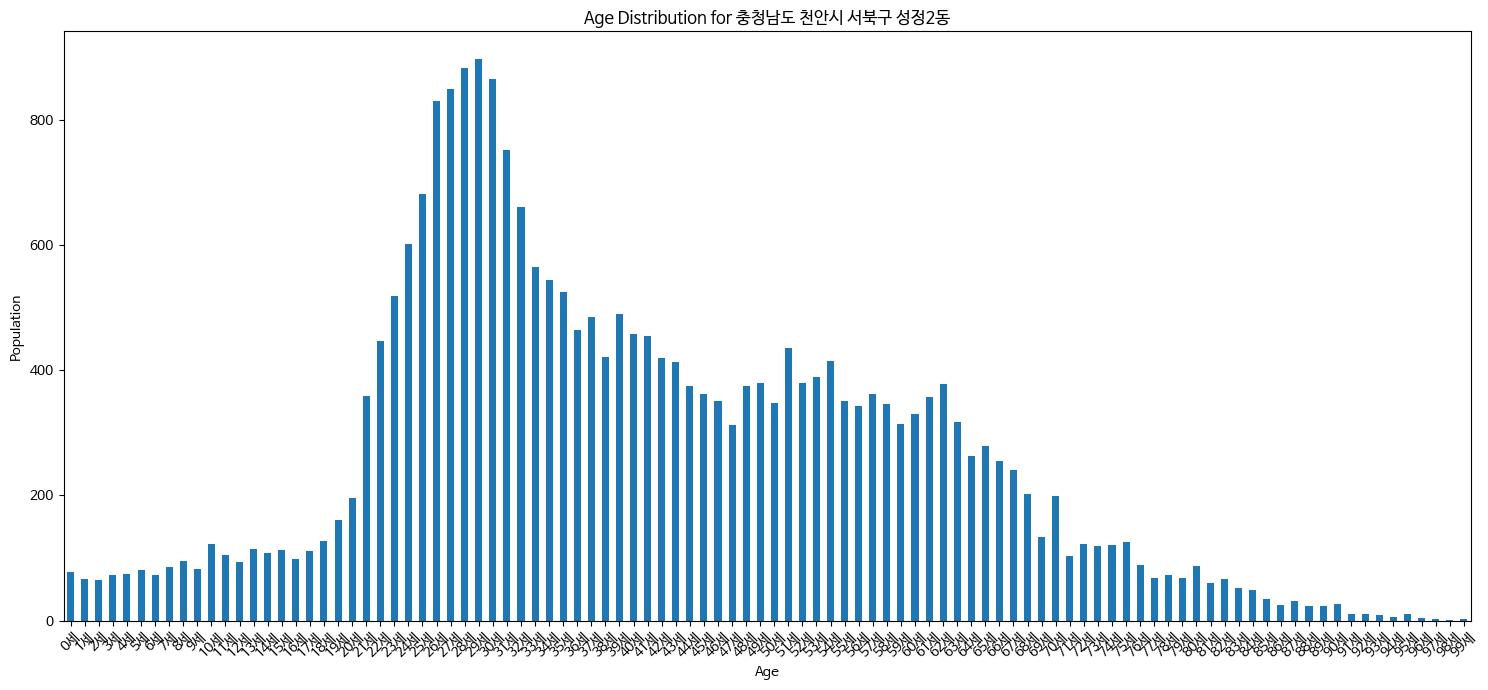

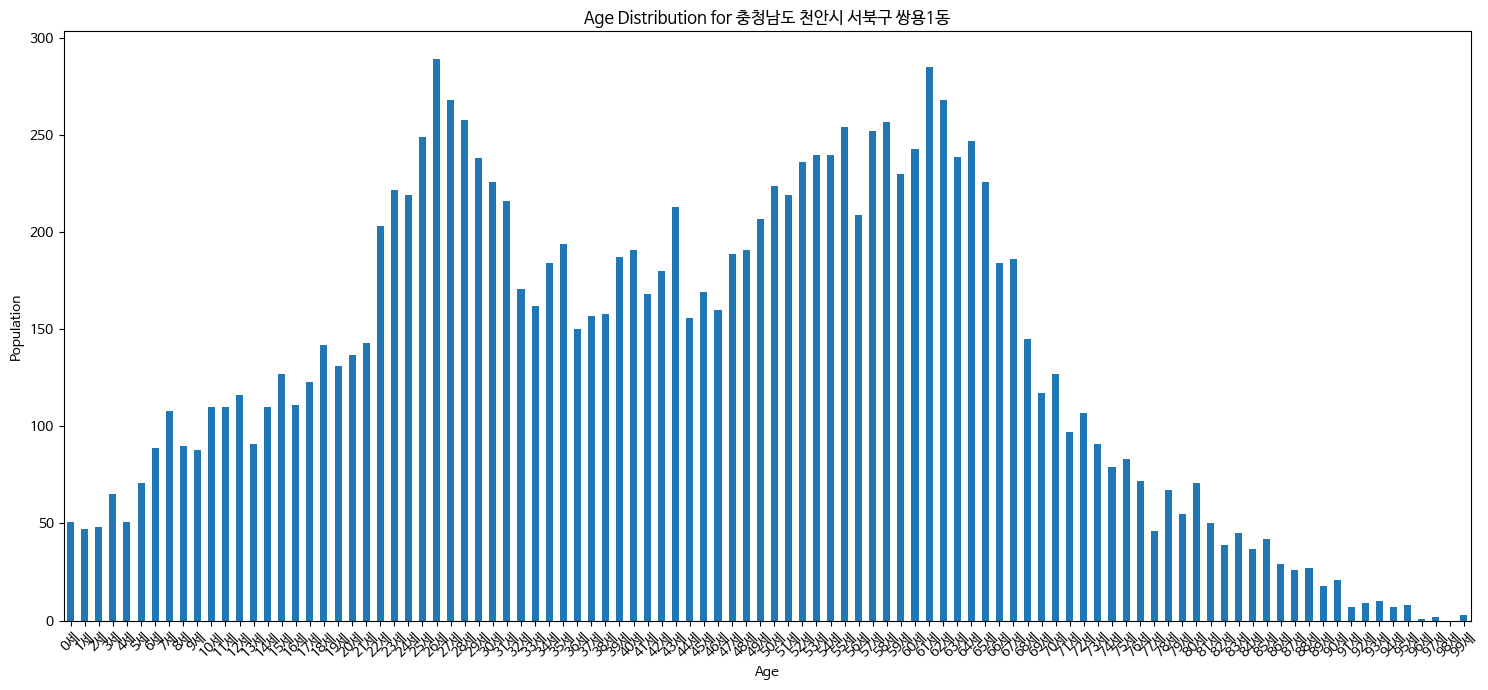

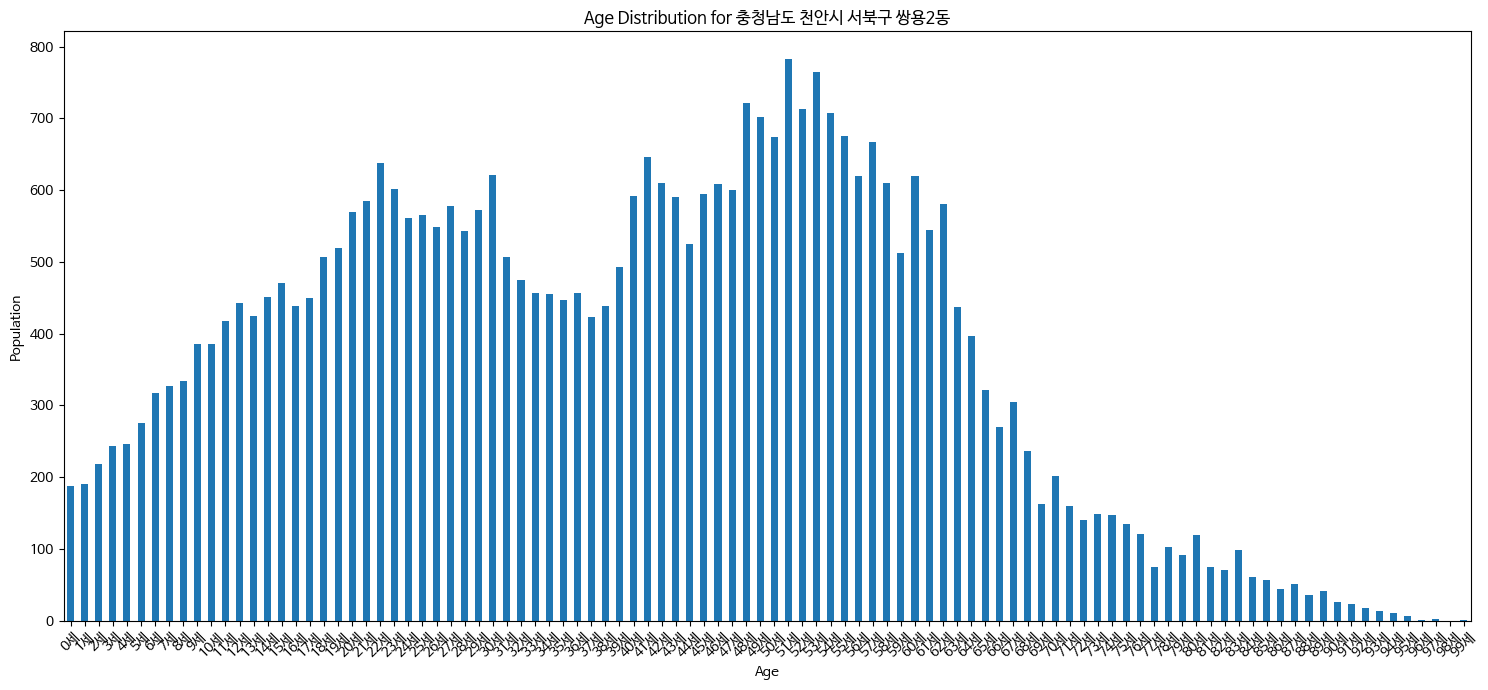

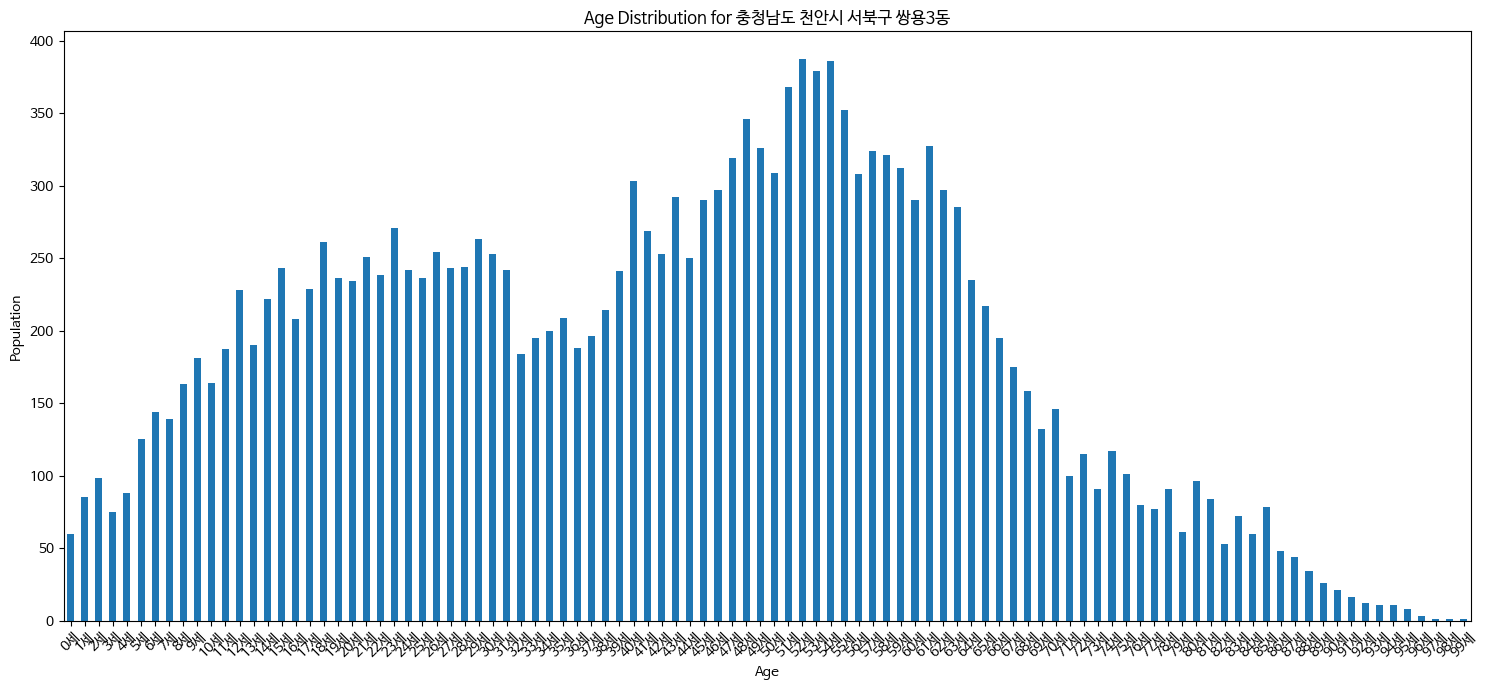

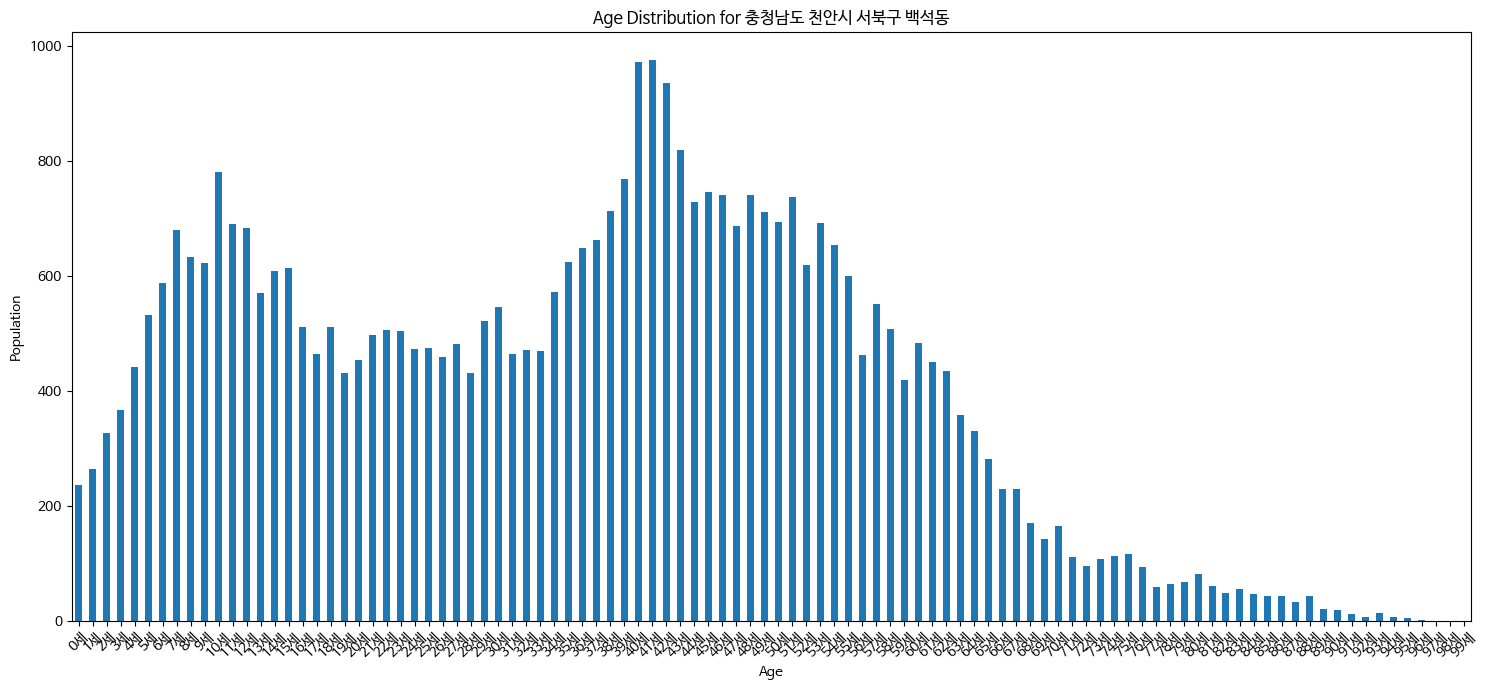

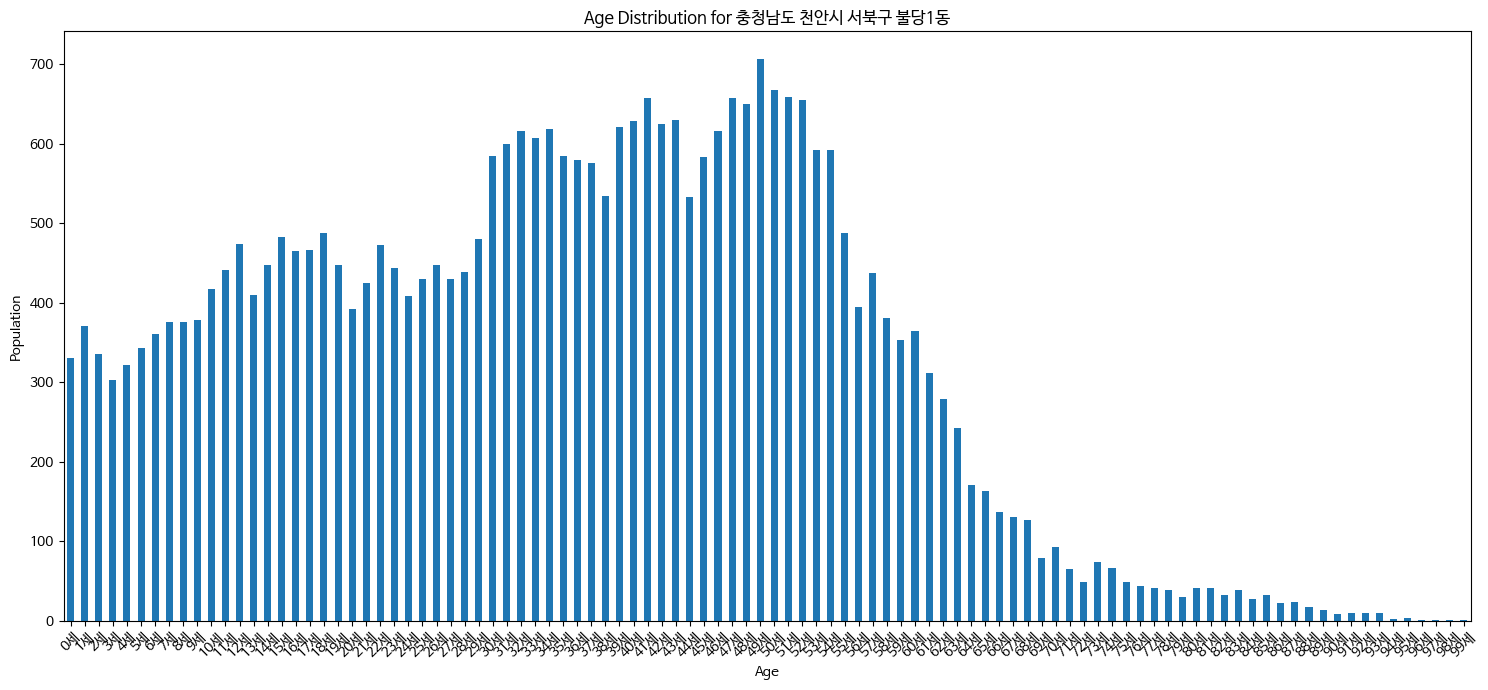

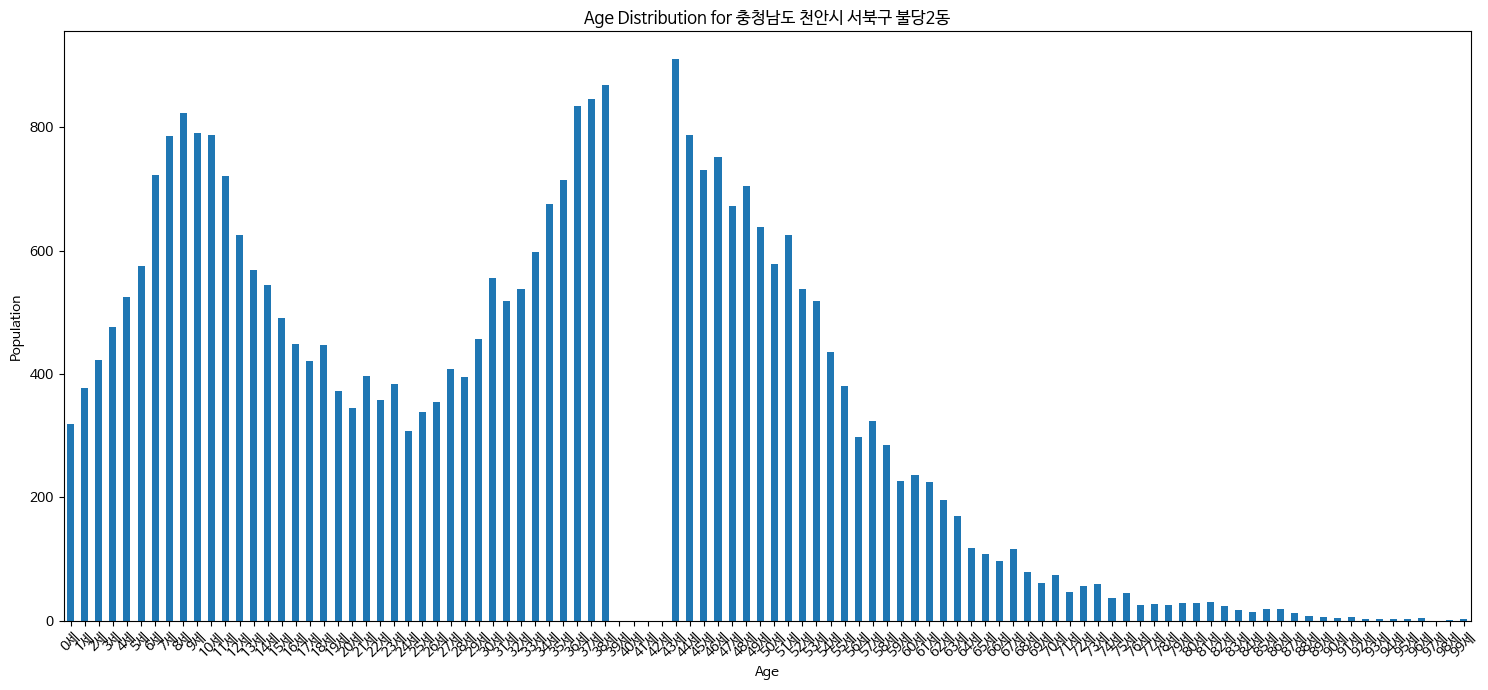

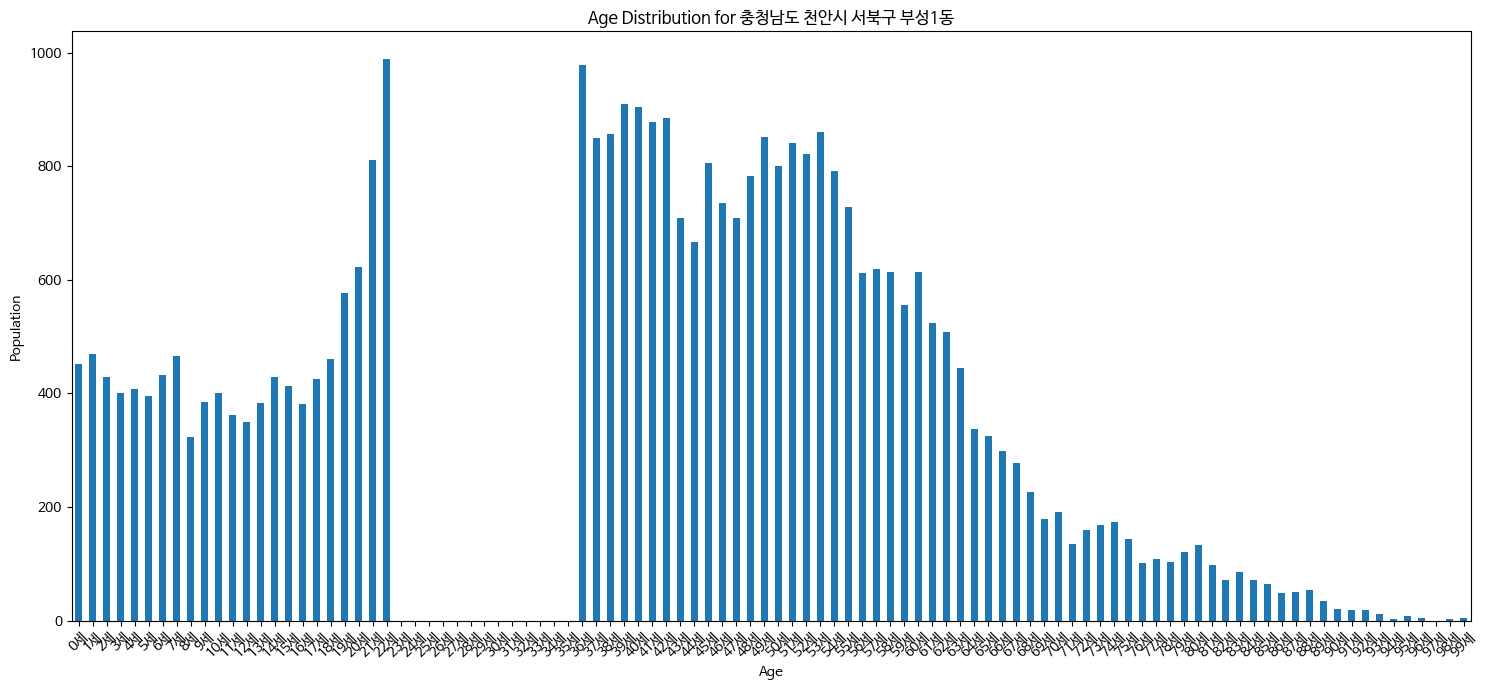

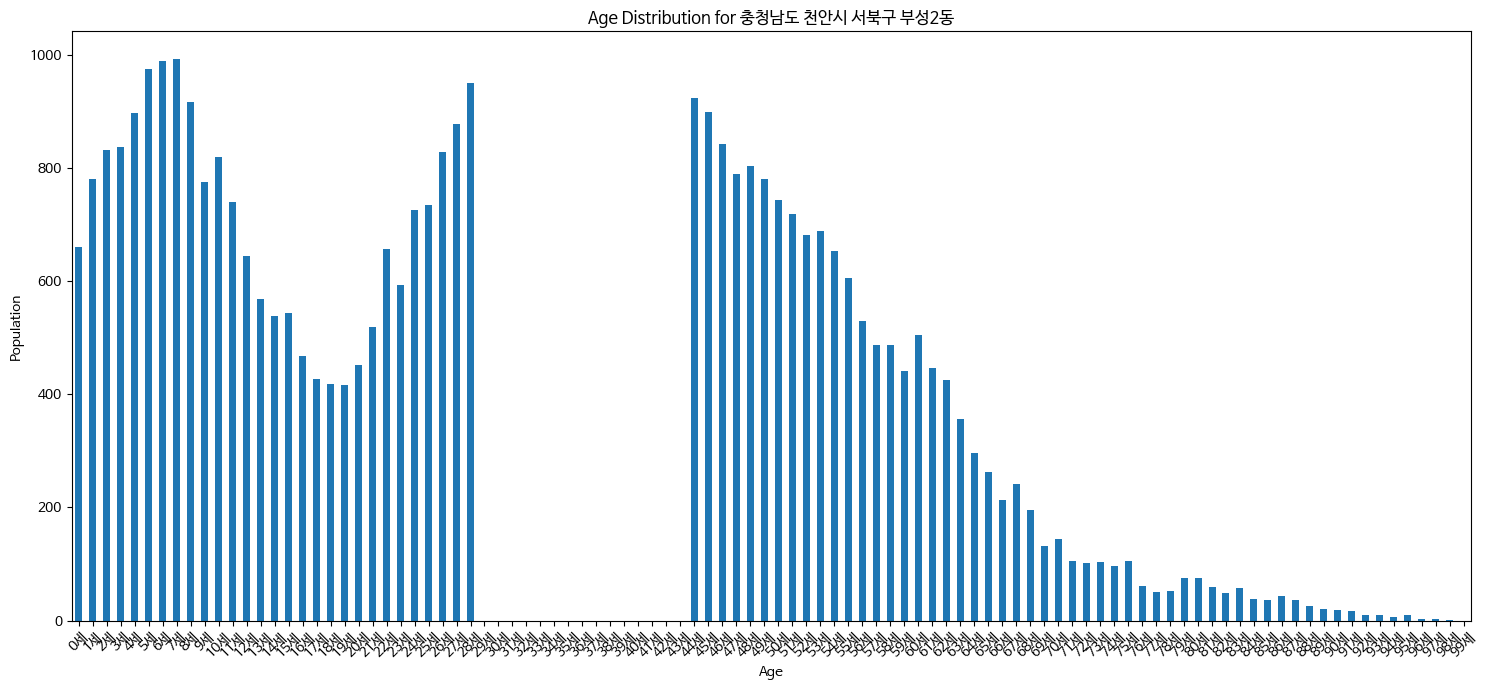

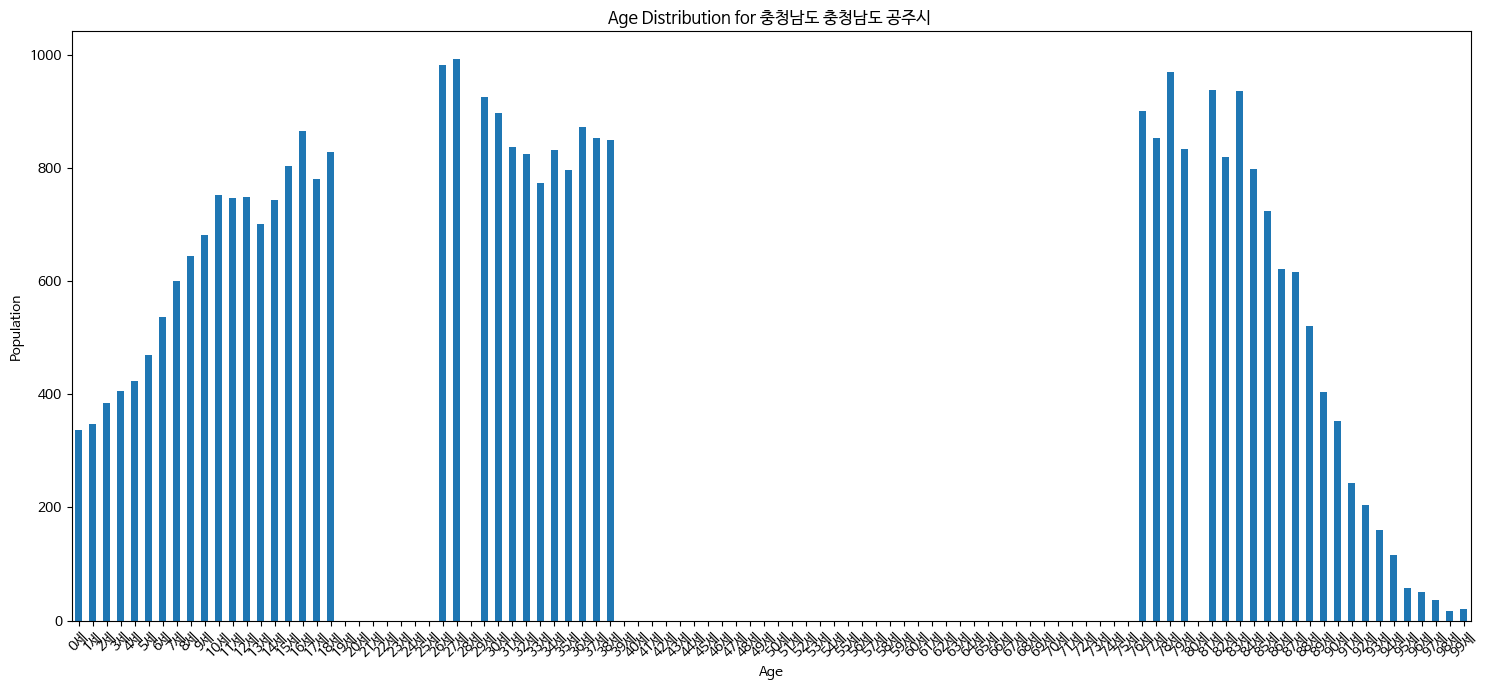

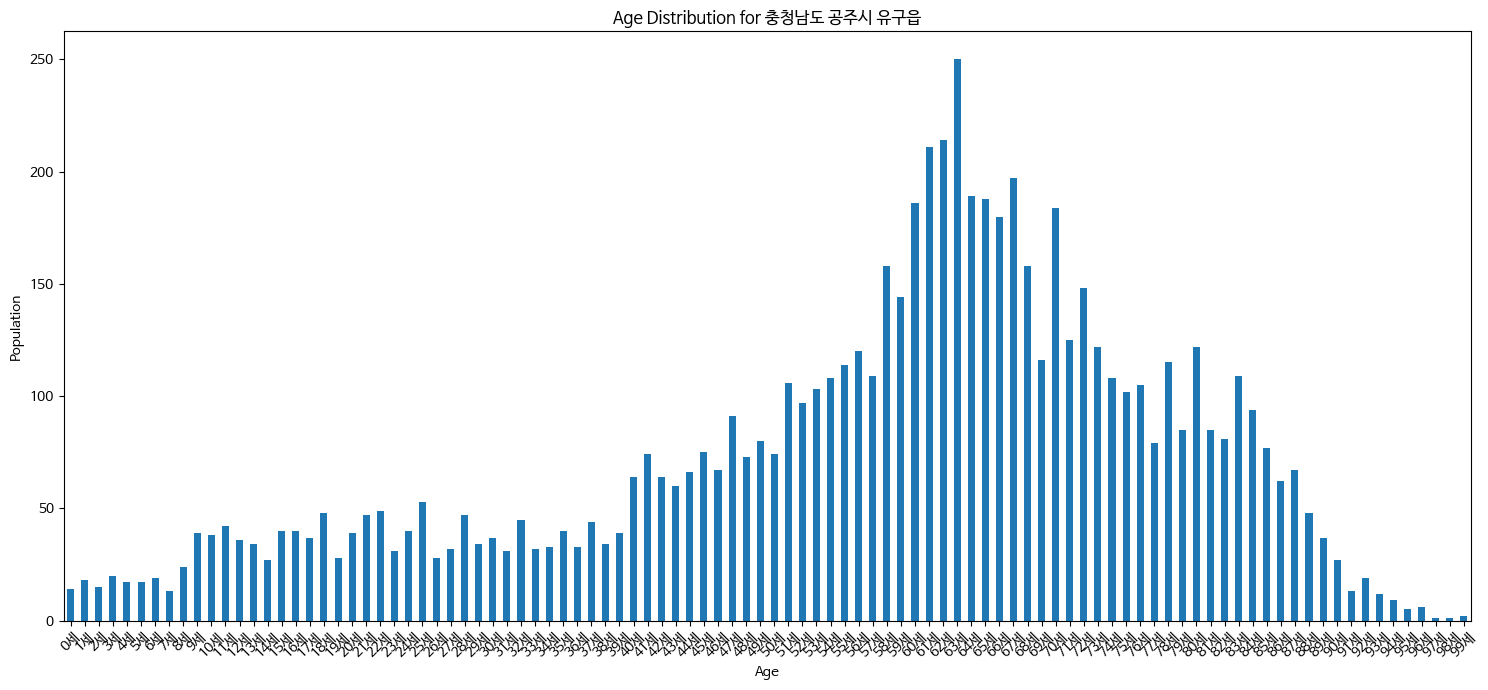

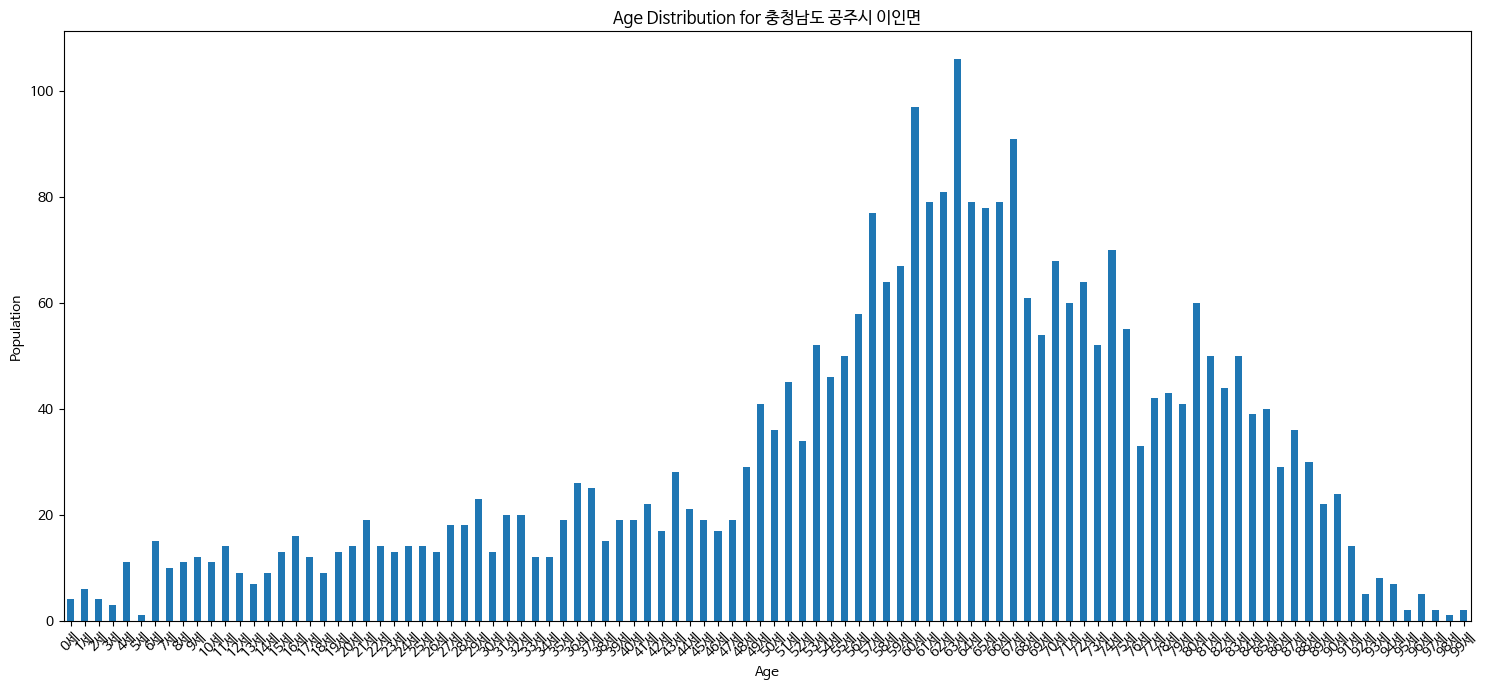

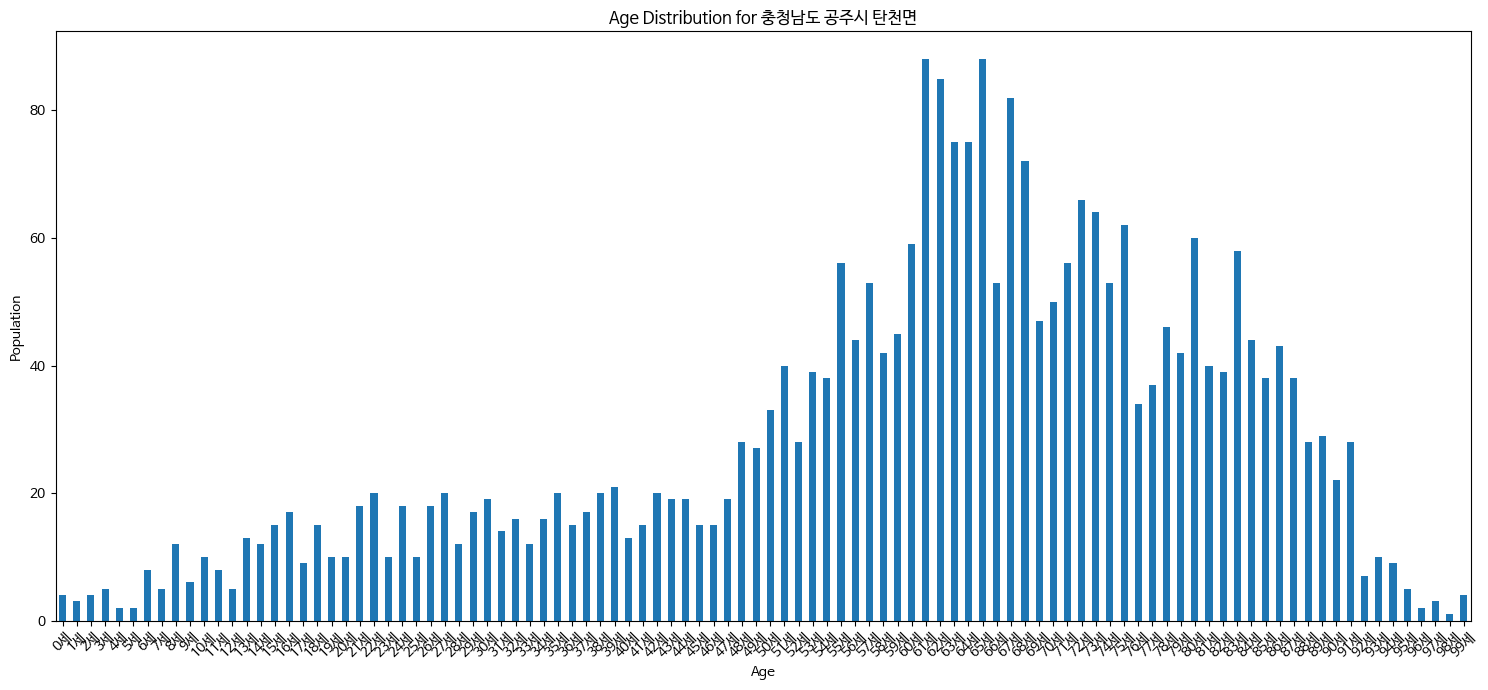

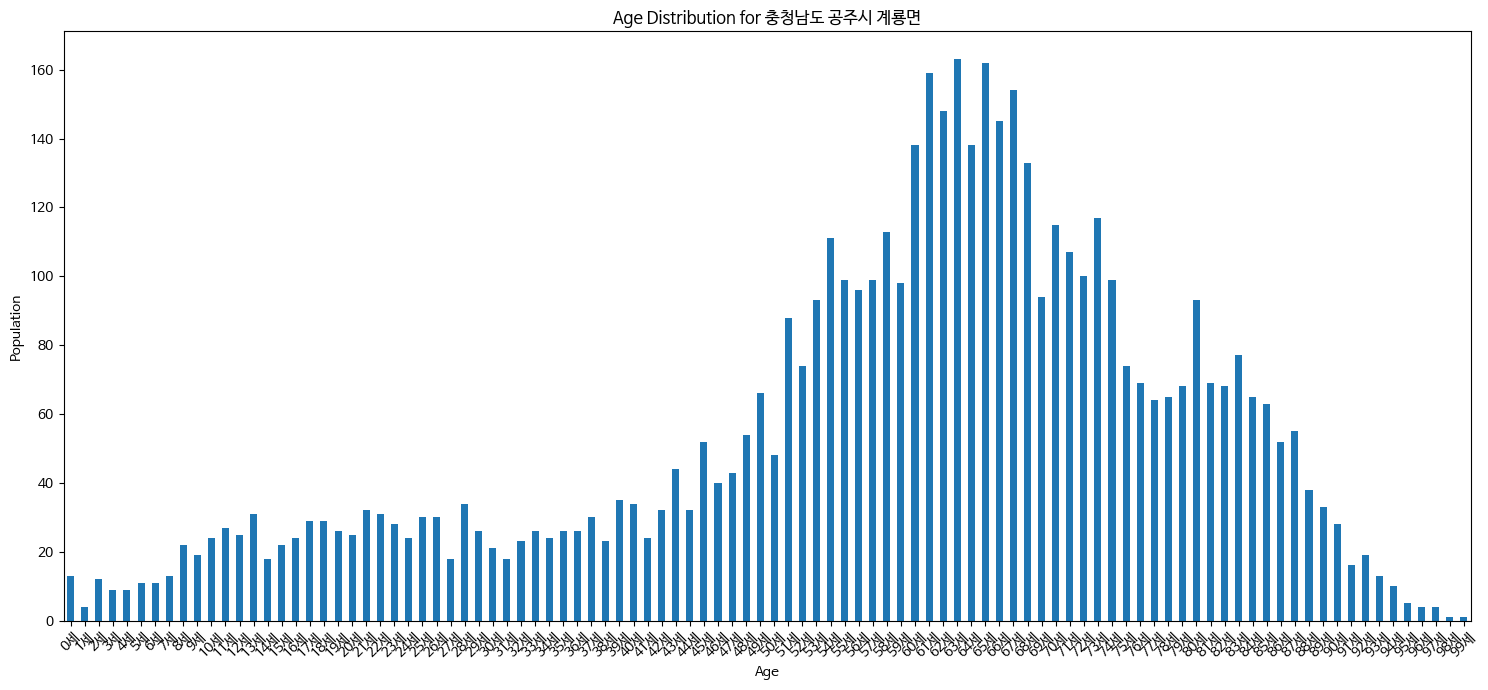

In [ ]:
df = pd.read_csv(dfs_path+dfs[0])

age_columns = df.columns[4:-1]
df[age_columns] = df[age_columns].apply(pd.to_numeric, errors='coerce').fillna(0)


# Extract the unique sub-regions
subregions = df['행정기관'].unique()

# Loop through each sub-region and plot the age distribution
for subregion in subregions:
    subregion_df = df[df['행정기관'] == subregion]
    subregion_data = subregion_df[age_columns].sum()

    # Plotting
    plt.figure(figsize=(15, 7))
    subregion_data.plot(kind='bar')
    plt.title(f"Age Distribution for {subregion}")
    plt.ylabel('Population')
    plt.xlabel('Age')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [199]:
def check_age_distribution(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Extract age columns
    age_columns = df.columns[4:-1]

    discrepancies = []

    # For each row in the DataFrame, check if the sum of age columns matches 연령구간인구수
    for index, row in df.iterrows():
        if row[age_columns].sum() != row['연령구간인구수']:
            discrepancies.append(row['행정기관'])

    return discrepancies

# Check for the provided 서울_2018.csv file
seoul_2018_discrepancies = check_age_distribution(data_dir+dfs[0])


TypeError: ignored

In [ ]:
def verify_age_distribution(data_dir=dfs_path):
    inconsistencies = {}

    for file_name, df in dfs_dict.items():
        inconsistent_subregions = []

        # Iterate over each row
        for index, row in df.iterrows():
            total_population = row['총 인구수']
            age_group_population = row['연령구간인구수']
            age_columns =
            df[age_columns] = df[age_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

            # Check if the populations match
            if total_population != age_group_population:
                inconsistent_subregions.append(row['행정기관'])

        if inconsistent_subregions:
            inconsistencies[file_name] = inconsistent_subregions

    return inconsistencies

inconsistencies_found = verify_age_distribution()
inconsistencies_found


In [186]:
def plot_population_subregions(region, year, df):
    subregion_df = df[df['행정기관'].str.startswith(region)]
    subregion_df.set_index('행정기관')['총 인구수'].plot(kind='bar', figsize=(15, 7))
    plt.title(f"Population of Sub-regions in {region} for {year}")
    plt.ylabel("Population")
    plt.xlabel("Sub-region")
    plt.xticks(rotation=45)
    plt.show()

def plot_population_years(subregion, dfs):
    years = []
    populations = []
    for year, df in dfs.items():
        population = df[df['행정기관'] == subregion]['총 인구수'].sum()
        years.append(year)
        populations.append(population)
    plt.figure(figsize=(15, 7))
    plt.bar(years, populations)
    plt.title(f"Population of {subregion} over Years")
    plt.ylabel("Population")
    plt.xlabel("Year")
    plt.show()

def plot_age_distribution_stacked(region, year, df):
    age_columns = df.columns[4:-1]
    subregion_df = df[df['행정기관'].str.startswith(region)]
    subregion_df.set_index('행정기관')[age_columns].T.plot(kind='bar', stacked=True, figsize=(15, 7))
    plt.title(f"Age Distribution in {region} for {year}")
    plt.ylabel("Population")
    plt.xlabel("Age Group")
    plt.xticks(rotation=45)
    plt.show()

import seaborn as sns

def plot_heatmap(region, year, df):
    age_columns = df.columns[4:-1]
    subregion_df = df[df['행정기관'].str.startswith(region)]
    plt.figure(figsize=(15, 10))
    sns.heatmap(subregion_df.set_index('행정기관')[age_columns].T, cmap='YlGnBu')
    plt.title(f"Age Distribution Heatmap for {region} in {year}")
    plt.show()

def plot_age_trend(region, age_group, dfs):
    years = []
    populations = []
    for year, df in dfs.items():
        population = df[df['행정기관'].str.startswith(region)][age_group].sum()
        years.append(year)
        populations.append(population)
    plt.figure(figsize=(15, 7))
    plt.plot(years, populations, marker='o')
    plt.title(f"Population Trend of Age Group {age_group} in {region}")
    plt.ylabel("Population")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

def plot_population_pie(region, year, df):
    subregion_df = df[df['행정기관'].str.startswith(region)]
    subregion_df.set_index('행정기관')['총 인구수'].plot(kind='pie', figsize=(10, 10), autopct='%1.1f%%')
    plt.title(f"Population Distribution in Sub-regions of {region} for {year}")
    plt.ylabel("")  # to remove '총 인구수' label from the y-axis
    plt.show()


In [195]:
def plot_all(region, year, dfs):
    df = dfs[f"{region}_{year}.csv"]
    df = pd.read_csv(df)
    age_columns = df.columns[4:]

    for column in age_columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')


    plot_population_subregions(region, year, df)

    first_subregion = df[df['행정기관'].str.startswith(region)]['행정기관'].iloc[0]
    plot_population_years(first_subregion, dfs)

    plot_age_distribution_stacked(region, year, df)

    plot_heatmap(region, year, df)

    plot_age_trend(region, '20세', dfs)

    plot_population_pie(region, year, df)


In [196]:
dfs_dict = {}
for file in dfs:
    path = os.path.join(dfs_path, file)
    dfs_dict[file] = pd.read_csv(path)

In [197]:
plot_all('서울', 2022, dfs_dict)

TypeError: ignored